In [627]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [628]:
sw_ev = pd.read_excel('Statewise number of different type of electric vehicles .xlsx', sheet_name=0)

In [629]:
sw_ev.head()

Sr. No.                State Name   2WN        2WT        2WIC      \
0       1  Andaman & Nicobar Island          2        5.0        NaN   
1       2            Andhra Pradesh      27629        NaN        2.0   
2       3         Arunachal Pradesh         14        NaN        NaN   
3       4                     Assam       2287        NaN        NaN   
4       5                     Bihar      13472        NaN        NaN   

    3WN        3WT        LMV        LPV        LGV        4WIC      \
0        NaN       30.0         86        6.0        NaN        NaN   
1      374.0      108.0       1050        3.0      166.0        NaN   
2        NaN        NaN          6        1.0        NaN        NaN   
3        NaN    79661.0        233        5.0       15.0        NaN   
4        2.0    96560.0        231        8.0       21.0        1.0   

    MMV        MPV        MGV        HPV        HGV        OTH       \
0        NaN        NaN        NaN       40.0        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN     1117.0   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN       15.0        NaN        NaN   
4        NaN        NaN        1.0       27.0        2.0        NaN   

   Grand Total  
0          169  
1        30449  
2           21  
3        82216  
4       110325

In [630]:
sw_ev["State Name"].unique()

array(['Andaman & Nicobar Island', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'UT of DNH and DD', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', nan], dtype=object)

In [631]:
sw_ev.dtypes

Sr. No.         object
State Name      object
 2WN             int64
 2WT           float64
 2WIC          float64
 3WN           float64
 3WT           float64
 LMV             int64
 LPV           float64
 LGV           float64
 4WIC          float64
 MMV           float64
 MPV           float64
 MGV           float64
 HPV           float64
 HGV           float64
 OTH           float64
Grand Total      int64
dtype: object

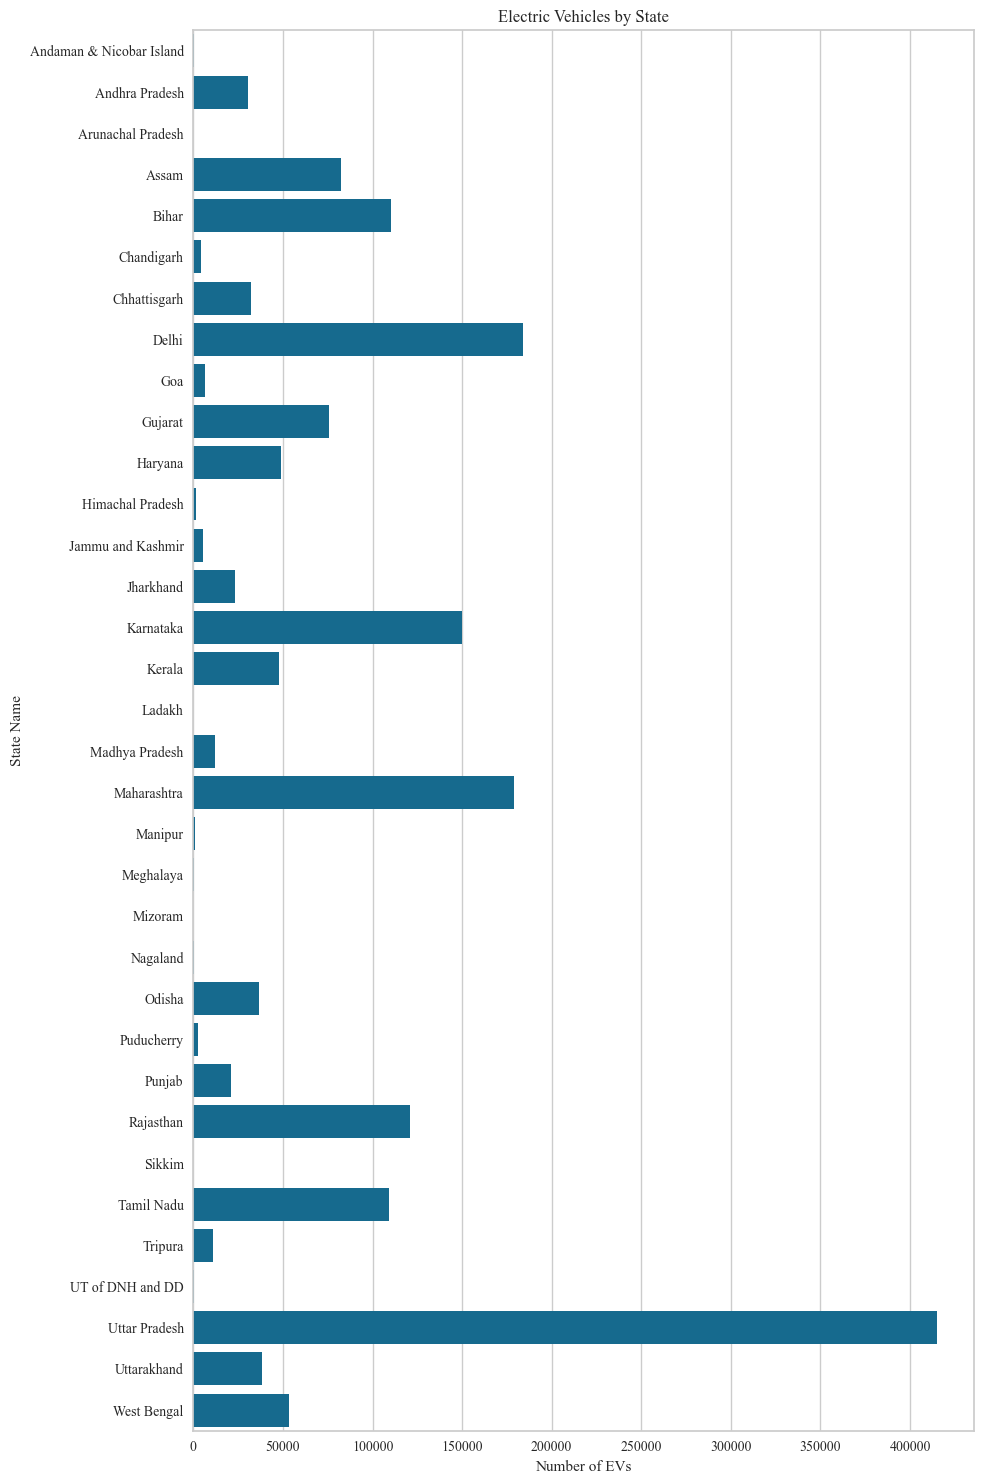

In [632]:
plt.rcParams["font.family"] = "Times New Roman"
sns.barplot(x='Grand Total', y='State Name', data=sw_ev.iloc[:-1,:])

plt.xlabel('Number of EVs')
plt.ylabel('State Name')
plt.title('Electric Vehicles by State')

plt.show()

In [633]:
sw_pcs = pd.read_excel('Statewise operational Public EV Charging Stations.xlsx', sheet_name=0)

In [634]:
sw_pcs.head()

S. No.         State Name  No. of Operational PCS
0      1  Andaman & Nicobar                       3
1      2     Andhra Pradesh                     222
2      3  Arunachal Pradesh                       9
3      4              Assam                      48
4      5              Bihar                      83

In [635]:
sw_pcs.dtypes

S. No.                    object
State Name                object
No. of Operational PCS     int64
dtype: object

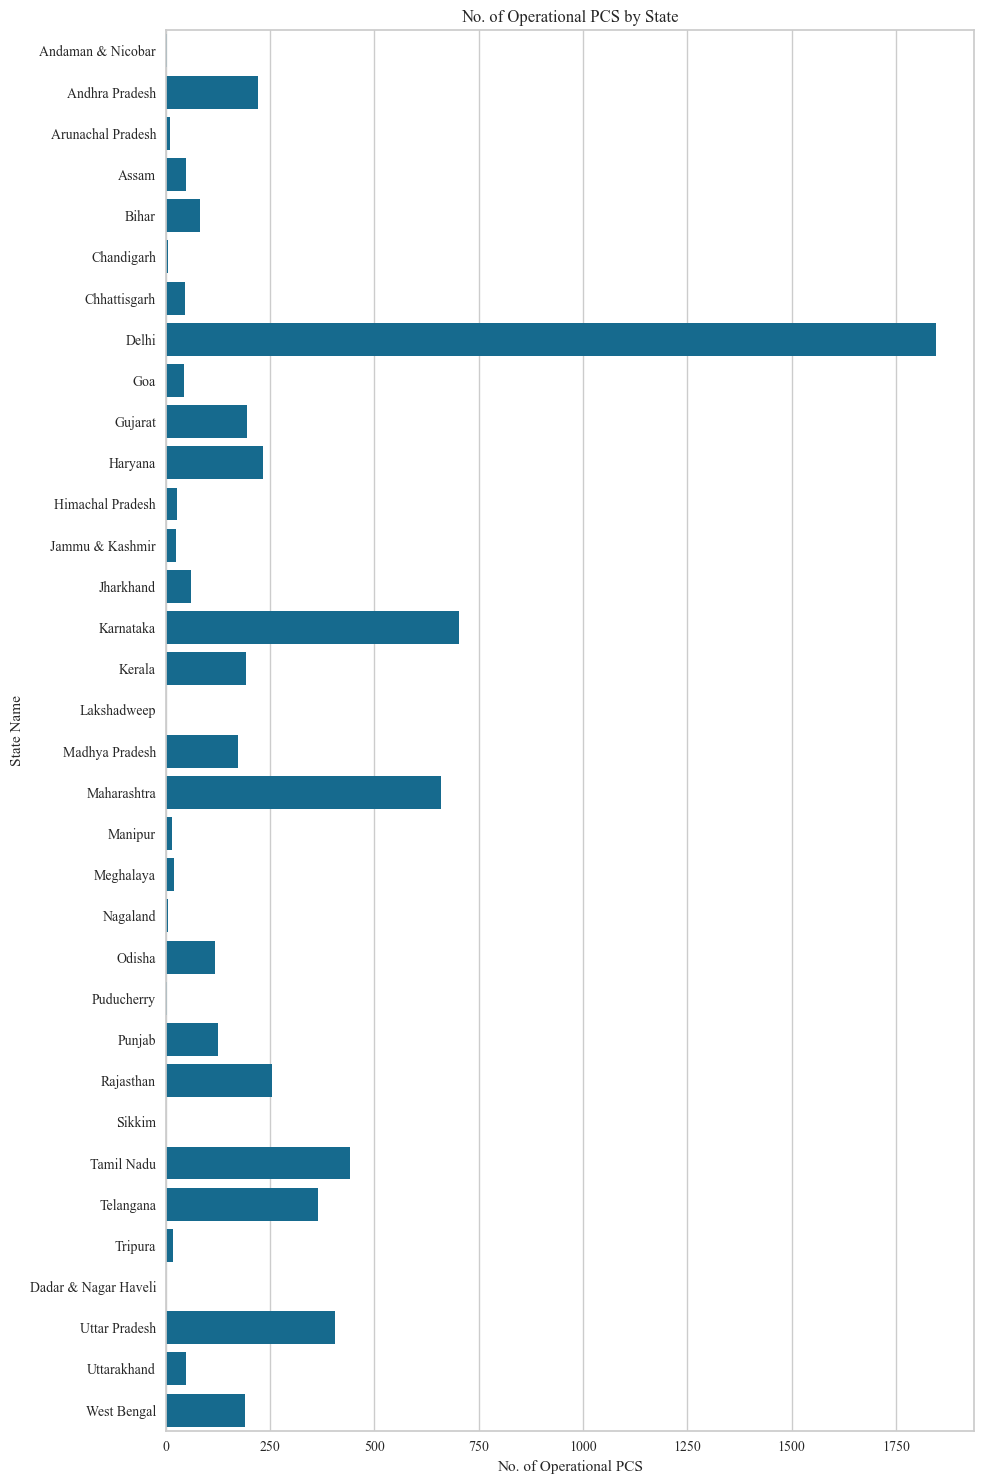

In [636]:
plt.rcParams["font.family"] = "Times New Roman"
sns.barplot(x='No. of Operational PCS', y='State Name', data=sw_pcs.iloc[:-1,:])

plt.xlabel('No. of Operational PCS')
plt.ylabel('State Name')
plt.title('No. of Operational PCS by State')

plt.show()

In [637]:
sw_ev['State Name'].unique()

array(['Andaman & Nicobar Island', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'UT of DNH and DD', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', nan], dtype=object)

In [638]:
sw_pcs['State Name'].unique()

array(['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Dadar & Nagar Haveli', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', nan], dtype=object)

In [639]:
uncommon_elements = list(set(sw_ev['State Name'].unique()) ^ set(sw_pcs['State Name'].unique()))

print(uncommon_elements )

['Andaman & Nicobar Island', 'UT of DNH and DD', 'Telangana', 'Mizoram', 'Andaman & Nicobar', 'Jammu & Kashmir', 'Dadar & Nagar Haveli', 'Jammu and Kashmir', 'Ladakh', 'Lakshadweep']


In [640]:
replacements = {'Andaman & Nicobar Island': 'Andaman & Nicobar', 'Jammu and Kashmir': 'Jammu & Kashmir', 'UT of DNH and DD': 'Dadar & Nagar Haveli'}

sw_ev['State Name'] = sw_ev['State Name'].replace(replacements)

In [641]:
sw_ev_pcs = pd.merge(sw_ev[['State Name','Grand Total']].iloc[:-1], sw_pcs[['State Name','No. of Operational PCS']].iloc[:-1], how='outer', left_on='State Name', right_on='State Name')

In [642]:
sw_ev_pcs = sw_ev_pcs.rename(columns={'Grand Total': 'Total EV'})

In [643]:
sw_ev_pcs.head(40)

State Name  Total EV  No. of Operational PCS
0      Andaman & Nicobar     169.0                     3.0
1         Andhra Pradesh   30449.0                   222.0
2      Arunachal Pradesh      21.0                     9.0
3                  Assam   82216.0                    48.0
4                  Bihar  110325.0                    83.0
5             Chandigarh    4161.0                     6.0
6           Chhattisgarh   31992.0                    46.0
7   Dadar & Nagar Haveli     246.0                     1.0
8                  Delhi  183741.0                  1845.0
9                    Goa    6559.0                    44.0
10               Gujarat   75655.0                   195.0
11               Haryana   48726.0                   232.0
12      Himachal Pradesh    1583.0                    27.0
13       Jammu & Kashmir    5554.0                    24.0
14             Jharkhand   23486.0                    60.0
15             Karnataka  150179.0                   704.0
16                Kerala   48055.0                   192.0
17                Ladakh      44.0                     NaN
18           Lakshadweep       NaN                     1.0
19        Madhya Pradesh   11792.0                   174.0
20           Maharashtra  179087.0                   660.0
21               Manipur     759.0                    16.0
22             Meghalaya      72.0                    19.0
23               Mizoram      44.0                     NaN
24              Nagaland      60.0                     6.0
25                Odisha   36437.0                   117.0
26            Puducherry    2765.0                     4.0
27                Punjab   21103.0                   126.0
28             Rajasthan  120769.0                   254.0
29                Sikkim      21.0                     1.0
30            Tamil Nadu  109272.0                   441.0
31             Telangana       NaN                   365.0
32               Tripura   10924.0                    18.0
33         Uttar Pradesh  414978.0                   406.0
34           Uttarakhand   38207.0                    48.0
35           West Bengal   53516.0                   189.0

In [644]:
sw_ev_pcs.isnull().sum()

State Name                0
Total EV                  2
No. of Operational PCS    2
dtype: int64

In [645]:
average_ev_per_pcs = sw_ev_pcs['Total EV'].mean() / sw_ev_pcs['No. of Operational PCS'].mean()

average_pcs_per_ev = sw_ev_pcs['No. of Operational PCS'].mean()/ sw_ev_pcs['Total EV'].mean()

print("Average EVs per PCS:", average_ev_per_pcs)
print("Average PCS per EV:", average_pcs_per_ev)

Average EVs per PCS: 273.7575159429092
Average PCS per EV: 0.0036528677452221815


In [646]:
sw_ev_pcs['Total EV'] = sw_ev_pcs['Total EV'].fillna(round(average_ev_per_pcs * sw_ev_pcs['No. of Operational PCS'])).astype(int)

In [647]:
sw_ev_pcs['No. of Operational PCS'] = sw_ev_pcs['No. of Operational PCS'].fillna(round(average_pcs_per_ev * sw_ev_pcs['Total EV'])).astype(int)

In [648]:
correlation, p_value = pearsonr(sw_ev_pcs['Total EV'], sw_ev_pcs['No. of Operational PCS'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

Correlation coefficient: 0.5979730642822771
P-value: 0.00011742824302514542


In [649]:
sw_ro = pd.read_excel('Statewise number of RO with EV charging facility.xlsx', sheet_name=0)

In [650]:
sw_ro.head()

State/UT  No of RO's where EV Charging Facility available
0     Andhra Pradesh                                               65
1  Arunachal Pradesh                                                4
2              Assam                                               19
3              Bihar                                               26
4         Chandigarh                                                4

In [651]:
sw_ro['State/UT'] = sw_ro['State/UT'].str.strip()

In [652]:
sw_ro.dtypes

State/UT                                           object
No of RO's where EV Charging Facility available     int64
dtype: object

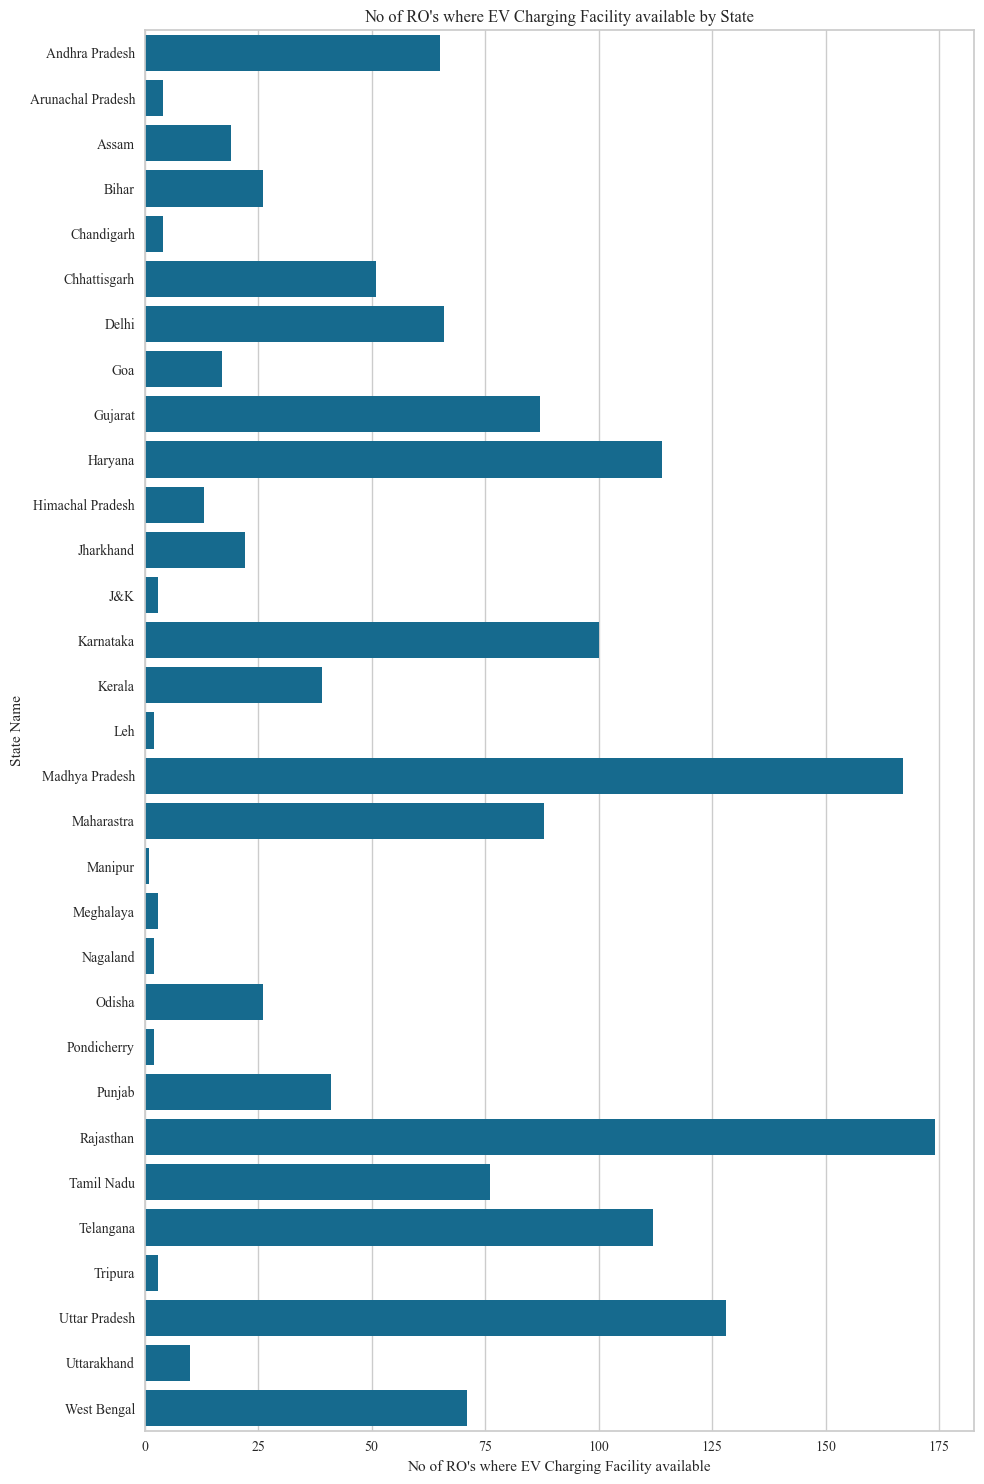

In [653]:
plt.rcParams["font.family"] = "Times New Roman"
sns.barplot(x='''No of RO's where EV Charging Facility available''', y='State/UT', data=sw_ro.iloc[:-1,:])

plt.xlabel('''No of RO's where EV Charging Facility available''')
plt.ylabel('State Name')
plt.title('''No of RO's where EV Charging Facility available by State''')

plt.show()

In [654]:
sw_ev_pcs['State Name'].unique()

array(['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadar & Nagar Haveli', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [655]:
sw_ro['State/UT'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jharkhand', 'J&K', 'Karnataka', 'Kerala',
       'Leh', 'Madhya Pradesh', 'Maharastra', 'Manipur', 'Meghalaya',
       'Nagaland', 'Odisha', 'Pondicherry', 'Punjab', 'Rajasthan',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'Grand Total'], dtype=object)

In [656]:
uncommon_elements = list(set(sw_ev_pcs['State Name'].unique()) ^ set(sw_ro['State/UT'].unique()))

print(uncommon_elements )

['Leh', 'Maharastra', 'Pondicherry', 'Maharashtra', 'Puducherry', 'Grand Total', 'J&K', 'Sikkim', 'Mizoram', 'Andaman & Nicobar', 'Jammu & Kashmir', 'Dadar & Nagar Haveli', 'Ladakh', 'Lakshadweep']


In [657]:
replacements = {'Leh': 'Ladakh', 'J&K': 'Jammu & Kashmir', 'Maharastra': 'Maharashtra', 'Pondicherry': 'Puducherry'}

sw_ro['State/UT'] = sw_ro['State/UT'].replace(replacements)

In [658]:
sw_ev_ro_pcs = pd.merge(sw_ev_pcs, sw_ro.iloc[:-1], how='outer', left_on='State Name', right_on='State/UT').drop('State/UT', axis=1)

In [659]:
sw_ev_ro_pcs.head(40)

State Name  Total EV  No. of Operational PCS  \
0      Andaman & Nicobar       169                       3   
1         Andhra Pradesh     30449                     222   
2      Arunachal Pradesh        21                       9   
3                  Assam     82216                      48   
4                  Bihar    110325                      83   
5             Chandigarh      4161                       6   
6           Chhattisgarh     31992                      46   
7   Dadar & Nagar Haveli       246                       1   
8                  Delhi    183741                    1845   
9                    Goa      6559                      44   
10               Gujarat     75655                     195   
11               Haryana     48726                     232   
12      Himachal Pradesh      1583                      27   
13       Jammu & Kashmir      5554                      24   
14             Jharkhand     23486                      60   
15             Karnataka    150179                     704   
16                Kerala     48055                     192   
17                Ladakh        44                       0   
18           Lakshadweep       274                       1   
19        Madhya Pradesh     11792                     174   
20           Maharashtra    179087                     660   
21               Manipur       759                      16   
22             Meghalaya        72                      19   
23               Mizoram        44                       0   
24              Nagaland        60                       6   
25                Odisha     36437                     117   
26            Puducherry      2765                       4   
27                Punjab     21103                     126   
28             Rajasthan    120769                     254   
29                Sikkim        21                       1   
30            Tamil Nadu    109272                     441   
31             Telangana     99921                     365   
32               Tripura     10924                      18   
33         Uttar Pradesh    414978                     406   
34           Uttarakhand     38207                      48   
35           West Bengal     53516                     189   

    No of RO's where EV Charging Facility available  
0                                               NaN  
1                                              65.0  
2                                               4.0  
3                                              19.0  
4                                              26.0  
5                                               4.0  
6                                              51.0  
7                                               NaN  
8                                              66.0  
9                                              17.0  
10                                             87.0  
11                                            114.0  
12                                             13.0  
13                                              3.0  
14                                             22.0  
15                                            100.0  
16                                             39.0  
17                                              2.0  
18                                              NaN  
19                                            167.0  
20                                             88.0  
21                                              1.0  
22                                              3.0  
23                                              NaN  
24                                              2.0  
25                                             26.0  
26                                              2.0  
27                                             41.0  
28                                            174.0  
29                                              NaN  
30                                           

In [660]:
sw_ev_ro_pcs['''No of RO's where EV Charging Facility available'''] = sw_ev_ro_pcs['''No of RO's where EV Charging Facility available'''].fillna(0)

In [661]:
sw_ev_ro_pcs.isnull().sum()

State Name                                         0
Total EV                                           0
No. of Operational PCS                             0
No of RO's where EV Charging Facility available    0
dtype: int64

In [662]:
correlation, p_value = pearsonr(sw_ev_ro_pcs['''Total EV'''], sw_ev_ro_pcs['''No of RO's where EV Charging Facility available'''])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

Correlation coefficient: 0.5991269325877447
P-value: 0.00011301878903795658


In [663]:
nh_pcs = pd.read_excel('National highway wise operational Public EV Charging Stations.xlsx', sheet_name=0).iloc[:-1]

In [664]:
nh_pcs.head(100)

National Highway  No. of operational PCS
0     National Highway-10                       1
1     National Highway-11                       3
2    National Highway-128                       1
3     National Highway-13                       3
4    National Highway-130                       1
..                    ...                     ...
85   National Highway-766                       2
86     National Highway-8                      12
87    National Highway-86                       2
88     National Highway-9                      15
89  National Highway-948A                       2

[90 rows x 2 columns]

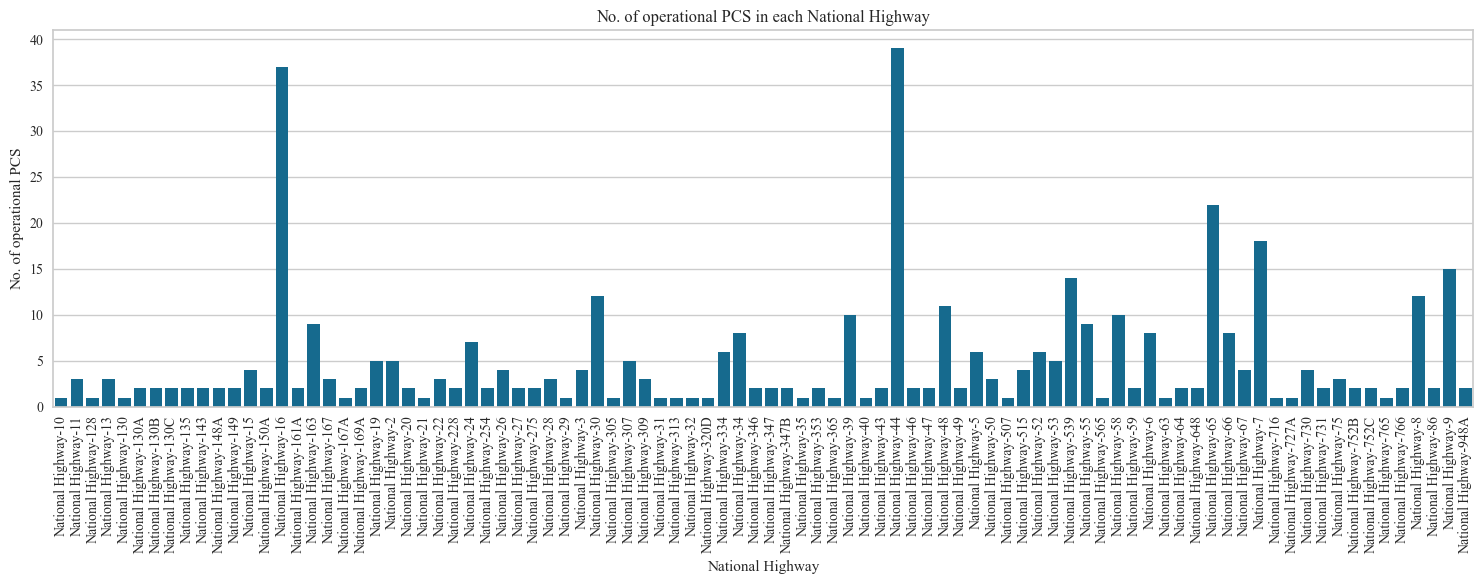

In [665]:
plt.rcParams["font.family"] = "Times New Roman"
plt.figure(figsize=(15, 6))
sns.barplot(x='''National Highway''', y='No. of operational PCS', data=nh_pcs)

plt.xlabel('National Highway')
plt.xticks(rotation=90)
plt.ylabel('No. of operational PCS')
plt.title('''No. of operational PCS in each National Highway''')

plt.show()

In [666]:
nh_pcs['National Highway'] = nh_pcs['National Highway'].str.extract(r'(\d+)').astype(int)

In [667]:
nh_pcs.head(95)

National Highway  No. of operational PCS
0                 10                       1
1                 11                       3
2                128                       1
3                 13                       3
4                130                       1
..               ...                     ...
85               766                       2
86                 8                      12
87                86                       2
88                 9                      15
89               948                       2

[90 rows x 2 columns]

In [668]:
sw_nh = pd.read_excel('Highways in each state.xlsx', sheet_name=0)

In [669]:
sw_nh

NH              State
0       1  Jammu and Kashmir
1     301  Jammu and Kashmir
2     501  Jammu and Kashmir
3     701  Jammu and Kashmir
4       2              Assam
..    ...                ...
851  344P            Haryana
852  NE-1            Gujarat
853  NE-2      Uttar Pradesh
854  NE-3            Haryana
855  547E        Maharashtra

[856 rows x 2 columns]

In [670]:
sw_nh['State'].unique()

array(['Jammu and Kashmir', 'Assam', 'Nagaland', 'Manipur', 'Mizoram',
       'Punjab', 'Himachal Pradesh', 'Haryana', 'A & N Islands',
       'Chandigarh', 'Meghalaya', 'Uttarakhand', 'Uttar Pradesh',
       'Tripura', 'Delhi', 'Rajasthan', 'Sikkim', 'West Bengal',
       'Arunachal Pradesh', 'Jharkhand', 'Andhra Pradesh', 'Orissa',
       'Tamil Nadu', 'Bihar', 'Madhya Pradesh', nan, 'Gujarat',
       'AndhraPradesh', 'Chhattisgarh', 'Telangana', 'Maharashtra',
       'Puducherry', 'Karnataka', 'Kerala', 'Goa',
       'Dadar Nagar Havali (U.T)', 'Daman & Diu'], dtype=object)

In [671]:
sw_nh_filtered = sw_nh[sw_nh['State'] != 'Daman & Diu']

In [672]:
sw_nh=sw_nh_filtered.copy()

In [673]:
replacements = {'AndhraPradesh': 'Andhra Pradesh'}

sw_nh['State'] = sw_nh['State'].replace(replacements)

In [674]:
sw_no_of_hw = sw_nh.groupby('State').size().reset_index(name='Number of highways through state')

sw_no_of_hw.head()

State  Number of highways through state
0      A & N Islands                                 1
1     Andhra Pradesh                                36
2  Arunachal Pradesh                                13
3              Assam                                35
4              Bihar                                47

In [675]:
sw_no_of_hw['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadar Nagar Havali (U.T)',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Orissa', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [676]:
matching_NH = sw_nh['NH'].isin(nh_pcs['National Highway'])

sw_nh_pcs = sw_nh[matching_NH]

In [677]:
sw_nh_pcs.head()

NH     State
4   2     Assam
5   2  Nagaland
6   2   Manipur
7   2   Mizoram
25  3    Punjab

In [678]:
merged_df = pd.merge(sw_nh_pcs, nh_pcs, left_on='NH', right_on='National Highway', how='left')

# Group by 'state' and calculate the number of highways and total number of pcs
sw_nh_pcs_agg = merged_df.groupby('State').agg({'NH': 'nunique', 'No. of operational PCS': 'sum'}).reset_index()
sw_nh_pcs_agg = sw_nh_pcs_agg.rename(columns={'NH': 'Number of Highway through state with PCS', 'No. of operational PCS': 'Total PCS on the highways passing through state'})

In [679]:
sw_nh_pcs_agg.head(50)

State  Number of Highway through state with PCS  \
0      Andhra Pradesh                                        10   
1   Arunachal Pradesh                                         4   
2               Assam                                         6   
3               Bihar                                         4   
4          Chandigarh                                         1   
5        Chhattisgarh                                         8   
6               Delhi                                         1   
7                 Goa                                         1   
8             Gujarat                                         4   
9             Haryana                                         6   
10   Himachal Pradesh                                         4   
11  Jammu and Kashmir                                         1   
12          Jharkhand                                         7   
13          Karnataka                                        13   
14             Kerala                                         2   
15     Madhya Pradesh                                        11   
16        Maharashtra                                         9   
17            Manipur                                         2   
18          Meghalaya                                         1   
19            Mizoram                                         2   
20           Nagaland                                         2   
21             Orissa                                        10   
22         Puducherry                                         1   
23             Punjab                                         6   
24          Rajasthan                                         6   
25             Sikkim                                         1   
26         Tamil Nadu                                         7   
27          Telangana                                        10   
28            Tripura                                         1   
29      Uttar Pradesh                                        17   
30        Uttarakhand                                         8   
31        West Bengal                                         3   

    Total PCS on the highways passing through state  
0                                                53  
1                                                12  
2                                                34  
3                                                 7  
4                                                 6  
5                                                40  
6                                                15  
7                                                 8  
8                                                19  
9                                                50  
10                                               29  
11                                                4  
12                                               22  
13                                               62  
14                                               10  
15                                               64  
16                                               51  
17                                                6  
18                                                8  
19                                               13  
20                                                6  
21                                               31  
22                                                1  
23                                               51  
24                                               26  
25                                                1  
26                                               18  
27                                               55  
28                                               12  
29                                               93  
30                                               68  
31                                                4

In [680]:
sw_nh_with_pcs = pd.merge(sw_no_of_hw, sw_nh_pcs_agg, how='outer', left_on='State', right_on='State')

In [681]:
sw_nh_with_pcs.head()

State  Number of highways through state  \
0      A & N Islands                                 1   
1     Andhra Pradesh                                36   
2  Arunachal Pradesh                                13   
3              Assam                                35   
4              Bihar                                47   

   Number of Highway through state with PCS  \
0                                       NaN   
1                                      10.0   
2                                       4.0   
3                                       6.0   
4                                       4.0   

   Total PCS on the highways passing through state  
0                                              NaN  
1                                             53.0  
2                                             12.0  
3                                             34.0  
4                                              7.0

In [682]:
sw_nh_with_pcs.isnull().sum()

State                                              0
Number of highways through state                   0
Number of Highway through state with PCS           2
Total PCS on the highways passing through state    2
dtype: int64

In [683]:
sw_nh_with_pcs = sw_nh_with_pcs.fillna(0)

In [684]:
sw_nh_with_pcs.head(50)

State  Number of highways through state  \
0              A & N Islands                                 1   
1             Andhra Pradesh                                36   
2          Arunachal Pradesh                                13   
3                      Assam                                35   
4                      Bihar                                47   
5                 Chandigarh                                 1   
6               Chhattisgarh                                20   
7   Dadar Nagar Havali (U.T)                                 1   
8                      Delhi                                10   
9                        Goa                                 5   
10                   Gujarat                                33   
11                   Haryana                                36   
12          Himachal Pradesh                                19   
13         Jammu and Kashmir                                10   
14                 Jharkhand                                30   
15                 Karnataka                                42   
16                    Kerala                                11   
17            Madhya Pradesh                                41   
18               Maharashtra                                97   
19                   Manipur                                11   
20                 Meghalaya                                 5   
21                   Mizoram                                 9   
22                  Nagaland                                11   
23                    Orissa                                32   
24                Puducherry                                 2   
25                    Punjab                                30   
26                 Rajasthan                                45   
27                    Sikkim                                 7   
28                Tamil Nadu                                49   
29                 Telangana                                23   
30                   Tripura                                 6   
31             Uttar Pradesh                                79   
32               Uttarakhand                                20   
33               West Bengal                                33   

    Number of Highway through state with PCS  \
0                                        0.0   
1                                       10.0   
2                                        4.0   
3                                        6.0   
4                                        4.0   
5                                        1.0   
6                                        8.0   
7                                        0.0   
8                                        1.0   
9                                        1.0   
10                                       4.0   
11                                       6.0   
12                                       4.0   
13                                       1.0   
14                                       7.0   
15                                      13.0   
16                                       2.0   
17                                      11.0   
18                                       9.0   
19                                       2.0   
20                                       1.0   
21                                       2.0   
22                                       2.0   
23                                      10.0   
24                                       1.0   
25                                       6.0   
26                                       6.0   
27                                       1.0   
28                                       7.0   
29                                      10.0   
30                                       1.0   
31                                      17.0   
32                                       8.0   
33                                       3.0   

    Total PCS on the highways p

In [685]:
sw_nh_with_pcs['Number of Highway through state with PCS'] = sw_nh_with_pcs['Number of Highway through state with PCS'].astype(int)

In [686]:
sw_nh_with_pcs['Total PCS on the highways passing through state'] = sw_nh_with_pcs['Total PCS on the highways passing through state'].astype(int)

In [687]:
sw_nh_with_pcs.head()

State  Number of highways through state  \
0      A & N Islands                                 1   
1     Andhra Pradesh                                36   
2  Arunachal Pradesh                                13   
3              Assam                                35   
4              Bihar                                47   

   Number of Highway through state with PCS  \
0                                         0   
1                                        10   
2                                         4   
3                                         6   
4                                         4   

   Total PCS on the highways passing through state  
0                                                0  
1                                               53  
2                                               12  
3                                               34  
4                                                7

In [688]:
uncommon_elements = list(set(sw_nh_with_pcs['State'].unique()) ^ set(sw_ev_ro_pcs['State Name'].unique()))

print(uncommon_elements )

['Jammu and Kashmir', 'Odisha', 'Dadar Nagar Havali (U.T)', 'A & N Islands', 'Andaman & Nicobar', 'Jammu & Kashmir', 'Dadar & Nagar Haveli', 'Orissa', 'Ladakh', 'Lakshadweep']


In [689]:
sw_ev_ro_pcs['State Name'].unique()

array(['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadar & Nagar Haveli', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [690]:
replacements = {'Jammu and Kashmir' : 'Jammu & Kashmir',  'Dadar Nagar Havali (U.T)': 'Dadar & Nagar Haveli' , 'Orissa' : 'Odisha' 
                ,'A & N Islands' : 'Andaman & Nicobar' }

sw_nh_with_pcs['State'] = sw_nh_with_pcs['State'].replace(replacements)

In [691]:
sw_nh_with_pcs['State'].unique()

array(['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadar & Nagar Haveli', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [692]:
sw_ev_ro_pcs_with_nh = pd.merge(sw_ev_ro_pcs, sw_nh_with_pcs, how='outer', left_on='State Name', right_on='State').drop('State', axis=1)

In [693]:
sw_ev_ro_pcs_with_nh.head(50)

State Name  Total EV  No. of Operational PCS  \
0      Andaman & Nicobar       169                       3   
1         Andhra Pradesh     30449                     222   
2      Arunachal Pradesh        21                       9   
3                  Assam     82216                      48   
4                  Bihar    110325                      83   
5             Chandigarh      4161                       6   
6           Chhattisgarh     31992                      46   
7   Dadar & Nagar Haveli       246                       1   
8                  Delhi    183741                    1845   
9                    Goa      6559                      44   
10               Gujarat     75655                     195   
11               Haryana     48726                     232   
12      Himachal Pradesh      1583                      27   
13       Jammu & Kashmir      5554                      24   
14             Jharkhand     23486                      60   
15             Karnataka    150179                     704   
16                Kerala     48055                     192   
17                Ladakh        44                       0   
18           Lakshadweep       274                       1   
19        Madhya Pradesh     11792                     174   
20           Maharashtra    179087                     660   
21               Manipur       759                      16   
22             Meghalaya        72                      19   
23               Mizoram        44                       0   
24              Nagaland        60                       6   
25                Odisha     36437                     117   
26            Puducherry      2765                       4   
27                Punjab     21103                     126   
28             Rajasthan    120769                     254   
29                Sikkim        21                       1   
30            Tamil Nadu    109272                     441   
31             Telangana     99921                     365   
32               Tripura     10924                      18   
33         Uttar Pradesh    414978                     406   
34           Uttarakhand     38207                      48   
35           West Bengal     53516                     189   

    No of RO's where EV Charging Facility available  \
0                                               0.0   
1                                              65.0   
2                                               4.0   
3                                              19.0   
4                                              26.0   
5                                               4.0   
6                                              51.0   
7                                               0.0   
8                                              66.0   
9                                              17.0   
10                                             87.0   
11                                            114.0   
12                                             13.0   
13                                              3.0   
14                                             22.0   
15                                            100.0   
16                                             39.0   
17                                              2.0   
18                                              0.0   
19                                            167.0   
20                                             88.0   
21                                              1.0   
22                                              3.0   
23                                              0.0   
24                                              2.0   
25                                             26.0   
26                                              2.0   
27                                             41.0   
28                                            174.0   
29                                              0.0   
30            

In [694]:
sw_ev_ro_pcs_with_nh = sw_ev_ro_pcs_with_nh.fillna(0)

In [695]:
sw_ev_ro_pcs_with_nh.isnull().sum()

State Name                                         0
Total EV                                           0
No. of Operational PCS                             0
No of RO's where EV Charging Facility available    0
Number of highways through state                   0
Number of Highway through state with PCS           0
Total PCS on the highways passing through state    0
dtype: int64

In [696]:
ev_chr_sanc = pd.read_excel('Number of EV charger sanctioned for each state.xlsx', sheet_name=0).iloc[:-1]

In [697]:
ev_chr_sanc.head()

State  No. of EV chargers sanctioned
0     Maharashtra                            317
1  Andhra Pradesh                            266
2      Tamil Nadu                            281
3         Gujarat                            278
4   Uttar Pradesh                            207

In [698]:
uncommon_elements = list(set(sw_ev_ro_pcs_with_nh['State Name'].unique()) ^ set(ev_chr_sanc['State'].unique()))

print(uncommon_elements )

['Tripura', 'Jharkhand', 'Andaman and Nicobar (Port Blair)', 'Nagaland', 'Goa', 'Mizoram', 'Andaman & Nicobar', 'Punjab', 'Dadar & Nagar Haveli', 'Manipur', 'Ladakh', 'Arunachal Pradesh', 'Lakshadweep']


In [699]:
sw_ev_ro_pcs_with_nh['State Name'].unique()

array(['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadar & Nagar Haveli', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [700]:
ev_chr_sanc['State'].unique()

array(['Maharashtra', 'Andhra Pradesh', 'Tamil Nadu', 'Gujarat',
       'Uttar Pradesh', 'Rajasthan', 'Karnataka', 'Madhya Pradesh',
       'West Bengal', 'Telangana', 'Kerala', 'Delhi', 'Chandigarh',
       'Haryana', 'Meghalaya', 'Bihar', 'Sikkim', 'Jammu & Kashmir',
       'Chhattisgarh', 'Assam', 'Odisha', 'Uttarakhand', 'Puducherry',
       'Andaman and Nicobar (Port Blair)', 'Himachal Pradesh'],
      dtype=object)

In [701]:
replacements = {'Andaman and Nicobar (Port Blair)' : 'Andaman & Nicobar' }

ev_chr_sanc['State'] = ev_chr_sanc['State'].replace(replacements)

In [702]:
sw_ev_desc = pd.merge(sw_ev_ro_pcs_with_nh, ev_chr_sanc, how='outer', left_on='State Name', right_on='State').drop('State', axis=1)

In [703]:
sw_ev_desc.head()

State Name  Total EV  No. of Operational PCS  \
0  Andaman & Nicobar       169                       3   
1     Andhra Pradesh     30449                     222   
2  Arunachal Pradesh        21                       9   
3              Assam     82216                      48   
4              Bihar    110325                      83   

   No of RO's where EV Charging Facility available  \
0                                              0.0   
1                                             65.0   
2                                              4.0   
3                                             19.0   
4                                             26.0   

   Number of highways through state  Number of Highway through state with PCS  \
0                               1.0                                       0.0   
1                              36.0                                      10.0   
2                              13.0                                       4.0   
3                              35.0                                       6.0   
4                              47.0                                       4.0   

   Total PCS on the highways passing through state  \
0                                              0.0   
1                                             53.0   
2                                             12.0   
3                                             34.0   
4                                              7.0   

   No. of EV chargers sanctioned  
0                           10.0  
1                          266.0  
2                            NaN  
3                           20.0  
4                           37.0

In [704]:
sw_ev_desc.isnull().sum()

State Name                                          0
Total EV                                            0
No. of Operational PCS                              0
No of RO's where EV Charging Facility available     0
Number of highways through state                    0
Number of Highway through state with PCS            0
Total PCS on the highways passing through state     0
No. of EV chargers sanctioned                      11
dtype: int64

In [705]:
sw_ev_desc = sw_ev_desc.fillna(0)

In [706]:
sw_ev_desc.isnull().sum()

State Name                                         0
Total EV                                           0
No. of Operational PCS                             0
No of RO's where EV Charging Facility available    0
Number of highways through state                   0
Number of Highway through state with PCS           0
Total PCS on the highways passing through state    0
No. of EV chargers sanctioned                      0
dtype: int64

In [707]:
sw_pp = pd.read_excel('Statewise operational Petrol pump.xlsx', sheet_name=0).iloc[:-1]


In [708]:
sw_pp.head()

States  \
0     Andhra Pradesh   
1  Arunachal Pradesh   
2              Assam   
3              Bihar   
4        Chhatisgarh   

   Number of Operational Petrol pumps in the country as on 01.01.2022  
0                                               4168                   
1                                                159                   
2                                               1243                   
3                                               3276                   
4                                               1903

In [709]:
sw_pp = sw_pp.rename(columns={'Number of Operational Petrol pumps in the country as on 01.01.2022': 'Number of Operational Petrol pumps'})

In [710]:
sw_pp['States'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhatisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'Andaman & Nicobar', 'Chandigarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Jammu & Kashmir', 'Ladakh',
       'Lakshadweep', 'Puducherry'], dtype=object)

In [711]:
uncommon_elements = list(set(sw_ev_desc['State Name'].unique()) ^ set(sw_pp['States'].unique()))

print(uncommon_elements )

['Chhattisgarh', 'Chhatisgarh', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Dadar & Nagar Haveli']


In [712]:
sw_ev_desc['State Name'].unique()

array(['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadar & Nagar Haveli', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [713]:
sw_pp_filtered = sw_pp[sw_pp['States'] != 'Daman & Diu']

In [714]:
sw_pp=sw_pp_filtered.copy()

In [715]:
replacements = {'Dadra & Nagar Haveli' : 'Dadar & Nagar Haveli', 'Chhatisgarh': 'Chhattisgarh' }

sw_pp['States'] = sw_pp['States'].replace(replacements)

In [716]:
sw_pp.head(50)

States  Number of Operational Petrol pumps
0         Andhra Pradesh                                4168
1      Arunachal Pradesh                                 159
2                  Assam                                1243
3                  Bihar                                3276
4           Chhattisgarh                                1903
5                  Delhi                                 400
6                    Goa                                 126
7                Gujarat                                5391
8                Haryana                                3579
9       Himachal Pradesh                                 616
10             Jharkhand                                1599
11             Karnataka                                5784
12                Kerala                                2496
13        Madhya Pradesh                                5395
14           Maharashtra                                7468
15               Manipur                                 172
16             Meghalaya                                 256
17               Mizoram                                  59
18              Nagaland                                 128
19                Odisha                                2192
20                Punjab                                3874
21             Rajasthan                                5871
22                Sikkim                                  60
23            Tamil Nadu                                6651
24             Telangana                                3716
25               Tripura                                 102
26         Uttar Pradesh                                9942
27           Uttarakhand                                 749
28           West Bengal                                2831
29     Andaman & Nicobar                                  17
30            Chandigarh                                  47
31  Dadar & Nagar Haveli                                  48
33       Jammu & Kashmir                                 575
34                Ladakh                                  16
35           Lakshadweep                                   0
36            Puducherry                                 174

In [717]:
sw_ev_desc_pp = pd.merge(sw_ev_desc, sw_pp, how='outer', left_on='State Name', right_on='States').drop('States', axis=1)

In [718]:
sw_ev_desc_pp.head()

State Name  Total EV  No. of Operational PCS  \
0  Andaman & Nicobar       169                       3   
1     Andhra Pradesh     30449                     222   
2  Arunachal Pradesh        21                       9   
3              Assam     82216                      48   
4              Bihar    110325                      83   

   No of RO's where EV Charging Facility available  \
0                                              0.0   
1                                             65.0   
2                                              4.0   
3                                             19.0   
4                                             26.0   

   Number of highways through state  Number of Highway through state with PCS  \
0                               1.0                                       0.0   
1                              36.0                                      10.0   
2                              13.0                                       4.0   
3                              35.0                                       6.0   
4                              47.0                                       4.0   

   Total PCS on the highways passing through state  \
0                                              0.0   
1                                             53.0   
2                                             12.0   
3                                             34.0   
4                                              7.0   

   No. of EV chargers sanctioned  Number of Operational Petrol pumps  
0                           10.0                                  17  
1                          266.0                                4168  
2                            0.0                                 159  
3                           20.0                                1243  
4                           37.0                                3276

In [719]:
sw_vehicle = pd.read_excel('Statewise total number of vehicles.xlsx', sheet_name=0).iloc[:-1]

In [720]:
sw_vehicle.head()

Sr. No.                 State Name Total Electric Vehicle  \
0       1   Andaman & Nicobar Island                    162   
1       2   Arunachal Pradesh                            20   
2       3   Assam                                     64766   
3       4   Bihar                                     83335   
4       5   Chandigarh                                 2812   

  Total Non-Electric Vehicle        Total  
0                   1,46,945     1,47,107  
1                   2,52,965     2,52,985  
2                  46,77,053    47,41,819  
3                1,04,07,078  1,04,90,413  
4                   7,46,881     7,49,693

In [721]:
sw_vehicle['State Name']=sw_vehicle['State Name'].str.strip()

In [722]:
sw_vehicle['State Name'].unique()

array(['Andaman & Nicobar Island', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Ladakh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'UT of DNH and DD',
       'Uttarakhand', 'Uttar Pradesh', 'West Bengal'], dtype=object)

In [723]:
sw_vehicle['Total Non-Electric Vehicle'] = sw_vehicle['Total Non-Electric Vehicle'].apply(lambda x: int(str(x).replace(',', '')) if isinstance(x, str) else x)

In [724]:
sw_vehicle['Total Non-Electric Vehicle'].dtypes

dtype('int64')

In [725]:
uncommon_elements = list(set(sw_ev_desc_pp['State Name'].unique()) ^ set(sw_vehicle['State Name'].unique()))

print(uncommon_elements )

['Andaman & Nicobar Island', 'UT of DNH and DD', 'Andhra Pradesh', 'Telangana', 'Andaman & Nicobar', 'Madhya Pradesh', 'Jammu & Kashmir', 'Dadar & Nagar Haveli', 'Jammu and Kashmir', 'Lakshadweep']


In [726]:
replacements = {'Andaman & Nicobar Island' : 'Andaman & Nicobar', 'Jammu and Kashmir': 'Jammu & Kashmir','UT of DNH and DD': 'Dadar & Nagar Haveli' }

sw_vehicle['State Name'] = sw_vehicle['State Name'].replace(replacements)

In [727]:
uncommon_elements = list(set(sw_ev_desc_pp['State Name'].unique()) ^ set(sw_vehicle['State Name'].unique()))

print(uncommon_elements )

['Andhra Pradesh', 'Telangana', 'Madhya Pradesh', 'Lakshadweep']


In [728]:
Final_Dataset = pd.merge(sw_ev_desc_pp, sw_vehicle[['State Name','Total Non-Electric Vehicle']], how='outer', left_on='State Name', right_on='State Name')

In [729]:
Final_Dataset.head()

State Name  Total EV  No. of Operational PCS  \
0  Andaman & Nicobar       169                       3   
1     Andhra Pradesh     30449                     222   
2  Arunachal Pradesh        21                       9   
3              Assam     82216                      48   
4              Bihar    110325                      83   

   No of RO's where EV Charging Facility available  \
0                                              0.0   
1                                             65.0   
2                                              4.0   
3                                             19.0   
4                                             26.0   

   Number of highways through state  Number of Highway through state with PCS  \
0                               1.0                                       0.0   
1                              36.0                                      10.0   
2                              13.0                                       4.0   
3                              35.0                                       6.0   
4                              47.0                                       4.0   

   Total PCS on the highways passing through state  \
0                                              0.0   
1                                             53.0   
2                                             12.0   
3                                             34.0   
4                                              7.0   

   No. of EV chargers sanctioned  Number of Operational Petrol pumps  \
0                           10.0                                  17   
1                          266.0                                4168   
2                            0.0                                 159   
3                           20.0                                1243   
4                           37.0                                3276   

   Total Non-Electric Vehicle  
0                    146945.0  
1                         NaN  
2                    252965.0  
3                   4677053.0  
4                  10407078.0

In [730]:
Final_Dataset.isnull().sum()

State Name                                         0
Total EV                                           0
No. of Operational PCS                             0
No of RO's where EV Charging Facility available    0
Number of highways through state                   0
Number of Highway through state with PCS           0
Total PCS on the highways passing through state    0
No. of EV chargers sanctioned                      0
Number of Operational Petrol pumps                 0
Total Non-Electric Vehicle                         4
dtype: int64

In [731]:
Final_Dataset = Final_Dataset.fillna(0)

In [732]:
Final_Dataset.isnull().sum()

State Name                                         0
Total EV                                           0
No. of Operational PCS                             0
No of RO's where EV Charging Facility available    0
Number of highways through state                   0
Number of Highway through state with PCS           0
Total PCS on the highways passing through state    0
No. of EV chargers sanctioned                      0
Number of Operational Petrol pumps                 0
Total Non-Electric Vehicle                         0
dtype: int64

In [733]:
Final_Dataset.to_excel('Final Dataset.xlsx', index=False)

In [734]:
!pip install nltk



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [735]:
!pip install wordcloud



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [736]:
!pip install textblob



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [737]:
import nltk
from nltk.corpus import stopwords, wordnet

# Choose a writable directory, for example, in your home folder
nltk.data.path.append("/Users/kaviswarr/Desktop/Market segmentation EV/nltk_data")

# Download NLTK data to the chosen directory
nltk.download('stopwords', download_dir="/Users/kaviswarr/Desktop/Market segmentation EV/nltk_data")
nltk.download('wordnet', download_dir="/Users/kaviswarr/Desktop/Market segmentation EV/nltk_data")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kaviswarr/Desktop/Market segmentation
[nltk_data]     EV/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kaviswarr/Desktop/Market segmentation
[nltk_data]     EV/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [738]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kaviswarr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kaviswarr/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [739]:
df_e2w = pd.read_csv('user reviews.csv')

In [740]:
df_e2w.head()

review    Used it for  \
0  Wanna buy this bike so i gave basic informatio...     Everything   
1  This is simply amazing and exceptionally well ...     Everything   
2  Battery life is good, I like this bike very mu...     Everything   
3  I seen this bike on road. Very nice bike and g...     Everything   
4  I have a rv400 I have the bike for almost more...  Daily Commute   

     Owned for      Ridden for  rating  Visual Appeal  Reliability  \
0  Never owned             NaN       1            3.0          1.0   
1       > 1 yr      < 5000 kms       5            5.0          5.0   
2   < 3 months      < 5000 kms       5            4.0          4.0   
3  Never owned             NaN       5            5.0          5.0   
4       > 1 yr  5000-10000 kms       1            2.0          1.0   

   Performance  Service Experience  Extra Features  Comfort  Maintenance cost  \
0          3.0                 1.0             4.0      NaN               NaN   
1          5.0                 5.0             NaN      5.0               NaN   
2          5.0                 3.0             NaN      4.0               NaN   
3          5.0                 5.0             NaN      5.0               NaN   
4          1.0                 2.0             NaN      3.0               NaN   

   Value for Money  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN

In [741]:
df_e2w.shape

(812, 13)

In [742]:
df_e2w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              769 non-null    object 
 1   Used it for         812 non-null    object 
 2   Owned for           812 non-null    object 
 3   Ridden for          640 non-null    object 
 4   rating              812 non-null    int64  
 5   Visual Appeal       711 non-null    float64
 6   Reliability         688 non-null    float64
 7   Performance         624 non-null    float64
 8   Service Experience  681 non-null    float64
 9   Extra Features      568 non-null    float64
 10  Comfort             202 non-null    float64
 11  Maintenance cost    88 non-null     float64
 12  Value for Money     84 non-null     float64
dtypes: float64(8), int64(1), object(4)
memory usage: 82.6+ KB


In [743]:
df_e2w.describe()

rating  Visual Appeal  Reliability  Performance  \
count  812.000000     711.000000   688.000000   624.000000   
mean     3.347291       3.772152     3.302326     3.573718   
std      1.689185       1.351623     1.589227     1.438191   
min      1.000000       1.000000     1.000000     1.000000   
25%      1.000000       3.000000     1.750000     3.000000   
50%      4.000000       4.000000     4.000000     4.000000   
75%      5.000000       5.000000     5.000000     5.000000   
max      5.000000       5.000000     5.000000     5.000000   

       Service Experience  Extra Features     Comfort  Maintenance cost  \
count          681.000000      568.000000  202.000000         88.000000   
mean             3.196769        3.403169    3.044554          3.375000   
std              1.634928        1.488743    1.596948          1.472448   
min              1.000000        1.000000    1.000000          1.000000   
25%              1.000000        2.000000    1.000000          2.000000   
50%              4.000000        4.000000    3.000000          4.000000   
75%              5.000000        5.000000    4.000000          5.000000   
max              5.000000        5.000000    5.000000          5.000000   

       Value for Money  
count        84.000000  
mean          3.214286  
std           1.513565  
min           1.000000  
25%           2.000000  
50%           4.000000  
75%           4.250000  
max           5.000000

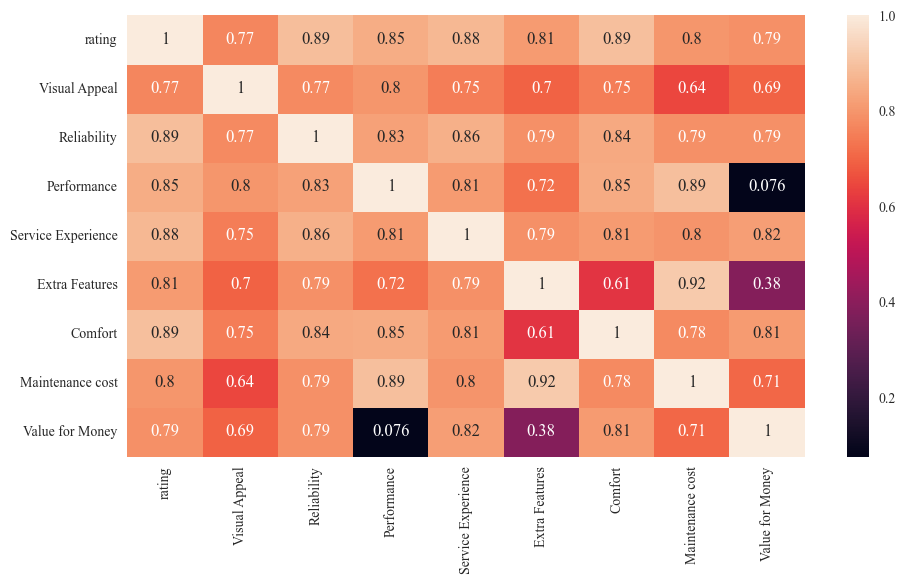

In [744]:
df_numeric = df_e2w.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()


In [745]:
df_e2w['Used it for'].value_counts(normalize=True)*100

Used it for
Daily Commute         71.551724
Everything            18.965517
Occasional Commute     6.403941
Leisure Rides          2.093596
Tours                  0.985222
Name: proportion, dtype: float64

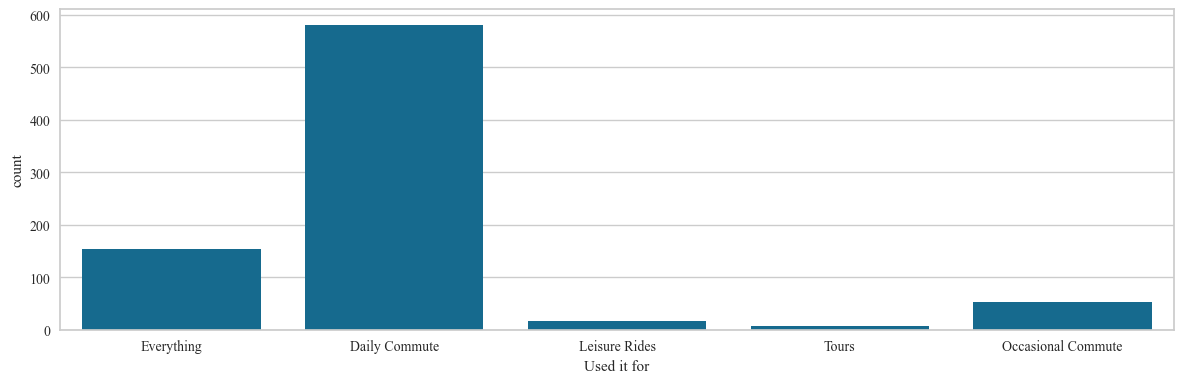

In [746]:
plt.figure(figsize=(12,4))
sns.countplot(x='Used it for', data=df_e2w)
plt.show()

In [747]:
df_e2w['Owned for'].value_counts(normalize=True)*100

Owned for
< 3 months            25.985222
> 1 yr                24.014778
Never owned           21.059113
6 months-1 yr         15.886700
3-6 months            12.931034
Occasional Commute     0.123153
Name: proportion, dtype: float64

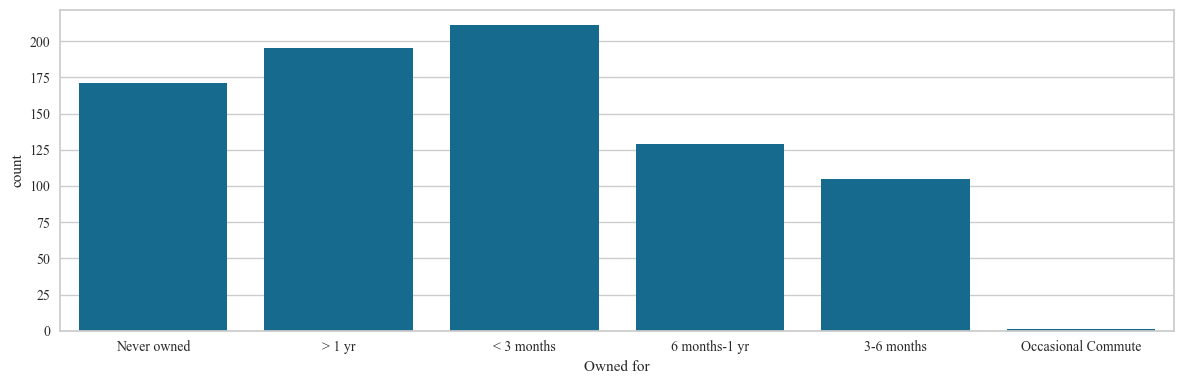

In [748]:
plt.figure(figsize=(12,4))
sns.countplot(x='Owned for', data=df_e2w)
plt.show()

In [749]:
df_e2w['Ridden for'].value_counts(normalize=True)*100

Ridden for
< 5000 kms         68.59375
5000-10000 kms     20.78125
> 15000 kms         5.78125
10000-15000 kms     4.68750
Never owned         0.15625
Name: proportion, dtype: float64

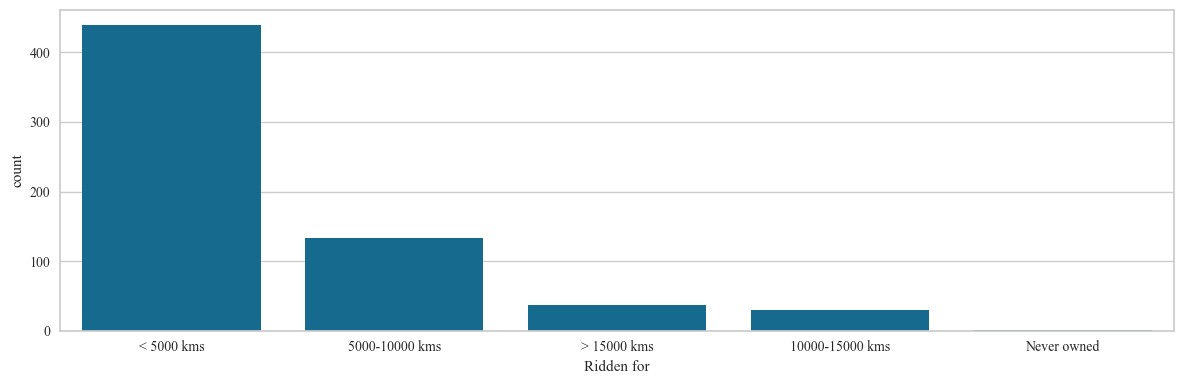

In [750]:
plt.figure(figsize=(12,4))
sns.countplot(x='Ridden for', data=df_e2w)
plt.show()

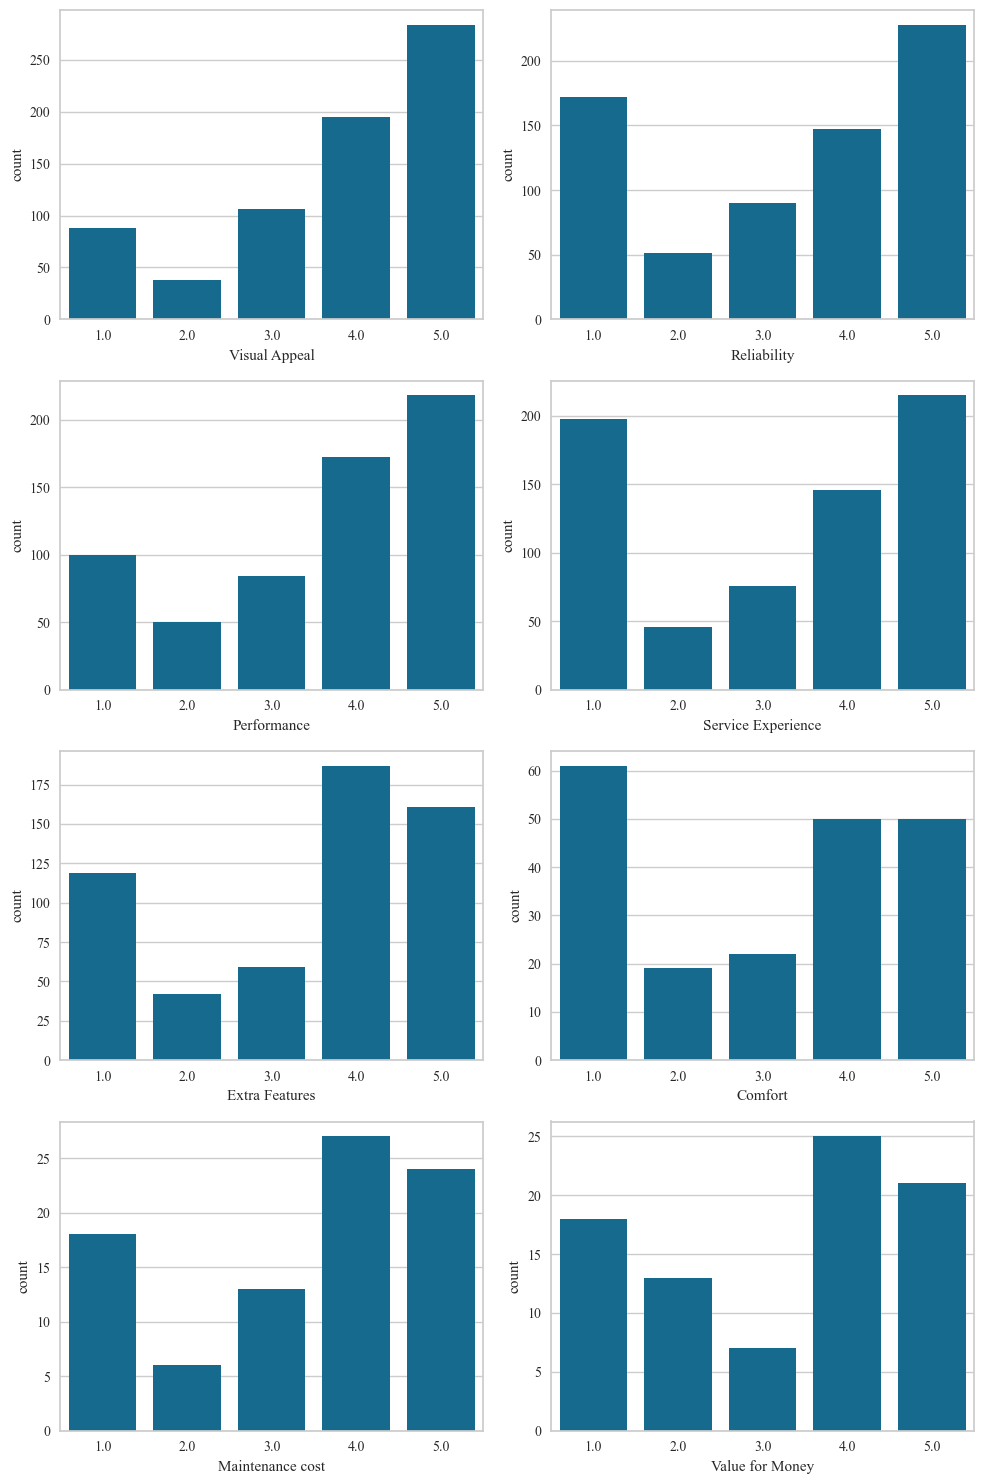

In [751]:
plt.rcParams['figure.figsize'] = [10,15]
plt.rcParams['figure.autolayout'] = True
f,axes = plt.subplots(4,2)
sns.countplot(x='Visual Appeal', data=df_e2w, ax=axes[0][0])
sns.countplot(x='Reliability', data=df_e2w, ax=axes[0][1])
sns.countplot(x='Performance', data=df_e2w, ax=axes[1][0])
sns.countplot(x='Service Experience', data=df_e2w, ax=axes[1][1])
sns.countplot(x='Extra Features', data=df_e2w, ax=axes[2][0])
sns.countplot(x='Comfort', data=df_e2w, ax=axes[2][1])
sns.countplot(x='Maintenance cost', data=df_e2w, ax=axes[3][0])
sns.countplot(x='Value for Money', data=df_e2w, ax=axes[3][1])
plt.show()

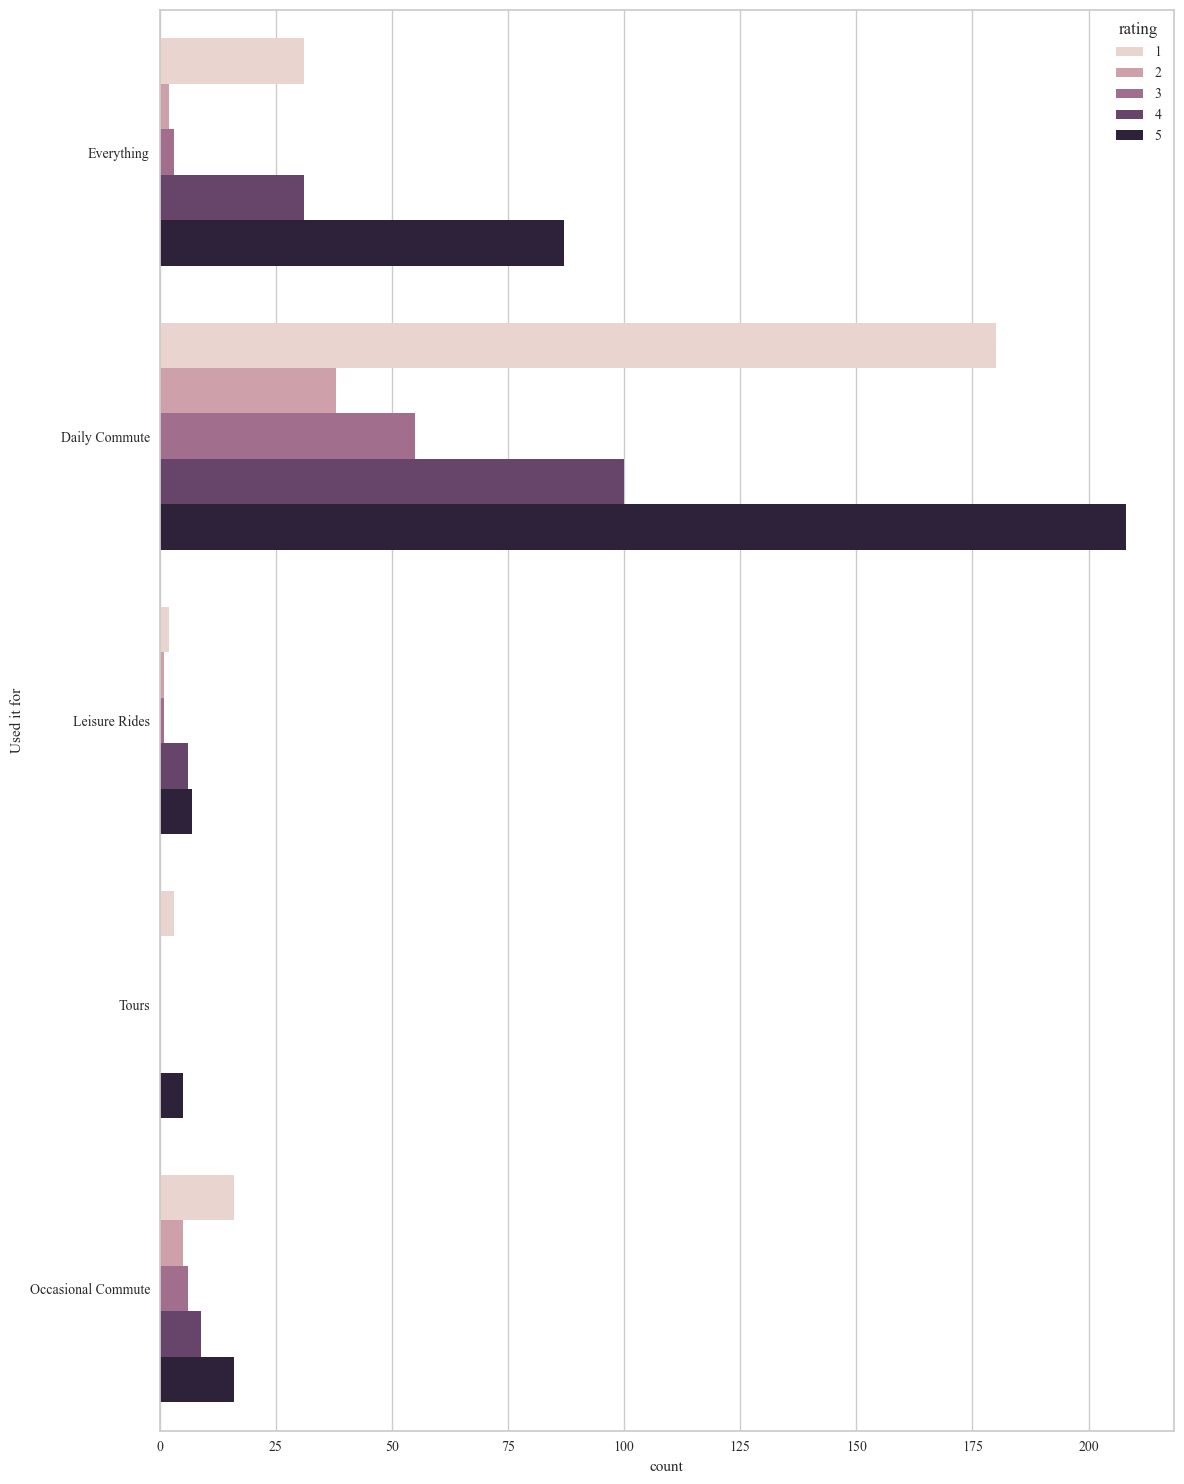

In [752]:
plt.figure(figsize=(12,15))
sns.countplot(y='Used it for', data=df_e2w, hue='rating')
plt.show()

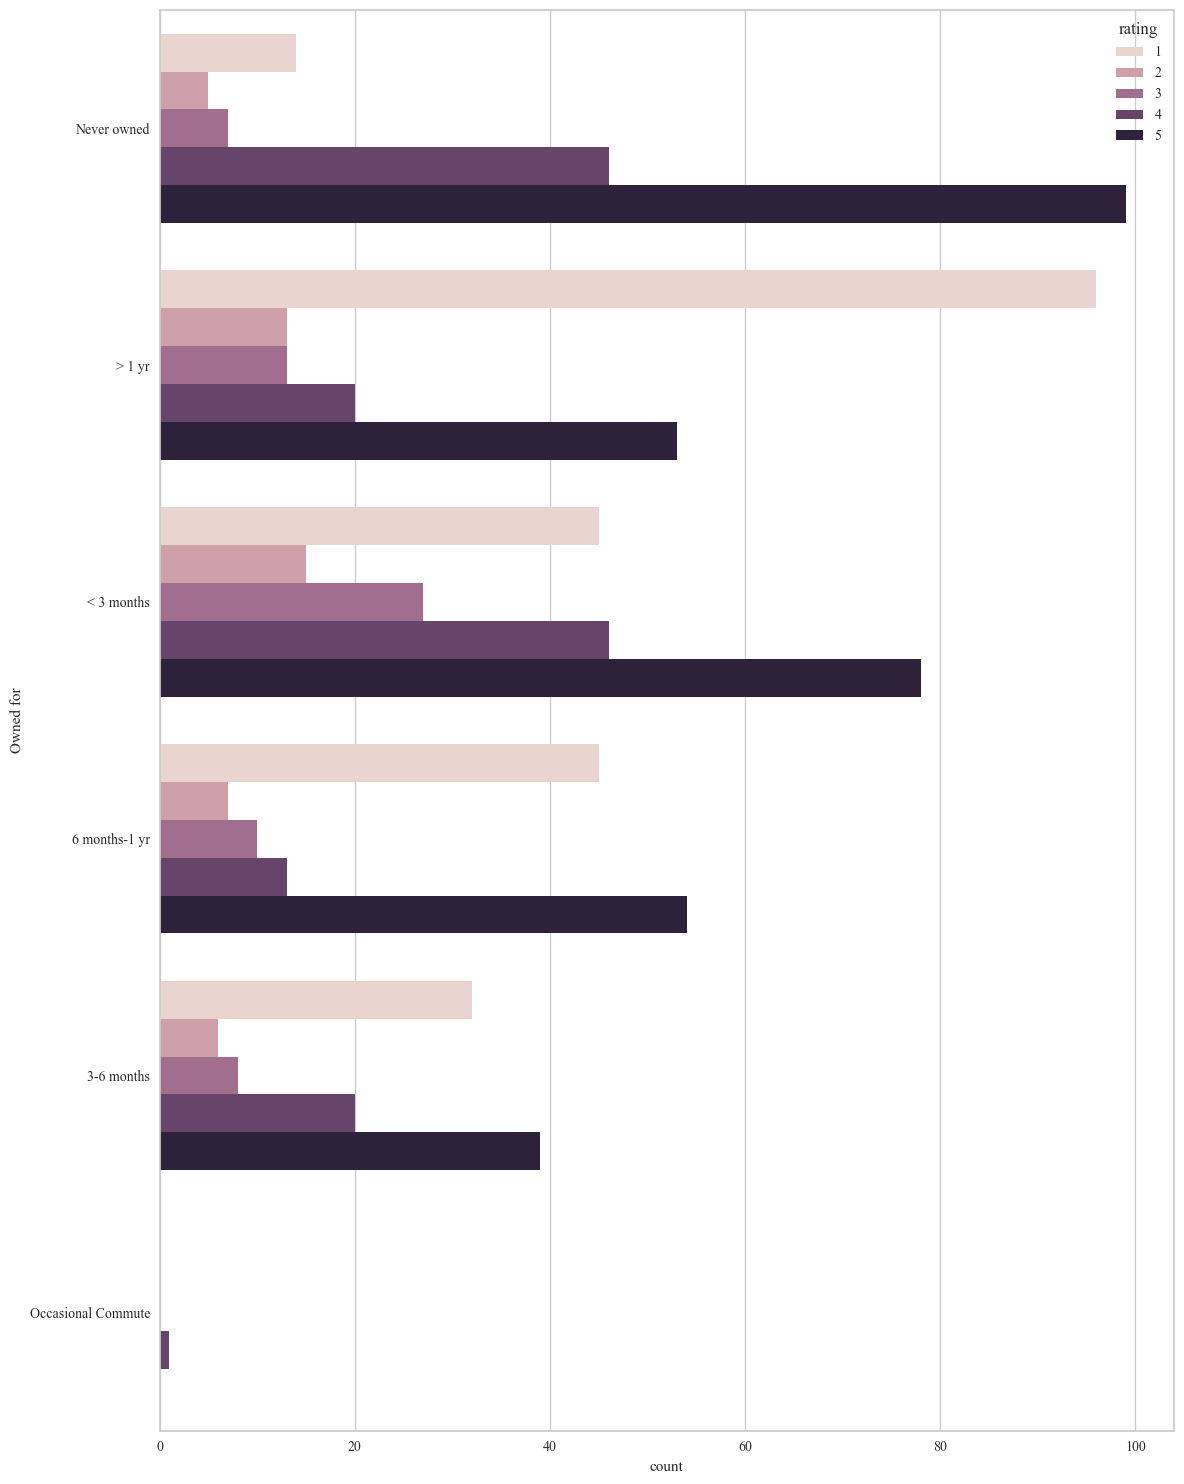

In [753]:
plt.figure(figsize=(12,15))
sns.countplot(y='Owned for', data=df_e2w, hue='rating')
plt.show()

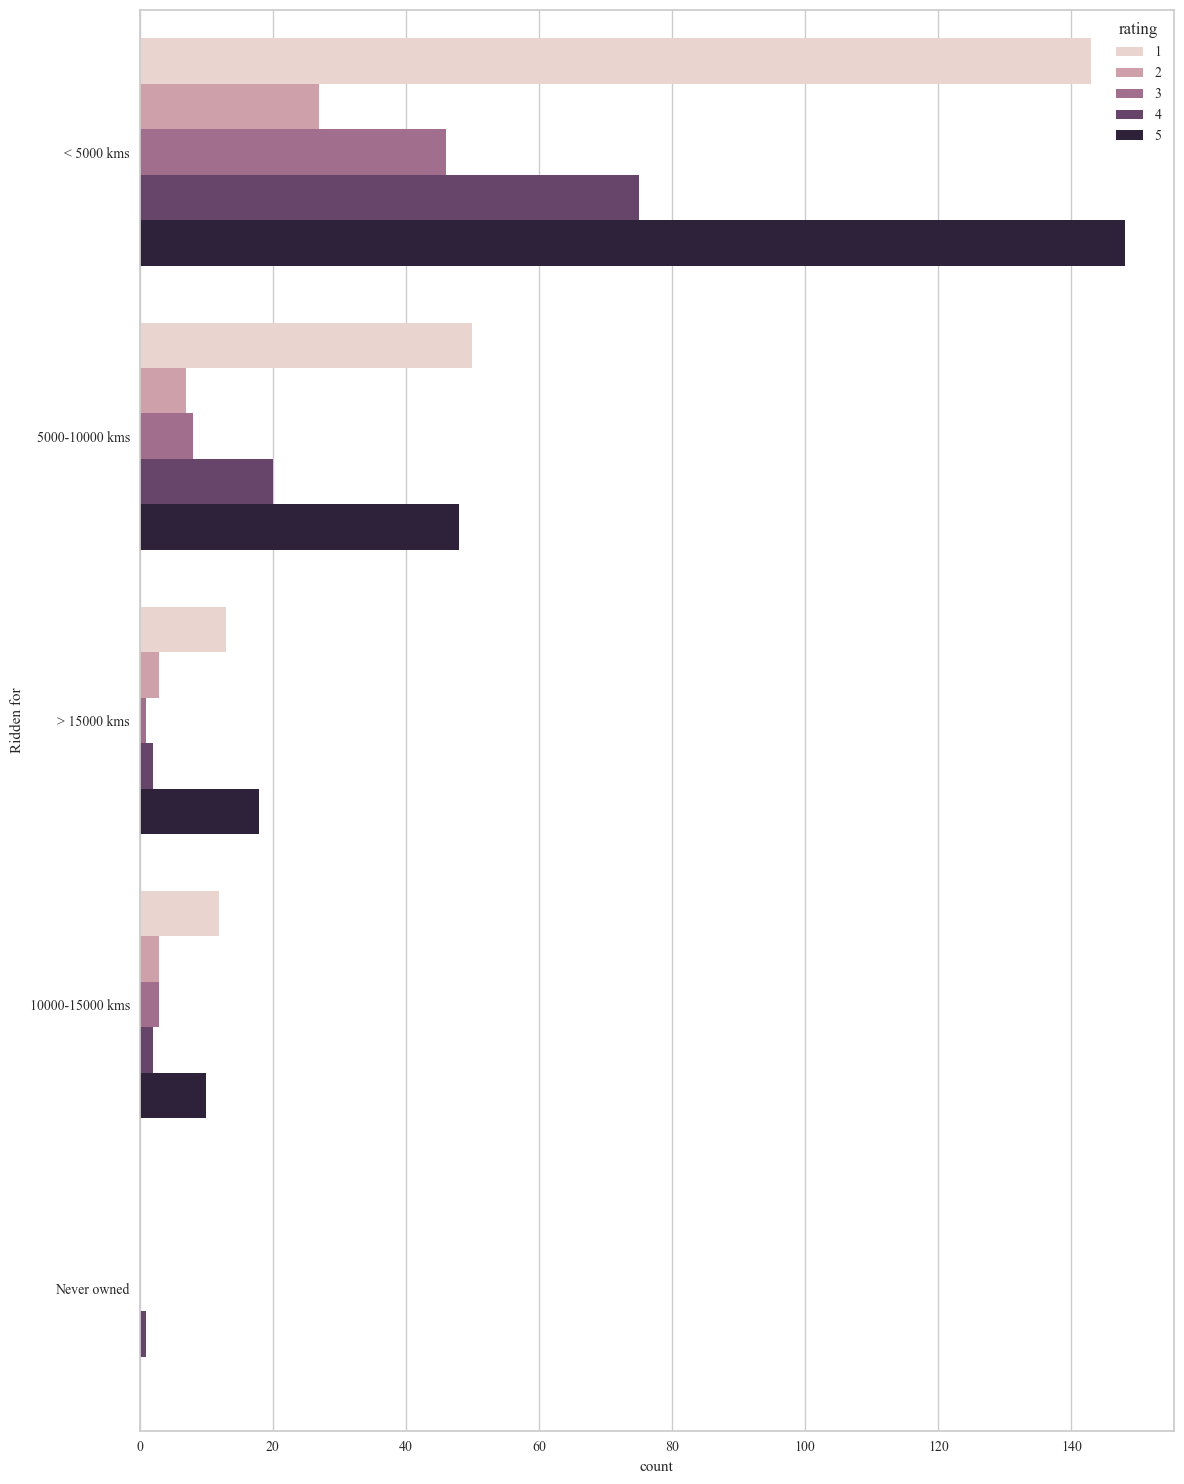

In [754]:
plt.figure(figsize=(12,15))
sns.countplot(y='Ridden for', data=df_e2w, hue='rating')
plt.show()

In [755]:
# Creating a copy of the data
df1 = df_e2w.copy()
df1.head()

review    Used it for  \
0  Wanna buy this bike so i gave basic informatio...     Everything   
1  This is simply amazing and exceptionally well ...     Everything   
2  Battery life is good, I like this bike very mu...     Everything   
3  I seen this bike on road. Very nice bike and g...     Everything   
4  I have a rv400 I have the bike for almost more...  Daily Commute   

     Owned for      Ridden for  rating  Visual Appeal  Reliability  \
0  Never owned             NaN       1            3.0          1.0   
1       > 1 yr      < 5000 kms       5            5.0          5.0   
2   < 3 months      < 5000 kms       5            4.0          4.0   
3  Never owned             NaN       5            5.0          5.0   
4       > 1 yr  5000-10000 kms       1            2.0          1.0   

   Performance  Service Experience  Extra Features  Comfort  Maintenance cost  \
0          3.0                 1.0             4.0      NaN               NaN   
1          5.0                 5.0             NaN      5.0               NaN   
2          5.0                 3.0             NaN      4.0               NaN   
3          5.0                 5.0             NaN      5.0               NaN   
4          1.0                 2.0             NaN      3.0               NaN   

   Value for Money  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN

In [756]:
df1.drop(df1.iloc[:,1:],inplace=True, axis=1)
df1.head()

review
0  Wanna buy this bike so i gave basic informatio...
1  This is simply amazing and exceptionally well ...
2  Battery life is good, I like this bike very mu...
3  I seen this bike on road. Very nice bike and g...
4  I have a rv400 I have the bike for almost more...

In [757]:
lm = WordNetLemmatizer()

In [758]:
# Creating a function for cleaning the text
def clean(text):
  text = str(text).lower()
  text = re.sub('[^a-z]',' ', str(text))
  text = text.split()
  text = [lm.lemmatize(j) for j in text if j not in set(stopwords.words('english'))]
  text = ' '.join(str(k) for k in (text))
  return text

In [759]:
df1['review'][0]

"Wanna buy this bike so i gave basic information to the company to get response but only fraudsters calls me in the name of revolt for online fraud so there's a data leakage also besides this i've changed my mind to buy this after reading reviews of owners and company response.\nPathetic response from revolt."

In [760]:
df1['review'][0:1].apply(clean)

0    wanna buy bike gave basic information company ...
Name: review, dtype: object

In [761]:
# Creating a function to get polarity and subjectivity
def subjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def polarity(text):
  return TextBlob(text).sentiment.polarity
def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [762]:
df1['cleantext'] = df1['review'].apply(clean)
df1['subjectivity'] = df1['cleantext'].apply(subjectivity)
df1['polarity'] = df1['cleantext'].apply(polarity)
df1['analysis'] = df1['polarity'].apply(getAnalysis)
df1.head()

review  \
0  Wanna buy this bike so i gave basic informatio...   
1  This is simply amazing and exceptionally well ...   
2  Battery life is good, I like this bike very mu...   
3  I seen this bike on road. Very nice bike and g...   
4  I have a rv400 I have the bike for almost more...   

                                           cleantext  subjectivity  polarity  \
0  wanna buy bike gave basic information company ...      0.562500 -0.500000   
1  simply amazing exceptionally well good price s...      0.755000  0.429896   
2  battery life good like bike much tension refue...      0.531845  0.313393   
3  seen bike road nice bike good drive pollution ...      0.718750  0.571875   
4  rv bike almost year never ever bike gave avera...      0.386565  0.012415   

   analysis  
0  Negative  
1  Positive  
2  Positive  
3  Positive  
4  Positive

In [763]:
score = df1['analysis'].value_counts()
score

analysis
Positive    587
Negative    176
Neutral      49
Name: count, dtype: int64

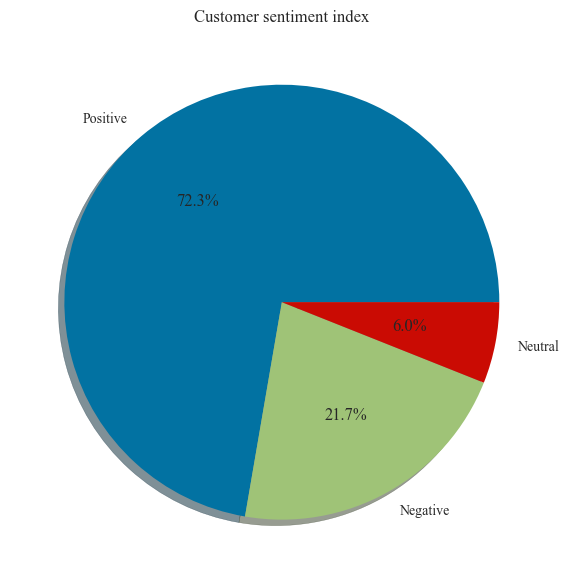

In [764]:
plt.figure(figsize=(6,6))
plt.pie(score, labels = ['Positive', 'Negative', 'Neutral'],shadow = True, autopct = '%1.1f%%')
plt.title('Customer sentiment index')
plt.show()

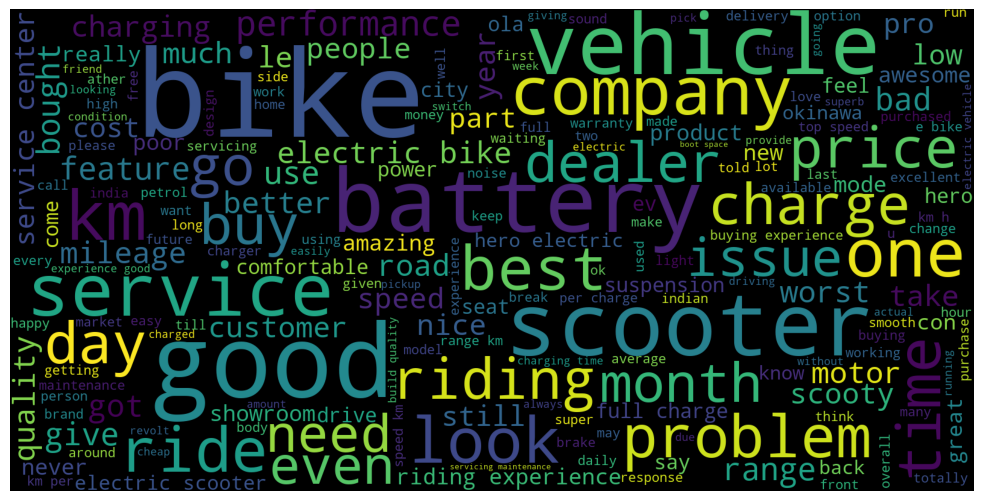

In [765]:
# Creating a WordCloud
def word_cloud(wd_list):
  stopwords = set(STOPWORDS)
  all_words = ' '.join([text for text in wd_list])
  wordcloud = WordCloud(stopwords = STOPWORDS,
                        width=1600,height=800,
                        random_state=1,
                        max_words=200,
                        max_font_size=200).generate(all_words)
  plt.figure(figsize=(10,10))
  plt.axis('off')
  plt.imshow(wordcloud)
word_cloud(df1['cleantext'][:5000])

In [766]:
df2 = df_e2w.copy()
df2 = df2.iloc[:,5:]
df2=df2.fillna(0)
df2.head()

Visual Appeal  Reliability  Performance  Service Experience  \
0            3.0          1.0          3.0                 1.0   
1            5.0          5.0          5.0                 5.0   
2            4.0          4.0          5.0                 3.0   
3            5.0          5.0          5.0                 5.0   
4            2.0          1.0          1.0                 2.0   

   Extra Features  Comfort  Maintenance cost  Value for Money  
0             4.0      0.0               0.0              0.0  
1             0.0      5.0               0.0              0.0  
2             0.0      4.0               0.0              0.0  
3             0.0      5.0               0.0              0.0  
4             0.0      3.0               0.0              0.0

In [767]:
pca = PCA()
principal_components = pca.fit_transform(df2)
pca_df = pd.DataFrame(data=principal_components, columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8'])
pca_df.head()

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0  0.917002 -2.270448  0.004381 -0.804342  1.571710  0.457088 -0.571666   
1 -3.099522  3.431168 -3.762932  1.970928 -1.616919  0.164016 -0.147870   
2 -1.257067  2.092324 -3.446195  2.025984 -0.749243 -0.435970 -0.918969   
3 -3.099522  3.431168 -3.762932  1.970928 -1.616919  0.164016 -0.147870   
4  3.346936  1.277781 -2.233583 -0.086283 -0.873141  0.813738  0.357799   

       PCA8  
0  0.082141  
1 -0.095315  
2 -0.049931  
3 -0.095315  
4 -0.031880

In [768]:
pca_df[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8']].std()

PCA1    3.723554
PCA2    1.967764
PCA3    1.435807
PCA4    1.035634
PCA5    0.907955
PCA6    0.776078
PCA7    0.637076
PCA8    0.609307
dtype: float64

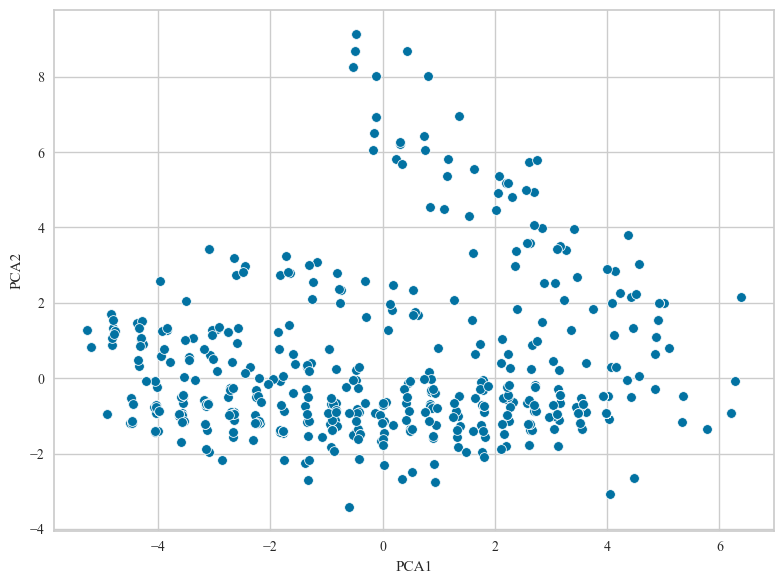

In [769]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2',palette='deep')
plt.show()

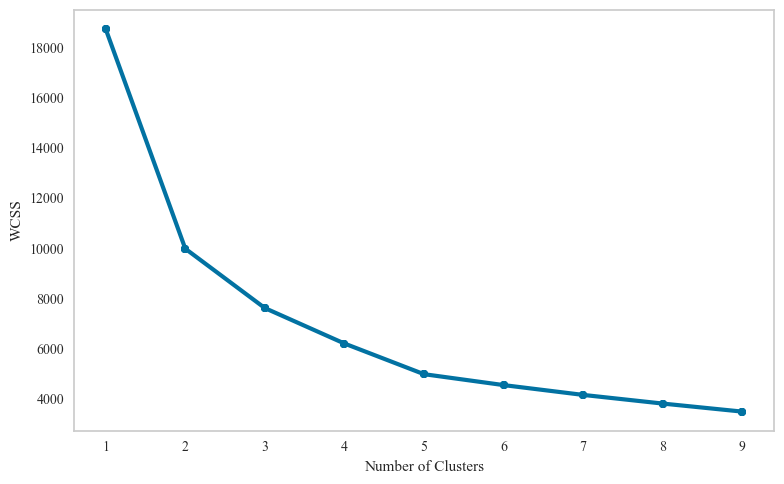

In [770]:
# Using elbow method
wcss = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 10)
  kmeans.fit(df2)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.grid()
plt.plot(range(1,10),wcss, marker = '8',linewidth='3')
plt.xlabel(range(1,10))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

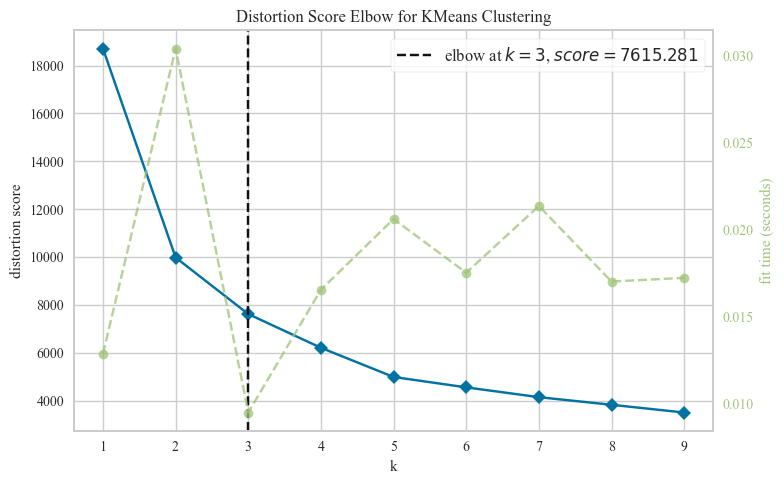

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [771]:
plt.figure(figsize=(8,5))
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans,k=(1,10))
visualizer.fit(df2)
visualizer.show()

In [772]:
k_means_model = KMeans(3)
k_means_model.fit_predict(df2)
pca_df_kmeans = pd.concat([pca_df,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)
pca_df_kmeans.head()

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0  0.917002 -2.270448  0.004381 -0.804342  1.571710  0.457088 -0.571666   
1 -3.099522  3.431168 -3.762932  1.970928 -1.616919  0.164016 -0.147870   
2 -1.257067  2.092324 -3.446195  2.025984 -0.749243 -0.435970 -0.918969   
3 -3.099522  3.431168 -3.762932  1.970928 -1.616919  0.164016 -0.147870   
4  3.346936  1.277781 -2.233583 -0.086283 -0.873141  0.813738  0.357799   

       PCA8  cluster  
0  0.082141        0  
1 -0.095315        1  
2 -0.049931        1  
3 -0.095315        1  
4 -0.031880        0

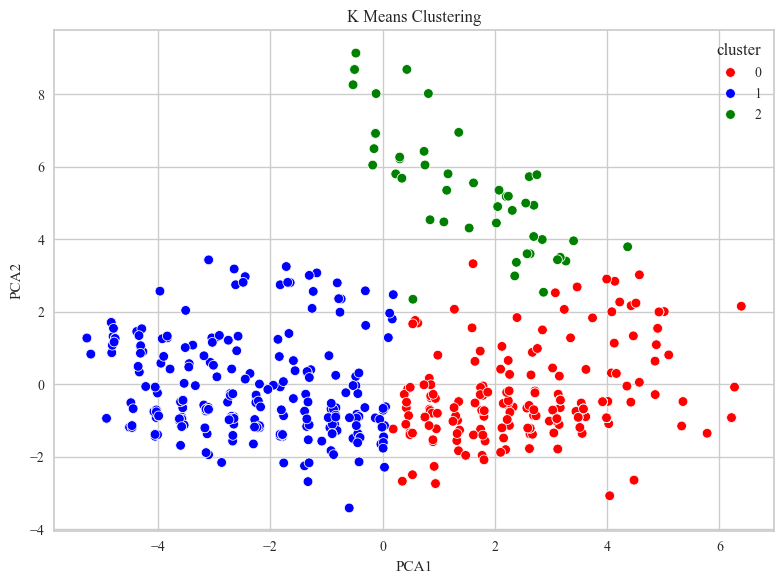

In [773]:
plt.figure(figsize=(8,6))
ax=sns.scatterplot(x='PCA1',y='PCA2',hue='cluster', data=pca_df_kmeans, palette=['red','blue','green'])
plt.title('K Means Clustering')
plt.show()

In [774]:
k_means_model = KMeans(3)
k_means_model.fit_predict(df2)
pca_df_kmeans1 = pd.concat([df_e2w,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)
pca_df_kmeans1 = pca_df_kmeans1.fillna(0)
pca_df_kmeans1.head()

review    Used it for  \
0  Wanna buy this bike so i gave basic informatio...     Everything   
1  This is simply amazing and exceptionally well ...     Everything   
2  Battery life is good, I like this bike very mu...     Everything   
3  I seen this bike on road. Very nice bike and g...     Everything   
4  I have a rv400 I have the bike for almost more...  Daily Commute   

     Owned for      Ridden for  rating  Visual Appeal  Reliability  \
0  Never owned               0       1            3.0          1.0   
1       > 1 yr      < 5000 kms       5            5.0          5.0   
2   < 3 months      < 5000 kms       5            4.0          4.0   
3  Never owned               0       5            5.0          5.0   
4       > 1 yr  5000-10000 kms       1            2.0          1.0   

   Performance  Service Experience  Extra Features  Comfort  Maintenance cost  \
0          3.0                 1.0             4.0      0.0               0.0   
1          5.0                 5.0             0.0      5.0               0.0   
2          5.0                 3.0             0.0      4.0               0.0   
3          5.0                 5.0             0.0      5.0               0.0   
4          1.0                 2.0             0.0      3.0               0.0   

   Value for Money  cluster  
0              0.0        1  
1              0.0        0  
2              0.0        0  
3              0.0        0  
4              0.0        1

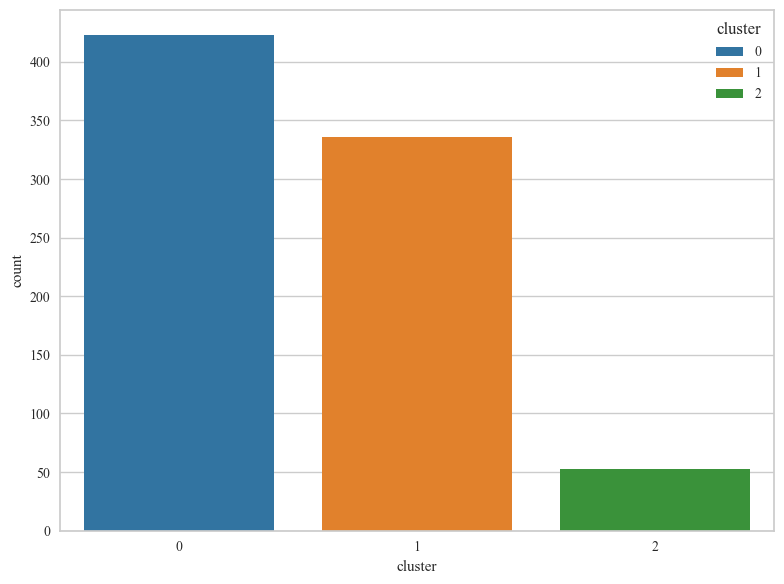

In [775]:
plt.figure(figsize=(8,6))
sns.countplot(x='cluster',data=pca_df_kmeans1, hue='cluster',palette='tab10')
plt.show()

In [776]:
pca_df_kmeans1['cluster'].value_counts(normalize=True)*100

cluster
0    52.093596
1    41.379310
2     6.527094
Name: proportion, dtype: float64

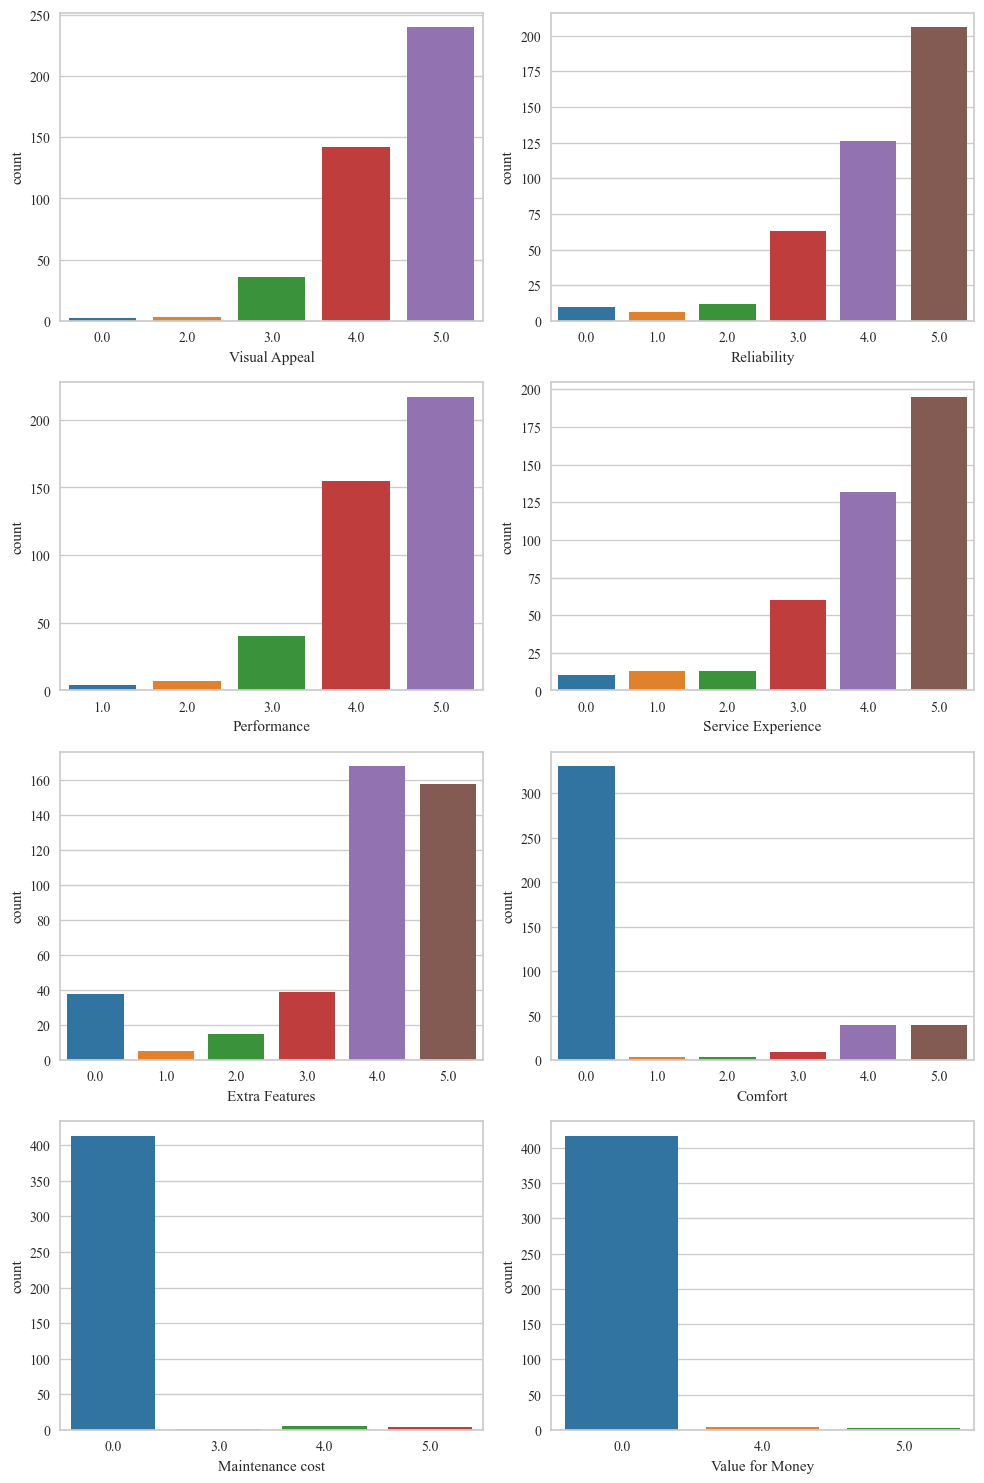

In [777]:
# Analysis of Cluster 1
plt.rcParams['figure.figsize'] = [10,15]
plt.rcParams['figure.autolayout'] = True
f,axes = plt.subplots(4,2)
sns.countplot(x='Visual Appeal',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax = axes[0][0], palette='tab10')
sns.countplot(x='Reliability',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[0][1], palette='tab10')
sns.countplot(x='Performance',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[1][0], palette='tab10')
sns.countplot(x='Service Experience',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[1][1], palette='tab10')
sns.countplot(x='Extra Features',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[2][0], palette='tab10')
sns.countplot(x='Comfort',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[2][1], palette='tab10')
sns.countplot(x='Maintenance cost',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[3][0], palette='tab10')
sns.countplot(x='Value for Money',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[3][1], palette='tab10')
plt.show()

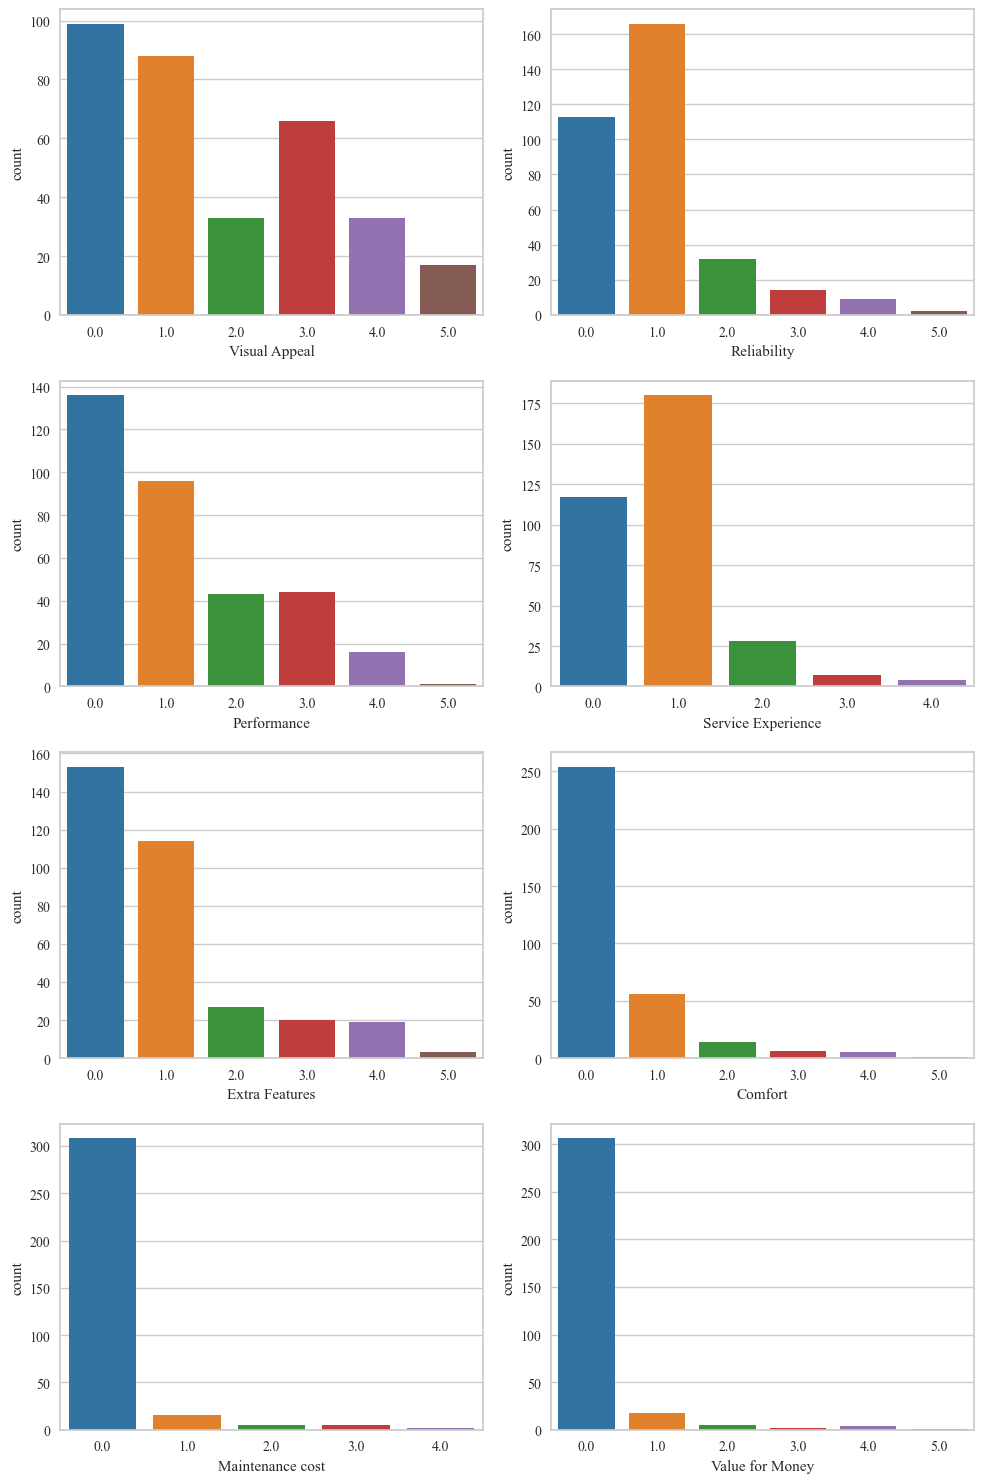

In [778]:
# Analysis of Cluster 2
plt.rcParams['figure.figsize'] = [10,15]
plt.rcParams['figure.autolayout'] = True
f,axes = plt.subplots(4,2)
sns.countplot(x='Visual Appeal',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax = axes[0][0], palette='tab10')
sns.countplot(x='Reliability',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[0][1], palette='tab10')
sns.countplot(x='Performance',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[1][0], palette='tab10')
sns.countplot(x='Service Experience',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[1][1], palette='tab10')
sns.countplot(x='Extra Features',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[2][0], palette='tab10')
sns.countplot(x='Comfort',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[2][1], palette='tab10')
sns.countplot(x='Maintenance cost',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[3][0], palette='tab10')
sns.countplot(x='Value for Money',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[3][1], palette='tab10')
plt.show()

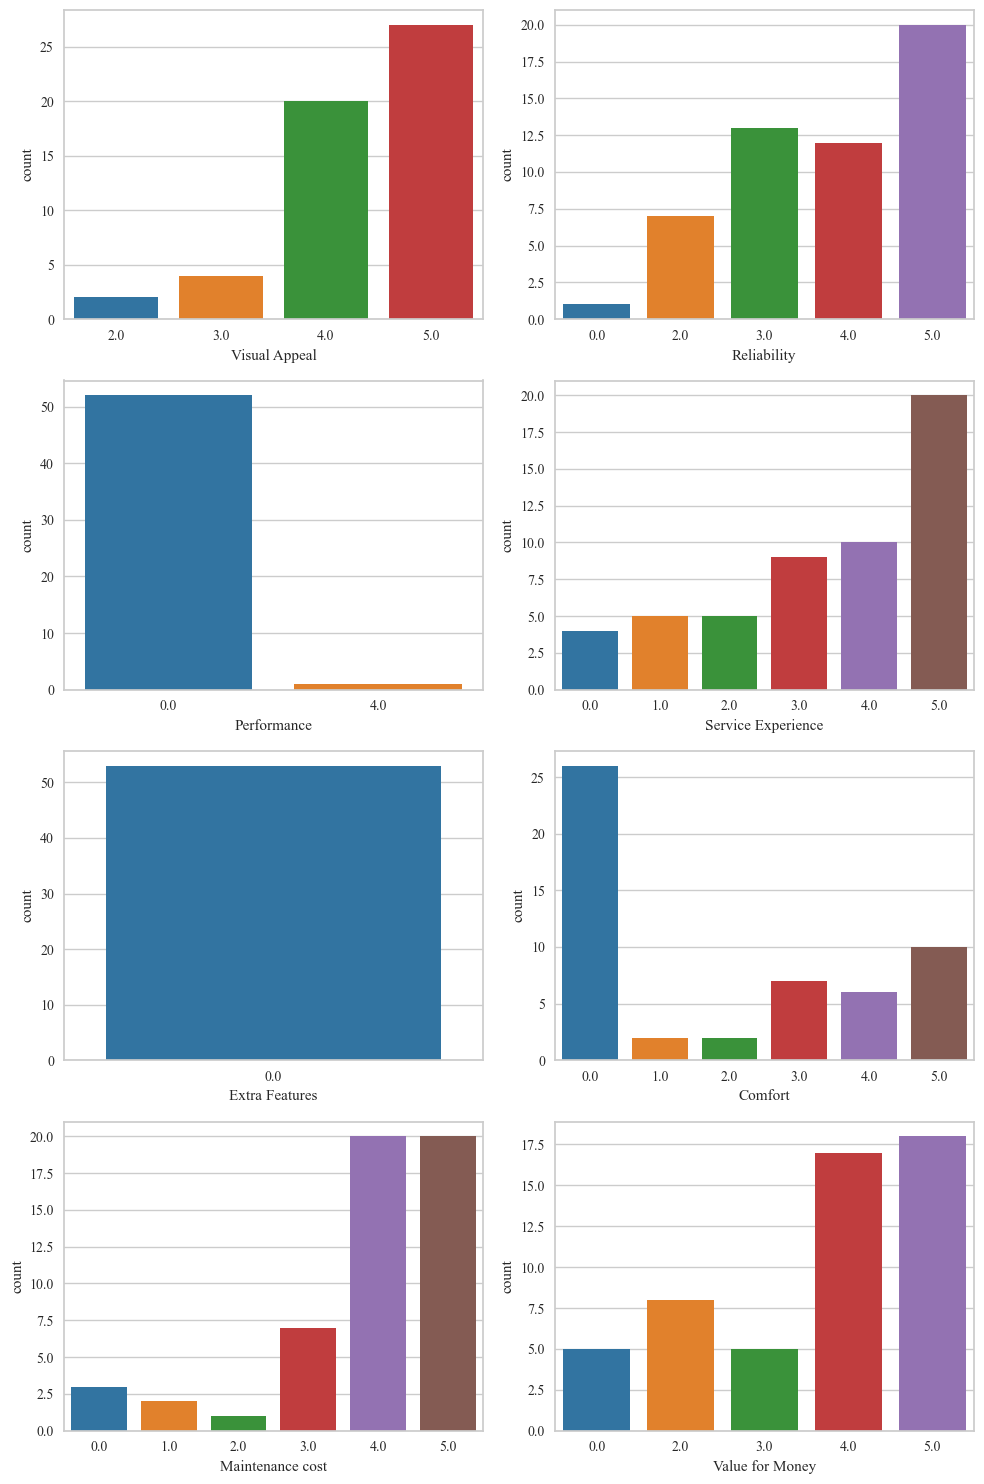

In [779]:
# Analysis of Cluster 3
plt.rcParams['figure.figsize'] = [10,15]
plt.rcParams['figure.autolayout'] = True
f,axes = plt.subplots(4,2)
sns.countplot(x='Visual Appeal',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax = axes[0][0], palette='tab10')
sns.countplot(x='Reliability',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[0][1], palette='tab10')
sns.countplot(x='Performance',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[1][0], palette='tab10')
sns.countplot(x='Service Experience',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[1][1], palette='tab10')
sns.countplot(x='Extra Features',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[2][0], palette='tab10')
sns.countplot(x='Comfort',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[2][1], palette='tab10')
sns.countplot(x='Maintenance cost',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[3][0], palette='tab10')
sns.countplot(x='Value for Money',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[3][1], palette='tab10')
plt.show()

In [780]:
!pip install plotly

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kaviswarr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kaviswarr/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [781]:
df_car = pd.read_csv('E4W user reviews.csv')

In [782]:
df_car.head()

review  Exterior  Comfort  \
0  Need to improve body style.It's amazing and dr...       5.0      5.0   
1  Tata EV has lot of flaws, worst part is servic...       3.0      2.0   
2  Very nice car , environmental friendly i like ...       5.0      5.0   
3  Company did not provide slow charging station ...       2.0      2.0   
4  Servicing and maintenance overall good and goo...       5.0      5.0   

   Performance  Fuel Economy  Value for Money      Condition  \
0          5.0           5.0              5.0            New   
1          1.0           2.0              1.0            New   
2          5.0           5.0              5.0            New   
3          1.0           1.0              1.0            New   
4          5.0           5.0              5.0  Not Purchased   

                    driven  rating  
0  Few thousand kilometers     5.0  
1  Few thousand kilometers     0.0  
2  Few thousand kilometers     5.0  
3        Haven't driven it     0.0  
4   Few hundred kilometers     5.0

In [783]:
df_car.shape

(129, 9)

In [784]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review           129 non-null    object 
 1   Exterior         129 non-null    float64
 2   Comfort          129 non-null    float64
 3   Performance      129 non-null    float64
 4   Fuel Economy     129 non-null    float64
 5   Value for Money  129 non-null    float64
 6   Condition        129 non-null    object 
 7   driven           129 non-null    object 
 8   rating           129 non-null    float64
dtypes: float64(6), object(3)
memory usage: 9.2+ KB


In [785]:
df_car.describe()

Exterior     Comfort  Performance  Fuel Economy  Value for Money  \
count  129.000000  129.000000   129.000000    129.000000       129.000000   
mean     4.472868    4.418605     4.418605      4.418605         4.162791   
std      0.968871    1.036051     1.150392      1.122899         1.345076   
min      0.000000    0.000000     0.000000      0.000000         0.000000   
25%      4.000000    4.000000     4.000000      4.000000         4.000000   
50%      5.000000    5.000000     5.000000      5.000000         5.000000   
75%      5.000000    5.000000     5.000000      5.000000         5.000000   
max      5.000000    5.000000     5.000000      5.000000         5.000000   

           rating  
count  129.000000  
mean     4.341085  
std      1.389110  
min      0.000000  
25%      4.000000  
50%      5.000000  
75%      5.000000  
max      5.000000

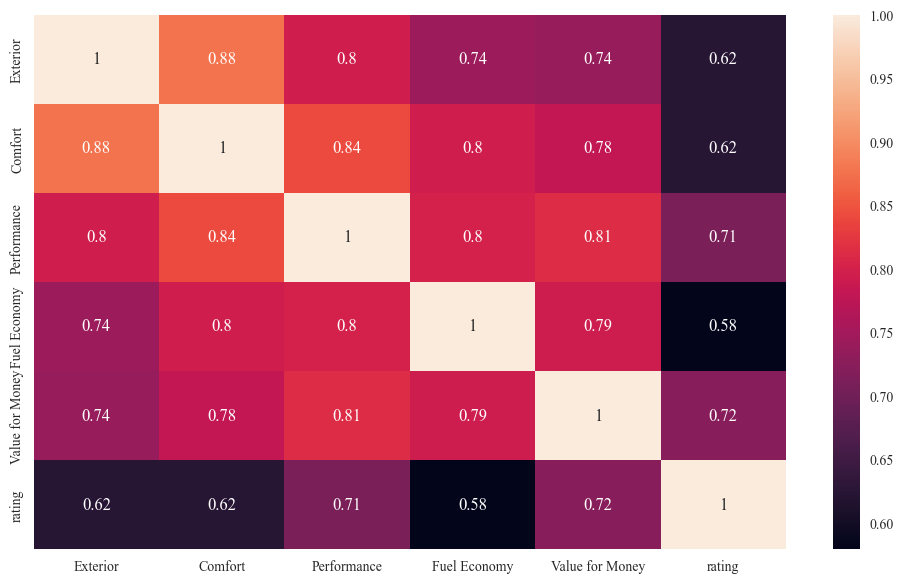

In [786]:
plt.figure(figsize=(10, 6))
df_numeric = df_car.select_dtypes(include=['float64', 'int64'])
sns.heatmap(df_numeric.corr(), annot=True, xticklabels=x_axis_labels)
plt.show()


In [787]:
df_car['Condition'].value_counts(normalize=True)*100

Condition
New              48.837209
Not Purchased    35.658915
Used             15.503876
Name: proportion, dtype: float64

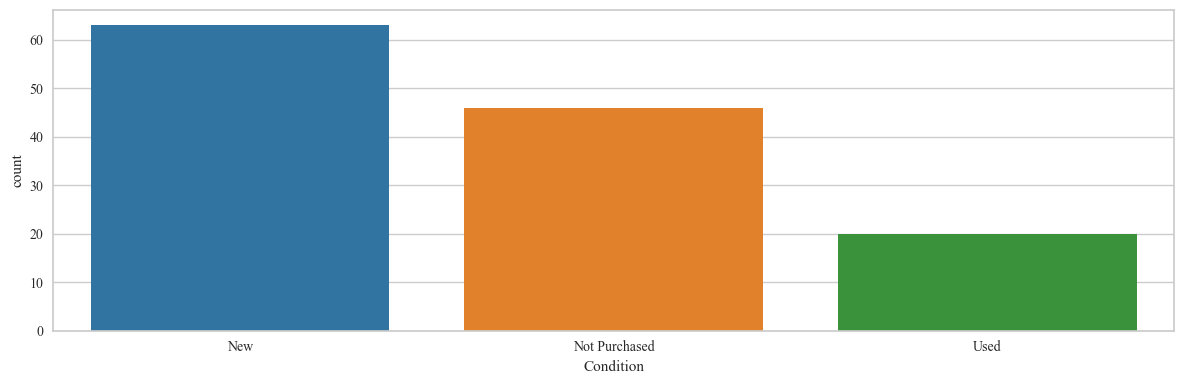

In [788]:
plt.figure(figsize=(12,4))
sns.countplot(x='Condition',data=df_car, palette='tab10')
plt.show()

In [789]:
df_car['driven'].value_counts(normalize=True)*100

driven
Did a short drive once     28.682171
Few thousand kilometers    26.356589
Few hundred kilometers     24.031008
Haven't driven it          19.379845
Its my mate since ages      1.550388
Name: proportion, dtype: float64

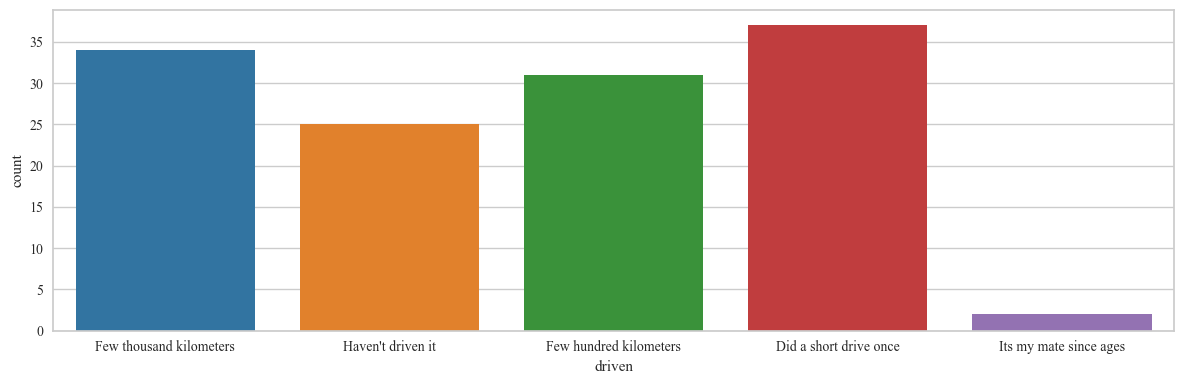

In [790]:
plt.figure(figsize=(12,4))
sns.countplot(x='driven',data=df_car, palette='tab10')
plt.show()

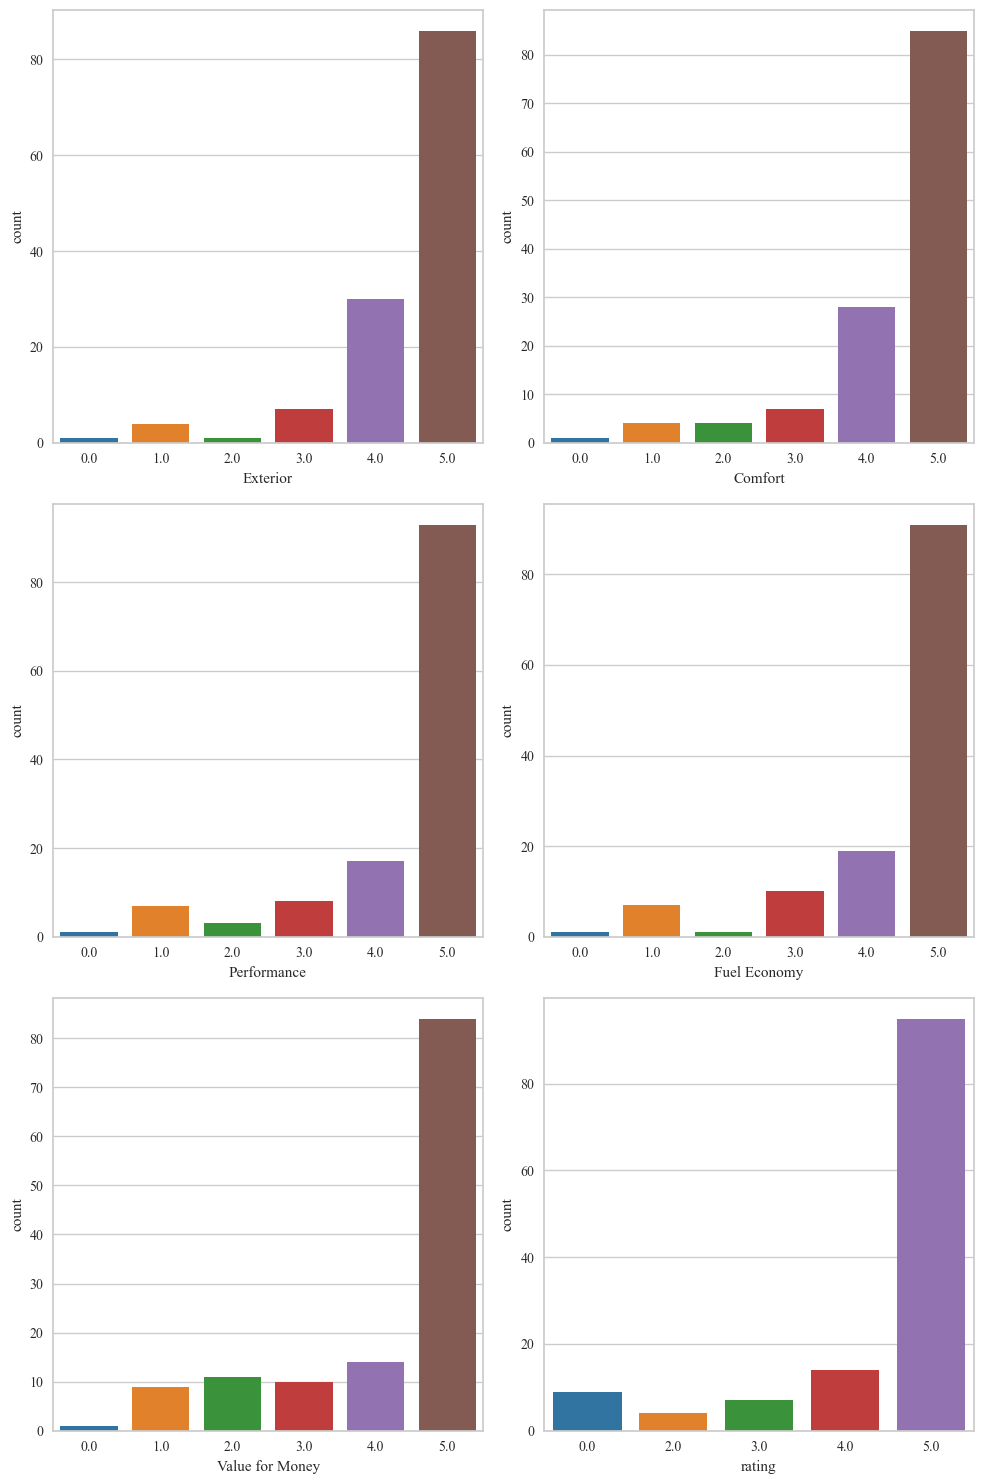

In [791]:
plt.rcParams['figure.figsize'] = [10,15]
plt.rcParams['figure.autolayout'] = True
f,axes = plt.subplots(3,2)
sns.countplot(x='Exterior',data=df_car,ax=axes[0][0], palette='tab10')
sns.countplot(x='Comfort',data=df_car,ax=axes[0][1], palette='tab10')
sns.countplot(x='Performance',data=df_car,ax=axes[1][0], palette='tab10')
sns.countplot(x='Fuel Economy',data=df_car,ax=axes[1][1], palette='tab10')
sns.countplot(x='Value for Money',data=df_car,ax=axes[2][0], palette='tab10')
sns.countplot(x='rating',data=df_car,ax=axes[2][1], palette='tab10')
plt.show()

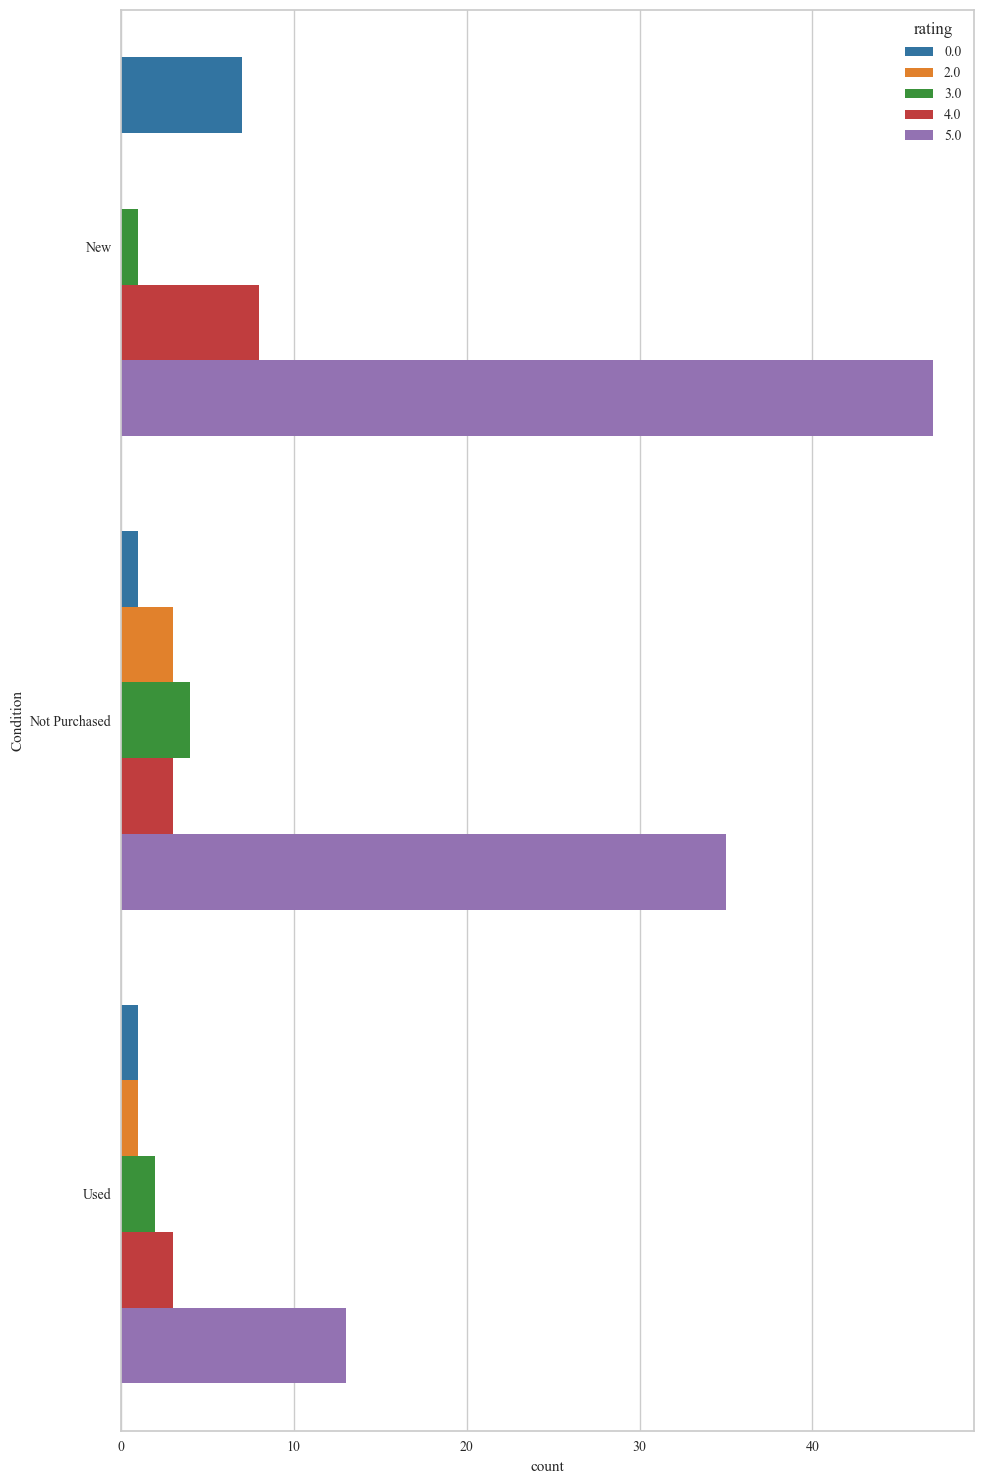

In [792]:
plt.figure(figsize=(10,15))
sns.countplot(y='Condition',data=df_car,hue='rating', palette='tab10')
plt.show()

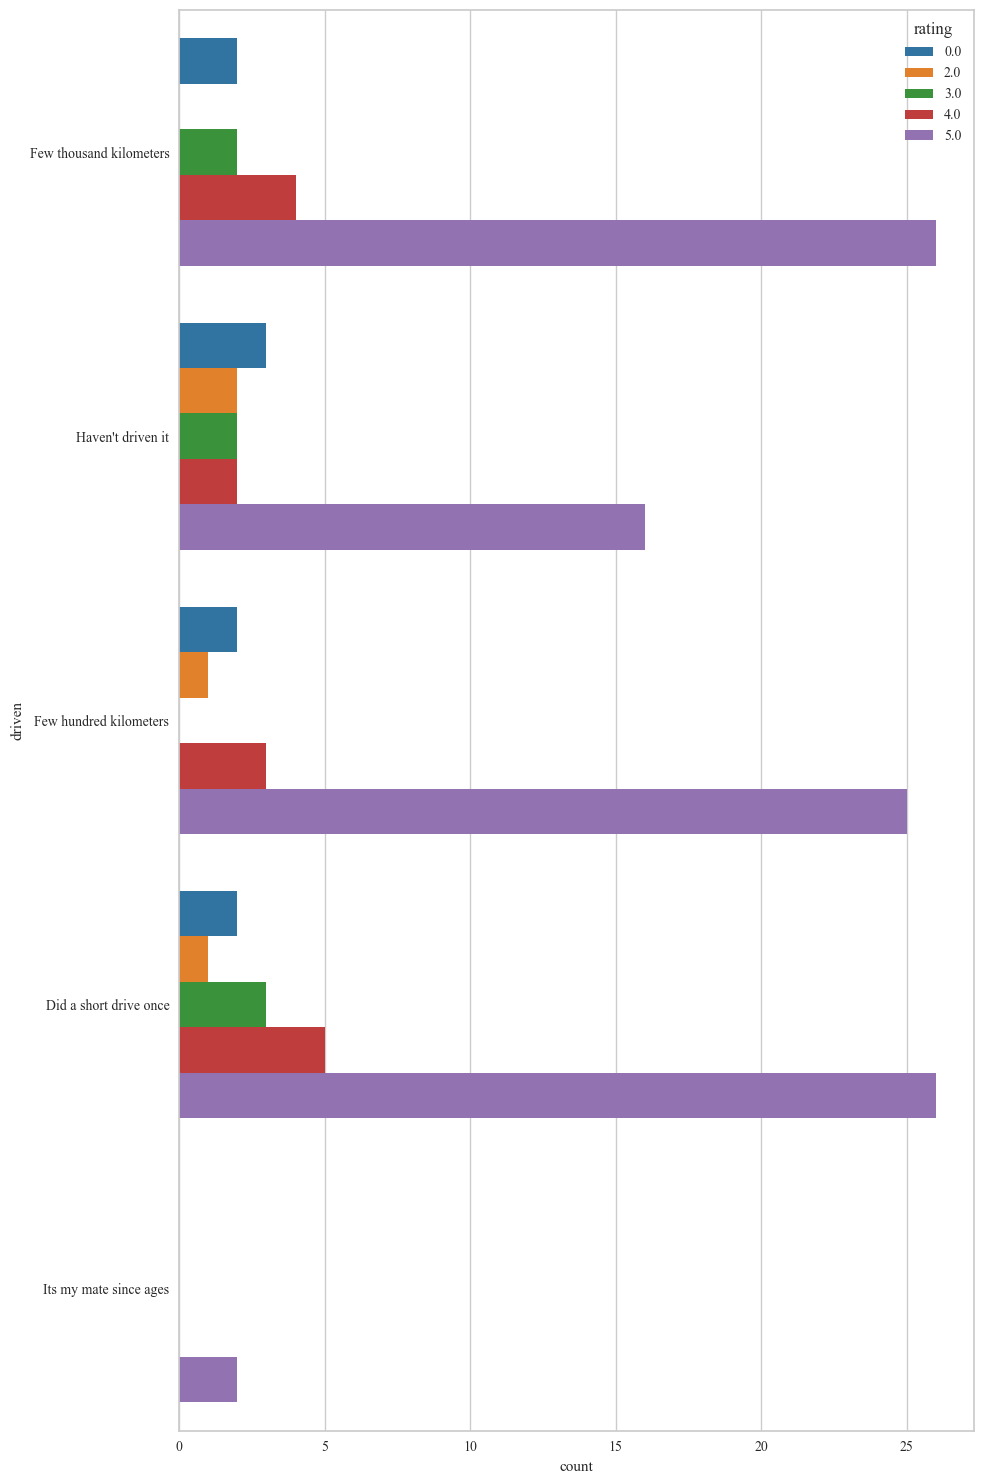

In [793]:
plt.figure(figsize=(10,15))
sns.countplot(y='driven',data=df_car,hue='rating', palette='tab10')
plt.show()

In [794]:
# Creating a copy of the data
df1 = df_car.copy()
df1.head()

review  Exterior  Comfort  \
0  Need to improve body style.It's amazing and dr...       5.0      5.0   
1  Tata EV has lot of flaws, worst part is servic...       3.0      2.0   
2  Very nice car , environmental friendly i like ...       5.0      5.0   
3  Company did not provide slow charging station ...       2.0      2.0   
4  Servicing and maintenance overall good and goo...       5.0      5.0   

   Performance  Fuel Economy  Value for Money      Condition  \
0          5.0           5.0              5.0            New   
1          1.0           2.0              1.0            New   
2          5.0           5.0              5.0            New   
3          1.0           1.0              1.0            New   
4          5.0           5.0              5.0  Not Purchased   

                    driven  rating  
0  Few thousand kilometers     5.0  
1  Few thousand kilometers     0.0  
2  Few thousand kilometers     5.0  
3        Haven't driven it     0.0  
4   Few hundred kilometers     5.0

In [795]:
df1.drop(df1.iloc[:,1:],inplace=True,axis=1)
df1.head()

review
0  Need to improve body style.It's amazing and dr...
1  Tata EV has lot of flaws, worst part is servic...
2  Very nice car , environmental friendly i like ...
3  Company did not provide slow charging station ...
4  Servicing and maintenance overall good and goo...

In [796]:
lm = WordNetLemmatizer()

In [797]:
# Creating a function for cleaning the text
def clean(text):
  text = str(text).lower()
  text = re.sub('[^a-z]',' ',str(text))
  text = text.split()
  text = [lm.lemmatize(j) for j in text if j not in set(stopwords.words('english'))]
  text = ' '.join(str(k) for k in text)
  return text

In [798]:
df1['review'][0]

"Need to improve body style.It's amazing and drives smoothly.I am happy to share feedback to each one. Very great experience and also come with lot of benefits. Fuel saving car."

In [799]:
df1['review'][0:1].apply(clean)

0    need improve body style amazing drive smoothly...
Name: review, dtype: object

In [800]:
# Creating a function to get polarity and subjectivity
def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def getpolarity(text):
  return TextBlob(text).sentiment.polarity
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [801]:
df1['cleantext'] = df1['review'].apply(clean)
df1['subjectivity'] = df1['cleantext'].apply(getsubjectivity)
df1['polarity'] = df1['cleantext'].apply(getpolarity)
df1['analysis'] = df1['polarity'].apply(getAnalysis)
df1.head()

review  \
0  Need to improve body style.It's amazing and dr...   
1  Tata EV has lot of flaws, worst part is servic...   
2  Very nice car , environmental friendly i like ...   
3  Company did not provide slow charging station ...   
4  Servicing and maintenance overall good and goo...   

                                           cleantext  subjectivity  polarity  \
0  need improve body style amazing drive smoothly...      0.883333  0.733333   
1  tata ev lot flaw worst part service center clu...      0.466667 -0.286364   
2  nice car environmental friendly like car happy...      0.833333  0.591667   
3  company provide slow charging station new car ...      0.239394  0.020707   
4  servicing maintenance overall good good mileag...      0.562500  0.512500   

   analysis  
0  Positive  
1  Negative  
2  Positive  
3  Positive  
4  Positive

In [802]:
score =df1['analysis'].value_counts()
score

analysis
Positive    123
Negative      6
Name: count, dtype: int64

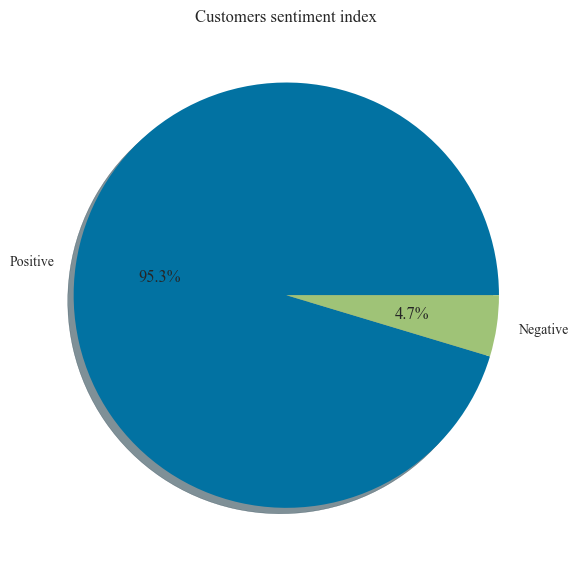

In [803]:
plt.figure(figsize=(6,6))
plt.pie(score,labels=['Positive','Negative'],shadow=True,autopct='%1.1f%%')
plt.title('Customers sentiment index')
plt.show()

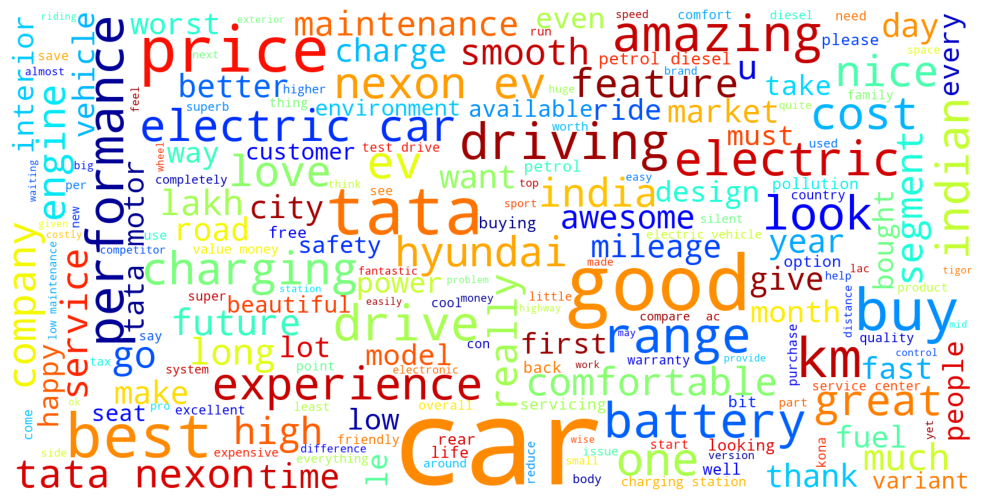

In [804]:
# Creating a WordCloud
from wordcloud import WordCloud, STOPWORDS
def word_cloud(wd_list):
  stopwords = set(STOPWORDS)
  all_words = ' '.join([text for text in wd_list])
  wordcloud = WordCloud(background_color='white',
                        stopwords=stopwords,
                        width=1600, height=800,
                        random_state=1,
                        colormap='jet',
                        max_words=200,
                        max_font_size=200).generate(all_words)
  plt.figure(figsize=(10,10))
  plt.axis('off')
  plt.imshow(wordcloud)
word_cloud(df1['cleantext'][:5000])

In [805]:
df2 = df_car.copy()
df2 = df2.iloc[:,1:6]
df2.head()

Exterior  Comfort  Performance  Fuel Economy  Value for Money
0       5.0      5.0          5.0           5.0              5.0
1       3.0      2.0          1.0           2.0              1.0
2       5.0      5.0          5.0           5.0              5.0
3       2.0      2.0          1.0           1.0              1.0
4       5.0      5.0          5.0           5.0              5.0

In [806]:
pca = PCA()
principal_components = pca.fit_transform(df2)
pca_df = pd.DataFrame(data=principal_components,columns=['PCA1','PCA2','PCA3','PCA4','PCA5'])
pca_df.head()

PCA1      PCA2      PCA3      PCA4      PCA5
0 -1.407144 -0.064815  0.056179  0.073389 -0.007120
1  5.877478  0.263820 -0.006428  0.903018  0.359038
2 -1.407144 -0.064815  0.056179  0.073389 -0.007120
3  6.685448 -0.177019  0.604307  0.365228 -0.341412
4 -1.407144 -0.064815  0.056179  0.073389 -0.007120

In [807]:
pca_df[['PCA1','PCA2','PCA3','PCA4','PCA5']].std()

PCA1    2.318130
PCA2    0.634648
PCA3    0.536859
PCA4    0.471836
PCA5    0.343938
dtype: float64

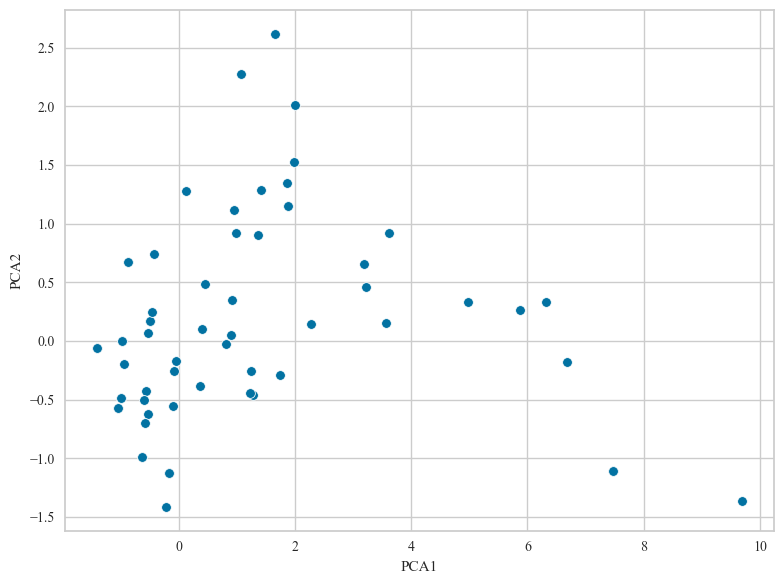

In [808]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df,x='PCA1',y='PCA2',palette='deep')
plt.show()

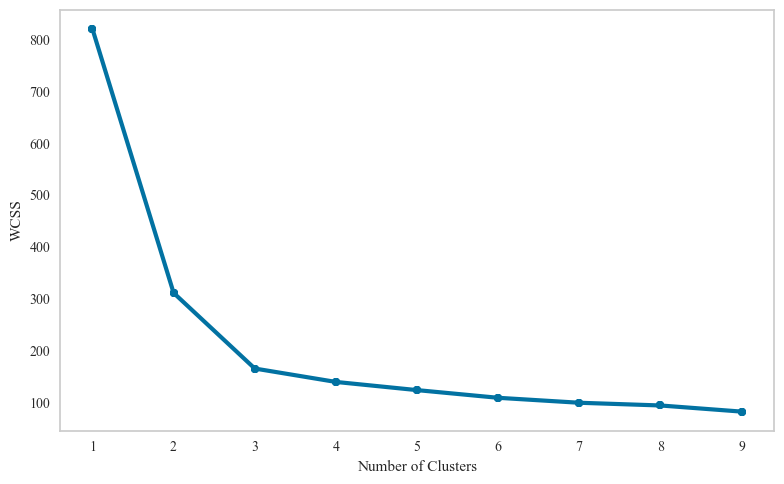

In [809]:
# Using elbow method
wcss = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 10)
  kmeans.fit(df2)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.grid()
plt.plot(range(1,10),wcss, marker = '8',linewidth='3')
plt.xlabel(range(1,10))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

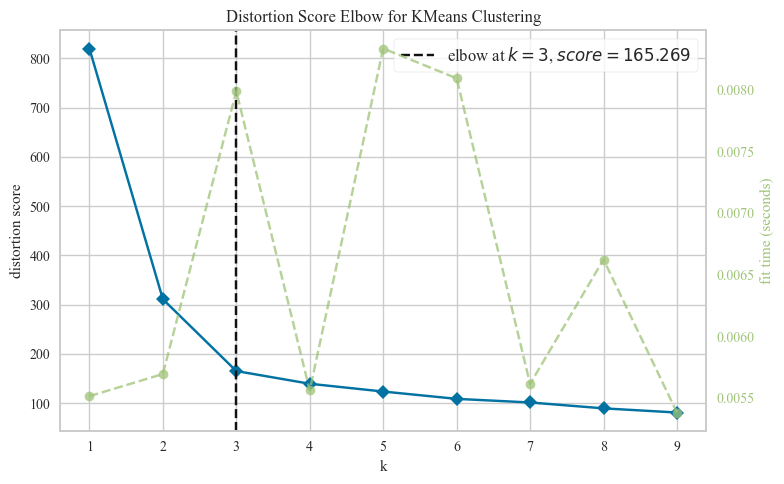

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [810]:
plt.figure(figsize=(8,5))
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(df2)
visualizer.show()

In [811]:
k_means_model = KMeans(3)
k_means_model.fit_predict(df2)
pca_df_kmeans = pd.concat([pca_df,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)
pca_df_kmeans.head()

PCA1      PCA2      PCA3      PCA4      PCA5  cluster
0 -1.407144 -0.064815  0.056179  0.073389 -0.007120        0
1  5.877478  0.263820 -0.006428  0.903018  0.359038        1
2 -1.407144 -0.064815  0.056179  0.073389 -0.007120        0
3  6.685448 -0.177019  0.604307  0.365228 -0.341412        1
4 -1.407144 -0.064815  0.056179  0.073389 -0.007120        0

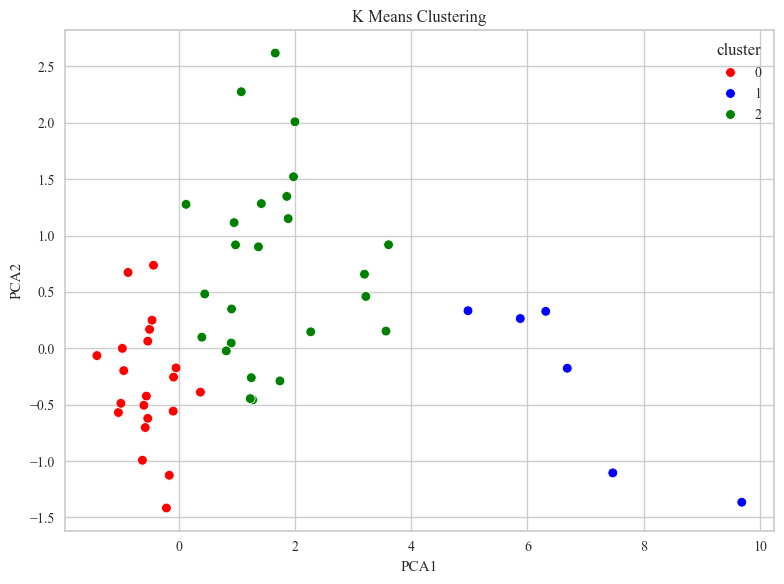

In [812]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x='PCA1',y='PCA2',hue='cluster',data=pca_df_kmeans,palette=['red','blue','green'])
plt.title('K Means Clustering')
plt.show()

In [813]:
k_means_model = KMeans(3)
k_means_model.fit_predict(df2)
pca_df_kmeans1 = pd.concat([df_car,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)
pca_df_kmeans1.head()

review  Exterior  Comfort  \
0  Need to improve body style.It's amazing and dr...       5.0      5.0   
1  Tata EV has lot of flaws, worst part is servic...       3.0      2.0   
2  Very nice car , environmental friendly i like ...       5.0      5.0   
3  Company did not provide slow charging station ...       2.0      2.0   
4  Servicing and maintenance overall good and goo...       5.0      5.0   

   Performance  Fuel Economy  Value for Money      Condition  \
0          5.0           5.0              5.0            New   
1          1.0           2.0              1.0            New   
2          5.0           5.0              5.0            New   
3          1.0           1.0              1.0            New   
4          5.0           5.0              5.0  Not Purchased   

                    driven  rating  cluster  
0  Few thousand kilometers     5.0        0  
1  Few thousand kilometers     0.0        1  
2  Few thousand kilometers     5.0        0  
3        Haven't driven it     0.0        1  
4   Few hundred kilometers     5.0        0

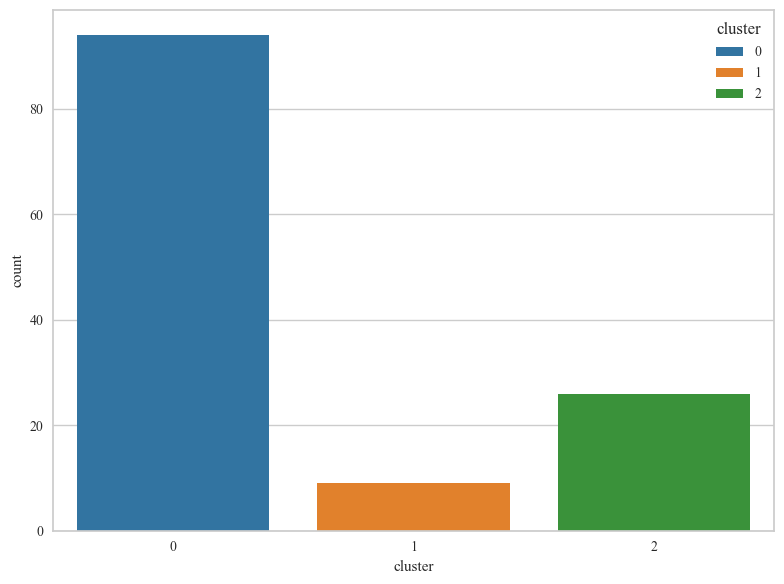

In [814]:
plt.figure(figsize=(8,6))
sns.countplot(x='cluster',data=pca_df_kmeans1, hue='cluster', palette='tab10')
plt.show()

In [815]:
pca_df_kmeans1['cluster'].value_counts(normalize=True)*100

cluster
0    72.868217
2    20.155039
1     6.976744
Name: proportion, dtype: float64

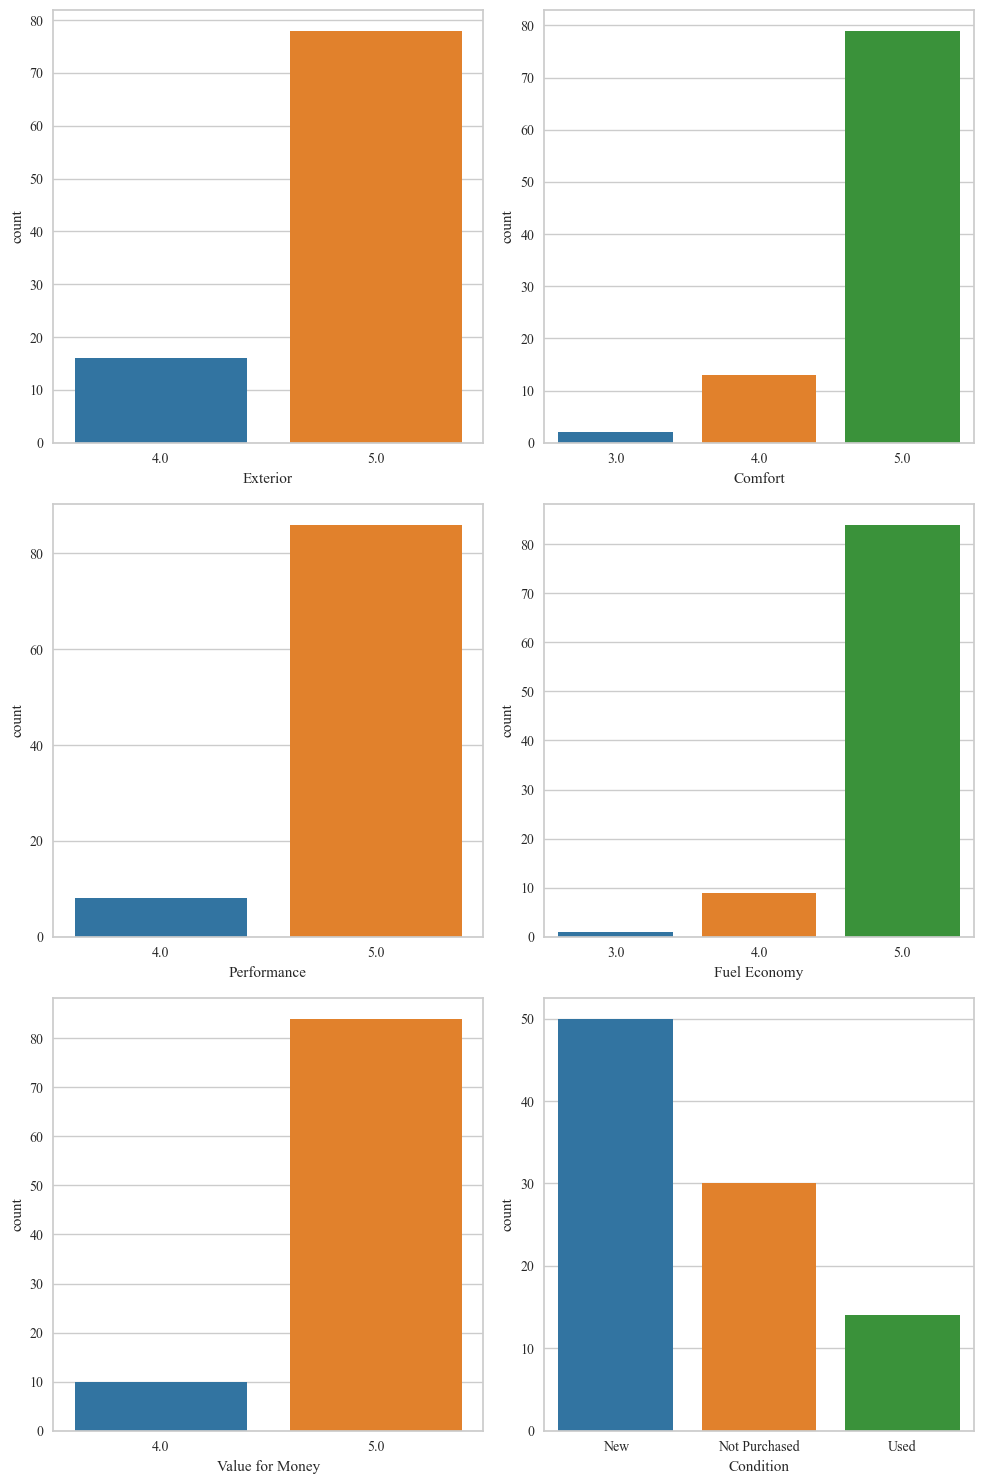

In [816]:
# Analysis of Cluster 1
plt.rcParams['figure.figsize'] = [10,15]
plt.rcParams['figure.autolayout'] = True
f,axes = plt.subplots(3,2)
sns.countplot(x='Exterior',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax = axes[0][0], palette='tab10')
sns.countplot(x='Comfort',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[0][1], palette='tab10')
sns.countplot(x='Performance',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[1][0], palette='tab10')
sns.countplot(x='Fuel Economy',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[1][1], palette='tab10')
sns.countplot(x='Value for Money',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[2][0], palette='tab10')
sns.countplot(x='Condition',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[2][1], palette='tab10')
plt.show()

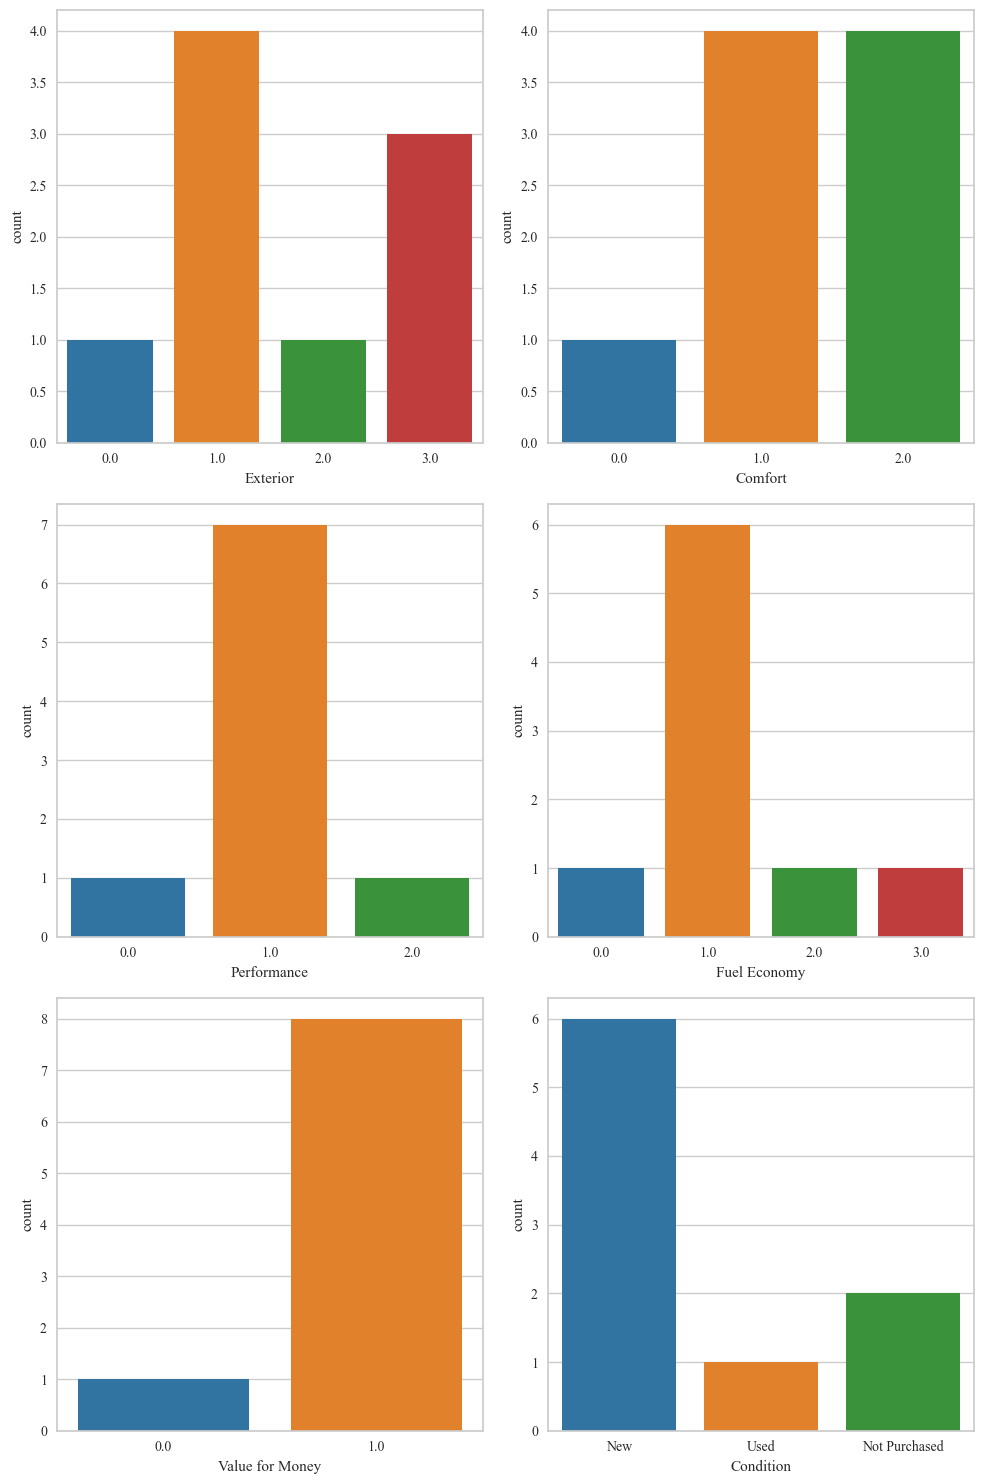

In [817]:
# Analysis of Cluster 2
plt.rcParams['figure.figsize'] = [10,15]
plt.rcParams['figure.autolayout'] = True
f,axes = plt.subplots(3,2)
sns.countplot(x='Exterior',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax = axes[0][0], palette='tab10')
sns.countplot(x='Comfort',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[0][1], palette='tab10')
sns.countplot(x='Performance',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[1][0], palette='tab10')
sns.countplot(x='Fuel Economy',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[1][1], palette='tab10')
sns.countplot(x='Value for Money',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[2][0], palette='tab10')
sns.countplot(x='Condition',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[2][1], palette='tab10')
plt.show()

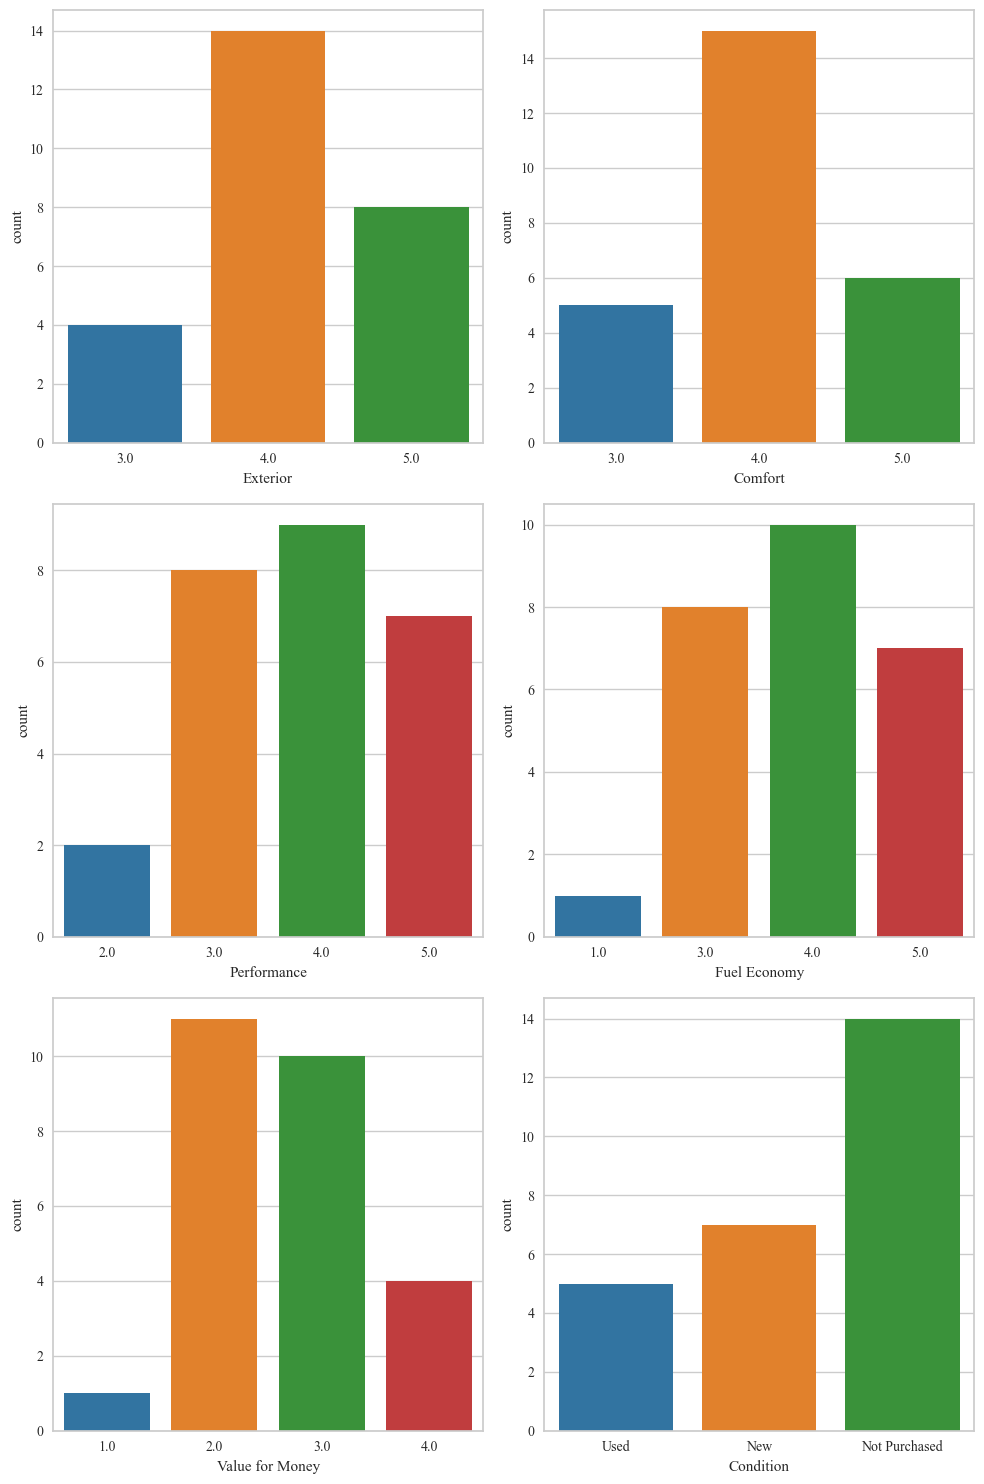

In [818]:
# Analysis of Cluster 3
plt.rcParams['figure.figsize'] = [10,15]
plt.rcParams['figure.autolayout'] = True
f,axes = plt.subplots(3,2)
sns.countplot(x='Exterior',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax = axes[0][0], palette='tab10')
sns.countplot(x='Comfort',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[0][1], palette='tab10')
sns.countplot(x='Performance',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[1][0], palette='tab10')
sns.countplot(x='Fuel Economy',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[1][1], palette='tab10')
sns.countplot(x='Value for Money',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[2][0], palette='tab10')
sns.countplot(x='Condition',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[2][1], palette='tab10')
plt.show()

In [819]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier, plot_tree
from statsmodels.graphics.mosaicplot import mosaic

In [820]:
df = pd.read_csv("statEV.csv")

In [821]:
df.head()

state Total Ev Total non Ev  Average Income(INR)  \
0   Andaman & Nicobar Island       162     1,46,945               218000   
1   Arunachal Pradesh               20     2,52,965               192360   
2   Assam                       64,766    46,77,053                86857   
3   Bihar                       83,335  1,04,07,078                43605   
4   Chandigarh                   2,812     7,46,881               292977   

   BusinessRanking  
0               22  
1               29  
2               20  
3               26  
4               29

In [822]:
df.isnull().sum()

state                  0
Total Ev               0
Total non Ev           0
Average Income(INR)    0
BusinessRanking        0
dtype: int64

In [823]:
df["Total Ev"]=df["Total Ev"].apply(lambda x: x.replace(",",""))
df["Total non Ev"]=df["Total non Ev"].apply(lambda x: x.replace(",",""))

In [824]:
df["Total non Ev"] = pd.to_numeric(df['Total non Ev'])
df["Total non Ev"].dtypes

dtype('int64')

In [825]:
df["Total Ev"] = pd.to_numeric(df['Total Ev'], errors='coerce')
df['Total Ev'].dtypes

dtype('int64')

In [826]:
df["EV_percentage"]=df["Total Ev"]/(df["Total non Ev"]+df["Total Ev"])*100

[]

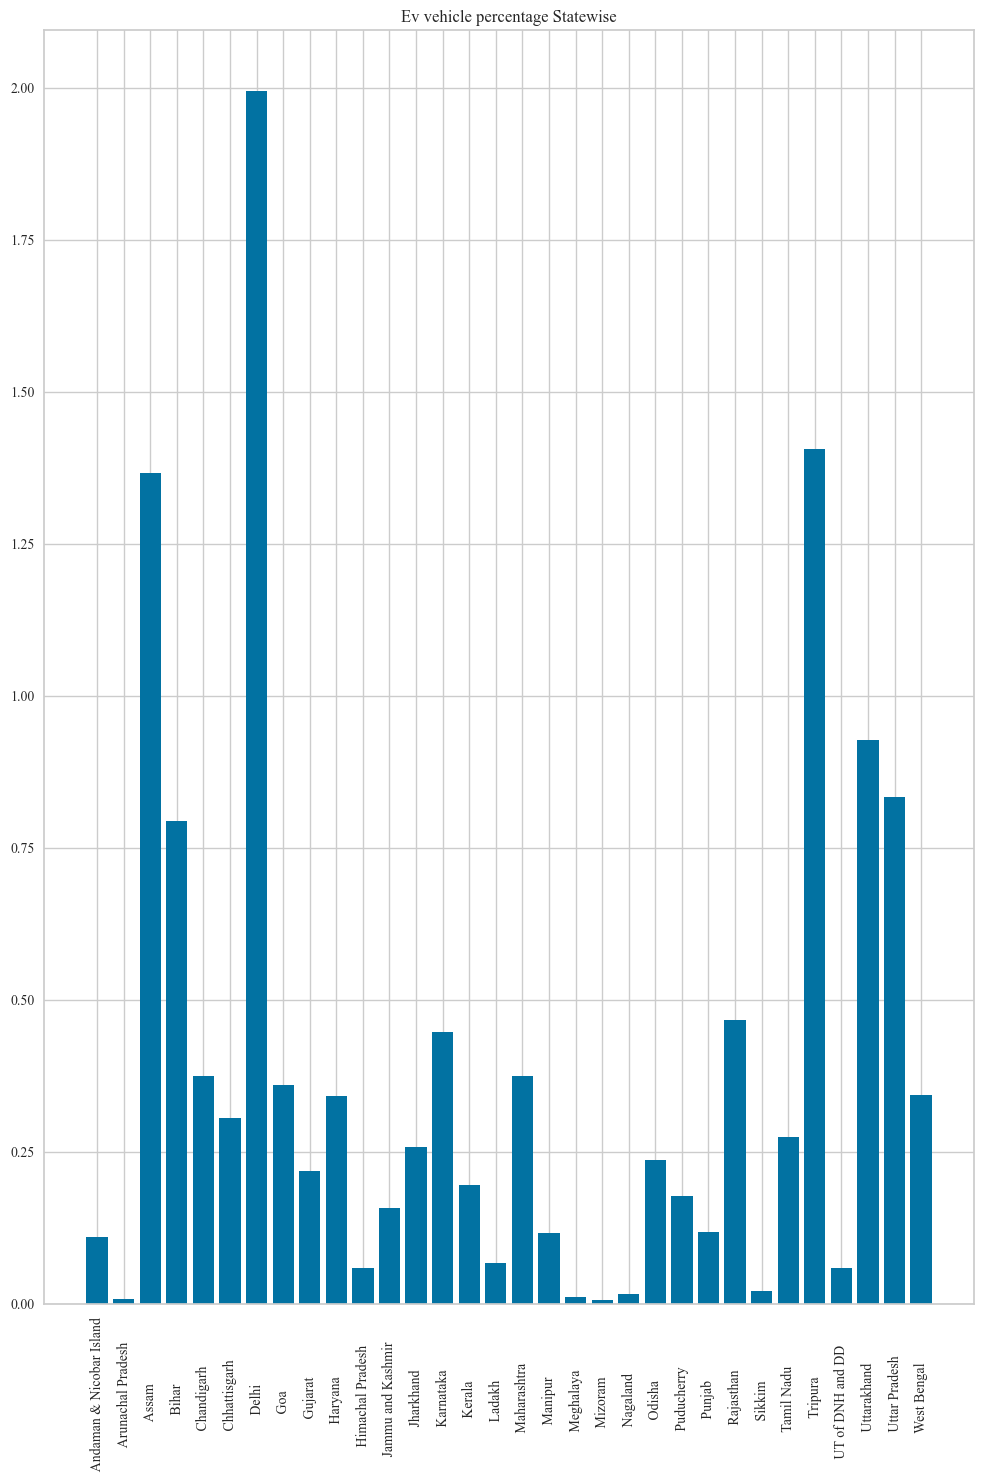

In [827]:
plt.bar(df["state"], df["EV_percentage"])
plt.xticks(rotation='vertical')
plt.title("Ev vehicle percentage Statewise")
plt.savefig('Ev_percentage.png', bbox_inches='tight', pad_inches=0) 
plt.plot()

In [828]:
Topstate= df.sort_values(by='EV_percentage', ascending=False)

In [829]:
Topstate["state"].head()

6      Delhi                    
27     Tripura                  
2      Assam                    
29     Uttarakhand              
30     Uttar Pradesh            
Name: state, dtype: object

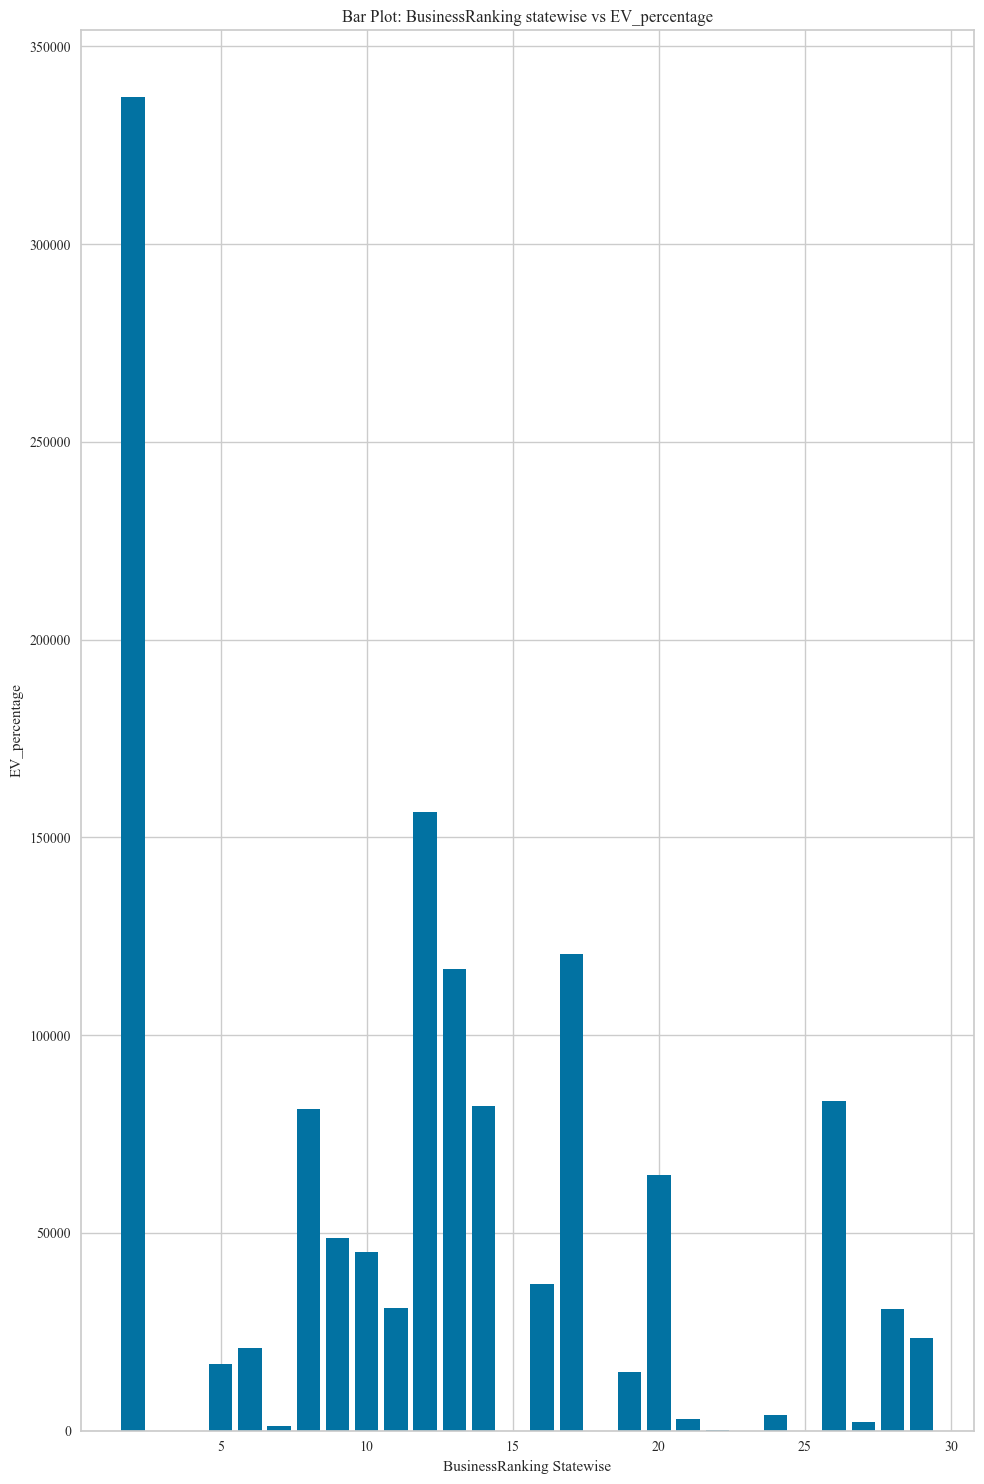

In [830]:
#Bar plot
plt.bar(df['BusinessRanking'],df['Total Ev'] )

plt.xlabel('BusinessRanking Statewise')
plt.ylabel('EV_percentage')
plt.title('Bar Plot: BusinessRanking statewise vs EV_percentage')
plt.savefig('image.png', bbox_inches='tight', pad_inches=0) 
plt.show()

In [831]:
max_average=df["Average Income(INR)"].max()
df["normalize_Income"] = df["Average Income(INR)"]/abs(max_average)
df["normalize_Income"]= df["normalize_Income"].round(2)

In [832]:
drop_cols=[0,1,2,3,5]
kmeans_df = df.drop(df.columns[drop_cols], axis=1)
K=kmeans_df.drop(kmeans_df.columns[0], axis=1)
kmeans_df.head()
K.head()

normalize_Income
0              0.51
1              0.45
2              0.20
3              0.10
4              0.68

In [833]:
k1=K.iloc[:5,:]
arr = k1.to_numpy()
arr

array([[0.51],
       [0.45],
       [0.2 ],
       [0.1 ],
       [0.68]])

In [834]:
K['normalize_Income'].dtypes

dtype('float64')

[]

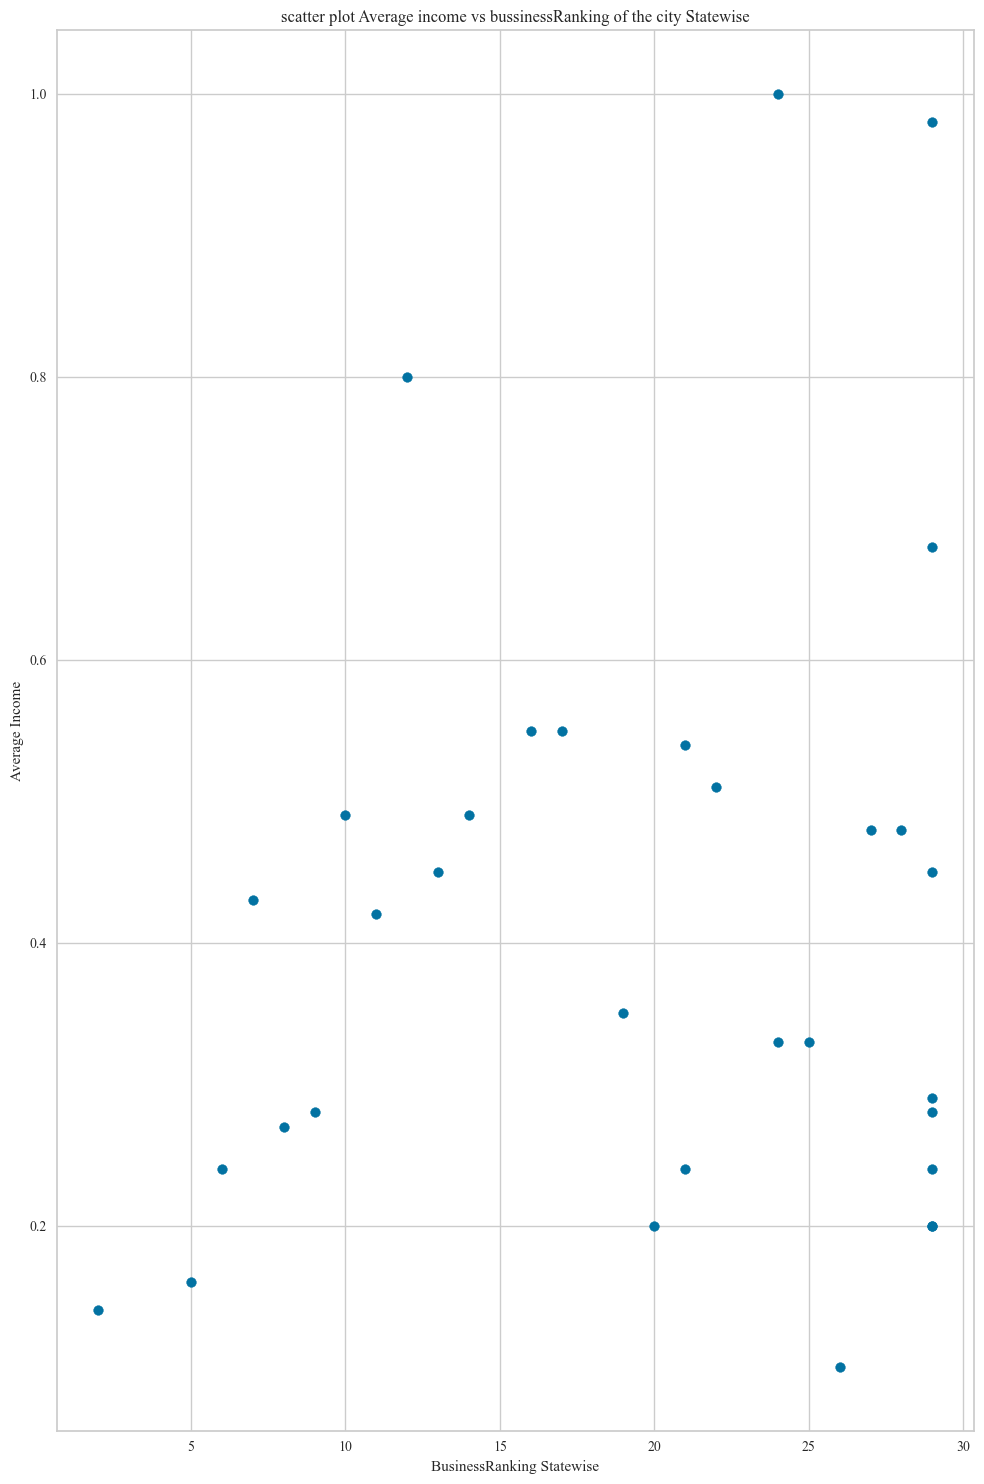

In [835]:
plt.scatter(kmeans_df['BusinessRanking'],kmeans_df["normalize_Income"])
plt.title("scatter plot Average income vs bussinessRanking of the city Statewise")
plt.xlabel("BusinessRanking Statewise")
plt.ylabel("Average Income")
plt.savefig('kmeansclustering.png', bbox_inches='tight', pad_inches=0) 
plt.plot()

In [836]:
X = kmeans_df.to_numpy()

In [837]:
k=df.iloc[:, 3:5]

In [838]:
kmeans_df.isnull().sum()

BusinessRanking     0
normalize_Income    0
dtype: int64

In [839]:
X=kmeans_df.iloc[:,:].values
km=KMeans(n_clusters=3 )

In [840]:
y_means=km.fit_predict(X)

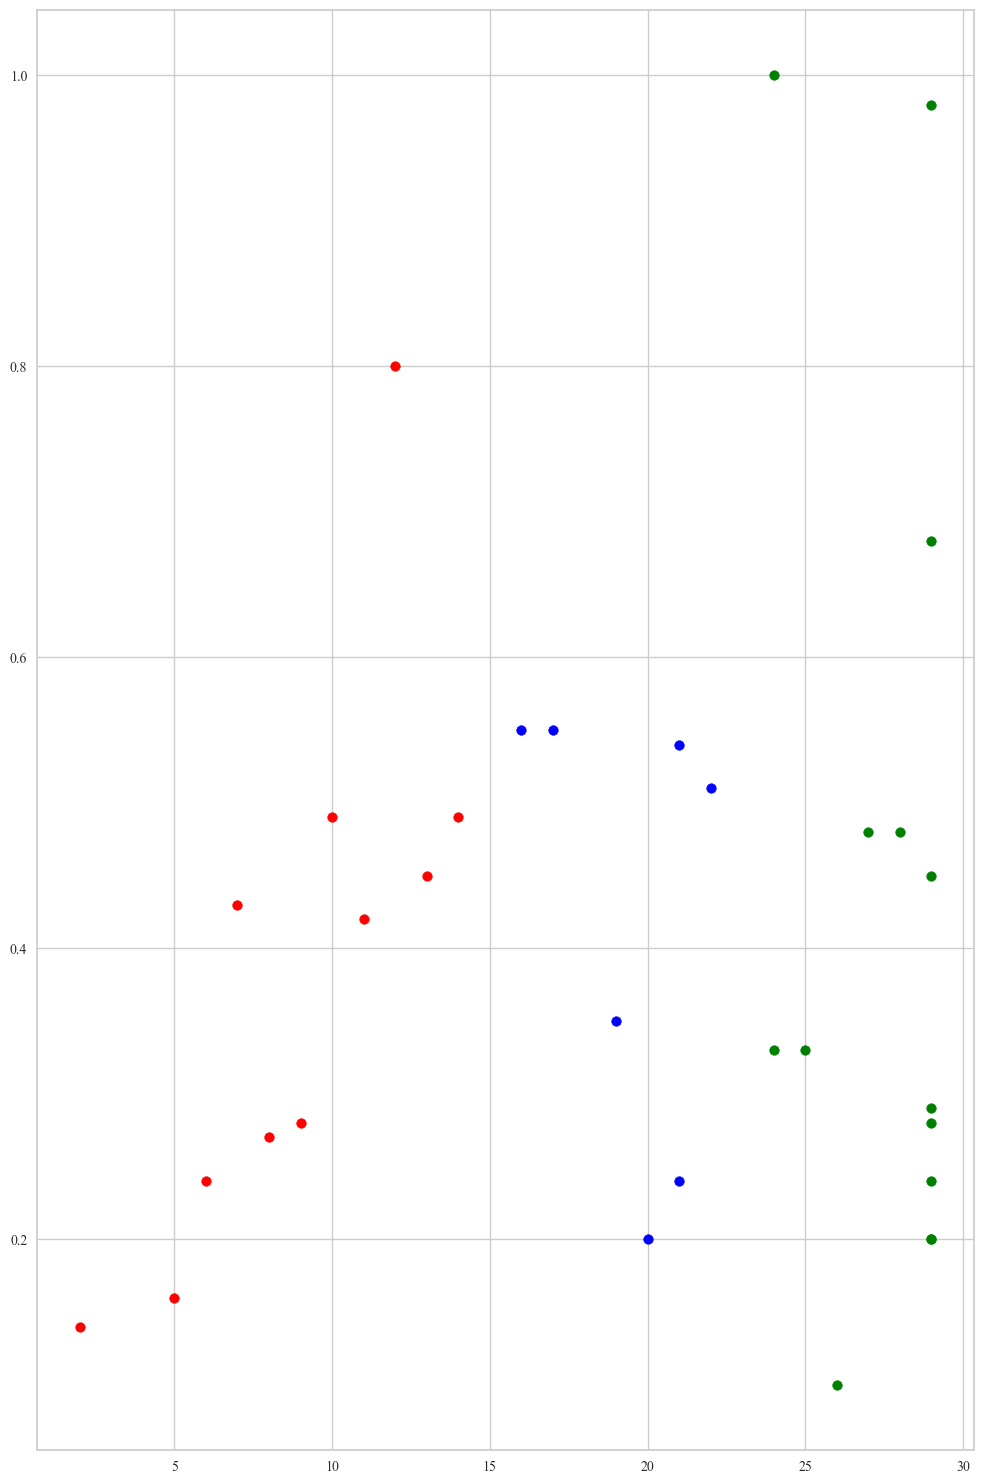

In [841]:

plt.scatter(X[y_means==0,0], X[y_means==0,1], color="blue")
plt.scatter(X[y_means==1,0], X[y_means==1,1], color="red")
plt.scatter(X[y_means==2,0], X[y_means==2,1], color="green")
plt.savefig('kmeansclustering1.png', bbox_inches='tight', pad_inches=0)
# plt.scatter(X[y_means==3,0], X[y_means==3,1], color="yellow")

In [842]:
cols=kmeans_df.columns.values
values=kmeans_df[cols].values

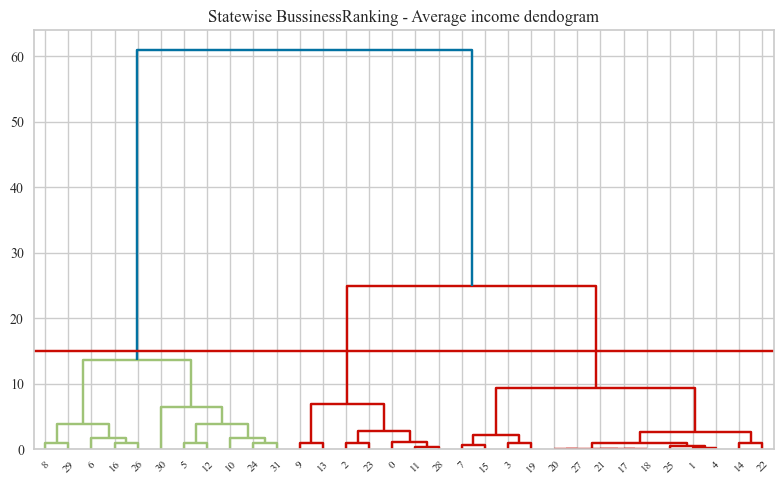

In [843]:
# import scipy.cluster.hierarchy as shc

plt.figure(figsize=(8, 5))
plt.title("Statewise BussinessRanking - Average income dendogram")
dend = shc.dendrogram(shc.linkage(values, method='ward'))
plt.axhline(y = 15, color = 'r', linestyle = '-')
plt.savefig('Dendogram.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [844]:
sum(df['BusinessRanking']>25)

11

In [845]:
data=pd.read_csv('CAR_data_1.csv')

In [846]:
data.head()

Product  Market type   Body Production type  Market share(%)  \
0      Tata Nexon Ev  Mass-market    SUV           Local            63.00   
1      Tata Tigor Ev  Mass-market  sedan           Local            24.00   
2             MG EZ5  Mass-market    SUV             CKD            11.50   
3       Hyundai Kona  Mass-market    SUV             CKD             0.59   
4  Mahindra E-Verito  Mass-market  sedan           Local             0.36   

   Price(lakh)  Battery(kWh)  Range(km)  
0        15.00          30.2        312  
1        12.50          26.0        315  
2        23.38          50.3        419  
3        24.00          39.2        452  
4        16.00          34.5        375

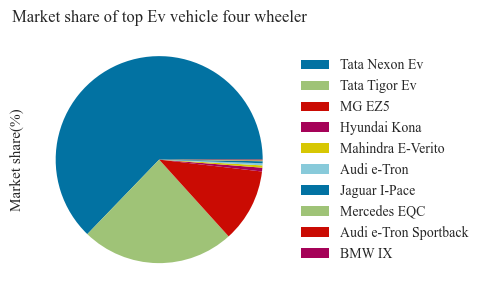

In [847]:
market_share = data['Market share(%)']

fig, ax = plt.subplots(figsize=(5, 5))
pie = market_share.plot.pie(labels=None, )

# Create custom labels for legends
custom_labels = data['Product'].tolist()

ax.legend(custom_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Market share of top Ev vehicle four wheeler')
plt.savefig('MarketShare.png', bbox_inches='tight', pad_inches=0)
plt.savefig('Share1.png', bbox_inches='tight', pad_inches=0) 
plt.show()


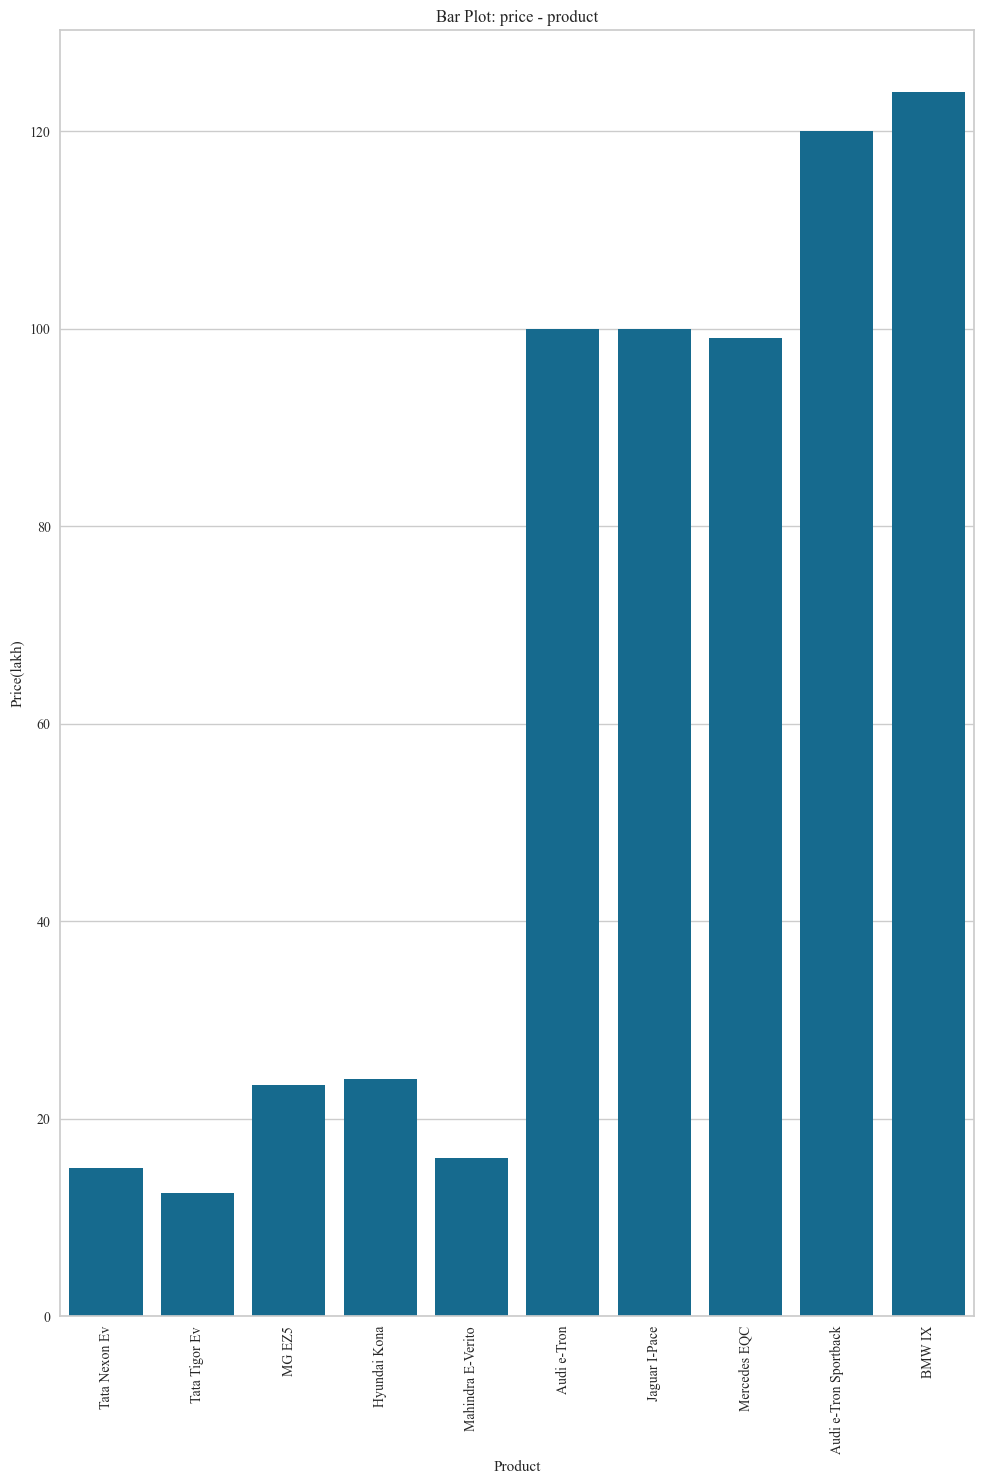

In [849]:
sns.barplot(x='Product', y='Price(lakh)', data=data)
plt.xticks(rotation='vertical')
plt.title('Bar Plot: price - product')
plt.show()


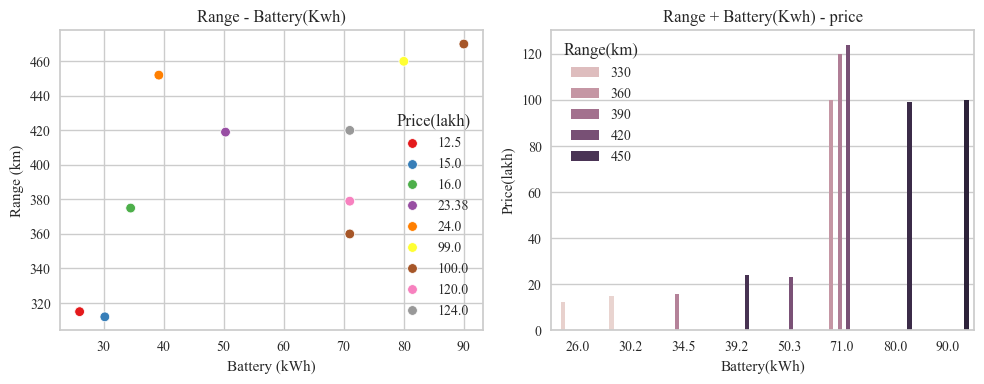

In [851]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(x='Battery(kWh)', y='Range(km)', hue='Price(lakh)', palette='Set1', data=data, ax=axes[0])
axes[0].set_xlabel('Battery (kWh)')
axes[0].set_ylabel('Range (km)')
axes[0].set_title('Range - Battery(Kwh)')

sns.barplot(x='Battery(kWh)', y='Price(lakh)', hue='Range(km)', data=data, ax=axes[1])
axes[1].set_ylabel('Price(lakh)')
axes[1].set_title('Range + Battery(Kwh) - price')

plt.tight_layout()
plt.savefig('Range-Battery.png', bbox_inches='tight', pad_inches=0)
plt.show()


In [852]:
Cdata=pd.read_csv("customerBehavior.csv")

In [853]:
Cdata.head()

Age Profession Marrital Status      Education  No of Dependents  \
0   27   Salaried          Single  Post Graduate                 0   
1   35   Salaried         Married  Post Graduate                 2   
2   45   Business         Married       Graduate                 4   
3   41   Business         Married  Post Graduate                 3   
4   31   Salaried         Married  Post Graduate                 2   

  Personal loan House Loan Wife Working   Salary  Wife Salary  Total Salary  \
0           Yes         No           No   800000            0        800000   
1           Yes        Yes          Yes  1400000       600000       2000000   
2           Yes        Yes           No  1800000            0       1800000   
3            No         No          Yes  1600000       600000       2200000   
4           Yes         No          Yes  1800000       800000       2600000   

     Make    Price  
0     i20   800000  
1    Ciaz  1000000  
2  Duster  1200000  
3    City  1200000  
4     SUV  1600000

In [854]:
Cdata['House Loan']=Cdata['House Loan'].apply(lambda x: 1 if x=="Yes" else 0)
Cdata['Personal loan']=Cdata['Personal loan'].apply(lambda x: 1 if x=="Yes" else 0)
Cdata['Wife Working']=Cdata['Wife Working'].apply(lambda x: 1 if x=="Yes" else 0)
Cdata['Profession']=Cdata['Profession'].apply(lambda x: 1 if x=="Salaried" else 0)
Cdata.head()

Age  Profession Marrital Status      Education  No of Dependents  \
0   27           1          Single  Post Graduate                 0   
1   35           1         Married  Post Graduate                 2   
2   45           0         Married       Graduate                 4   
3   41           0         Married  Post Graduate                 3   
4   31           1         Married  Post Graduate                 2   

   Personal loan  House Loan  Wife Working   Salary  Wife Salary  \
0              1           0             0   800000            0   
1              1           1             1  1400000       600000   
2              1           1             0  1800000            0   
3              0           0             1  1600000       600000   
4              1           0             1  1800000       800000   

   Total Salary    Make    Price  
0        800000     i20   800000  
1       2000000    Ciaz  1000000  
2       1800000  Duster  1200000  
3       2200000    City  1200000  
4       2600000     SUV  1600000

In [855]:
max_salary = Cdata["Salary"].max()
Cdata["normalize_salary"] = Cdata["Salary"]/abs(max_salary )
Cdata["normalize_salary"]= Cdata["normalize_salary"].round(2)
max_price=Cdata["Price"].max()
Cdata["normalize_price"] = Cdata["Price"]/abs(max_price)
Cdata["normalize_price"]= Cdata["normalize_price"].round(2)
Cdata.head()

Age  Profession Marrital Status      Education  No of Dependents  \
0   27           1          Single  Post Graduate                 0   
1   35           1         Married  Post Graduate                 2   
2   45           0         Married       Graduate                 4   
3   41           0         Married  Post Graduate                 3   
4   31           1         Married  Post Graduate                 2   

   Personal loan  House Loan  Wife Working   Salary  Wife Salary  \
0              1           0             0   800000            0   
1              1           1             1  1400000       600000   
2              1           1             0  1800000            0   
3              0           0             1  1600000       600000   
4              1           0             1  1800000       800000   

   Total Salary    Make    Price  normalize_salary  normalize_price  
0        800000     i20   800000              0.21             0.27  
1       2000000    Ciaz  1000000              0.37             0.33  
2       1800000  Duster  1200000              0.47             0.40  
3       2200000    City  1200000              0.42             0.40  
4       2600000     SUV  1600000              0.47             0.53

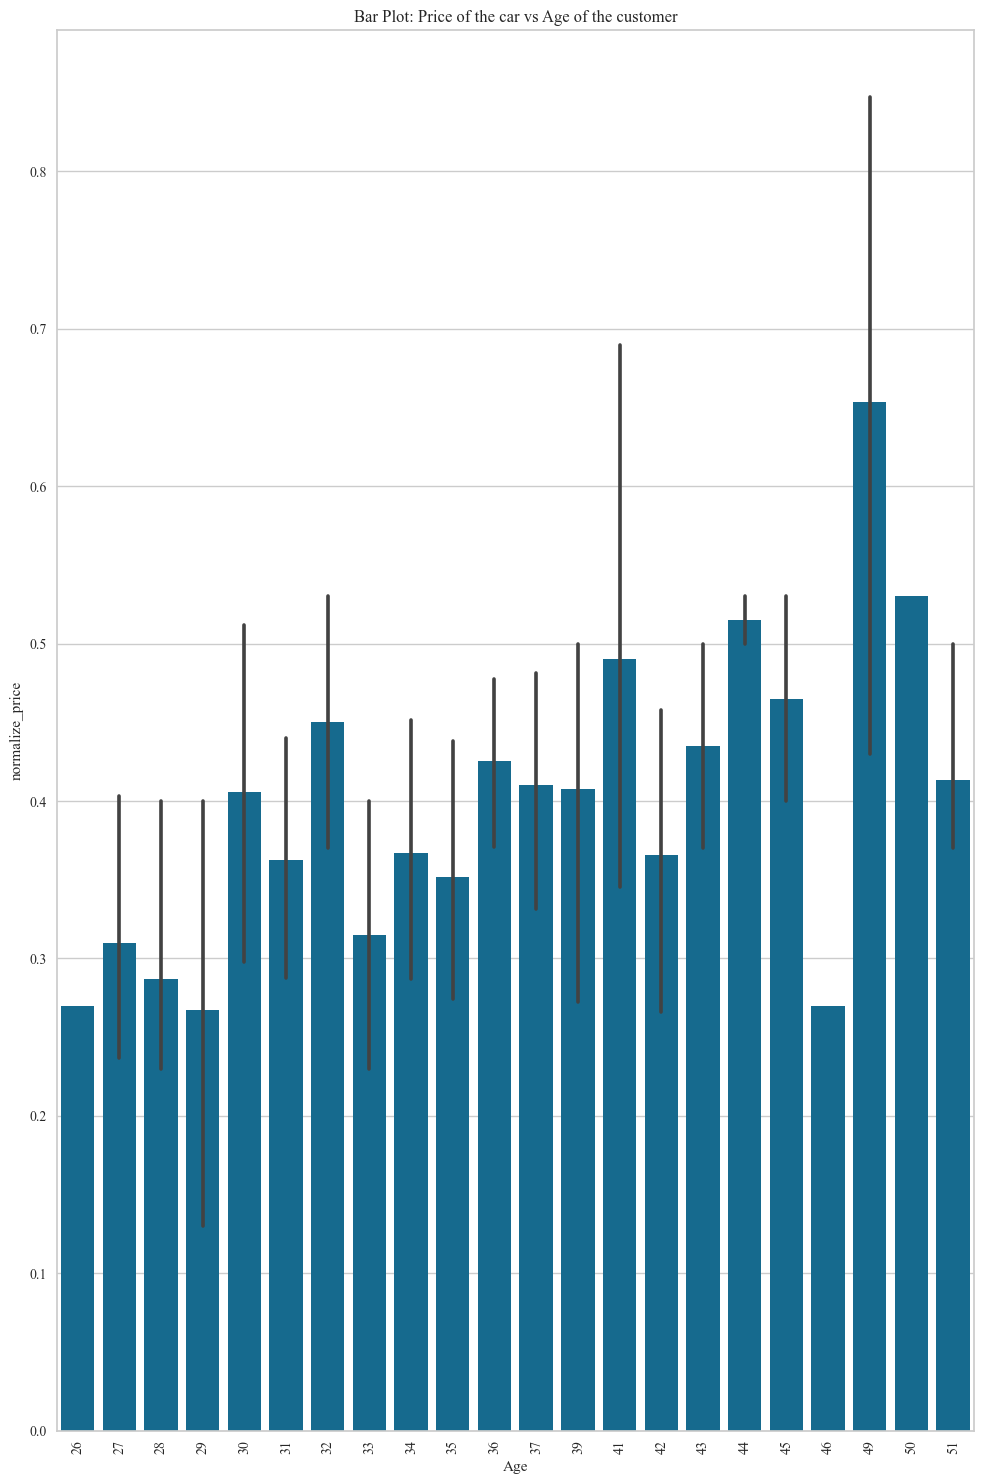

In [857]:
sns.barplot(x='Age', y='normalize_price', data=Cdata)
plt.xticks(rotation='vertical')
plt.title('Bar Plot: Price of the car vs Age of the customer')
plt.savefig('Age-product.png', bbox_inches='tight', pad_inches=0)
plt.show()


In [858]:
## Transform age column:
Cdata['Age-Range']=np.where(Cdata['Age']<=32, 32, np.where(Cdata['Age']<=45, 45, 51))
Cdata['Age-Range'].value_counts()

Age-Range
45    62
32    29
51     8
Name: count, dtype: int64

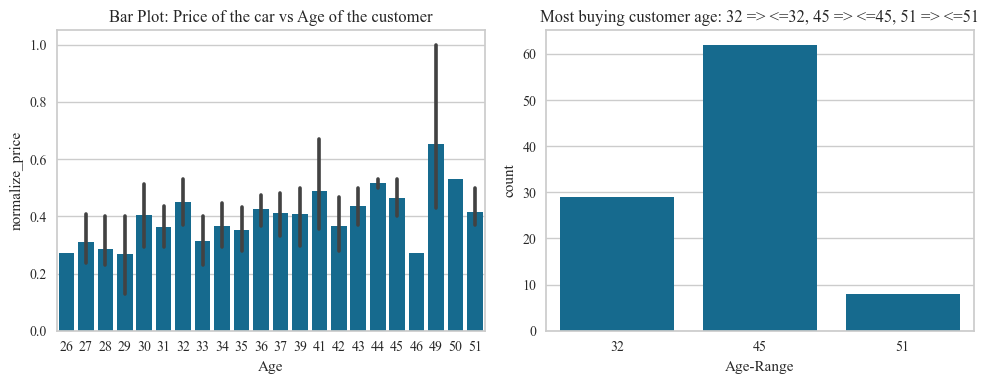

In [860]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(x='Age', y='normalize_price', data=Cdata, ax=axes[0])
axes[0].set_xlabel('Age')
axes[0].set_ylabel('normalize_price')
axes[0].set_title('Bar Plot: Price of the car vs Age of the customer')

sns.countplot(x='Age-Range', data=Cdata, ax=axes[1])
axes[1].set_title('Most buying customer age: 32 => <=32, 45 => <=45, 51 => <=51')

plt.tight_layout()
plt.savefig('age-product1.png', bbox_inches='tight', pad_inches=0)
plt.show()


In [861]:
cols=Cdata.columns.values
cols=['Personal loan','House Loan', 'normalize_salary','normalize_price']
values = Cdata[cols].values
target=Cdata['Age-Range'].values

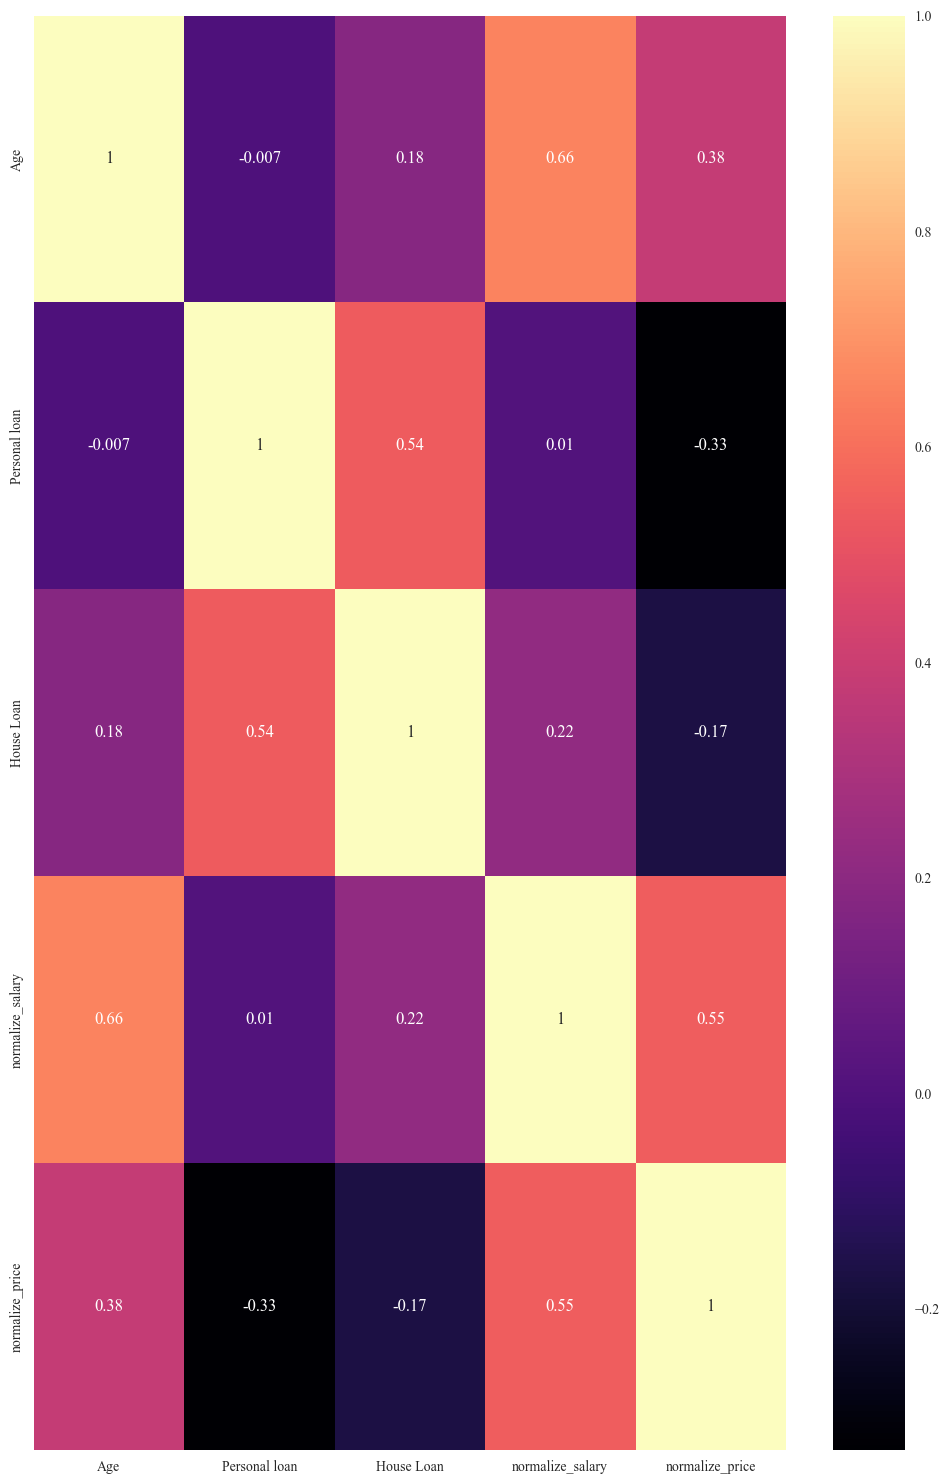

In [862]:
cor_col=['Age','Personal loan','House Loan', 'normalize_salary','normalize_price']
cor_data = Cdata[cor_col]
correlation_matrix = cor_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='magma')
plt.savefig('cor.png', bbox_inches='tight', pad_inches=0)
plt.show()

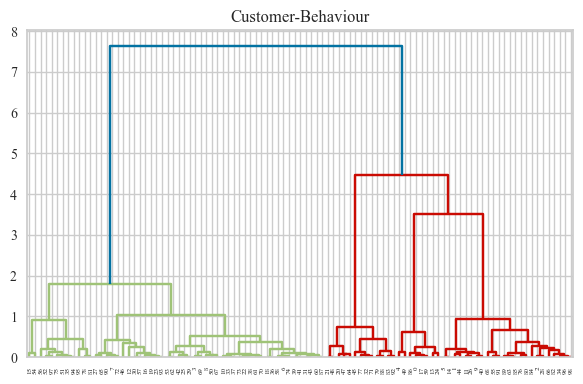

In [863]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(6, 4))
plt.title("Customer-Behaviour")
dend = shc.dendrogram(shc.linkage(values, method='ward'))
plt.show()

In [864]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
Z= cluster.fit_predict(values)

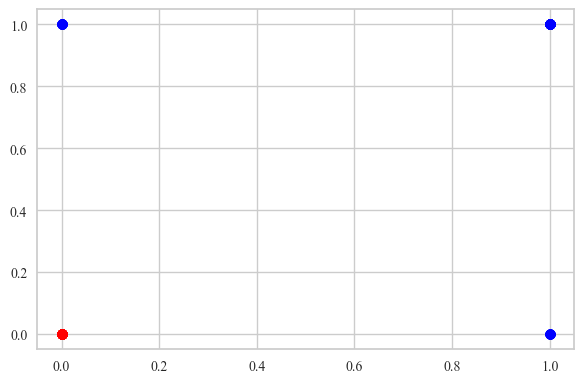

In [865]:
plt.figure(figsize=(6, 4))
plt.scatter(values[Z==0,0], values[Z==0,1], color="blue")
plt.scatter(values[Z==1,0], values[Z==1,1], color="red")


In [866]:
kmeans = KMeans(2, random_state=0).fit(values)
crosstabLike = pd.crosstab(kmeans.labels_, target)

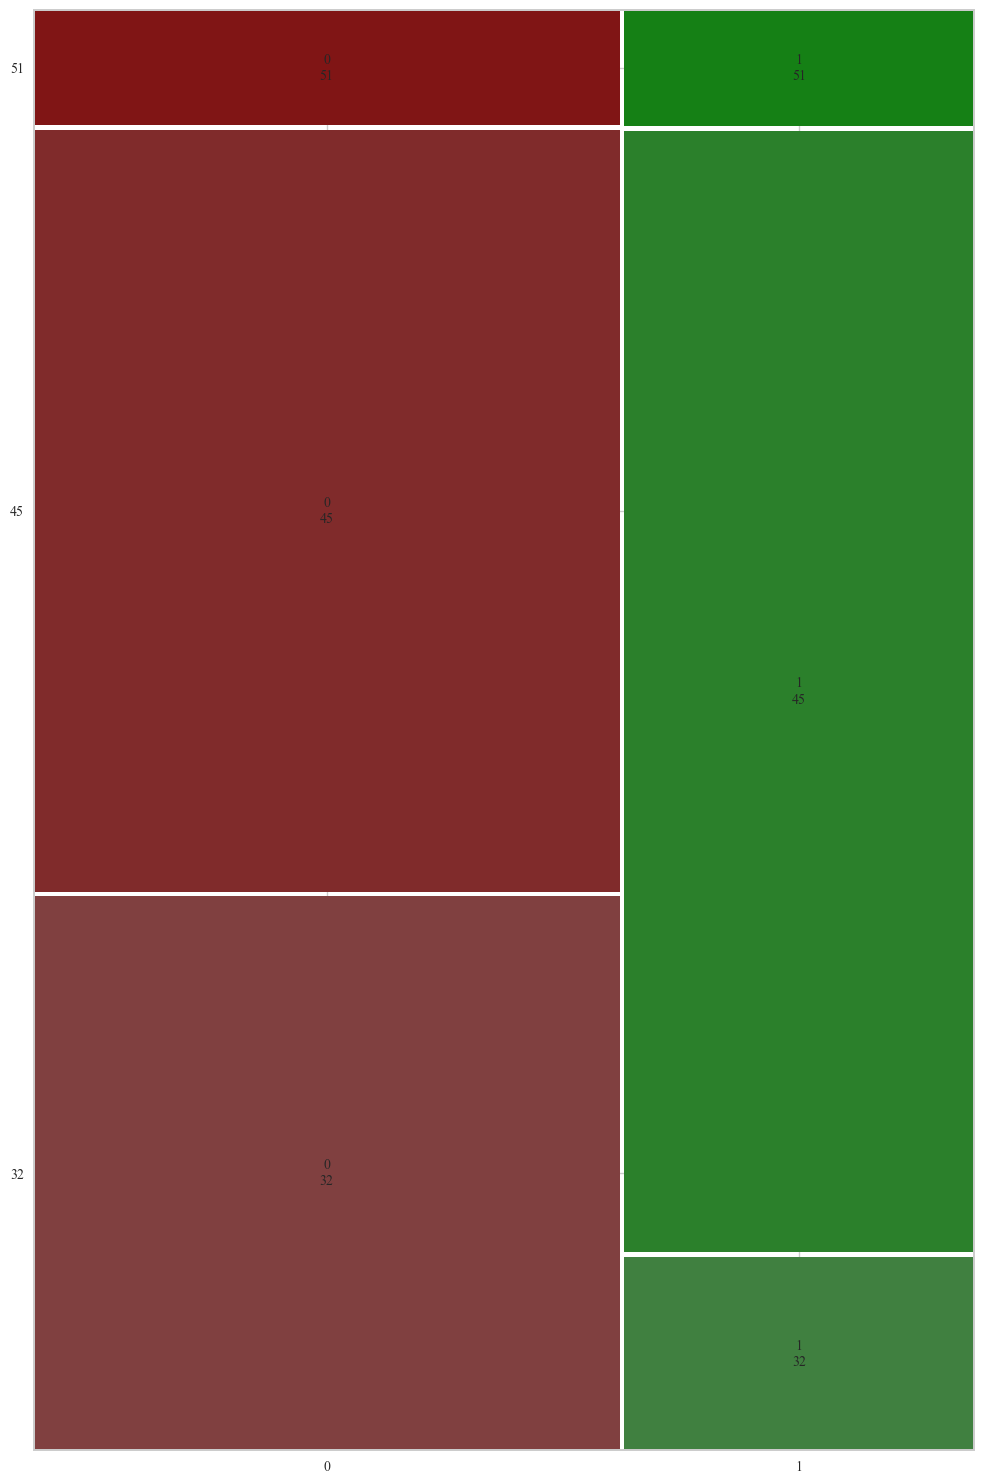

In [867]:
mosaic(crosstabLike.stack())
plt.show()

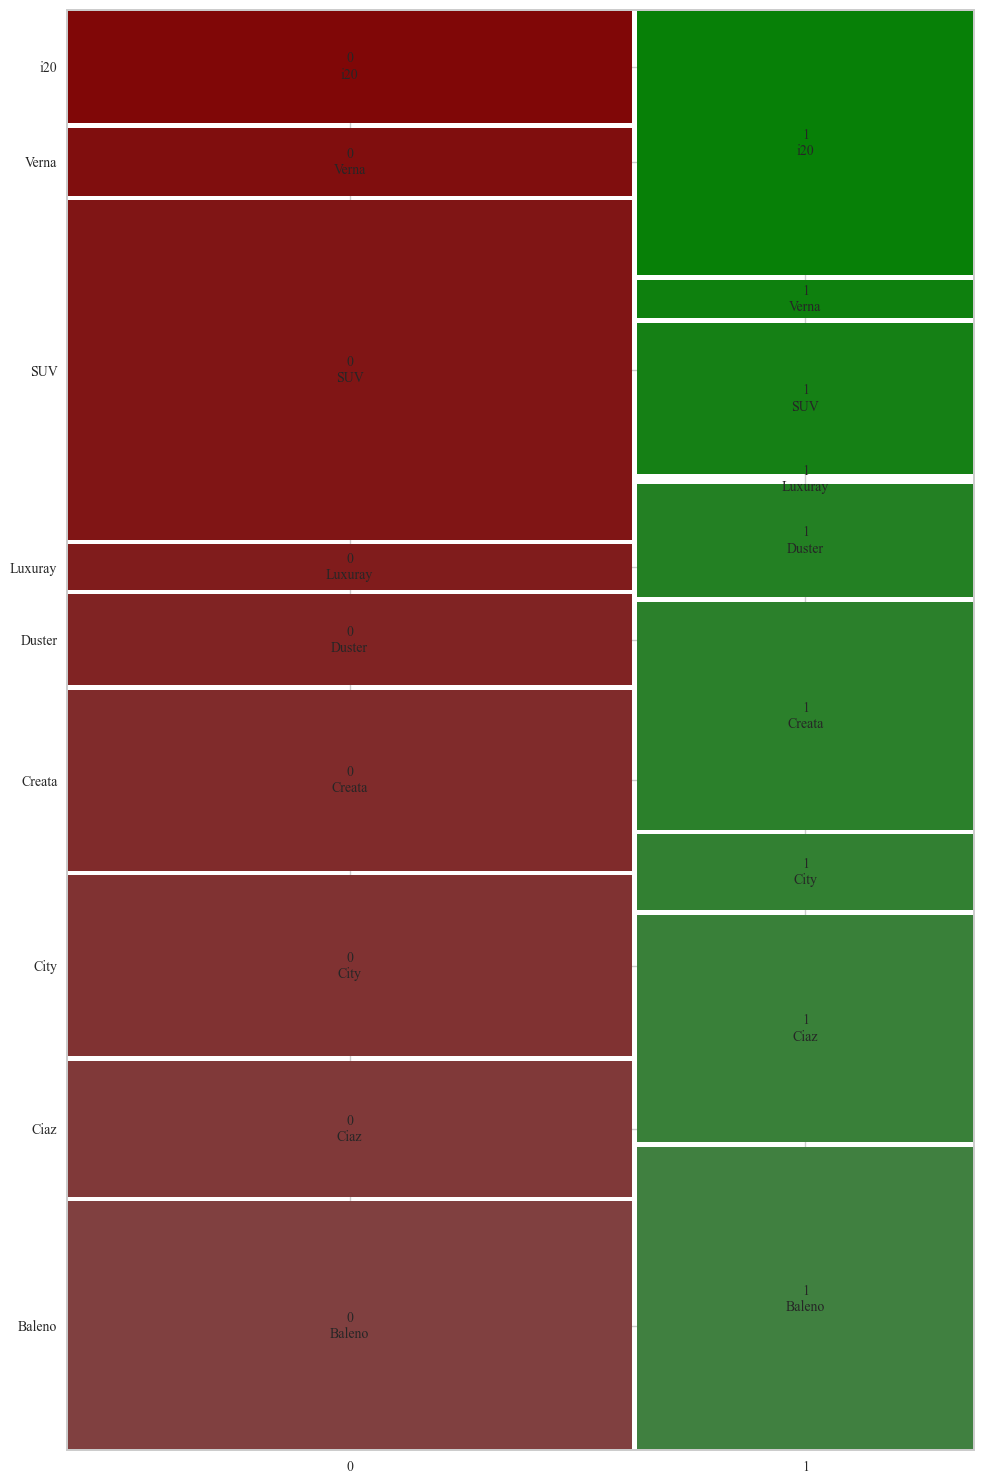

In [868]:
crosstabCondition = pd.crosstab(kmeans.labels_, Cdata['Make'])
mosaic(crosstabCondition.stack())
plt.show()

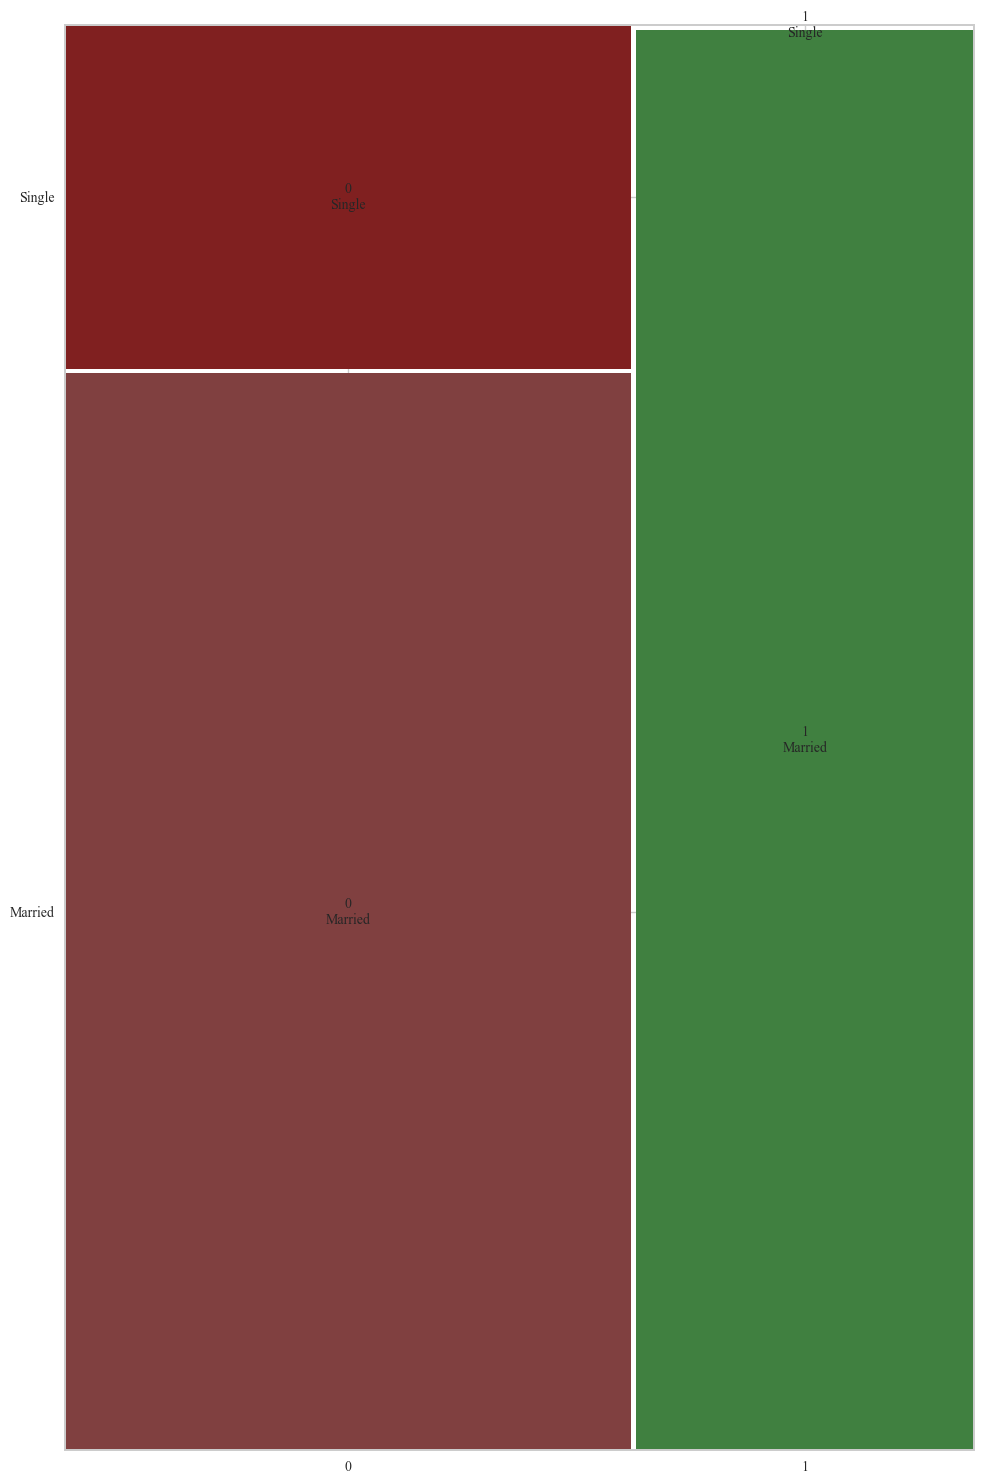

In [869]:
crosstabDriven = pd.crosstab(kmeans.labels_, Cdata['Marrital Status'])
mosaic(crosstabDriven.stack())
plt.show()

<Figure size 1000x1500 with 0 Axes>

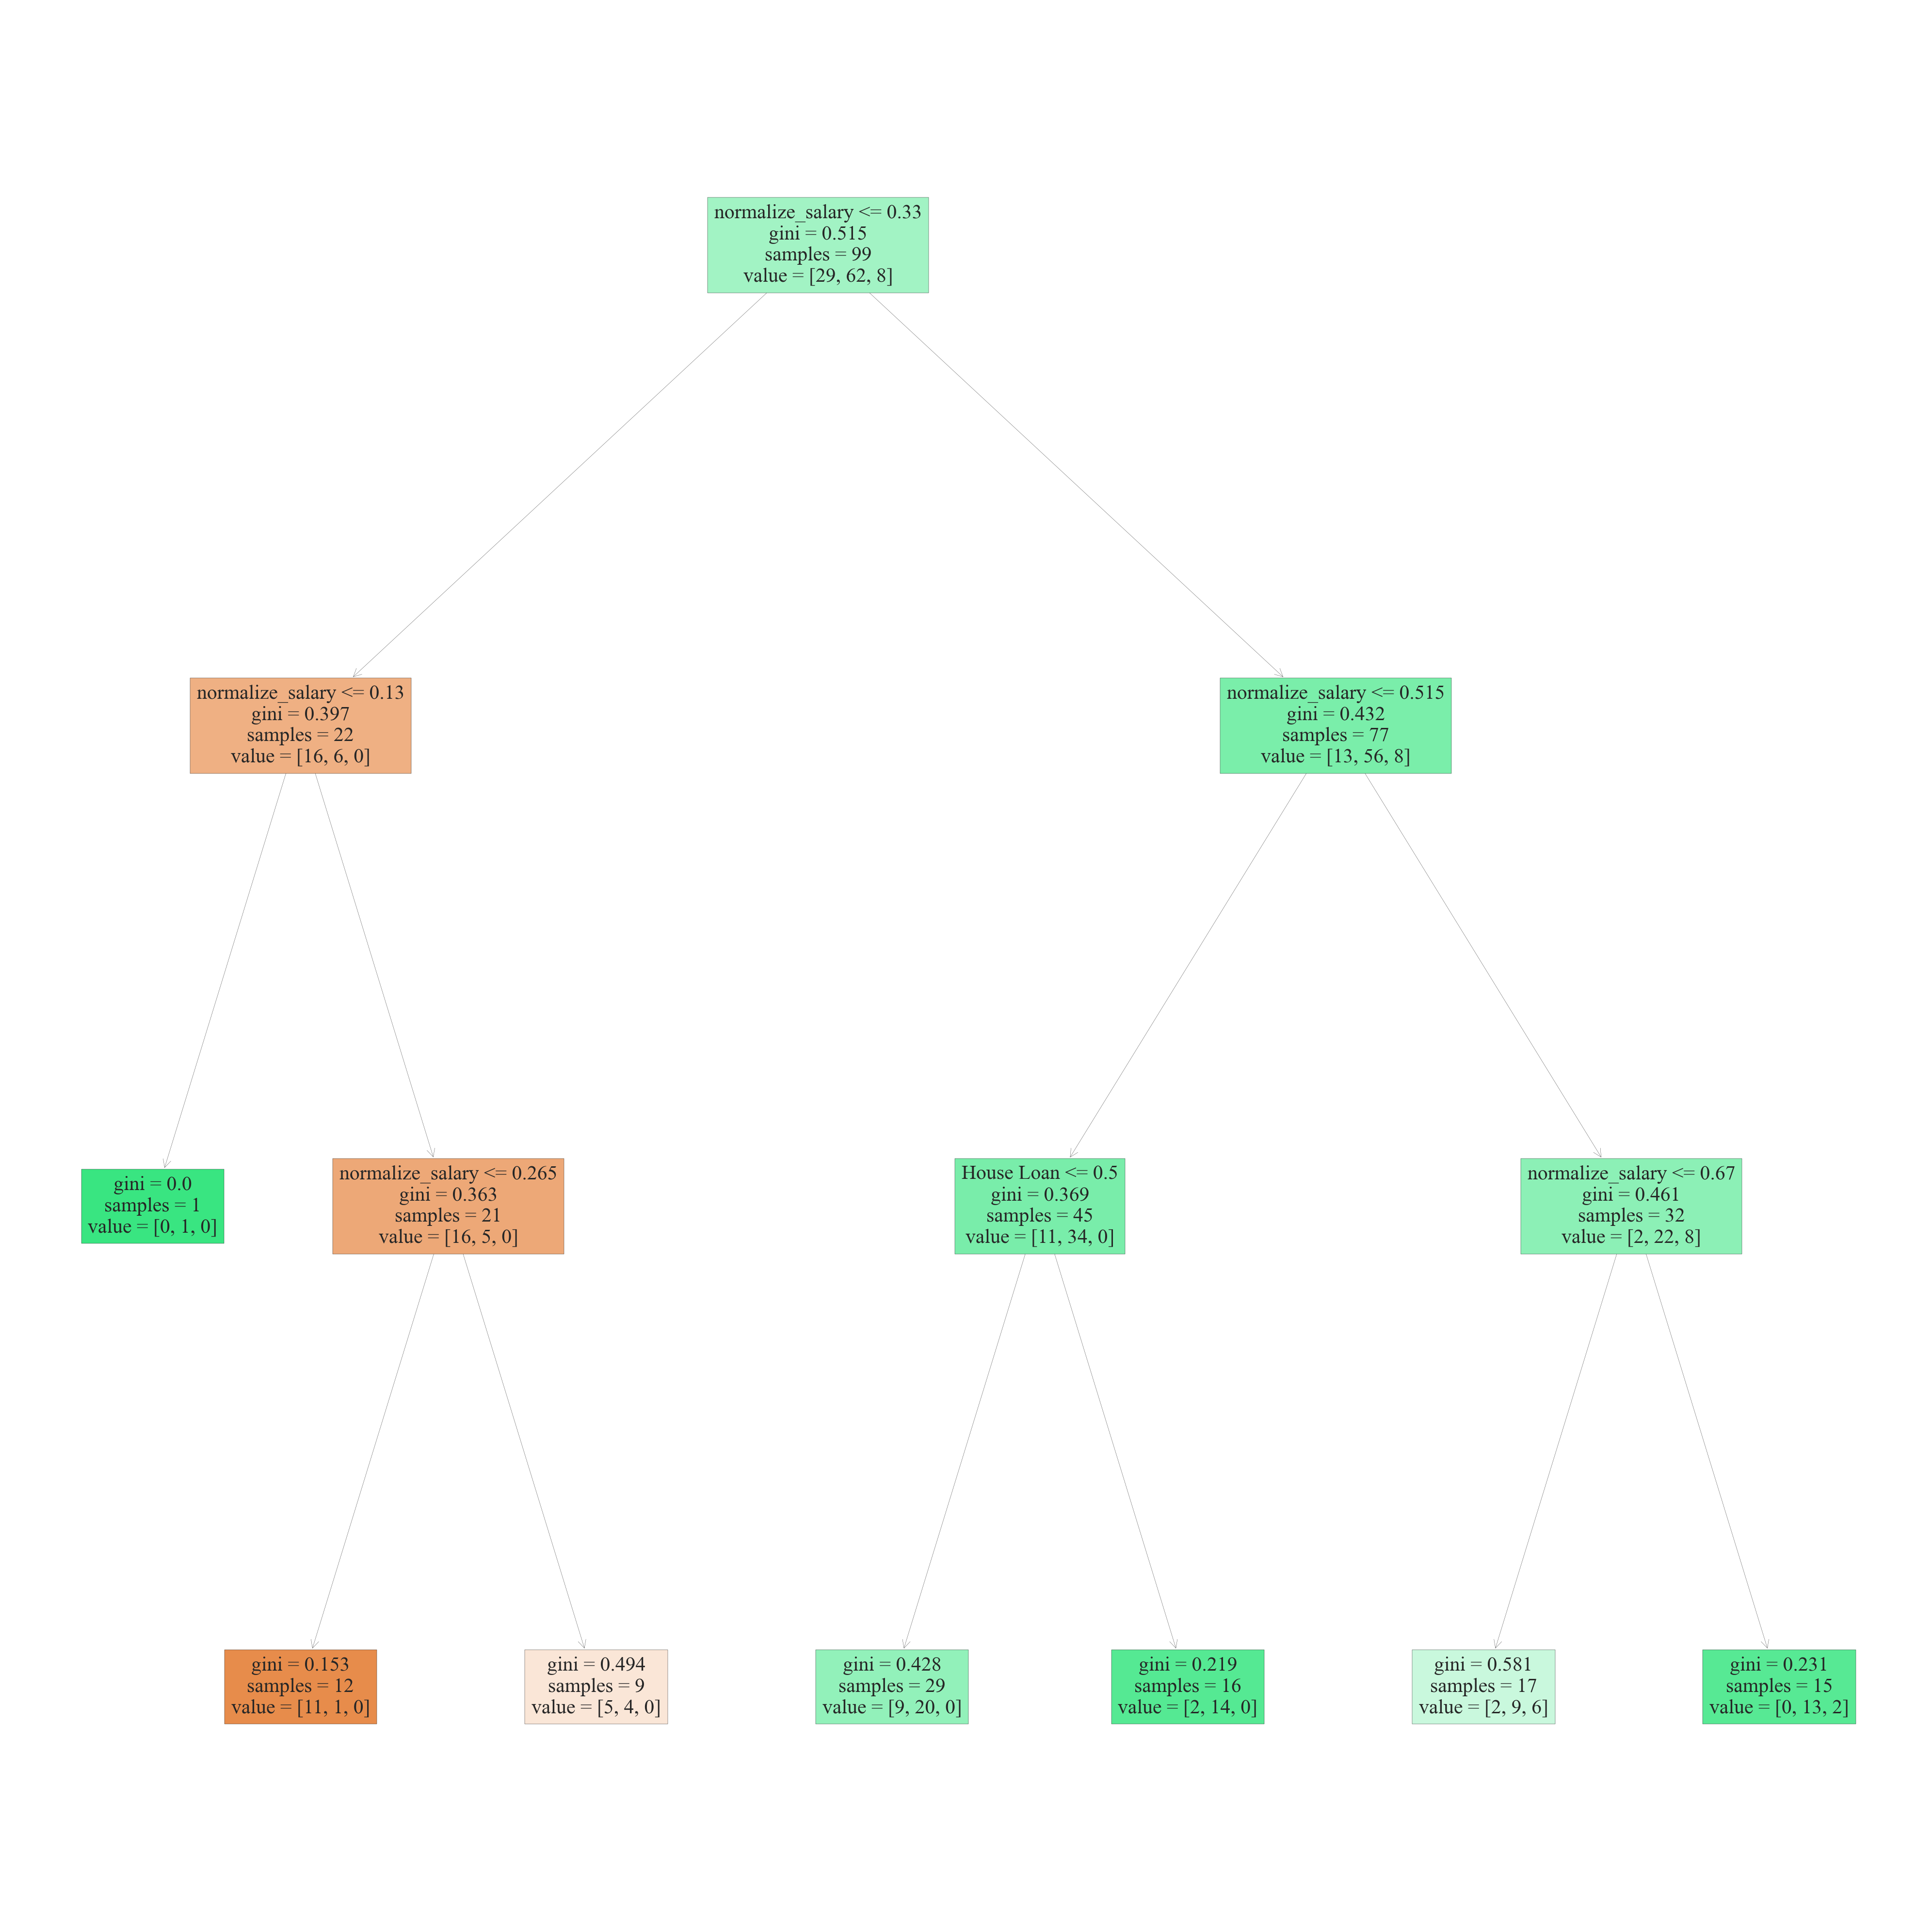

In [870]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(values, target)

plt.savefig('tree.png', bbox_inches='tight', pad_inches=0)

fig = plt.figure(figsize=(40,40))
_ = plot_tree(dtree, 
                   feature_names=cols,  
                   filled=True)

In [871]:
battery = pd.read_csv('battery.csv')

In [872]:
battery.head()

produc Info  standard Qty  \
0  BATERIA,INCELL,SP48-33-100S-SC,|BATERIA DE LIT...             2   
1                           House Battery EV BATTERY           110   
2  24V 230 AH Lithium Eve Energy ,  48V 100 AH LF...             2   
3  BMZ BATTERY  168S01P EV 618V 94AH 58KWH   (SER...             1   
4  BATTERY >> LITHIUM-ION BATTERY EV MODULE 4878-...            12   

  Country of Origin Country of destination  
0            Mexico                   Peru  
1            Turkey                  Sudan  
2            Turkey                 Turkey  
3            Poland                 Turkey  
4             China                  India

In [873]:
indiaOrigin= battery[battery['Country of destination']=='India']
battery[battery['Country of destination']=='India']['standard Qty'].sum()

1293544

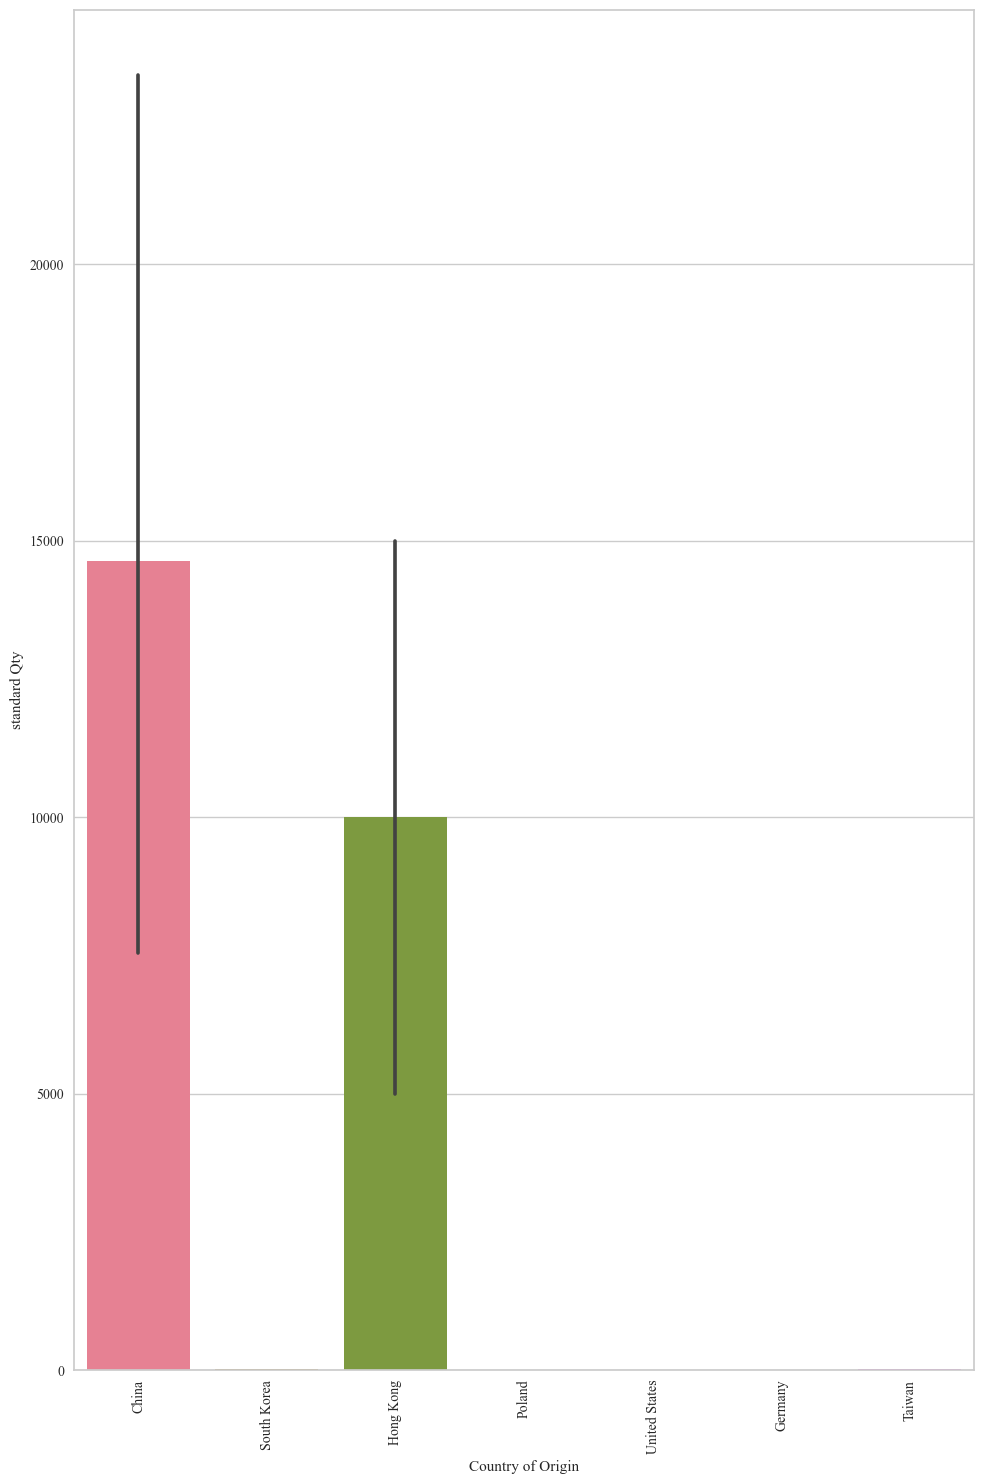

In [875]:
sns.barplot(x='Country of Origin', y='standard Qty', hue='Country of Origin', data=indiaOrigin)
plt.xticks(rotation='vertical')
plt.savefig('battrtbar.png', bbox_inches='tight', pad_inches=0)
plt.show()


In [877]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [878]:
EV_data = pd.read_excel('Final Dataset.xlsx', sheet_name=0)

In [879]:
EV_data.head()

State Name  Total EV  No. of Operational PCS  \
0  Andaman & Nicobar       169                       3   
1     Andhra Pradesh     30449                     222   
2  Arunachal Pradesh        21                       9   
3              Assam     82216                      48   
4              Bihar    110325                      83   

   No of RO's where EV Charging Facility available  \
0                                                0   
1                                               65   
2                                                4   
3                                               19   
4                                               26   

   Number of highways through state  Number of Highway through state with PCS  \
0                                 1                                         0   
1                                36                                        10   
2                                13                                         4   
3                                35                                         6   
4                                47                                         4   

   Total PCS on the highways passing through state  \
0                                                0   
1                                               53   
2                                               12   
3                                               34   
4                                                7   

   No. of EV chargers sanctioned  Number of Operational Petrol pumps  \
0                             10                                  17   
1                            266                                4168   
2                              0                                 159   
3                             20                                1243   
4                             37                                3276   

   Total Non-Electric Vehicle  
0                      146945  
1                           0  
2                      252965  
3                     4677053  
4                    10407078

In [880]:
EV_data.isnull().sum()

State Name                                         0
Total EV                                           0
No. of Operational PCS                             0
No of RO's where EV Charging Facility available    0
Number of highways through state                   0
Number of Highway through state with PCS           0
Total PCS on the highways passing through state    0
No. of EV chargers sanctioned                      0
Number of Operational Petrol pumps                 0
Total Non-Electric Vehicle                         0
dtype: int64

In [881]:
EV_data.dtypes

State Name                                         object
Total EV                                            int64
No. of Operational PCS                              int64
No of RO's where EV Charging Facility available     int64
Number of highways through state                    int64
Number of Highway through state with PCS            int64
Total PCS on the highways passing through state     int64
No. of EV chargers sanctioned                       int64
Number of Operational Petrol pumps                  int64
Total Non-Electric Vehicle                          int64
dtype: object

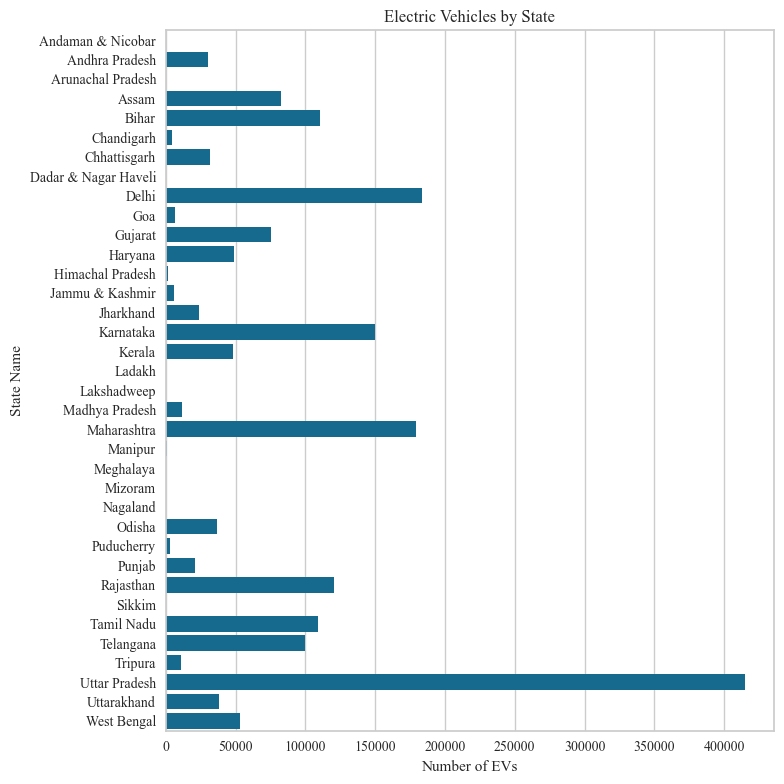

In [882]:
plt.rcParams["font.family"] = "Times New Roman"
plt.figure(figsize=(8, 8))
sns.barplot(x='Total EV', y='State Name', data=EV_data)

plt.xlabel('Number of EVs')
plt.ylabel('State Name')
plt.title('Electric Vehicles by State')
plt.savefig('State v EV.png', dpi=300, bbox_inches='tight')

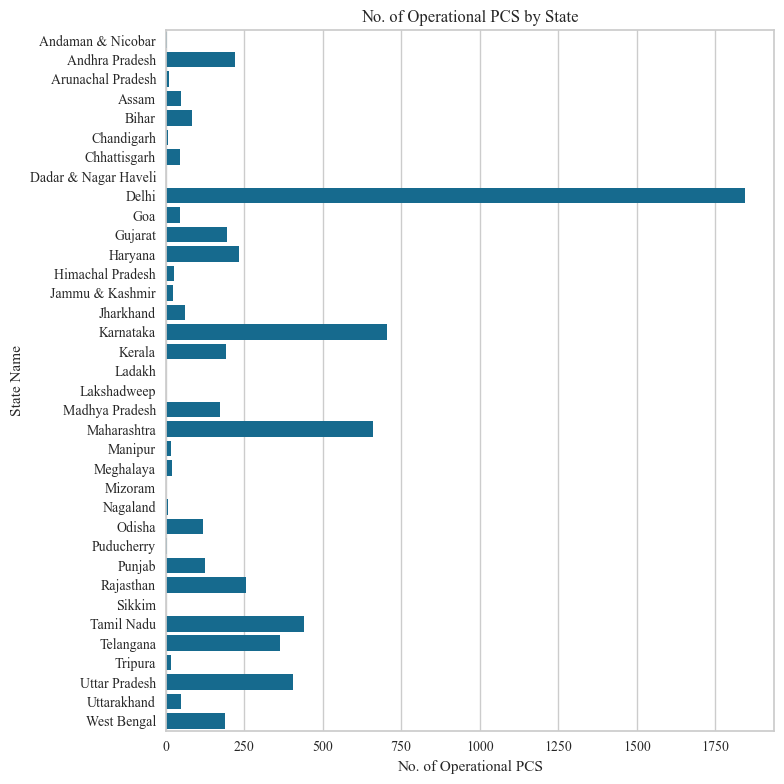

In [883]:
plt.rcParams["font.family"] = "Times New Roman"
plt.figure(figsize=(8, 8))
sns.barplot(x='No. of Operational PCS', y='State Name', data=EV_data)

plt.xlabel('No. of Operational PCS')
plt.ylabel('State Name')
plt.title('No. of Operational PCS by State')
plt.savefig('State v No. of Operational PCS.png', dpi=300, bbox_inches='tight')

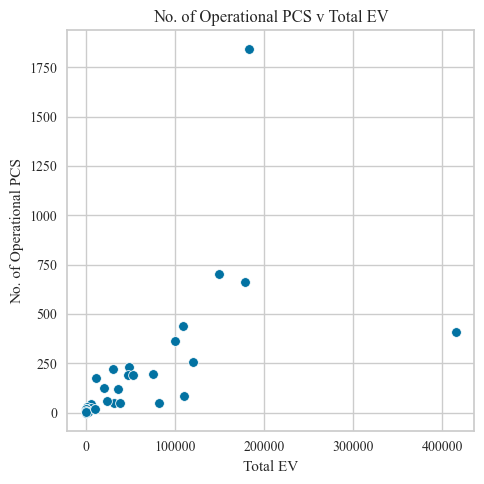

In [884]:
plt.rcParams["font.family"] = "Times New Roman"
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Total EV', y='No. of Operational PCS', data=EV_data)
plt.xlabel('Total EV')
plt.ylabel('No. of Operational PCS')
plt.title('No. of Operational PCS v Total EV')
plt.savefig('No. of Operational PCS v Total EV.png', dpi=300, bbox_inches='tight')

In [885]:
correlation, p_value = pearsonr(EV_data['Total EV'], EV_data['No. of Operational PCS'])

print("Correlation coefficient:", correlation) 
print("P-value:", p_value)

Correlation coefficient: 0.5979730642822771
P-value: 0.00011742824302514542


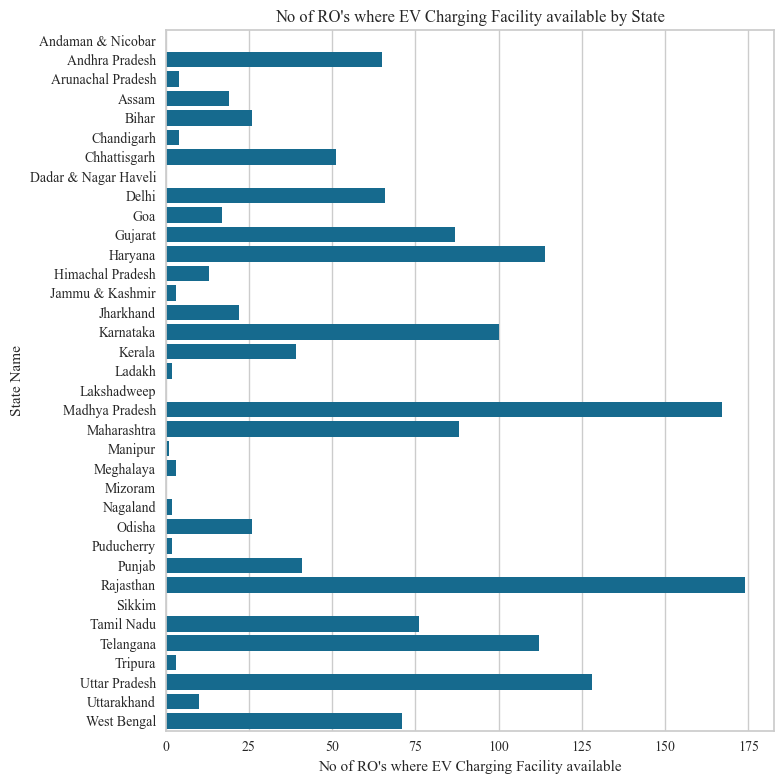

In [886]:
plt.rcParams["font.family"] = "Times New Roman"
plt.figure(figsize=(8, 8))
sns.barplot(x='''No of RO's where EV Charging Facility available''', y='State Name', data=EV_data)

plt.xlabel('''No of RO's where EV Charging Facility available''')
plt.ylabel('State Name')
plt.title('''No of RO's where EV Charging Facility available by State''')
plt.savefig('''State v No of RO's where EV Charging Facility available.png''', dpi=300, bbox_inches='tight')

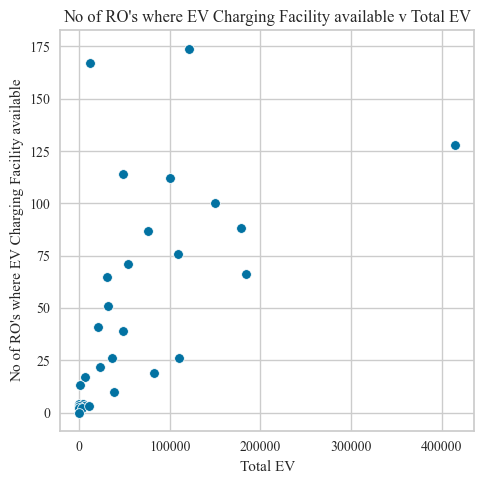

In [887]:
plt.rcParams["font.family"] = "Times New Roman"
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Total EV', y='''No of RO's where EV Charging Facility available''', data=EV_data)
plt.xlabel('Total EV')
plt.ylabel('''No of RO's where EV Charging Facility available''')
plt.title('''No of RO's where EV Charging Facility available v Total EV''')
plt.savefig('''No of RO's where EV Charging Facility available v Total EV.png''', dpi=300, bbox_inches='tight')

In [888]:
correlation, p_value = pearsonr(EV_data['Total EV'], EV_data['''No of RO's where EV Charging Facility available'''])

print("Correlation coefficient:", correlation) 
print("P-value:", p_value)

Correlation coefficient: 0.5991269325877447
P-value: 0.00011301878903795658


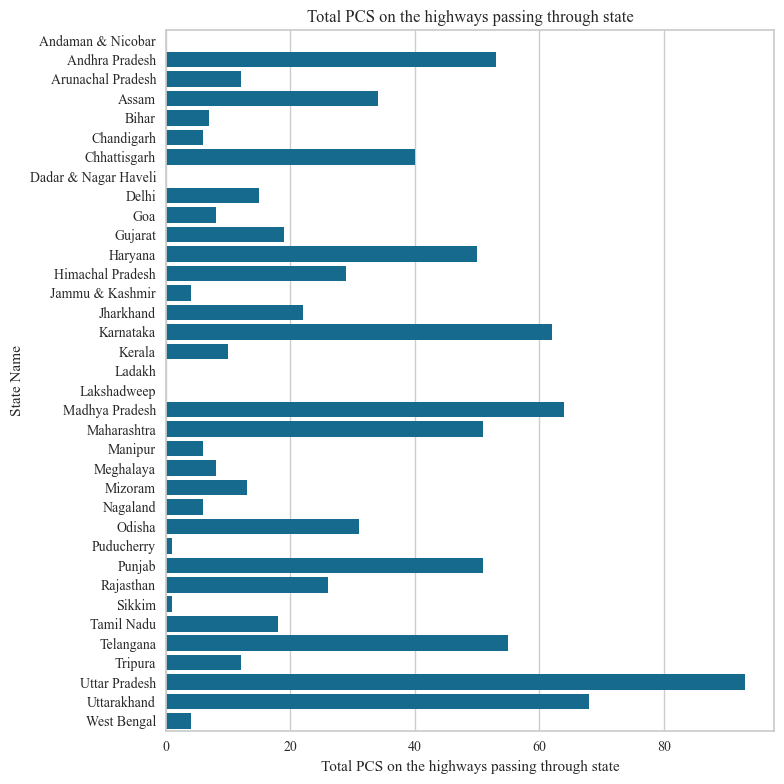

In [889]:
plt.rcParams["font.family"] = "Times New Roman"
plt.figure(figsize=(8, 8))
sns.barplot(x='Total PCS on the highways passing through state', y='State Name', data=EV_data)
plt.xlabel('Total PCS on the highways passing through state')
plt.ylabel('State Name')
plt.title('Total PCS on the highways passing through state')
plt.savefig('State v total_pcs_on_the_highways_passing_through_state.png', dpi=300, bbox_inches='tight')


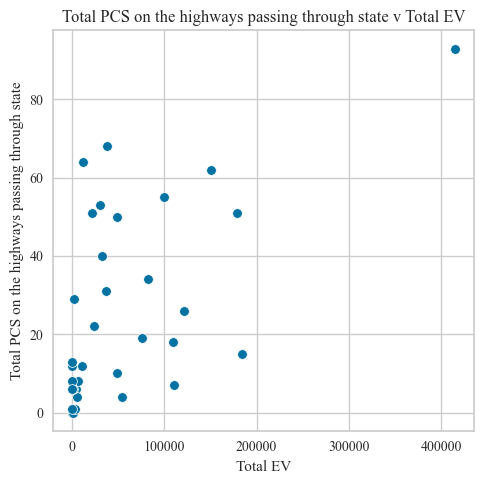

In [890]:
plt.rcParams["font.family"] = "Times New Roman"
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Total EV', y='Total PCS on the highways passing through state', data=EV_data)
plt.xlabel('Total EV')
plt.ylabel('Total PCS on the highways passing through state')
plt.title('''Total PCS on the highways passing through state v Total EV''')
plt.savefig('''total_pcs_on_the_highways_passing_through_state v Total EV.png''', dpi=300, bbox_inches='tight')

In [891]:
correlation, p_value = pearsonr(EV_data['Total EV'], EV_data['''Total PCS on the highways passing through state'''])

print("Correlation coefficient:", correlation) 
print("P-value:", p_value)

Correlation coefficient: 0.5913745109725768
P-value: 0.00014575266479973216


In [892]:
EV_data.iloc[:,1:].corr()

Total EV  \
Total EV                                         1.000000   
No. of Operational PCS                           0.597973   
No of RO's where EV Charging Facility available  0.599127   
Number of highways through state                 0.737292   
Number of Highway through state with PCS         0.642159   
Total PCS on the highways passing through state  0.591375   
No. of EV chargers sanctioned                    0.539698   
Number of Operational Petrol pumps               0.762513   
Total Non-Electric Vehicle                       0.814608   

                                                 No. of Operational PCS  \
Total EV                                                       0.597973   
No. of Operational PCS                                         1.000000   
No of RO's where EV Charging Facility available                0.446919   
Number of highways through state                               0.331802   
Number of Highway through state with PCS                       0.248064   
Total PCS on the highways passing through state                0.271078   
No. of EV chargers sanctioned                                  0.403990   
Number of Operational Petrol pumps                             0.349854   
Total Non-Electric Vehicle                                     0.431503   

                                                 No of RO's where EV Charging Facility available  \
Total EV                                                                                0.599127   
No. of Operational PCS                                                                  0.446919   
No of RO's where EV Charging Facility available                                         1.000000   
Number of highways through state                                                        0.686210   
Number of Highway through state with PCS                                                0.683570   
Total PCS on the highways passing through state                                         0.652570   
No. of EV chargers sanctioned                                                           0.746621   
Number of Operational Petrol pumps                                                      0.836240   
Total Non-Electric Vehicle                                                              0.586342   

                                                 Number of highways through state  \
Total EV                                                                 0.737292   
No. of Operational PCS                                                   0.331802   
No of RO's where EV Charging Facility available                          0.686210   
Number of highways through state                                         1.000000   
Number of Highway through state with PCS                                 0.776770   
Total PCS on the highways passing through state                          0.680267   
No. of EV chargers sanctioned                                            0.692738   
Number of Operational Petrol pumps                                       0.900995   
Total Non-Electric Vehicle                                               0.809176   

                                                 Number of Highway through state with PCS  \
Total EV                                                                         0.642159   
No. of Operational PCS                                                           0.248064   
No of RO's where EV Charging Facility available                                  0.683570   
Number of highways through state                                                 0.776770   
Number of Highway through state with PCS                                         1.000000   
Total PCS on the highways passing through state                                  0.917072   
No. of EV chargers sanctioned                                                    0.535605   
Number of Operational Petrol pumps                                               0.796649  

In [893]:
EV_data.set_index(EV_data.columns[0], inplace=True)

In [894]:
EV_data.head()

Total EV  No. of Operational PCS  \
State Name                                            
Andaman & Nicobar       169                       3   
Andhra Pradesh        30449                     222   
Arunachal Pradesh        21                       9   
Assam                 82216                      48   
Bihar                110325                      83   

                   No of RO's where EV Charging Facility available  \
State Name                                                           
Andaman & Nicobar                                                0   
Andhra Pradesh                                                  65   
Arunachal Pradesh                                                4   
Assam                                                           19   
Bihar                                                           26   

                   Number of highways through state  \
State Name                                            
Andaman & Nicobar                                 1   
Andhra Pradesh                                   36   
Arunachal Pradesh                                13   
Assam                                            35   
Bihar                                            47   

                   Number of Highway through state with PCS  \
State Name                                                    
Andaman & Nicobar                                         0   
Andhra Pradesh                                           10   
Arunachal Pradesh                                         4   
Assam                                                     6   
Bihar                                                     4   

                   Total PCS on the highways passing through state  \
State Name                                                           
Andaman & Nicobar                                                0   
Andhra Pradesh                                                  53   
Arunachal Pradesh                                               12   
Assam                                                           34   
Bihar                                                            7   

                   No. of EV chargers sanctioned  \
State Name                                         
Andaman & Nicobar                             10   
Andhra Pradesh                               266   
Arunachal Pradesh                              0   
Assam                                         20   
Bihar                                         37   

                   Number of Operational Petrol pumps  \
State Name                                              
Andaman & Nicobar                                  17   
Andhra Pradesh                                   4168   
Arunachal Pradesh                                 159   
Assam                                            1243   
Bihar                                            3276   

                   Total Non-Electric Vehicle  
State Name                                     
Andaman & Nicobar                      146945  
Andhra Pradesh                              0  
Arunachal Pradesh                      252965  
Assam                                 4677053  
Bihar                                10407078

In [895]:
EV_seg=EV_data.copy()

In [896]:
EV_seg.head()

Total EV  No. of Operational PCS  \
State Name                                            
Andaman & Nicobar       169                       3   
Andhra Pradesh        30449                     222   
Arunachal Pradesh        21                       9   
Assam                 82216                      48   
Bihar                110325                      83   

                   No of RO's where EV Charging Facility available  \
State Name                                                           
Andaman & Nicobar                                                0   
Andhra Pradesh                                                  65   
Arunachal Pradesh                                                4   
Assam                                                           19   
Bihar                                                           26   

                   Number of highways through state  \
State Name                                            
Andaman & Nicobar                                 1   
Andhra Pradesh                                   36   
Arunachal Pradesh                                13   
Assam                                            35   
Bihar                                            47   

                   Number of Highway through state with PCS  \
State Name                                                    
Andaman & Nicobar                                         0   
Andhra Pradesh                                           10   
Arunachal Pradesh                                         4   
Assam                                                     6   
Bihar                                                     4   

                   Total PCS on the highways passing through state  \
State Name                                                           
Andaman & Nicobar                                                0   
Andhra Pradesh                                                  53   
Arunachal Pradesh                                               12   
Assam                                                           34   
Bihar                                                            7   

                   No. of EV chargers sanctioned  \
State Name                                         
Andaman & Nicobar                             10   
Andhra Pradesh                               266   
Arunachal Pradesh                              0   
Assam                                         20   
Bihar                                         37   

                   Number of Operational Petrol pumps  \
State Name                                              
Andaman & Nicobar                                  17   
Andhra Pradesh                                   4168   
Arunachal Pradesh                                 159   
Assam                                            1243   
Bihar                                            3276   

                   Total Non-Electric Vehicle  
State Name                                     
Andaman & Nicobar                      146945  
Andhra Pradesh                              0  
Arunachal Pradesh                      252965  
Assam                                 4677053  
Bihar                                10407078

In [897]:
sc = StandardScaler()
scaled_values = sc.fit_transform(EV_seg)

In [898]:
EV_seg_scaled = pd.DataFrame(scaled_values, columns=EV_seg.columns, index=EV_seg.index)


In [899]:
EV_seg_scaled.head()

Total EV  No. of Operational PCS  \
State Name                                            
Andaman & Nicobar -0.652522               -0.541014   
Andhra Pradesh    -0.277576                0.117423   
Arunachal Pradesh -0.654355               -0.522975   
Assam              0.363435               -0.405719   
Bihar              0.711498               -0.300489   

                   No of RO's where EV Charging Facility available  \
State Name                                                           
Andaman & Nicobar                                        -0.863496   
Andhra Pradesh                                            0.451986   
Arunachal Pradesh                                        -0.782543   
Assam                                                    -0.478970   
Bihar                                                    -0.337303   

                   Number of highways through state  \
State Name                                            
Andaman & Nicobar                         -1.036725   
Andhra Pradesh                             0.568034   
Arunachal Pradesh                         -0.486522   
Assam                                      0.522183   
Bihar                                      1.072386   

                   Number of Highway through state with PCS  \
State Name                                                    
Andaman & Nicobar                                 -1.118960   
Andhra Pradesh                                     1.264623   
Arunachal Pradesh                                 -0.165527   
Assam                                              0.311190   
Bihar                                             -0.165527   

                   Total PCS on the highways passing through state  \
State Name                                                           
Andaman & Nicobar                                        -1.016021   
Andhra Pradesh                                            1.189403   
Arunachal Pradesh                                        -0.516679   
Assam                                                     0.398779   
Bihar                                                    -0.724738   

                   No. of EV chargers sanctioned  \
State Name                                         
Andaman & Nicobar                      -0.690151   
Andhra Pradesh                          1.836839   
Arunachal Pradesh                      -0.788862   
Assam                                  -0.591441   
Bihar                                  -0.423633   

                   Number of Operational Petrol pumps  \
State Name                                              
Andaman & Nicobar                           -0.864905   
Andhra Pradesh                               0.741238   
Arunachal Pradesh                           -0.809961   
Assam                                       -0.390530   
Bihar                                        0.396097   

                   Total Non-Electric Vehicle  
State Name                                     
Andaman & Nicobar                   -0.730329  
Andhra Pradesh                      -0.744487  
Arunachal Pradesh                   -0.720114  
Assam                               -0.293855  
Bihar                                0.258231

In [900]:
pca = PCA(n_components=9)
pca.fit(EV_seg_scaled)

PCA(n_components=9)

In [902]:
EV_seg_scaled_hat= pca.transform(EV_seg_scaled)

In [903]:
EV_seg_scaled_pca = pd.DataFrame(columns=[f'PC{i+1}' for i in range(len(EV_seg_scaled.columns))], data=EV_seg_scaled_hat)
EV_seg_scaled_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.522851  0.285548 -0.243299 -0.115121  0.155400 -0.159631 -0.069325   
1  1.723686 -1.015359 -0.155873  1.454759 -1.197367 -0.337036 -0.612031   
2 -1.812882 -0.385142  0.216043 -0.177978 -0.148097  0.128996 -0.047029   
3 -0.142521 -0.659866  0.594636 -0.675300 -0.119933  0.284926 -0.479332   
4  0.279758  0.195719 -0.438777 -1.199650  0.249626  0.754550 -0.586884   

        PC8       PC9  
0 -0.053756  0.070244  
1  0.100016  0.186766  
2  0.289405 -0.065215  
3 -0.070503 -0.218304  
4  0.187969  0.237303

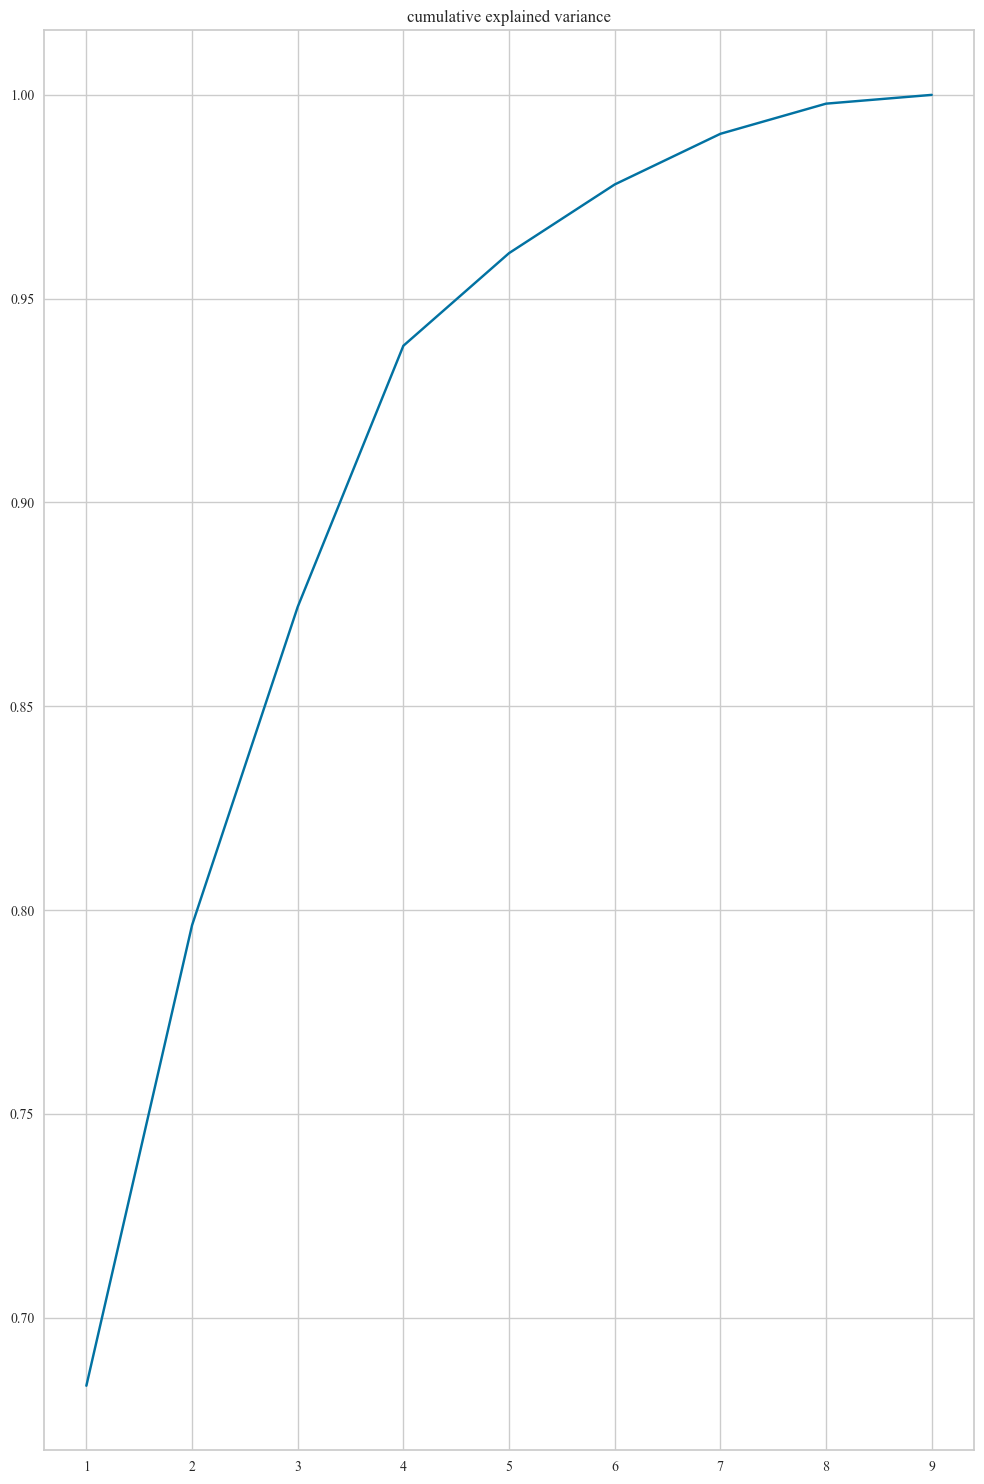

In [904]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.title("cumulative explained variance")
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.show()

In [905]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=[f'PC{i+1}' for i in range(len(EV_seg_scaled.columns))],  # so the columns are the principal components
    index=EV_seg_scaled.columns,  # and the rows are the original features
)
loadings

PC1       PC2       PC3  \
Total EV                                         0.340907  0.254930  0.235421   
No. of Operational PCS                           0.206435  0.709914  0.486048   
No of RO's where EV Charging Facility available  0.340952 -0.013215 -0.076581   
Number of highways through state                 0.366420 -0.106404 -0.145910   
Number of Highway through state with PCS         0.342693 -0.412307  0.283596   
Total PCS on the highways passing through state  0.315903 -0.427872  0.466118   
No. of EV chargers sanctioned                    0.321407  0.147676 -0.511809   
Number of Operational Petrol pumps               0.389382 -0.074563 -0.249084   
Total Non-Electric Vehicle                       0.344240  0.197728 -0.243918   

                                                      PC4       PC5       PC6  \
Total EV                                        -0.412270  0.360129 -0.328217   
No. of Operational PCS                           0.249280 -0.271662  0.180010   
No of RO's where EV Charging Facility available  0.559225  0.670842  0.200692   
Number of highways through state                -0.245440 -0.242297  0.774077   
Number of Highway through state with PCS         0.008194 -0.199970 -0.099604   
Total PCS on the highways passing through state  0.115366 -0.159916 -0.196886   
No. of EV chargers sanctioned                    0.382862 -0.455790 -0.388376   
Number of Operational Petrol pumps              -0.018533  0.111549 -0.017467   
Total Non-Electric Vehicle                      -0.484372  0.044948 -0.143428   

                                                      PC7       PC8       PC9  
Total EV                                        -0.592857  0.003586 -0.067024  
No. of Operational PCS                           0.163969  0.059273  0.135720  
No of RO's where EV Charging Facility available  0.096381  0.027513 -0.254218  
Number of highways through state                -0.282138 -0.117397 -0.146959  
Number of Highway through state with PCS         0.074281  0.754840 -0.082825  
Total PCS on the highways passing through state  0.115443 -0.637971 -0.043409  
No. of EV chargers sanctioned                   -0.261409 -0.044626 -0.193521  
Number of Operational Petrol pumps               0.084608 -0.009117  0.872036  
Total Non-Electric Vehicle                       0.662122 -0.055401 -0.290212

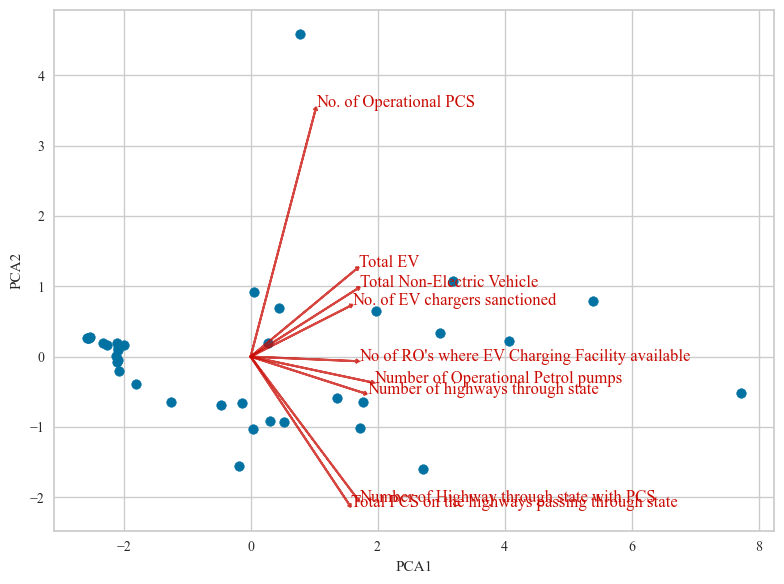

In [906]:
pca1 = EV_seg_scaled_pca['PC1']
pca2 = EV_seg_scaled_pca['PC2']
plt.rcParams["font.family"] = "Times New Roman"
# Create a scatter plot of PCA1 and PCA2
plt.figure(figsize=(8, 6))
plt.scatter(pca1, pca2)
scaling_factor = 5
# Plot the original variables as vectors on the graph
for i, variable in enumerate(EV_seg_scaled.columns):
    x = 0  # Origin of the vector
    y = 0  # Origin of the vector
    dx =scaling_factor*loadings["PC1"][variable]  # Length and direction in PCA1
    dy = scaling_factor*loadings["PC2"][variable]  # Length and direction in PCA2
    plt.arrow(x, y, dx, dy, color='r', alpha=0.75, head_width=0.05, head_length=0.05, linewidth=1.5, length_includes_head=True, overhang=0.5, shape='full')
    plt.text(dx, dy, variable, color='r')

# Add labels and grid
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.savefig('''PCA v Variable.png''', dpi=300, bbox_inches='tight')

# # Show the plot
# plt.show()

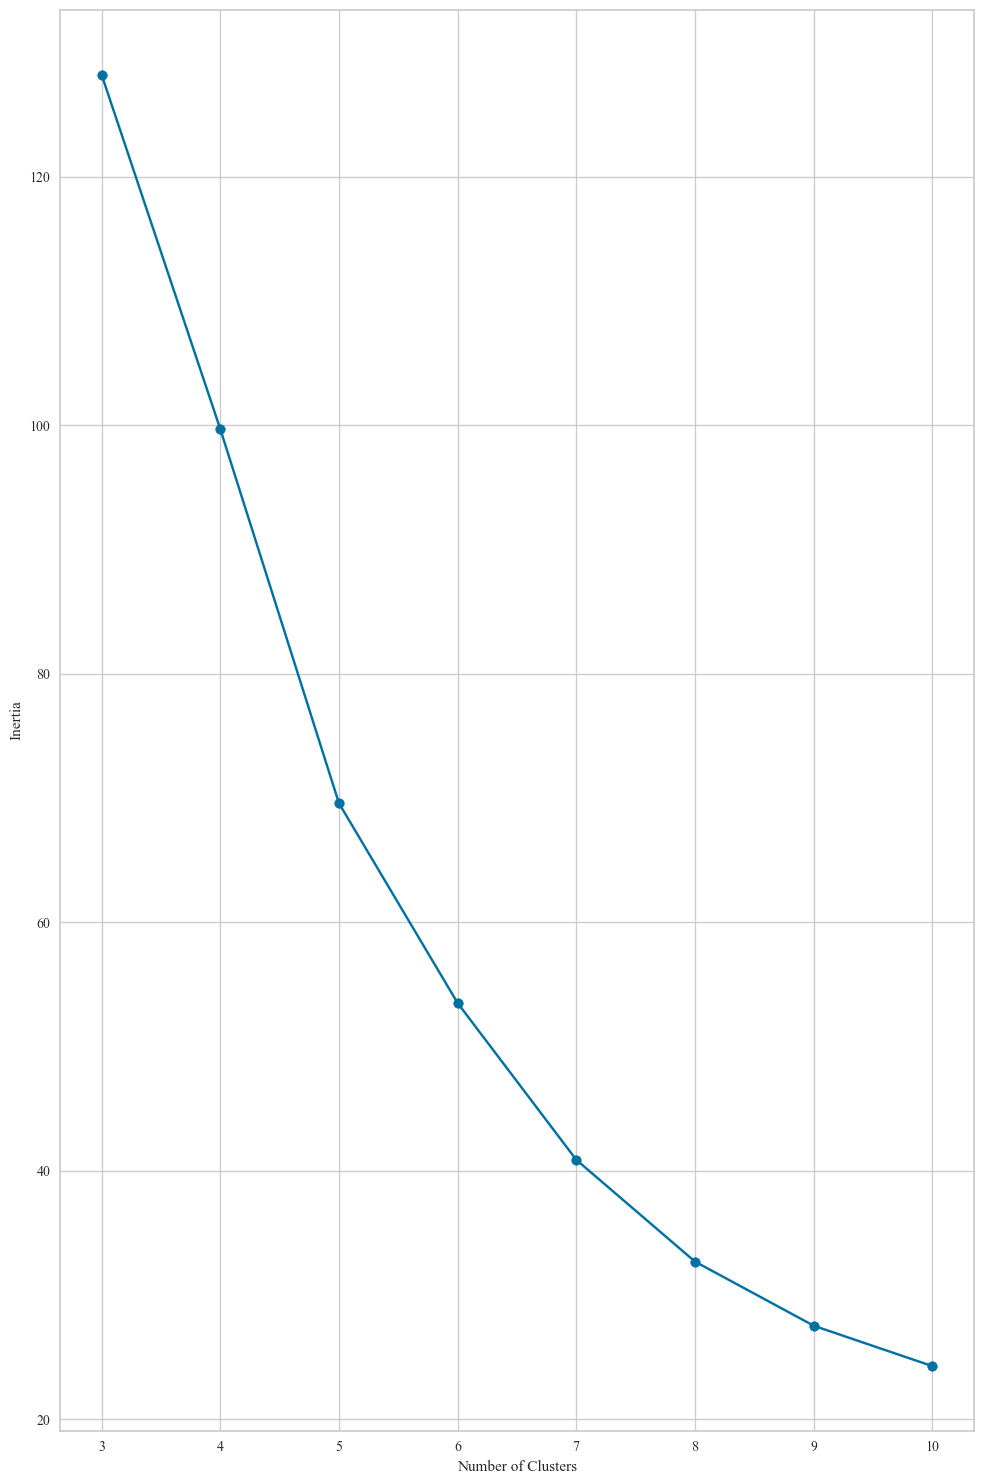

In [907]:
inertia = []
cluster_results = {}  # Dictionary to store the clustering results for different numbers of clusters
list_num_clusters = list(range(3,11))
for num_clusters in list_num_clusters:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=1234, verbose=False)
    kmeans.fit(EV_seg_scaled)
    inertia.append(kmeans.inertia_)
    cluster_results[num_clusters] = kmeans.labels_

# # Print the clustering results
# for n_clusters, labels in cluster_results.items():
#     print(f"Number of clusters: {n_clusters}")
#     print(f"Cluster labels: {labels}")
#     print()
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.savefig('''Inertia v Cluster.png''', dpi=300, bbox_inches='tight')

Optimal number of clusters: 6


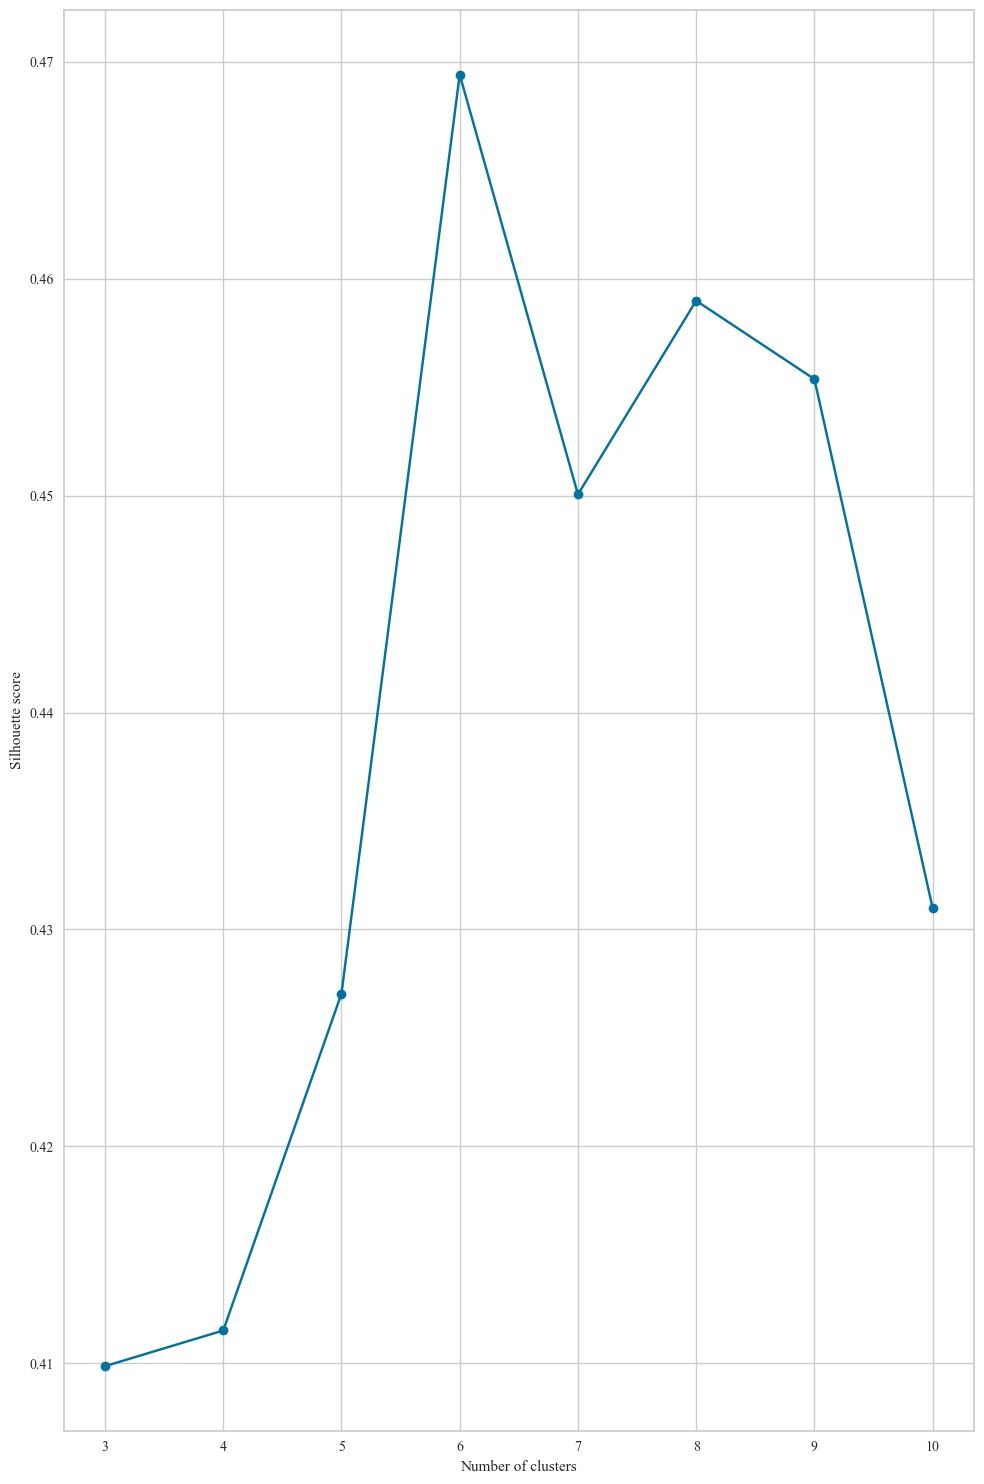

In [908]:
from sklearn.metrics import silhouette_score

# Assuming you have a DataFrame named 'df2' with your data

X = EV_seg_scaled.values  # Convert the DataFrame to a NumPy array

# Define the range of cluster numbers to consider
min_clusters = 3
max_clusters = 10

silhouette_scores = []

for n_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=1234,n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters with the highest Silhouette score
optimal_clusters = np.argmax(silhouette_scores) + min_clusters

print("Optimal number of clusters:", optimal_clusters)

# Plot the Silhouette scores
import matplotlib.pyplot as plt

plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.savefig('''Silhouette v Cluster.png''', dpi=300, bbox_inches='tight')

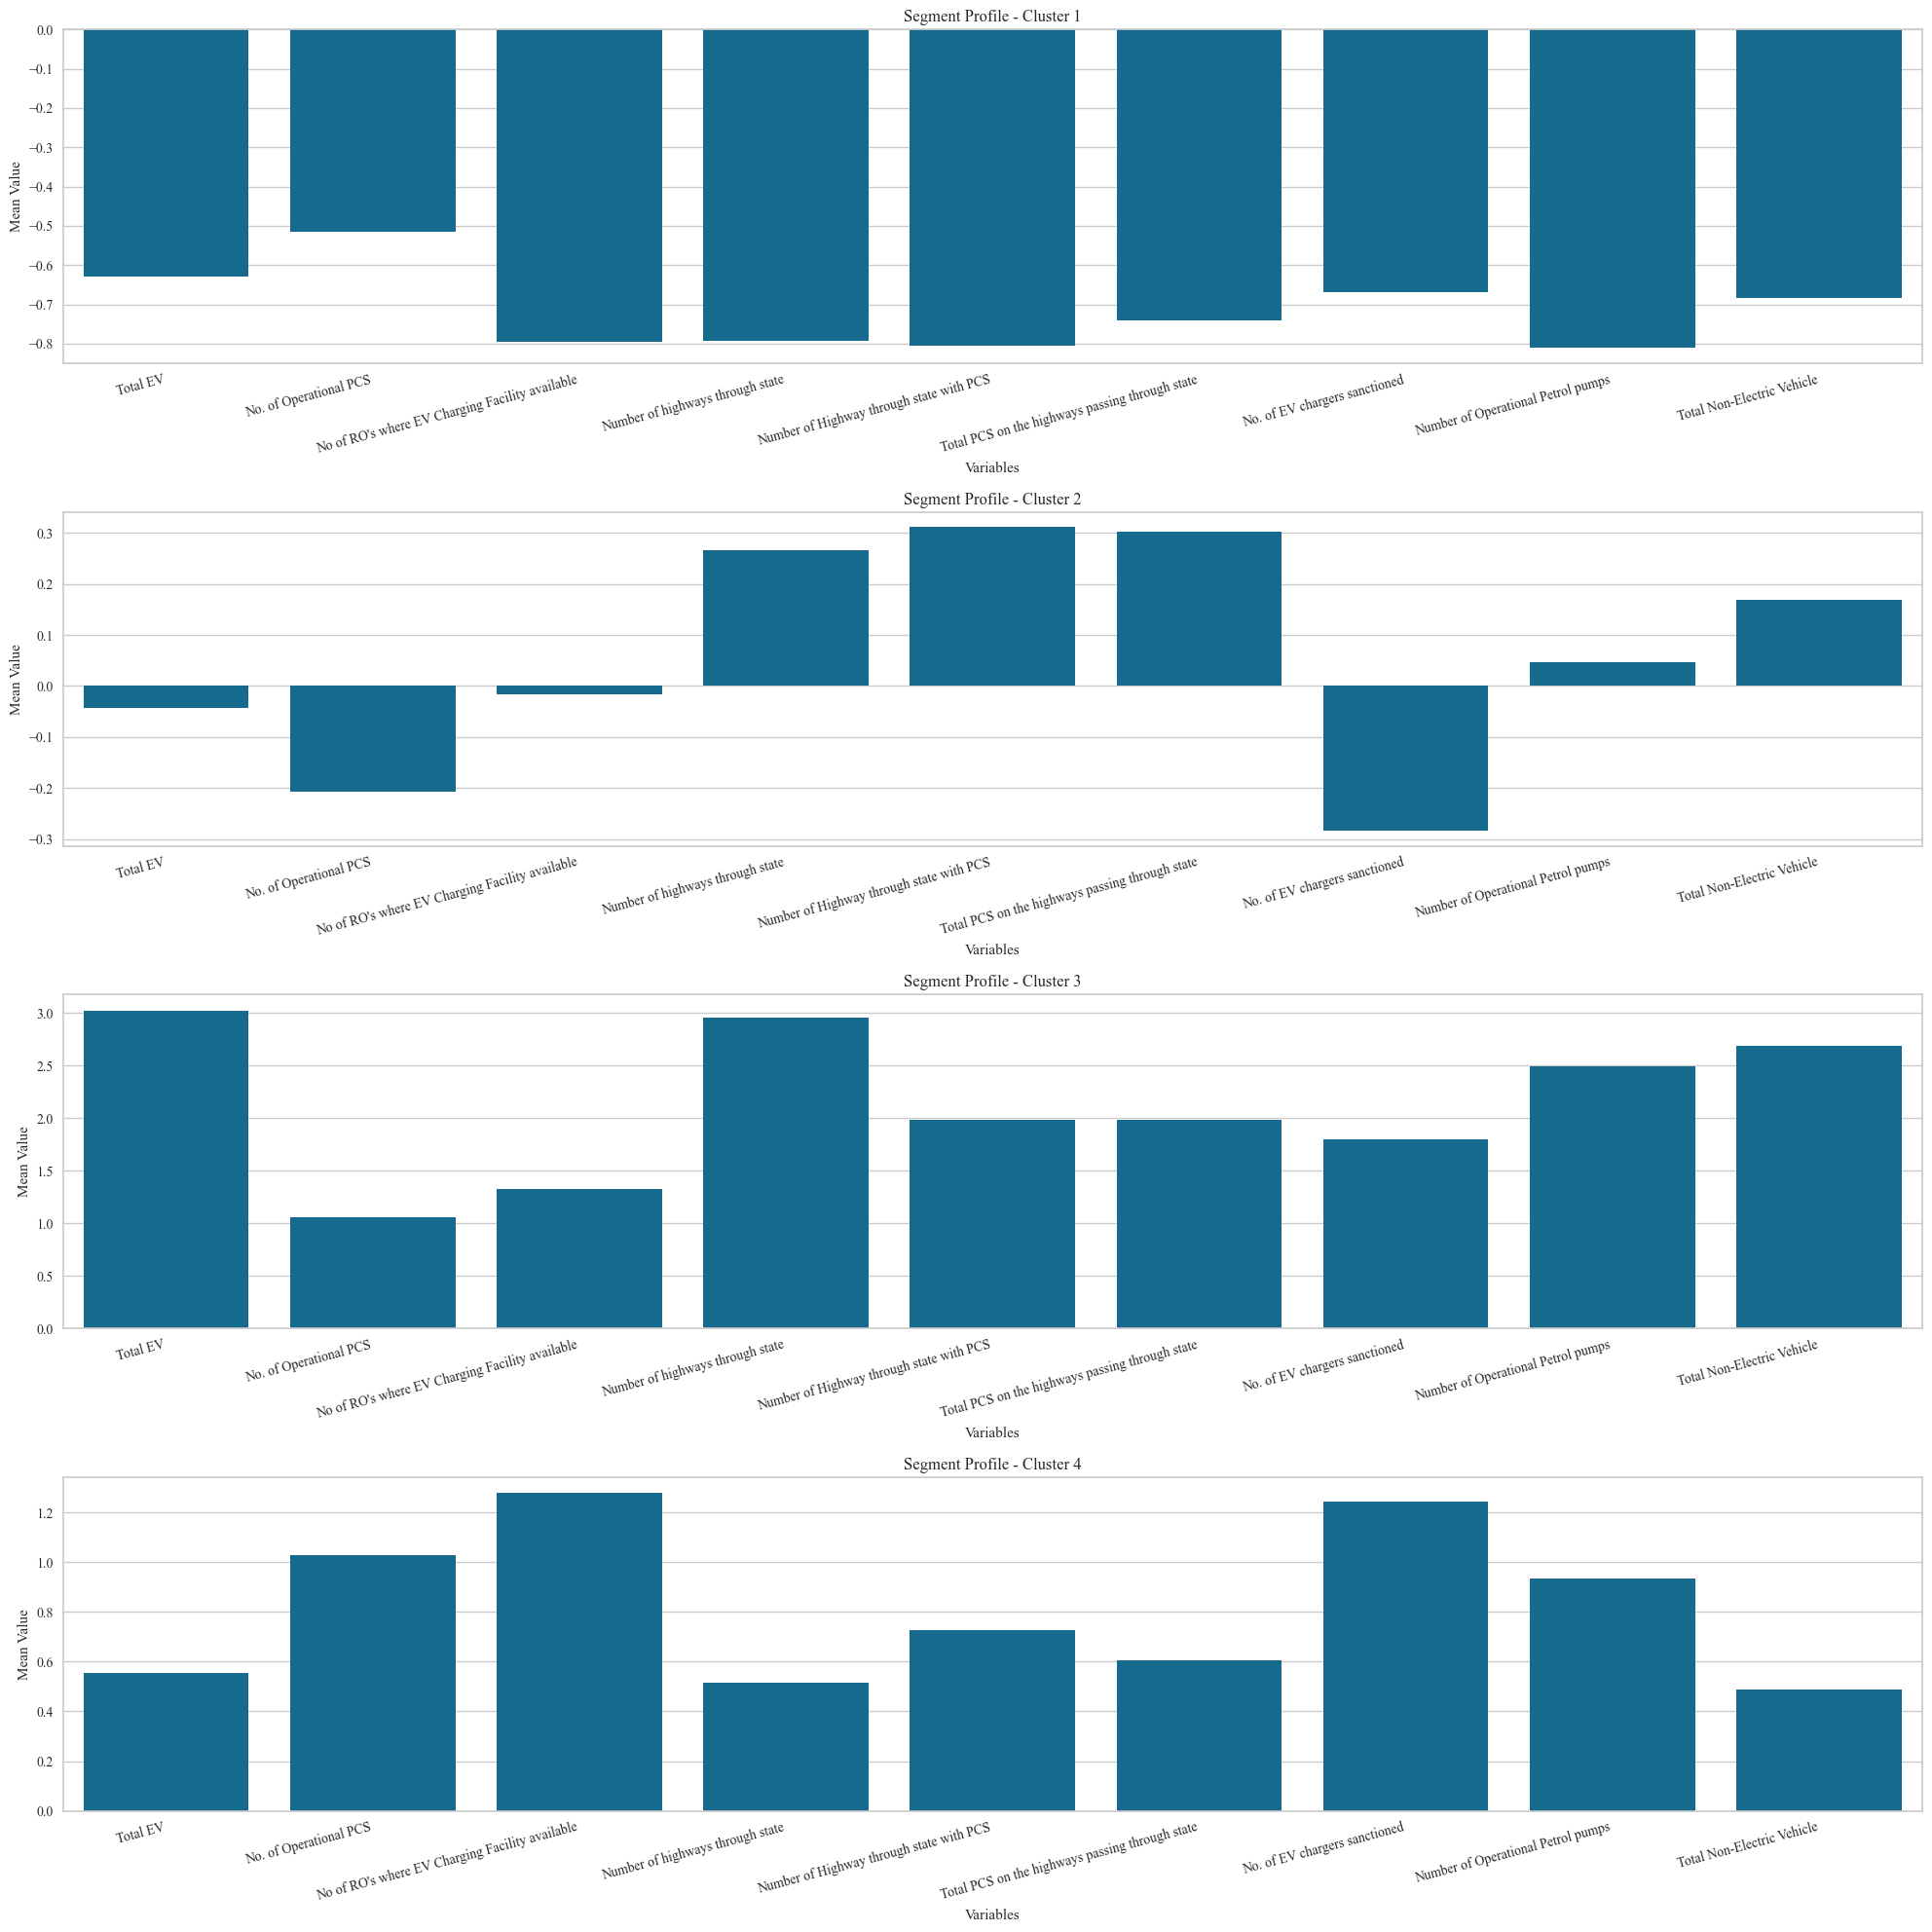

In [909]:
n_clusters = 4

# Perform clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=1234, n_init=10)
cluster_labels = kmeans.fit_predict(EV_seg_scaled)

# Calculate the mean/centroid of each cluster
cluster_centers = kmeans.cluster_centers_

# Create a DataFrame for the cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=EV_seg_scaled.columns)

# Plot segment profile for each cluster
plt.figure(figsize=(20, 20))

for i in range(n_clusters):
    plt.subplot(n_clusters, 1, i+1)
    sns.barplot(x=EV_seg_scaled.columns, y=cluster_centers_df.loc[i])
    plt.xlabel("Variables")
    plt.ylabel("Mean Value")
    plt.title(f"Segment Profile - Cluster {i+1}")
    plt.xticks(rotation=15, ha='right')

plt.subplots_adjust(hspace=0.5)
plt.savefig('''Mean Value of each variable for every cluster.png''', dpi=300, bbox_inches='tight')

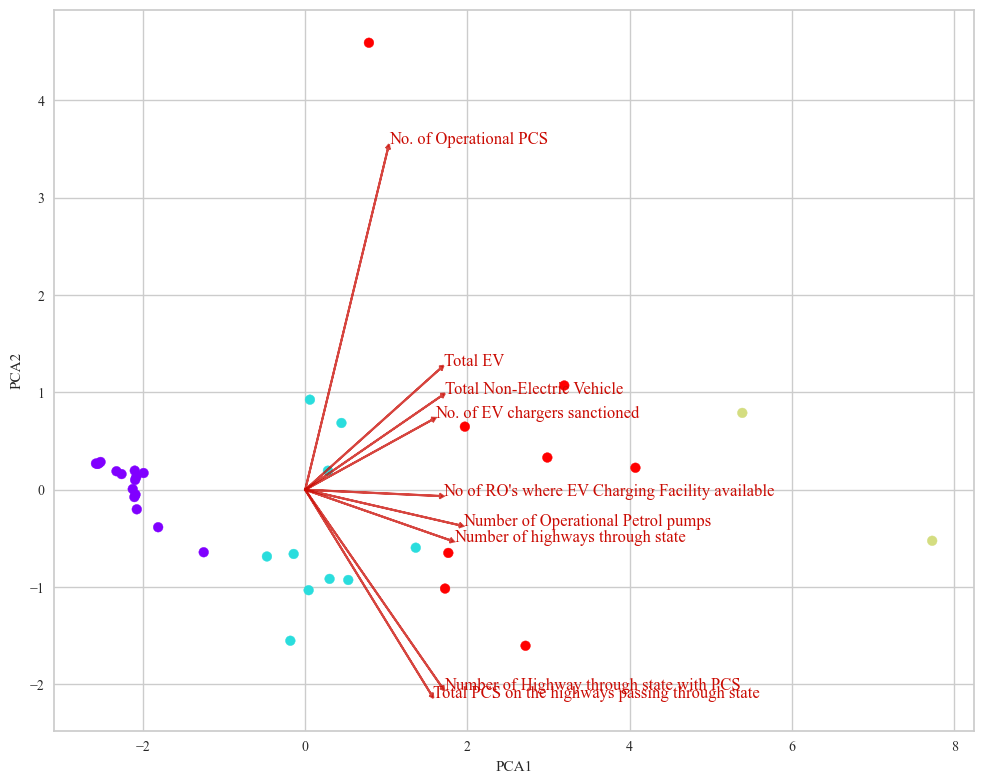

In [910]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=1234,n_init=10)
cluster_labels = kmeans.fit_predict(EV_seg_scaled)

# PCA calculation and scatter plot
pca1 = EV_seg_scaled_pca['PC1']
pca2 = EV_seg_scaled_pca['PC2']

# Create a scatter plot of PCA1 and PCA2 with cluster colors
plt.figure(figsize=(10, 8))
plt.scatter(pca1, pca2, c=cluster_labels, cmap='rainbow')

scaling_factor = 5

# Plot the original variables as vectors on the graph
for i, variable in enumerate(EV_seg_scaled.columns):
    x = 0  # Origin of the vector
    y = 0  # Origin of the vector
    dx = scaling_factor * loadings["PC1"][variable]  # Length and direction in PCA1
    dy = scaling_factor * loadings["PC2"][variable]  # Length and direction in PCA2
    plt.arrow(x, y, dx, dy, color='r', alpha=0.75, head_width=0.05, head_length=0.05, linewidth=1.5, length_includes_head=True, overhang=0.5, shape='full')
    plt.text(dx, dy, variable, color='r')

# Add labels and grid
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)

# Show the plot
plt.show()

In [911]:
# Define the number of clusters
n_clusters = 4

# Perform clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=1234, n_init=10)
cluster_labels = kmeans.fit_predict(EV_seg_scaled)

# Count the occurrences of each cluster label
cluster_counts = pd.Series(cluster_labels).value_counts()

print(cluster_counts)

0    16
1    10
3     8
2     2
Name: count, dtype: int64


In [912]:
second_cluster_indices = EV_seg_scaled.index[cluster_labels == 1]

print(second_cluster_indices)

Index(['Assam', 'Bihar', 'Chhattisgarh', 'Haryana', 'Jharkhand', 'Kerala',
       'Odisha', 'Punjab', 'Uttarakhand', 'West Bengal'],
      dtype='object', name='State Name')


In [913]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [914]:
data=pd.read_csv('ev_dataset.csv')
data.head()

Age Profession Marrital Status      Education  No of Dependents  \
0   27   Salaried          Single  Post Graduate                 0   
1   35   Salaried         Married  Post Graduate                 2   
2   45   Business         Married       Graduate                 4   
3   41   Business         Married  Post Graduate                 3   
4   31   Salaried         Married  Post Graduate                 2   

  Personal loan House Loan Wife Working   Salary  Wife Salary  Total Salary  \
0           Yes         No           No   800000            0        800000   
1           Yes        Yes          Yes  1400000       600000       2000000   
2           Yes        Yes           No  1800000            0       1800000   
3            No         No          Yes  1600000       600000       2200000   
4           Yes         No          Yes  1800000       800000       2600000   

     Make    Price  
0     i20   800000  
1    Ciaz  1000000  
2  Duster  1200000  
3    City  1200000  
4     SUV  1600000

In [915]:
data.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [916]:
# Observing unique value for object dtype columns
for col in ['Profession','Marrital Status','Education','Personal loan','House Loan','Wife Working','Make']:
  print(col,':',data[col].unique())

Profession : ['Salaried' 'Business']
Marrital Status : ['Single' 'Married']
Education : ['Post Graduate' 'Graduate']
Personal loan : ['Yes' 'No']
House Loan : ['No' 'Yes']
Wife Working : ['No' 'Yes' 'm']
Make : ['i20' 'Ciaz' 'Duster' 'City' 'SUV' 'Baleno' 'Verna' 'Luxuray' 'Creata']


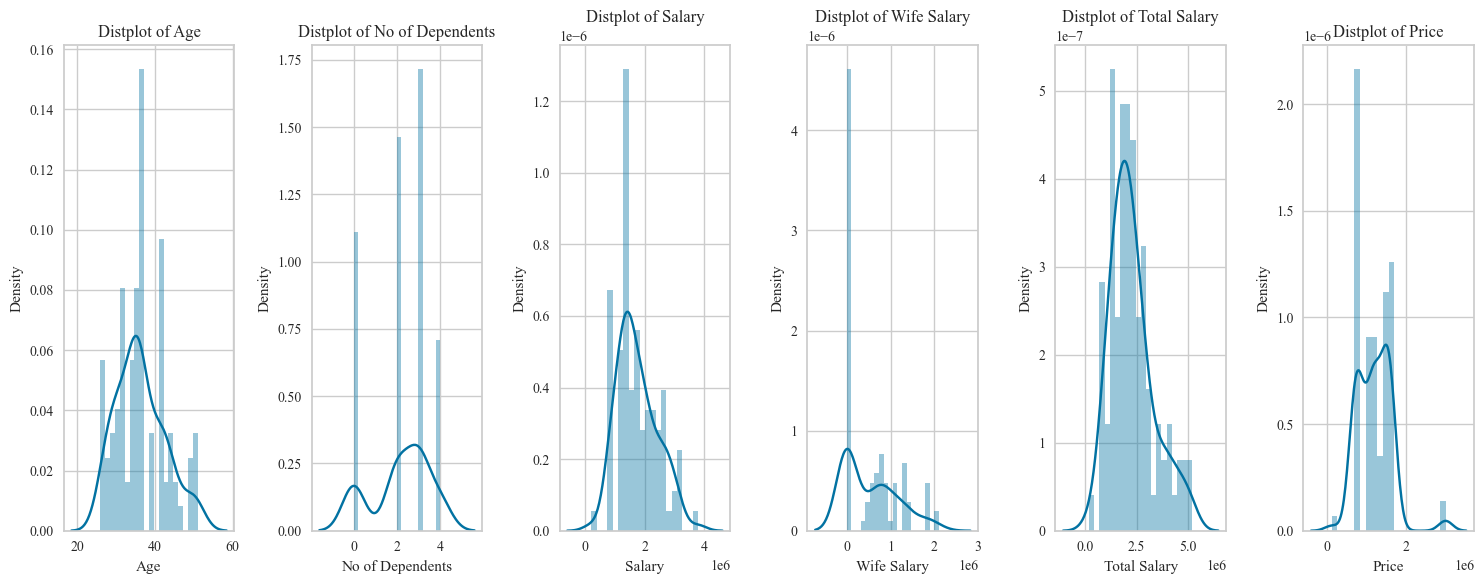

In [917]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age', 'No of Dependents' ,'Salary'  ,'Wife Salary'  ,'Total Salary'  ,'Price']:
  n += 1
  plt.subplot(1,6,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(data[x], bins = 20)
  plt.title('Distplot of {}'.format(x))
plt.show()

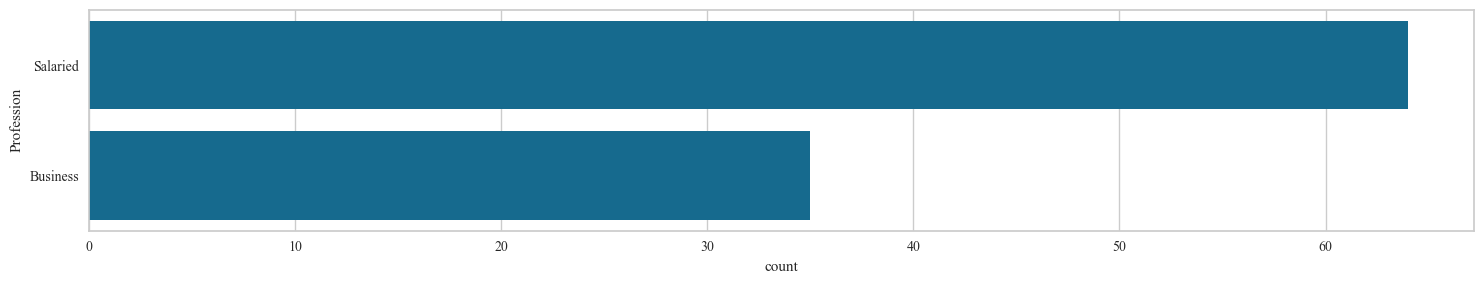

In [918]:
plt.figure(figsize=(15,3))
sns.countplot(y='Profession',data=data)
plt.show()

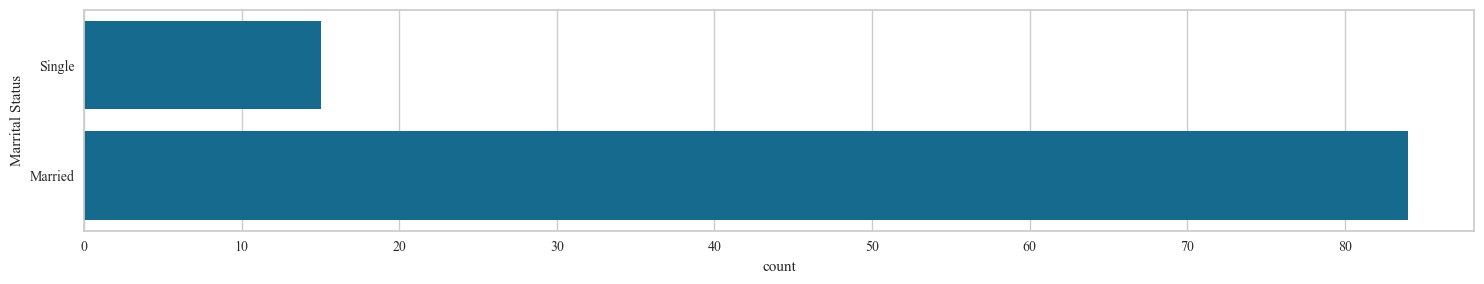

In [919]:
plt.figure(figsize=(15,3))
sns.countplot(y='Marrital Status',data=data)
plt.show()

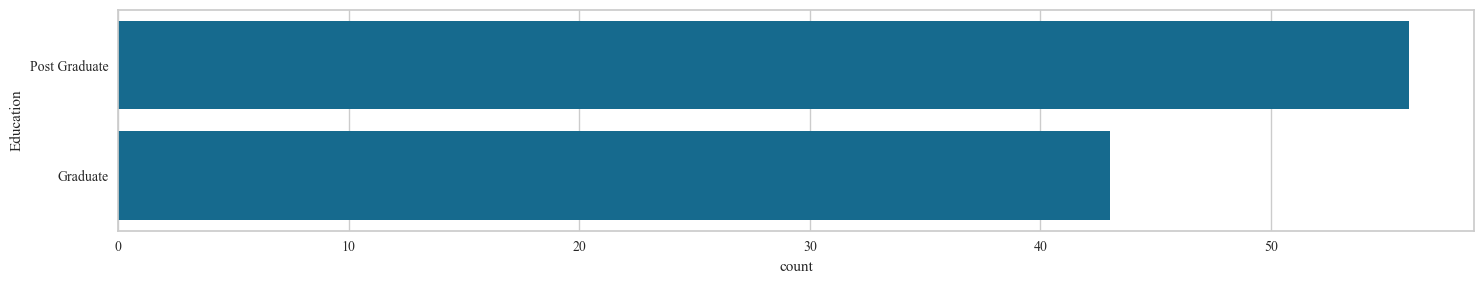

In [920]:
plt.figure(figsize=(15,3))
sns.countplot(y='Education',data=data)
plt.show()

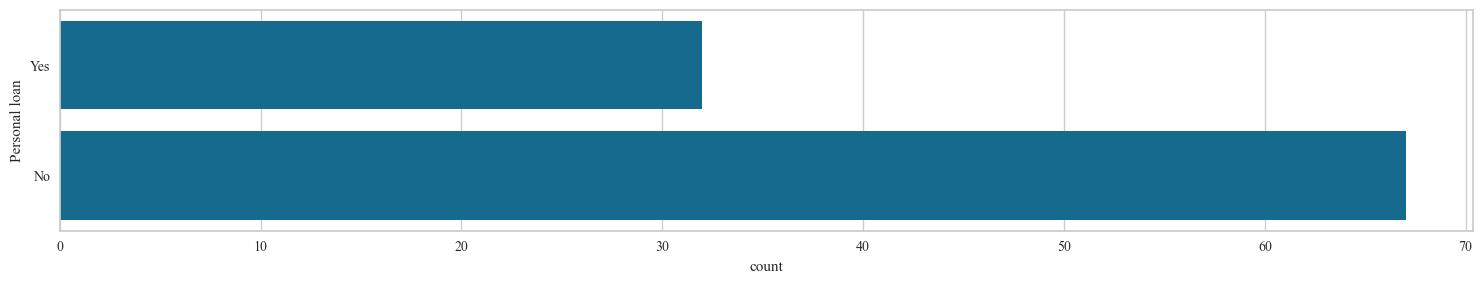

In [921]:
plt.figure(figsize=(15,3))
sns.countplot(y='Personal loan',data=data)
plt.show()

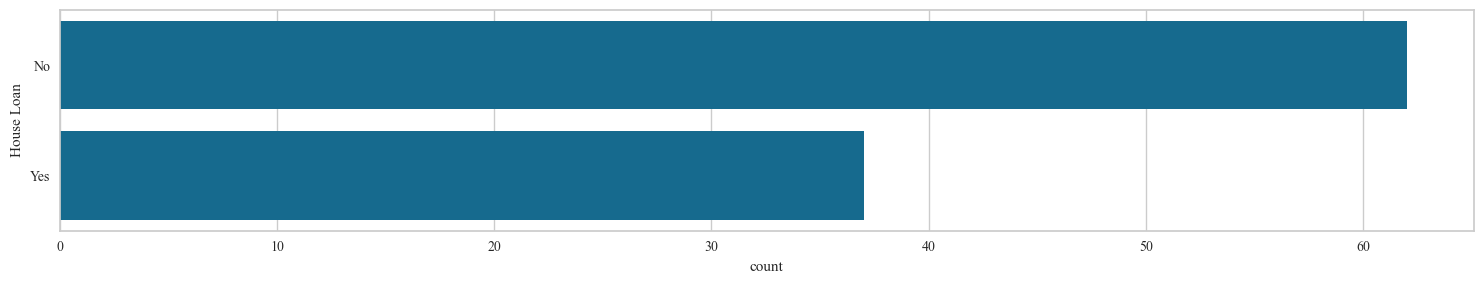

In [922]:
plt.figure(figsize=(15,3))
sns.countplot(y='House Loan',data=data)
plt.show()

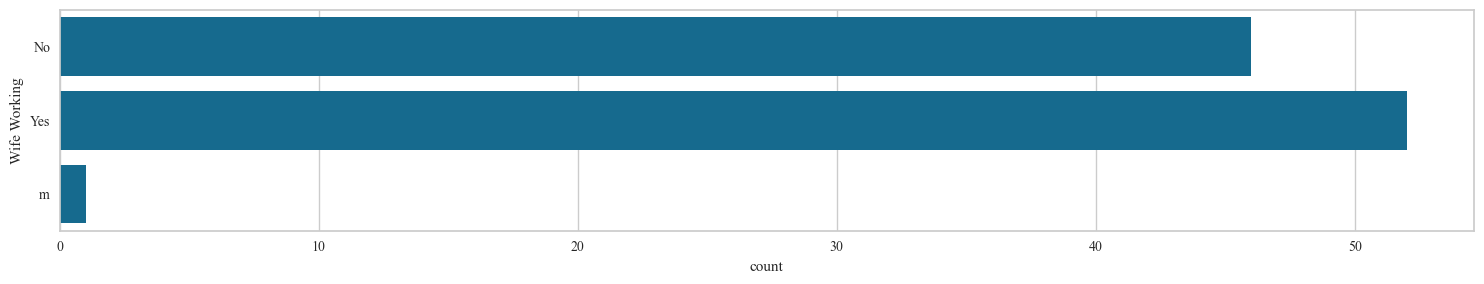

In [923]:
plt.figure(figsize=(15,3))
sns.countplot(y='Wife Working',data=data)
plt.show()

In [924]:
data.loc[data['Wife Working'] == 'm']   

Age Profession Marrital Status Education  No of Dependents Personal loan  \
11   35   Salaried         Married  Graduate                 4           Yes   

   House Loan Wife Working   Salary  Wife Salary  Total Salary    Make   Price  
11        Yes            m  1400000            0       1400000  Baleno  700000

In [925]:
data=data.replace(to_replace ="m",
                 value ="No")

In [926]:
data.head()

Age Profession Marrital Status      Education  No of Dependents  \
0   27   Salaried          Single  Post Graduate                 0   
1   35   Salaried         Married  Post Graduate                 2   
2   45   Business         Married       Graduate                 4   
3   41   Business         Married  Post Graduate                 3   
4   31   Salaried         Married  Post Graduate                 2   

  Personal loan House Loan Wife Working   Salary  Wife Salary  Total Salary  \
0           Yes         No           No   800000            0        800000   
1           Yes        Yes          Yes  1400000       600000       2000000   
2           Yes        Yes           No  1800000            0       1800000   
3            No         No          Yes  1600000       600000       2200000   
4           Yes         No          Yes  1800000       800000       2600000   

     Make    Price  
0     i20   800000  
1    Ciaz  1000000  
2  Duster  1200000  
3    City  1200000  
4     SUV  1600000

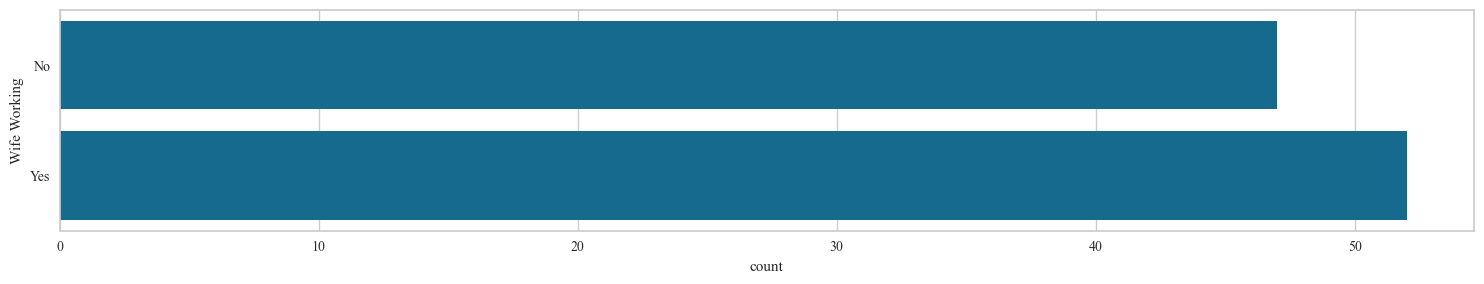

In [927]:
plt.figure(figsize=(15,3))
sns.countplot(y='Wife Working',data=data)
plt.show()

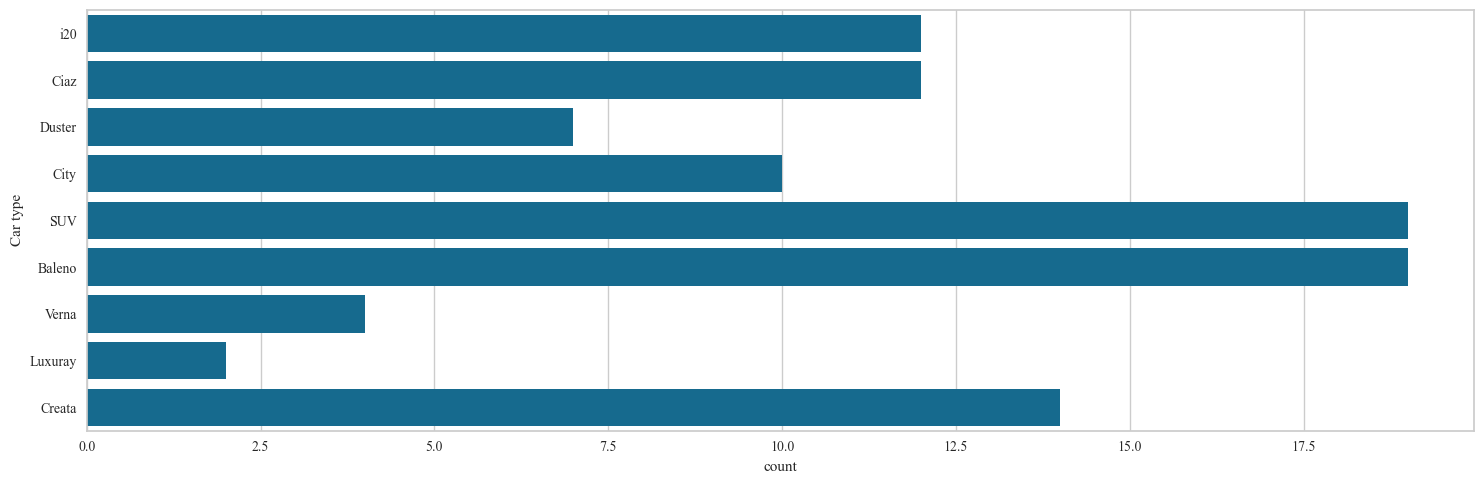

In [928]:
plt.figure(figsize=(15,5))
sns.countplot(y='Make',data=data)
plt.ylabel('Car type')
plt.show()

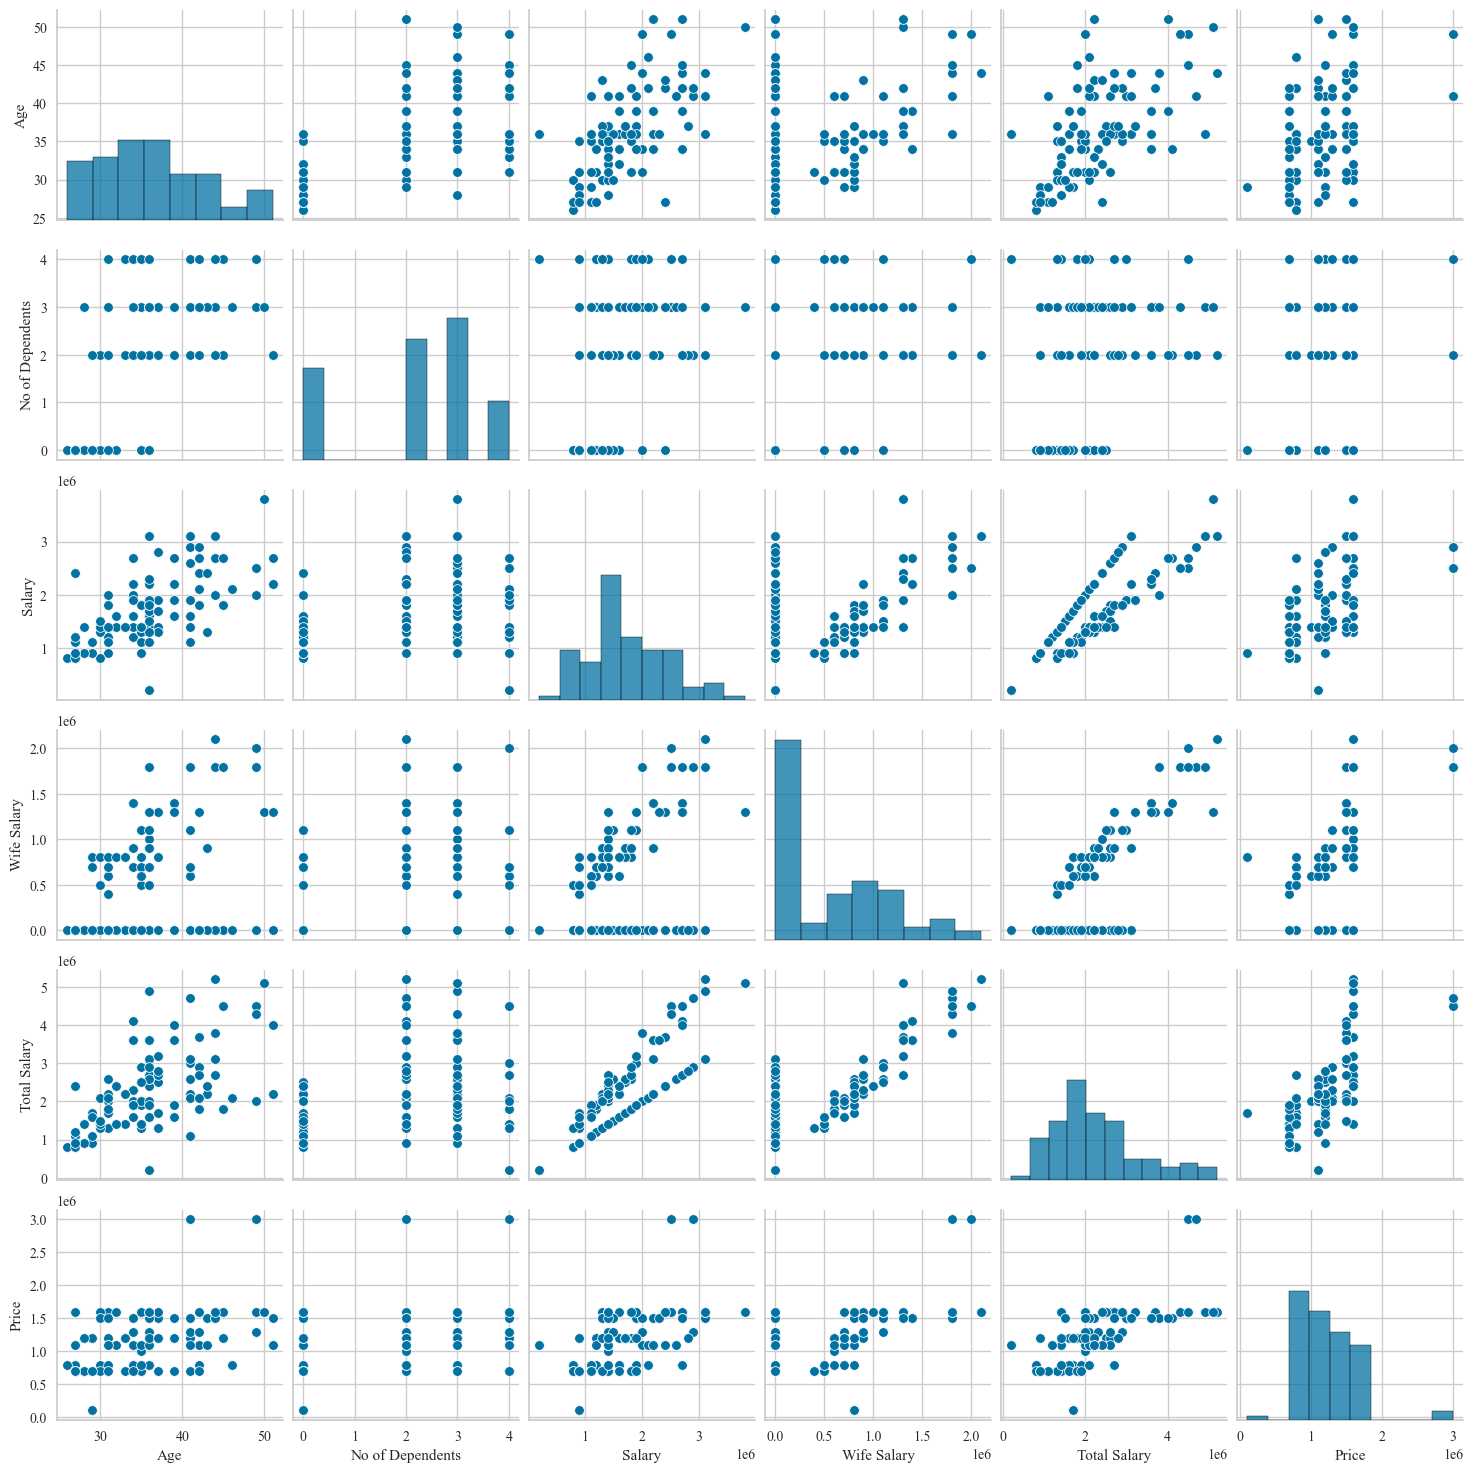

In [930]:
sns.pairplot(data)

In [931]:
#Behavioral and Psychographic Analysis

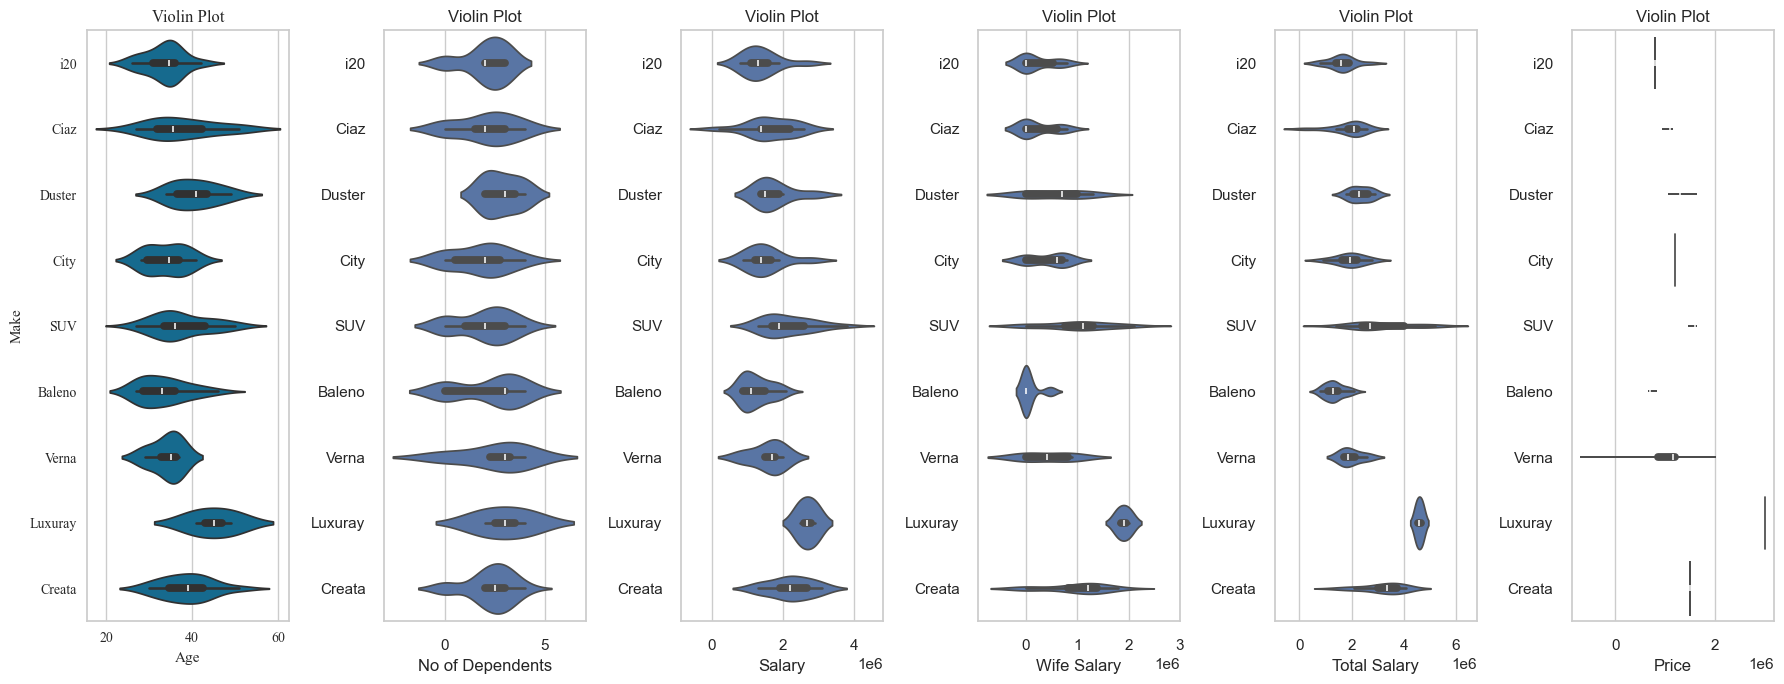

In [932]:
plt.figure(1,figsize=(18,7))
n = 0
for cols in ['Age','No of Dependents','Salary','Wife Salary','Total Salary','Price']:
  n += 1
  plt.subplot(1,6,n)
  sns.set(style = 'whitegrid')
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.violinplot(x= cols, y = 'Make', data=data)
  plt.ylabel("Make" if n==1 else '')
  plt.title('Violin Plot')

In [933]:
#Age: Younger consumers purchase less expensive vehicles.
#Number of Dependents: Greater number of dependents makes the consumer buy a vehicle with more seats and so they prefer SUVs.
#Salary: If you overlap the normalised salary plots with price plot, you would observe the median of salary violin plot matches that of the price of the vehicle indicating a very direct relationship.

<Axes: xlabel='Make', ylabel='count'>

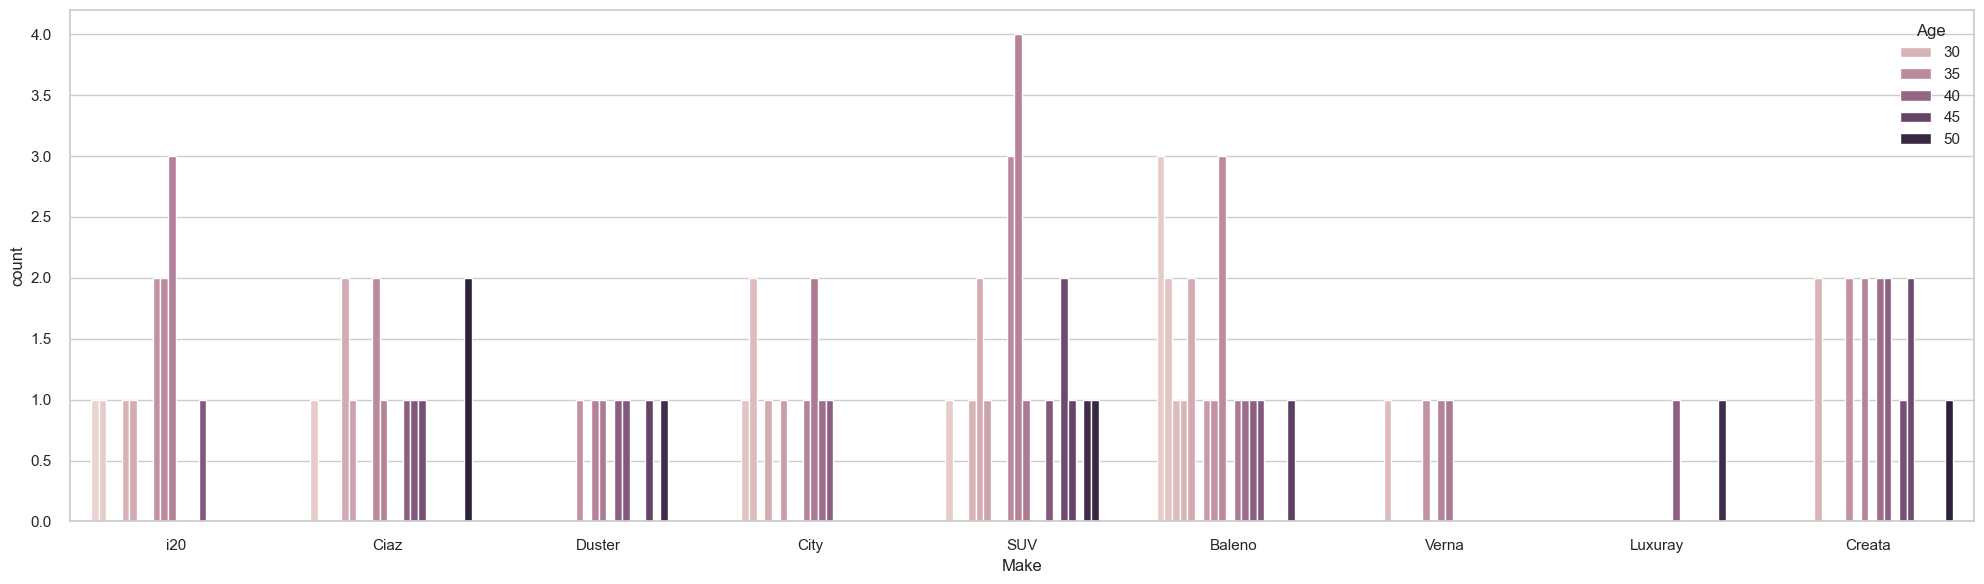

In [934]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=data, hue="Age")

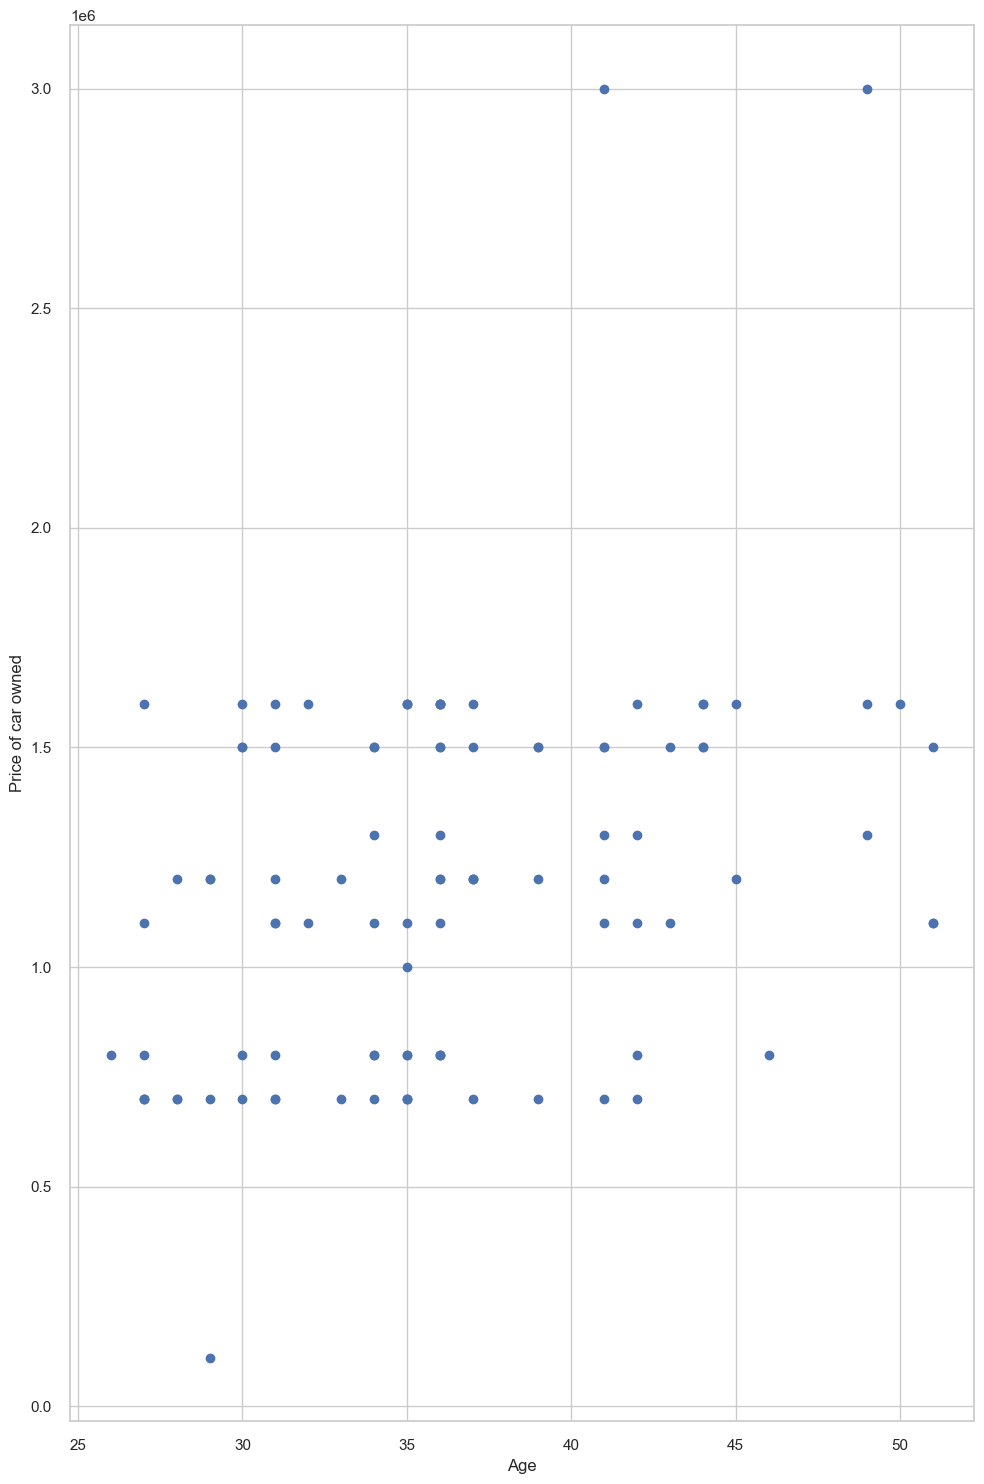

In [935]:
plt.xlabel('Age')
plt.ylabel('Price of car owned')
plt.scatter(data['Age'],data['Price'])

<Axes: xlabel='Make', ylabel='count'>

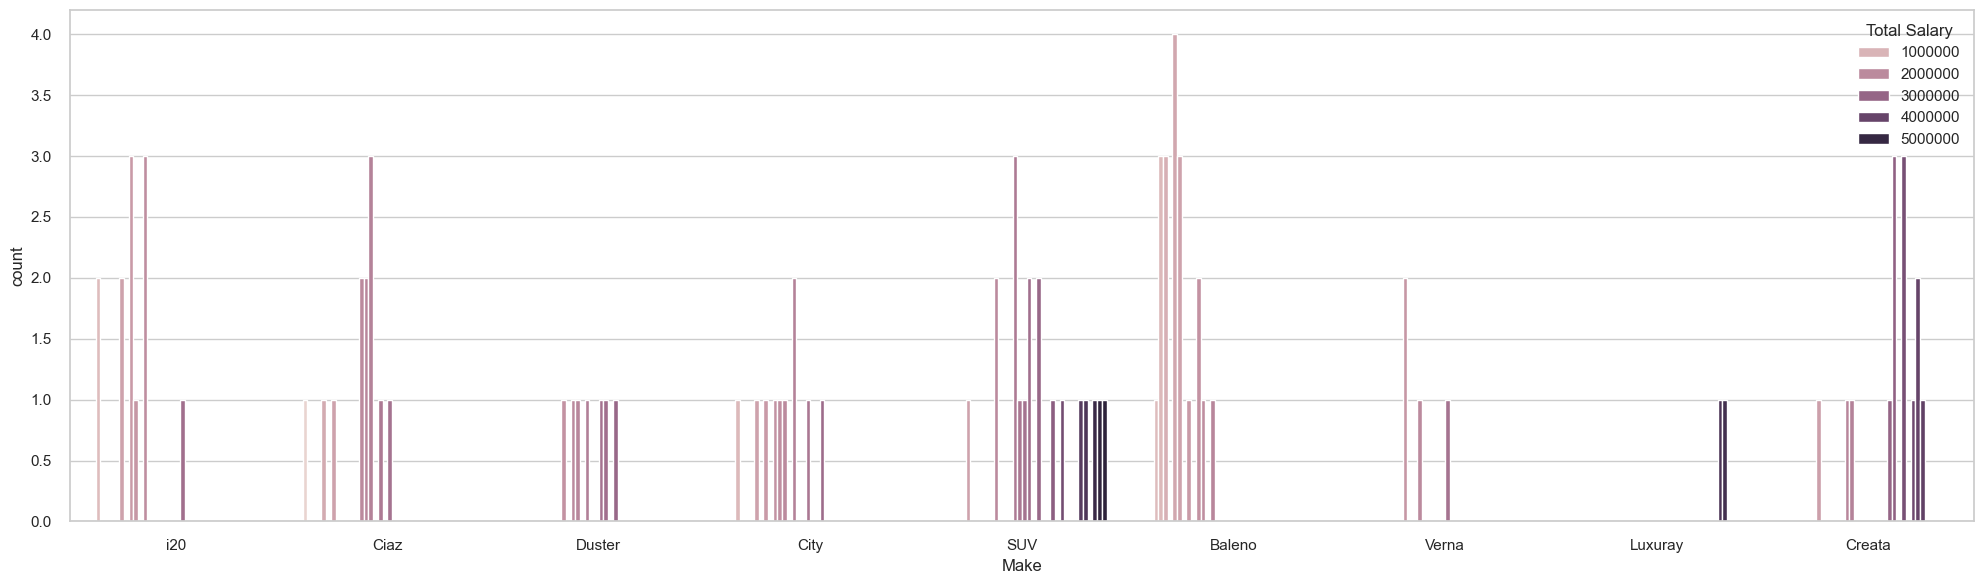

In [936]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=data, hue="Total Salary")

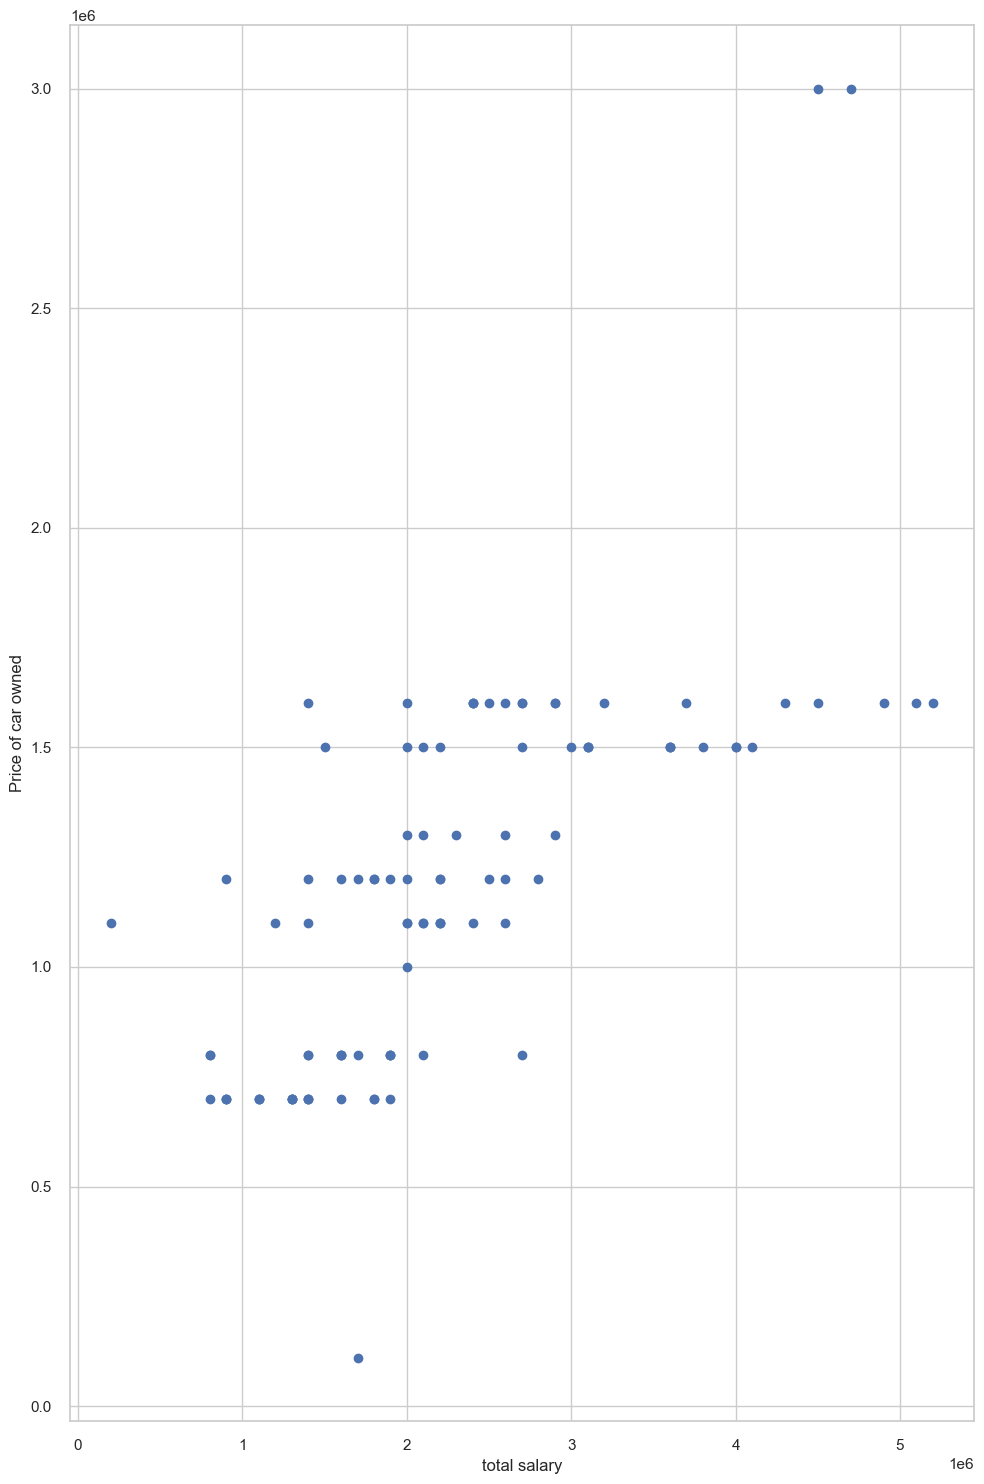

In [937]:
plt.xlabel('total salary')
plt.ylabel('Price of car owned')
plt.scatter(data['Total Salary'],data['Price'])

<Axes: xlabel='Make', ylabel='count'>

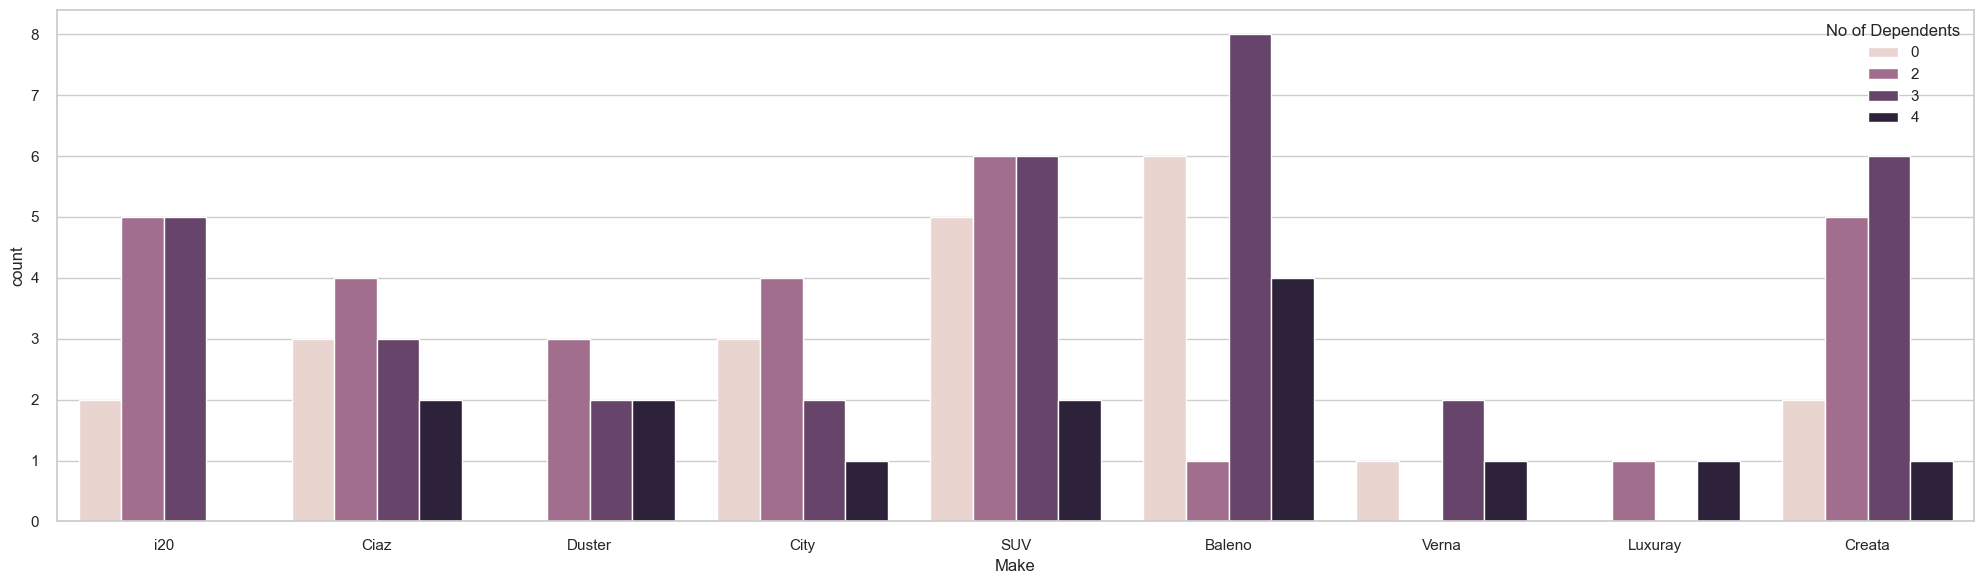

In [938]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=data, hue="No of Dependents")

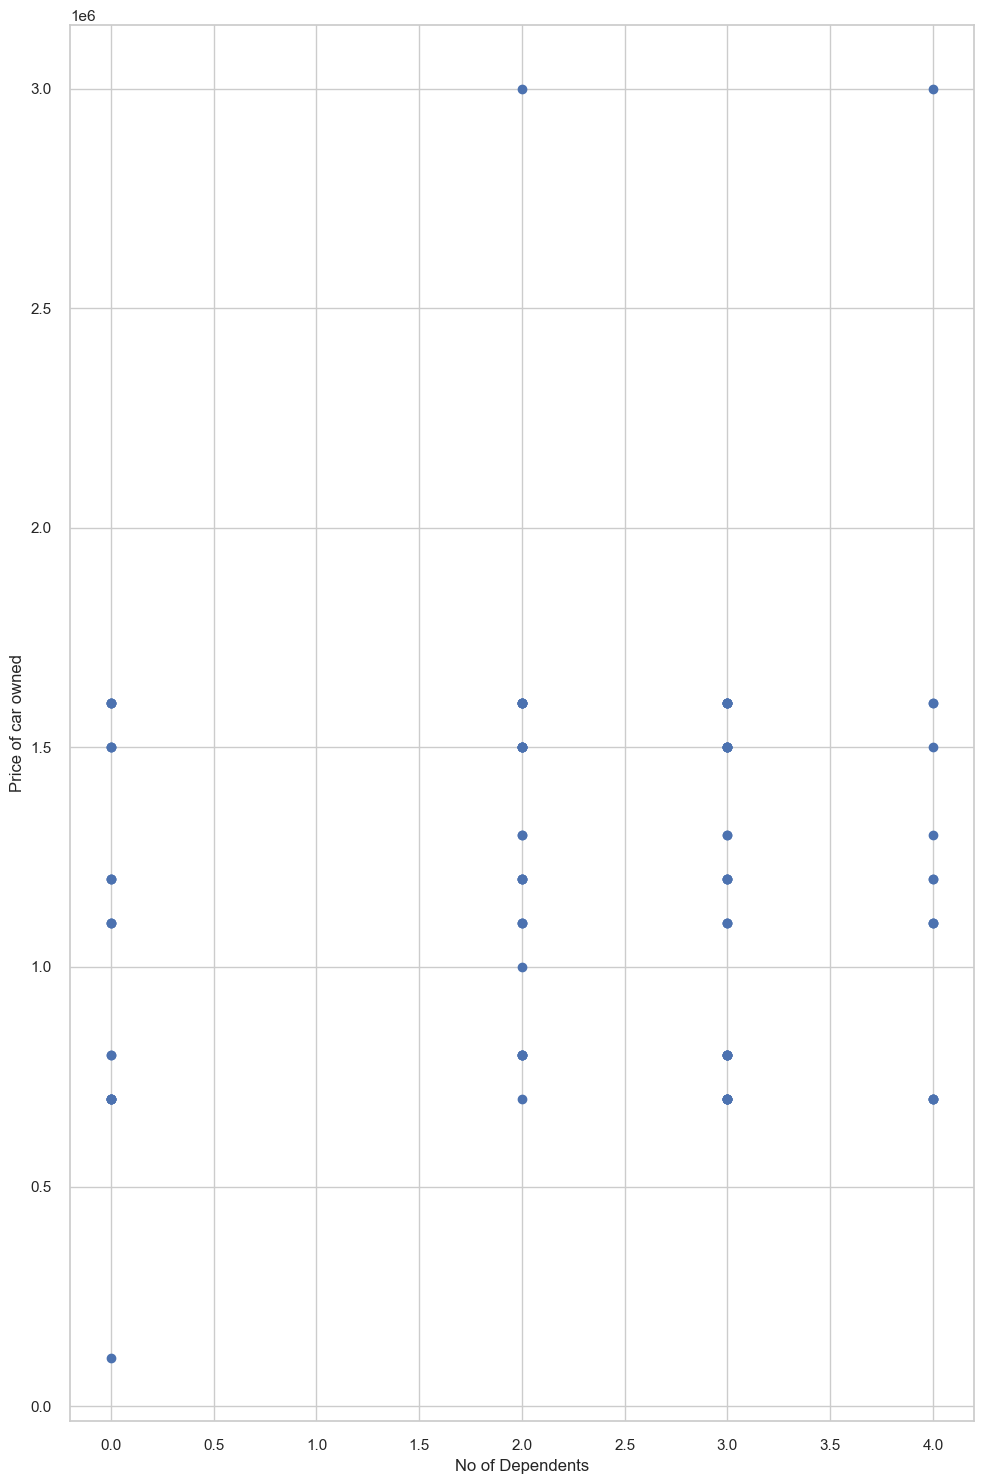

In [939]:
plt.xlabel('No of Dependents')
plt.ylabel('Price of car owned')
plt.scatter(data['No of Dependents'],data['Price'])

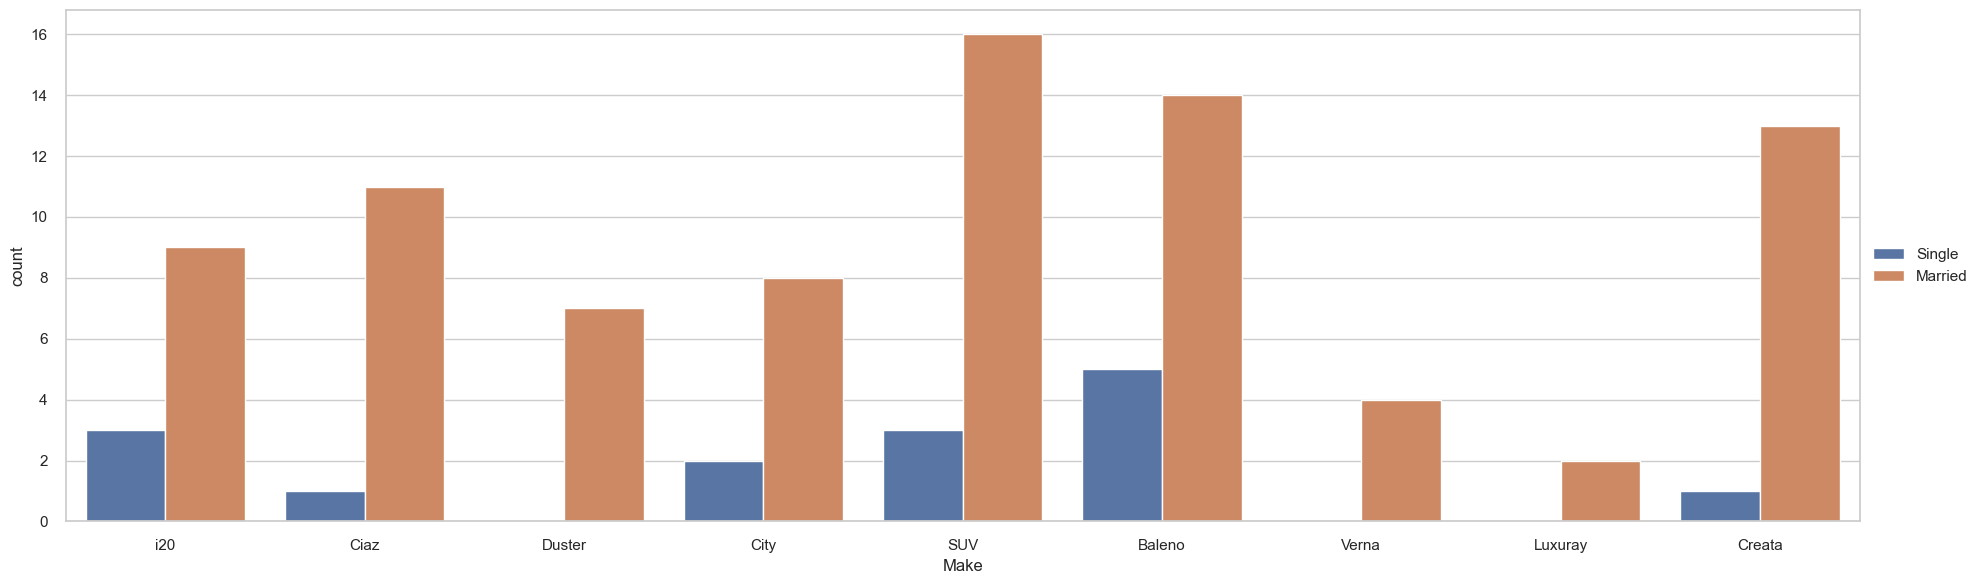

In [940]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=data, hue="Marrital Status")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

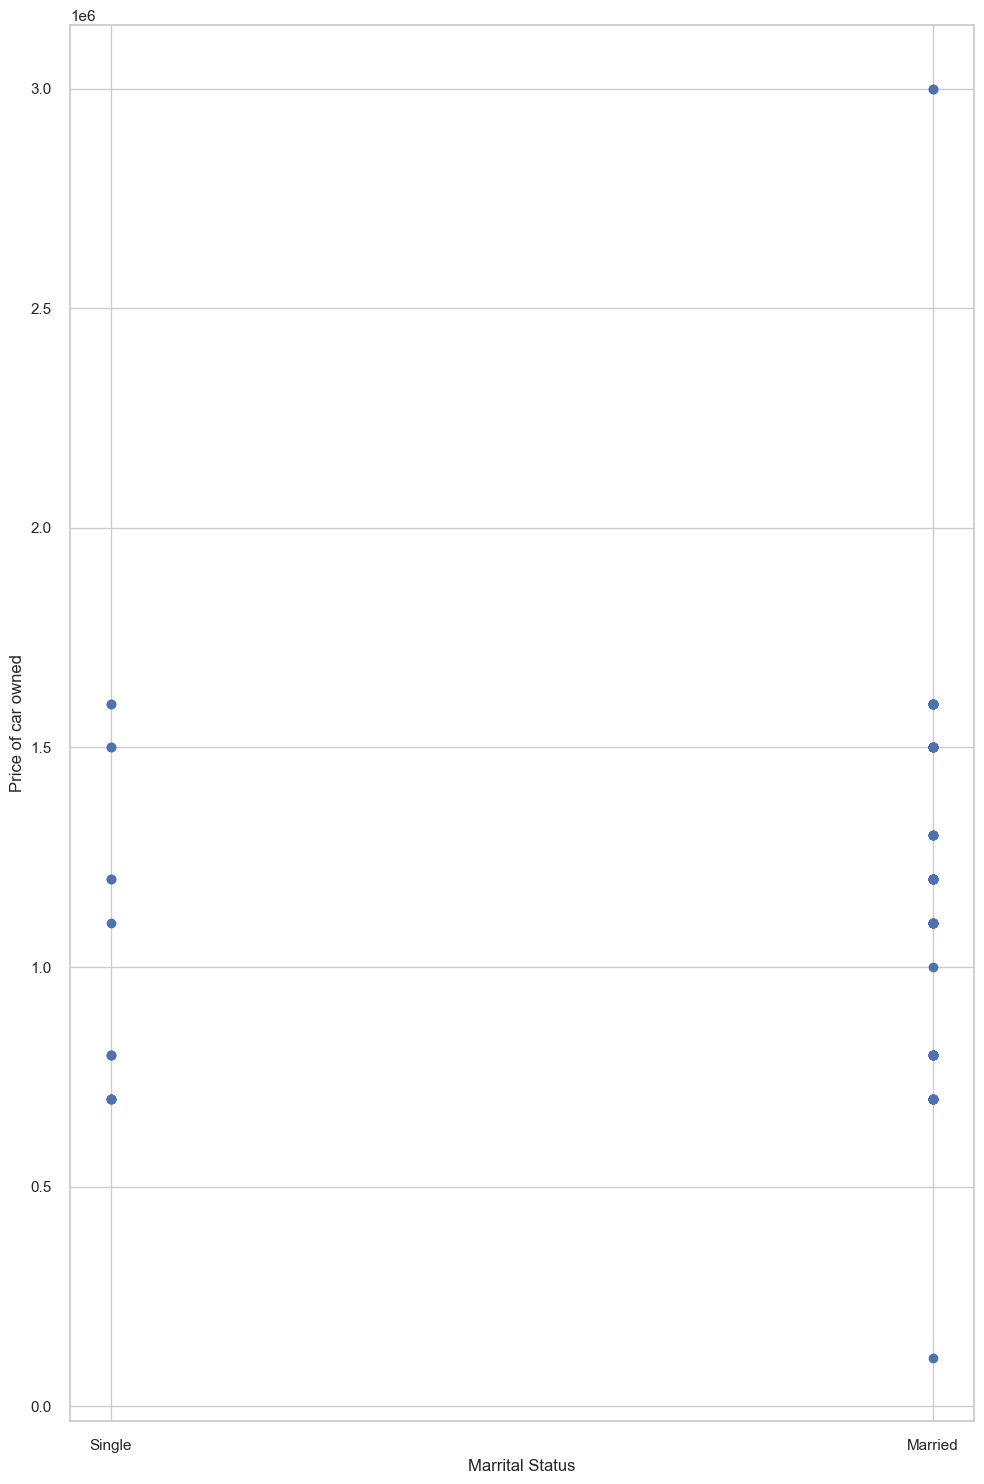

In [941]:
plt.xlabel('Marrital Status')
plt.ylabel('Price of car owned')
plt.scatter(data['Marrital Status'],data['Price'])

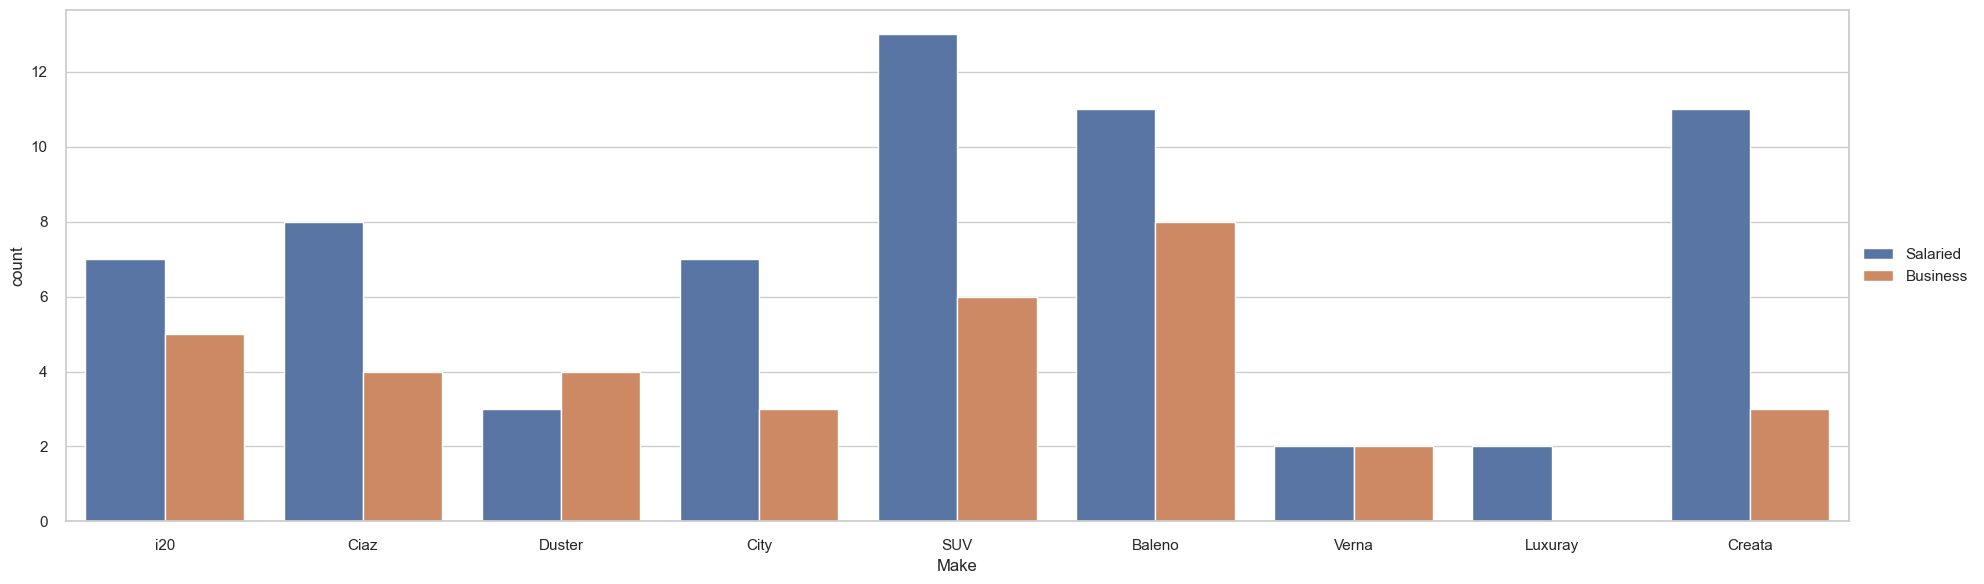

In [942]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=data, hue="Profession")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

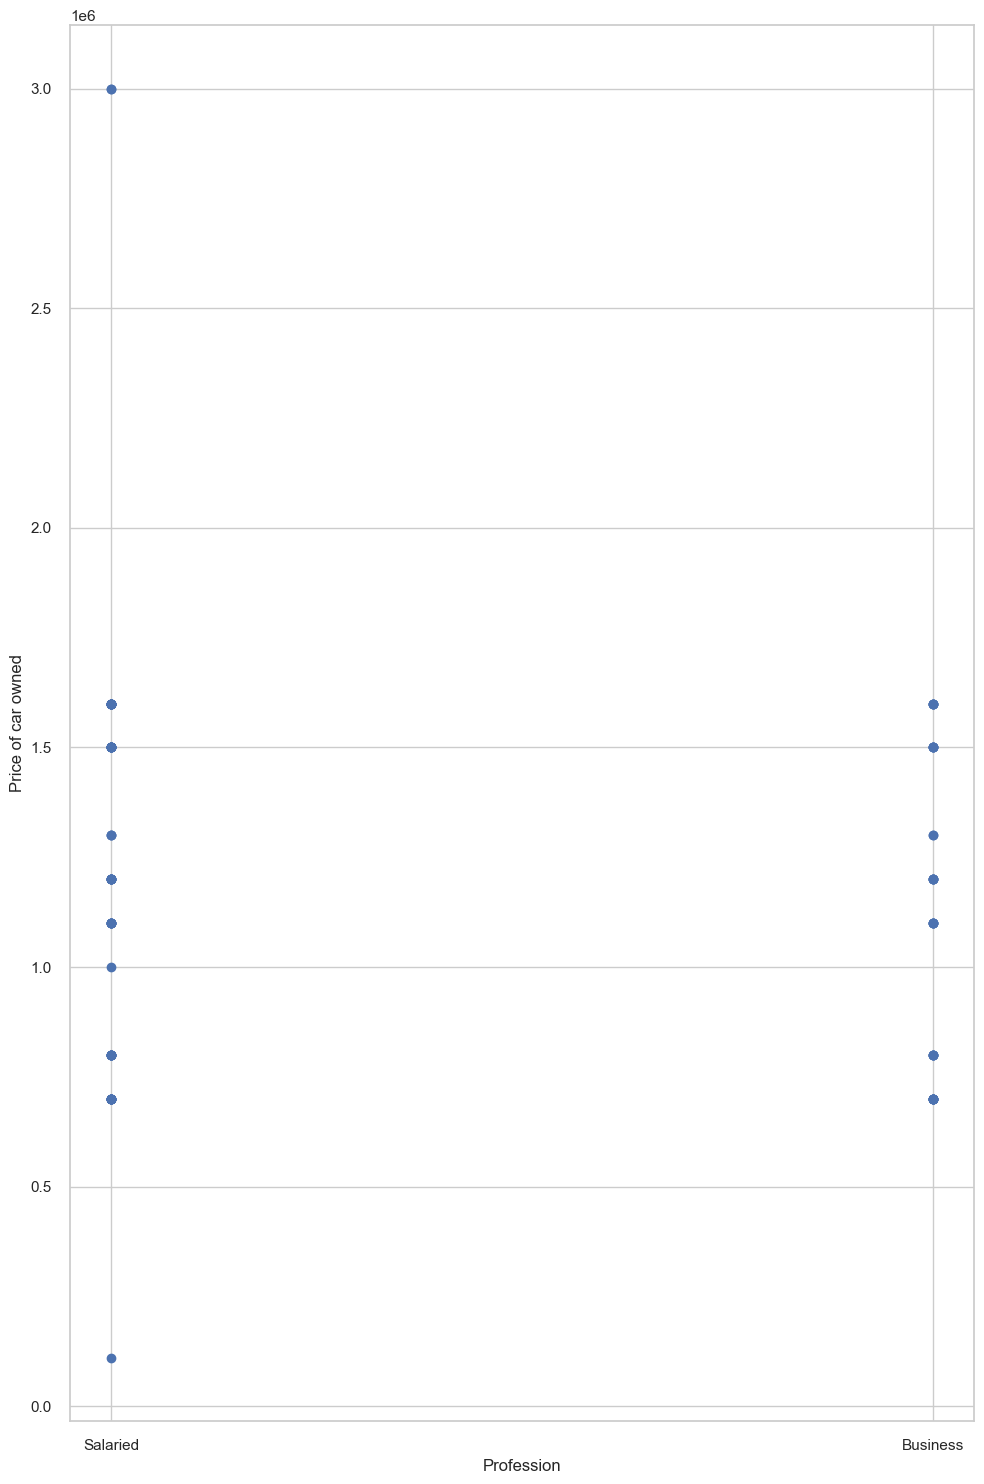

In [943]:
plt.xlabel('Profession')
plt.ylabel('Price of car owned')
plt.scatter(data['Profession'],data['Price'])
plt.show()

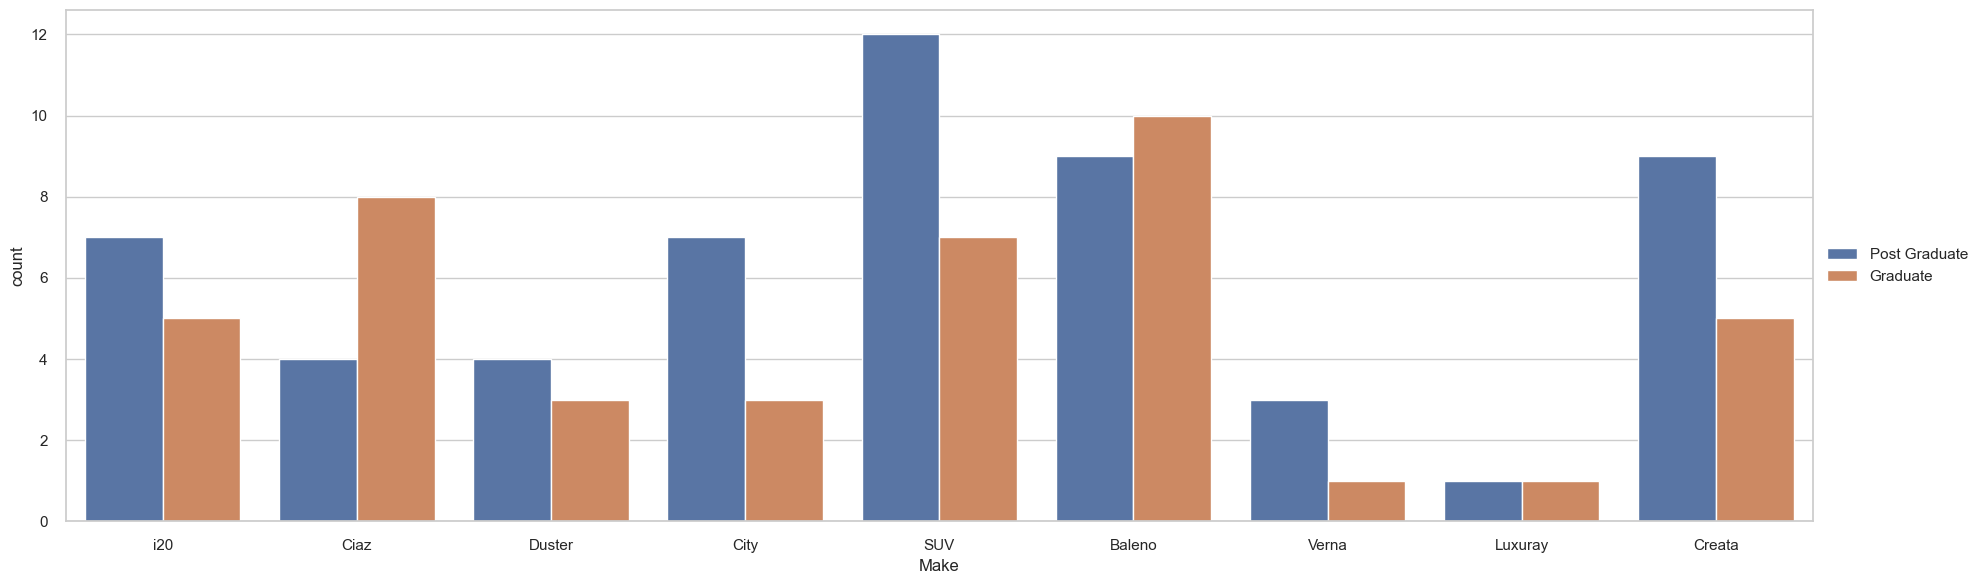

In [944]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=data, hue="Education")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

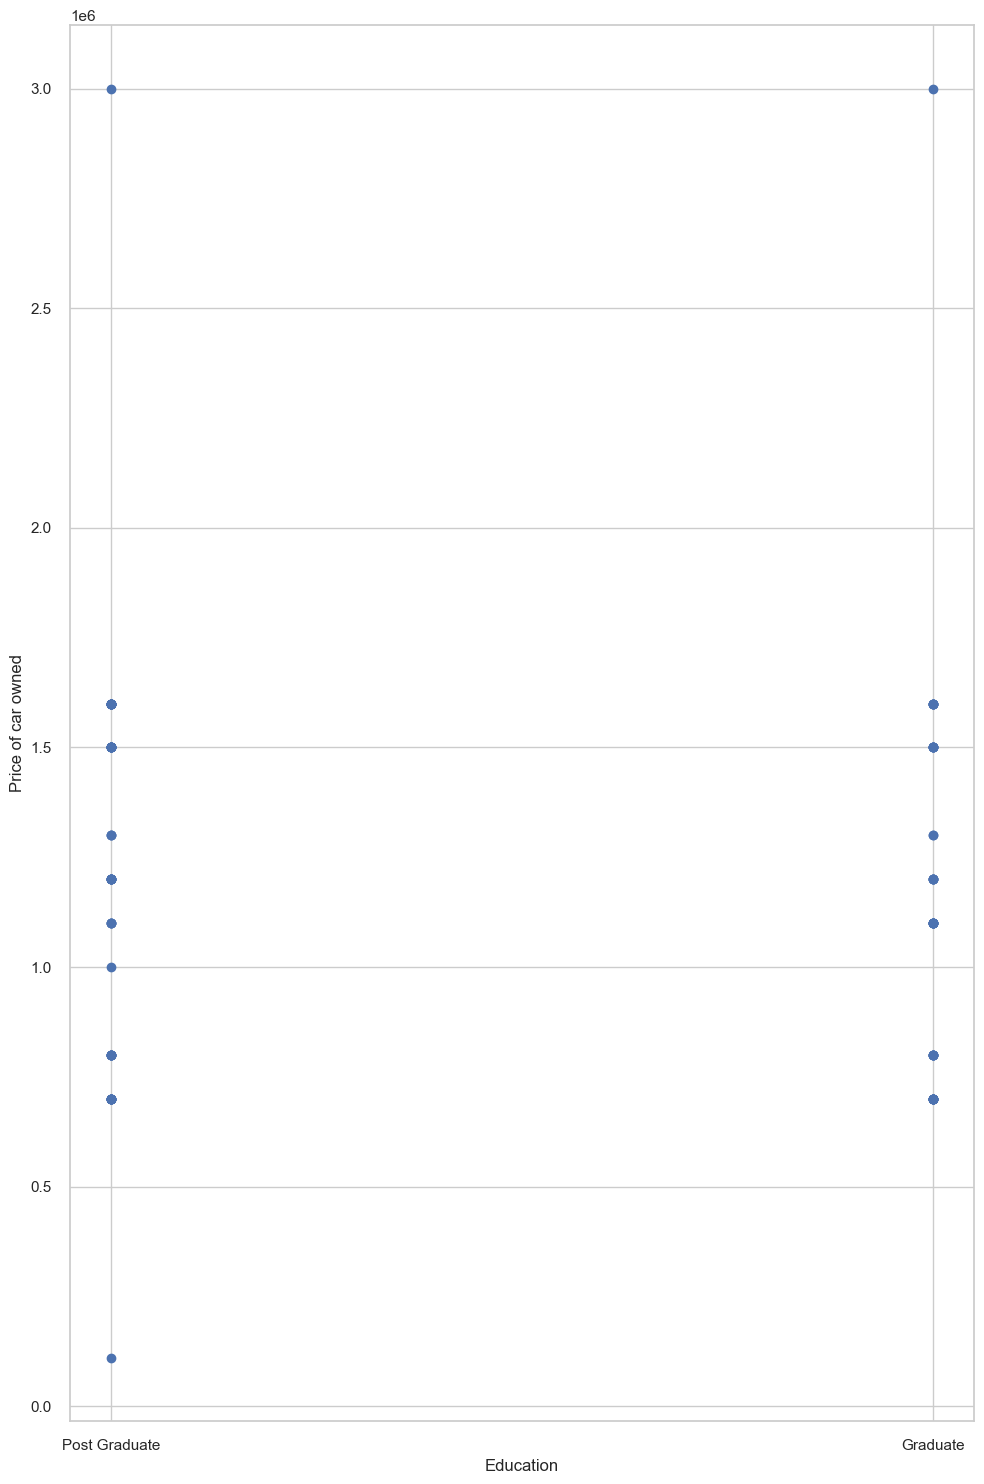

In [945]:
plt.xlabel('Education')
plt.ylabel('Price of car owned')
plt.scatter(data['Education'],data['Price'])

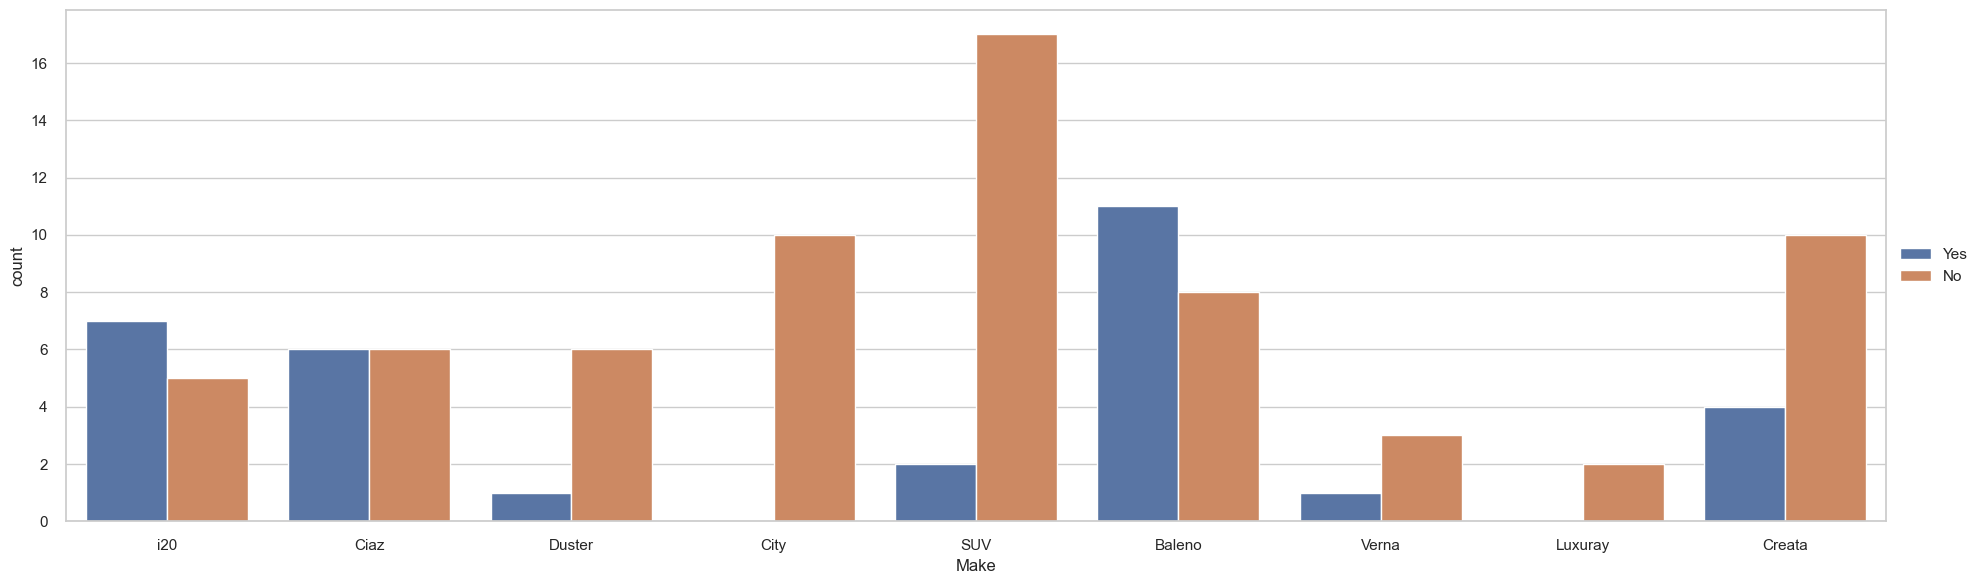

In [946]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=data, hue="Personal loan")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

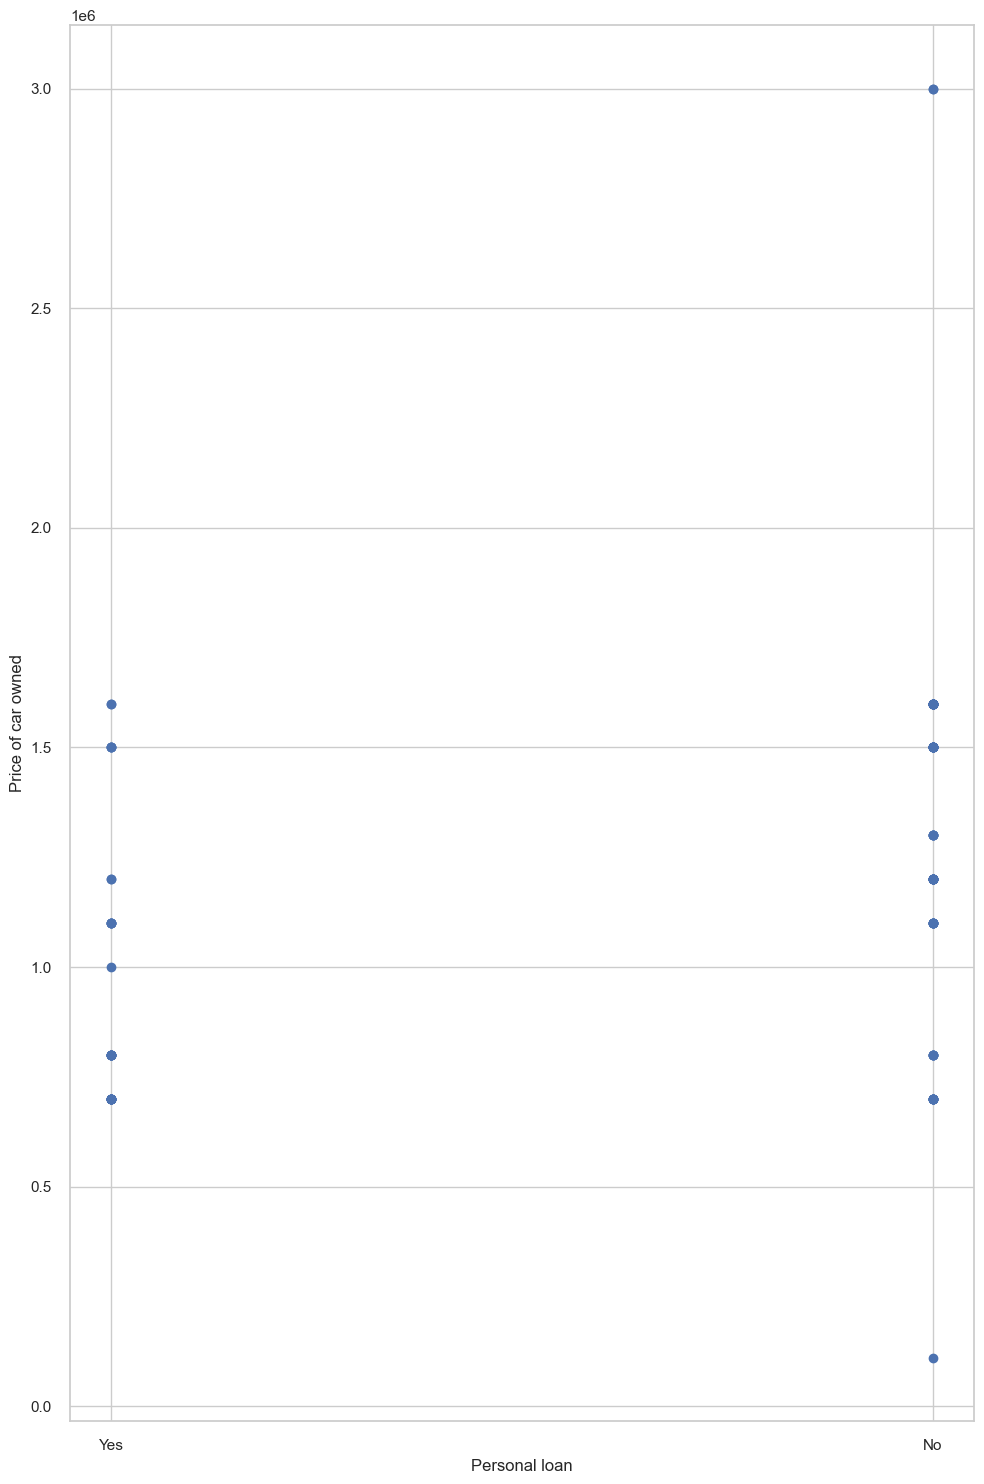

In [947]:
plt.xlabel('Personal loan')
plt.ylabel('Price of car owned')
plt.scatter(data['Personal loan'],data['Price'])

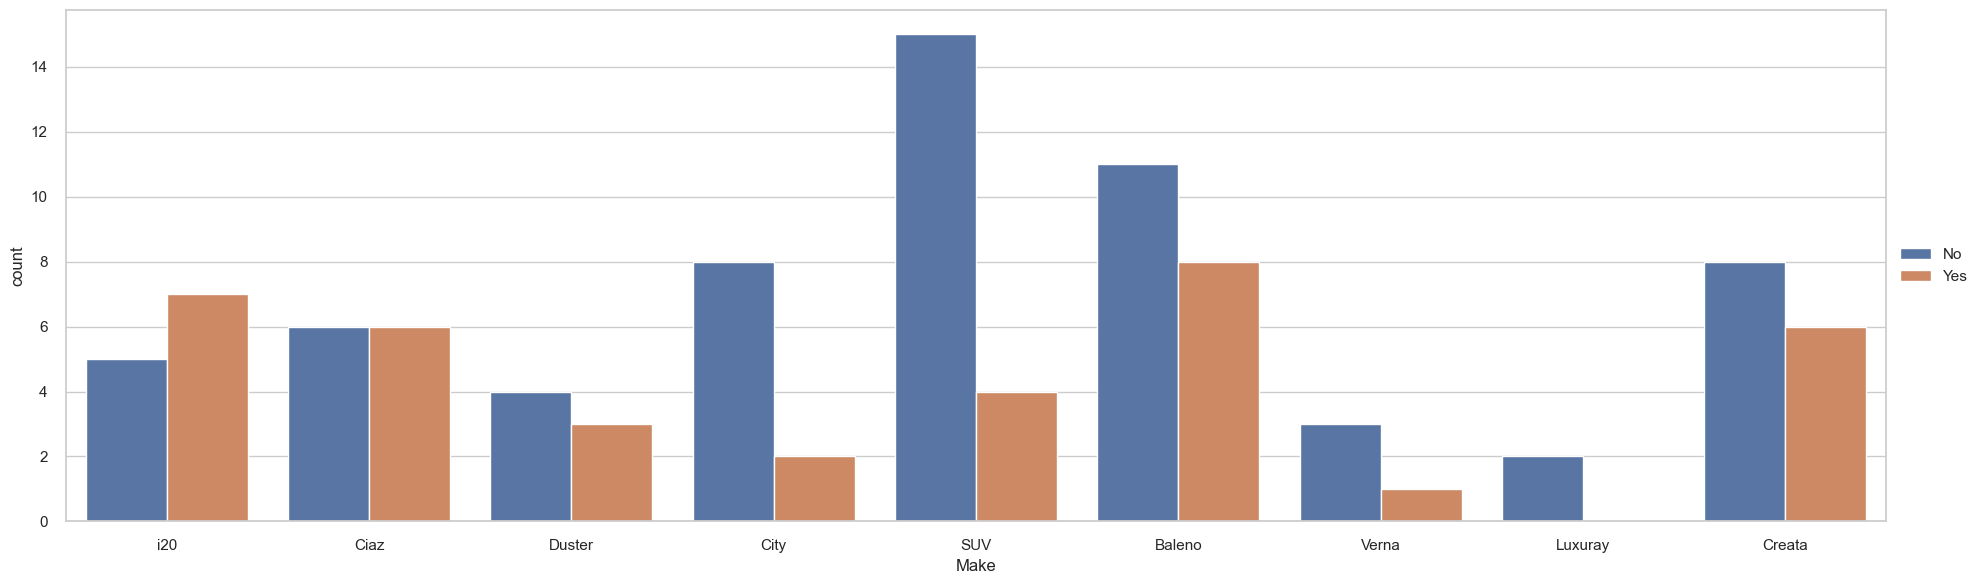

In [948]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=data, hue="House Loan")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

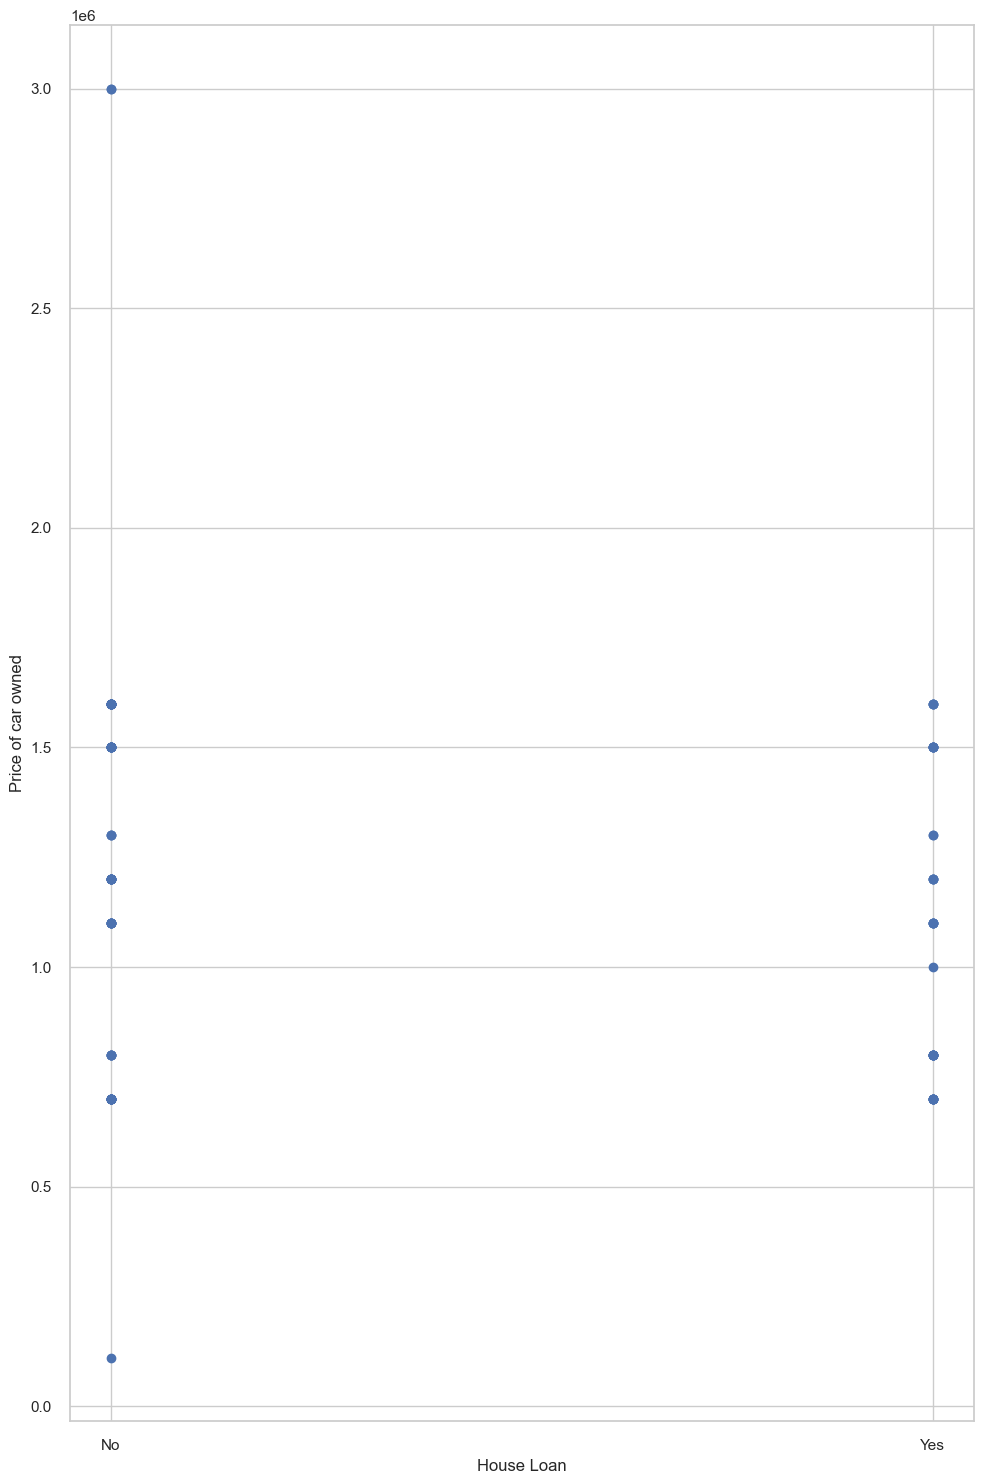

In [949]:
plt.xlabel('House Loan')
plt.ylabel('Price of car owned')
plt.scatter(data['House Loan'],data['Price'])

In [950]:
from sklearn.preprocessing import LabelEncoder
cols = ['Profession', 'Marrital Status', 'Education', 'Personal loan','House Loan','Wife Working']
data[cols] = data[cols].apply(LabelEncoder().fit_transform)
data.head()


Age  Profession  Marrital Status  Education  No of Dependents  \
0   27           1                1          1                 0   
1   35           1                0          1                 2   
2   45           0                0          0                 4   
3   41           0                0          1                 3   
4   31           1                0          1                 2   

   Personal loan  House Loan  Wife Working   Salary  Wife Salary  \
0              1           0             0   800000            0   
1              1           1             1  1400000       600000   
2              1           1             0  1800000            0   
3              0           0             1  1600000       600000   
4              1           0             1  1800000       800000   

   Total Salary    Make    Price  
0        800000     i20   800000  
1       2000000    Ciaz  1000000  
2       1800000  Duster  1200000  
3       2200000    City  1200000  
4       2600000     SUV  1600000

In [951]:
data_price = data.drop('Make',axis=1)
data_price.head()

Age  Profession  Marrital Status  Education  No of Dependents  \
0   27           1                1          1                 0   
1   35           1                0          1                 2   
2   45           0                0          0                 4   
3   41           0                0          1                 3   
4   31           1                0          1                 2   

   Personal loan  House Loan  Wife Working   Salary  Wife Salary  \
0              1           0             0   800000            0   
1              1           1             1  1400000       600000   
2              1           1             0  1800000            0   
3              0           0             1  1600000       600000   
4              1           0             1  1800000       800000   

   Total Salary    Price  
0        800000   800000  
1       2000000  1000000  
2       1800000  1200000  
3       2200000  1200000  
4       2600000  1600000

In [952]:

data_car = data.drop('Price',axis=1)
data_car.head()

Age  Profession  Marrital Status  Education  No of Dependents  \
0   27           1                1          1                 0   
1   35           1                0          1                 2   
2   45           0                0          0                 4   
3   41           0                0          1                 3   
4   31           1                0          1                 2   

   Personal loan  House Loan  Wife Working   Salary  Wife Salary  \
0              1           0             0   800000            0   
1              1           1             1  1400000       600000   
2              1           1             0  1800000            0   
3              0           0             1  1600000       600000   
4              1           0             1  1800000       800000   

   Total Salary    Make  
0        800000     i20  
1       2000000    Ciaz  
2       1800000  Duster  
3       2200000    City  
4       2600000     SUV

In [953]:
le = LabelEncoder()
data_car.Make = le.fit_transform(data_car.Make)
data_car.head()

Age  Profession  Marrital Status  Education  No of Dependents  \
0   27           1                1          1                 0   
1   35           1                0          1                 2   
2   45           0                0          0                 4   
3   41           0                0          1                 3   
4   31           1                0          1                 2   

   Personal loan  House Loan  Wife Working   Salary  Wife Salary  \
0              1           0             0   800000            0   
1              1           1             1  1400000       600000   
2              1           1             0  1800000            0   
3              0           0             1  1600000       600000   
4              1           0             1  1800000       800000   

   Total Salary  Make  
0        800000     8  
1       2000000     1  
2       1800000     4  
3       2200000     2  
4       2600000     6

In [954]:
features = list(data_price.columns)
d = data_price[features] 

In [955]:
from sklearn.cluster import KMeans
clustering_kmeans = KMeans(n_clusters=2)
d['clusters'] = clustering_kmeans.fit_predict(d) 

Text(0, 0.5, 'Total salary')

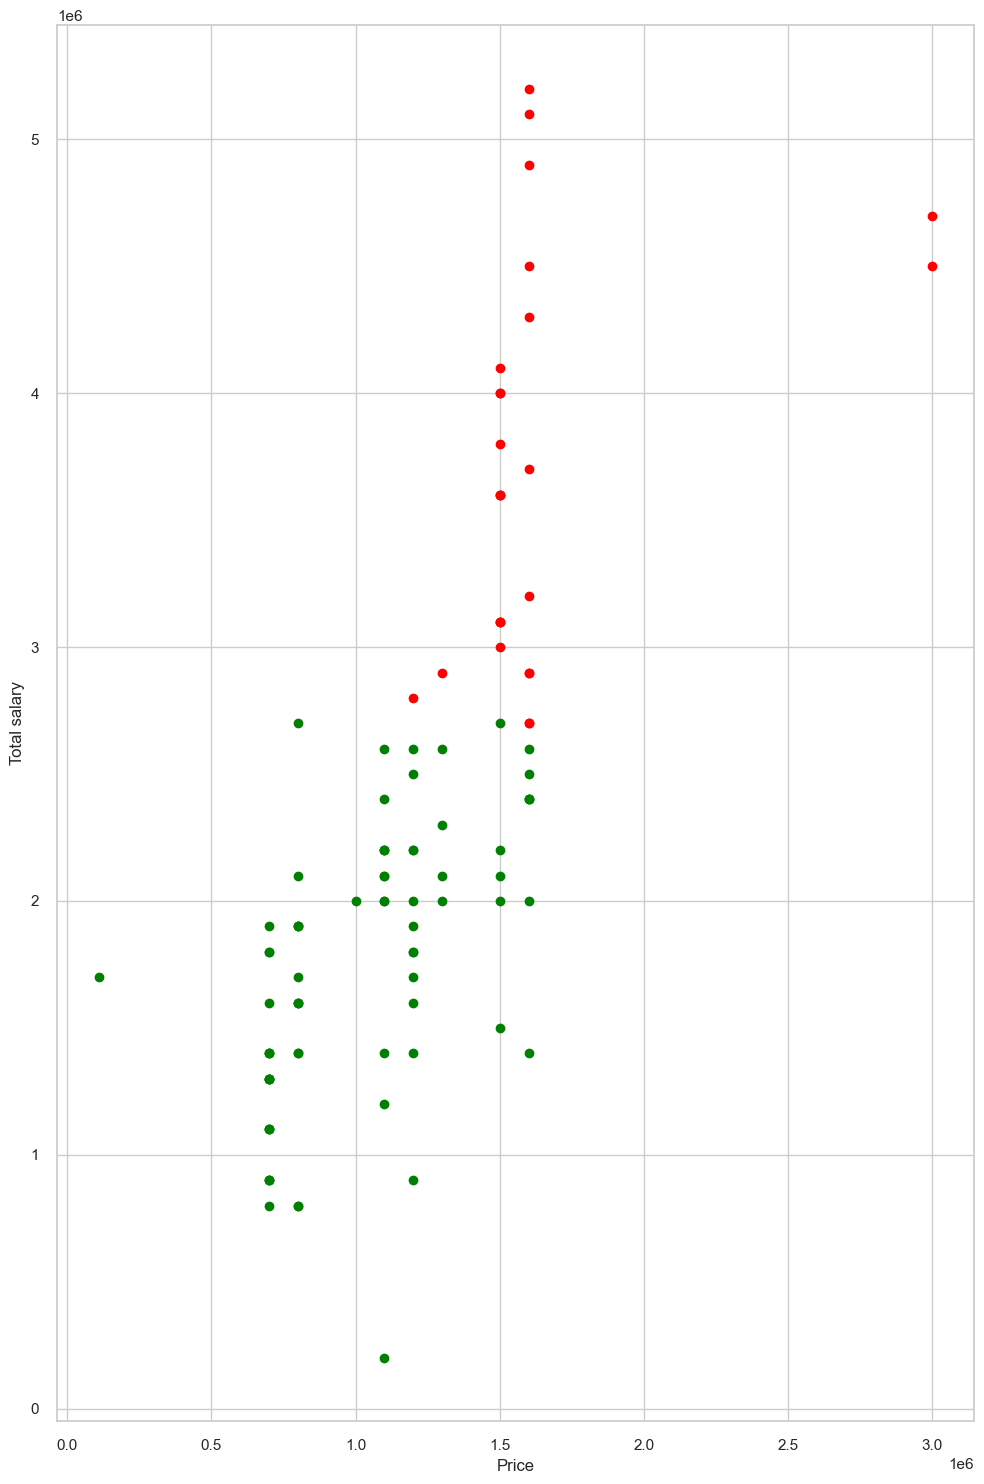

In [956]:
d1 = d[d.clusters==1]
d0 = d[d.clusters==0]
plt.scatter(d1.Price, d1['Total Salary'],color='green')
plt.scatter(d0.Price, d0['Total Salary'],color='red')
plt.xlabel('Price')
plt.ylabel('Total salary')

In [957]:
from sklearn.preprocessing import MinMaxScaler
x = d['Age'].values.reshape(-1, 1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
d['Age']= x_scaled

In [958]:

x = d['Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
d['Salary']= x_scaled

In [959]:

x = d['Wife Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
d['Wife Salary']= x_scaled


x = d['Total Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
d['Total Salary']= x_scaled


x = d['Price'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
d['Price']= x_scaled

In [960]:

d['clusters'] = clustering_kmeans.fit_predict(d) 
d


Age  Profession  Marrital Status  Education  No of Dependents  \
0   0.04           1                1          1                 0   
1   0.36           1                0          1                 2   
2   0.76           0                0          0                 4   
3   0.60           0                0          1                 3   
4   0.20           1                0          1                 2   
..   ...         ...              ...        ...               ...   
94  0.04           0                1          0                 0   
95  0.96           1                0          1                 3   
96  1.00           0                0          0                 2   
97  1.00           1                0          1                 2   
98  1.00           1                0          1                 2   

    Personal loan  House Loan  Wife Working    Salary  Wife Salary  \
0               1           0             0  0.166667     0.000000   
1               1           1             1  0.333333     0.285714   
2               1           1             0  0.444444     0.000000   
3               0           0             1  0.388889     0.285714   
4               1           0             1  0.444444     0.380952   
..            ...         ...           ...       ...          ...   
94              0           0             0  0.611111     0.000000   
95              0           0             1  1.000000     0.619048   
96              1           1             0  0.555556     0.000000   
97              0           0             1  0.694444     0.619048   
98              1           1             0  0.555556     0.000000   

    Total Salary     Price  clusters  
0           0.12  0.238754         1  
1           0.36  0.307958         0  
2           0.32  0.377163         0  
3           0.40  0.377163         0  
4           0.48  0.515571         0  
..           ...       ...       ...  
94          0.44  0.515571         1  
95          0.98  0.515571         0  
96          0.40  0.342561         0  
97          0.76  0.480969         0  
98          0.40  0.342561         0  

[99 rows x 13 columns]

Text(0, 0.5, 'Total salary')

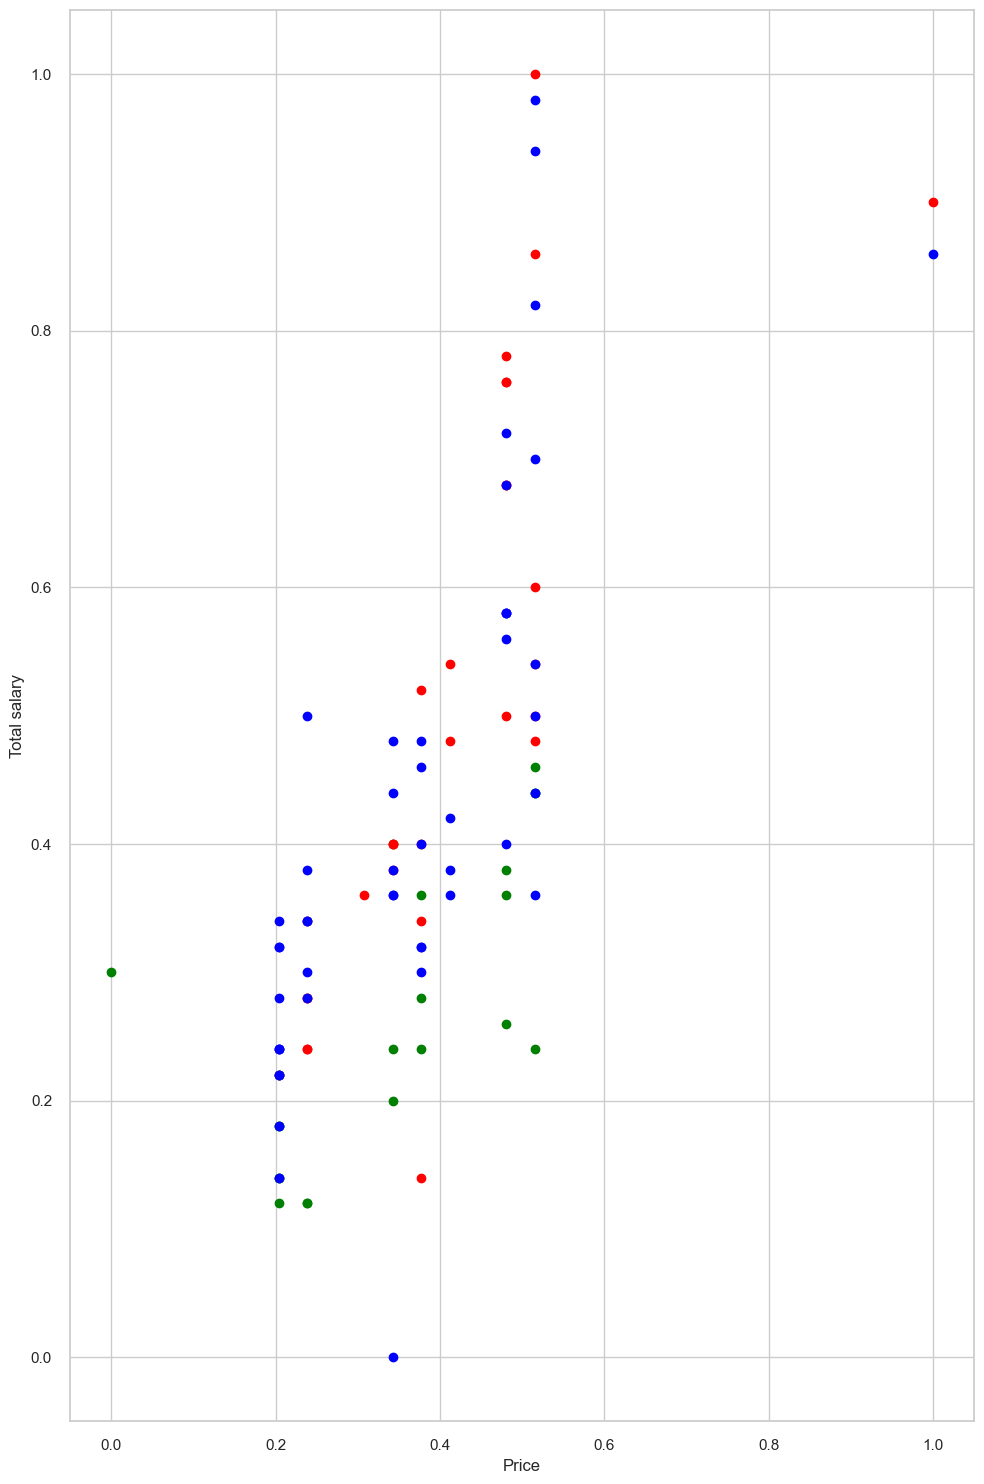

In [961]:

from sklearn.cluster import KMeans
clustering_kmeans = KMeans(n_clusters=3)
d['clusters'] = clustering_kmeans.fit_predict(d) 


d1 = d[d.clusters==1]
d0 = d[d.clusters==0]

d2 = d[d.clusters==2]
#d3 = d[d.clusters==3]
plt.scatter(d1.Price, d1['Total Salary'],color='green')
plt.scatter(d0.Price, d0['Total Salary'],color='red')
plt.scatter(d2.Price, d2['Total Salary'],color='blue')
#plt.scatter(d3.Price, d3['Total Salary'],color='black')
plt.xlabel('Price')
plt.ylabel('Total salary')

In [962]:
clustering_kmeans.cluster_centers_

array([[ 4.73103448e-01,  7.58620690e-01,  6.89655172e-02,
         6.20689655e-01,  2.00000000e+00,  3.10344828e-01,
         5.17241379e-01,  6.20689655e-01,  4.93295019e-01,
         3.53037767e-01,  5.03448276e-01,  4.15344231e-01,
        -8.32667268e-17],
       [ 1.38181818e-01,  6.36363636e-01,  5.90909091e-01,
         5.45454545e-01,  8.88178420e-16,  1.81818182e-01,
        -5.55111512e-17,  4.09090909e-01,  2.89141414e-01,
         1.34199134e-01,  2.64545455e-01,  3.34853728e-01,
         1.00000000e+00],
       [ 5.01666667e-01,  5.83333333e-01,  8.32667268e-17,
         5.41666667e-01,  3.29166667e+00,  3.95833333e-01,
         4.58333333e-01,  5.20833333e-01,  4.49652778e-01,
         2.50000000e-01,  4.28750000e-01,  3.69232987e-01,
         1.66533454e-16]])

In [963]:
k_range = range(1,10)
#sum of squared error
sse = []
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(d)
  sse.append(km.inertia_)

In [964]:
sse

[401.54320048129716,
 221.39016231815552,
 147.74296014452702,
 127.81745145250329,
 116.74334885843938,
 106.33311319299443,
 96.17435704865773,
 89.91233495470813,
 85.95180250349118]

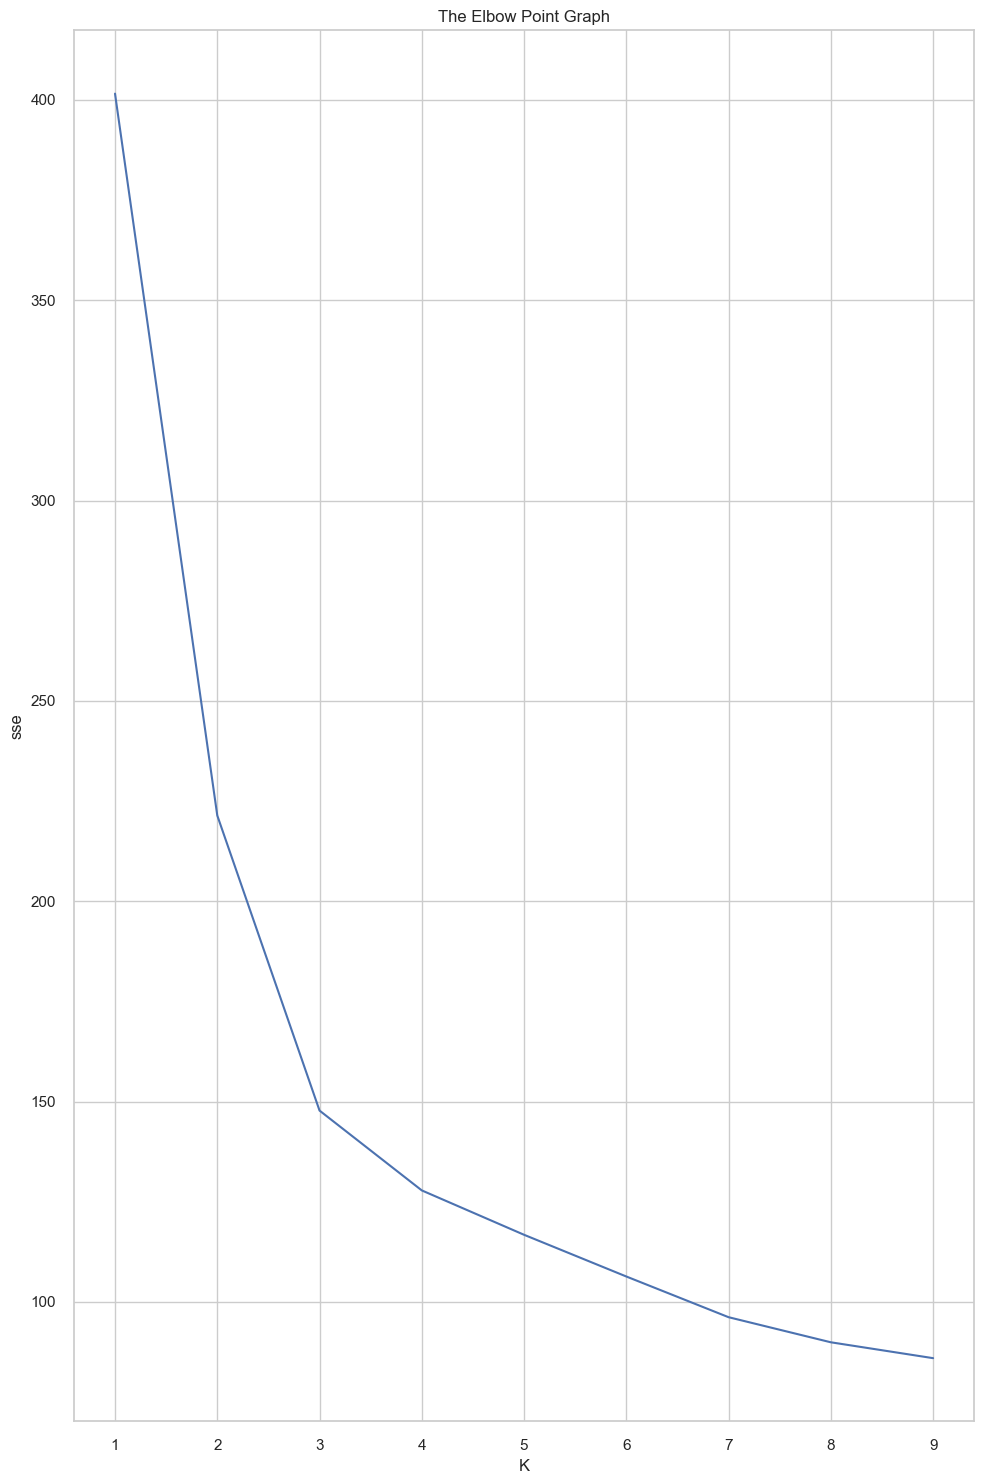

In [965]:
plt.title('The Elbow Point Graph')
plt.xlabel('K')
plt.ylabel('sse')
plt.plot(k_range,sse)

In [966]:
def plotseg(clus,Y, labels):  
  plt.scatter(clus[Y==0,0], clus[Y==0,1], s=10, c='blue', label='Cluster 1')
  plt.scatter(clus[Y==1,0], clus[Y==1,1], s=10, c='red', label='Cluster 2')
  plt.scatter(clus[Y==2,0], clus[Y==2,1], s=10, c='black', label='Cluster 3')

  plt.title('Customer_segments')
  plt.xlabel(labels[0])
  plt.ylabel(labels[1])
  plt.show()

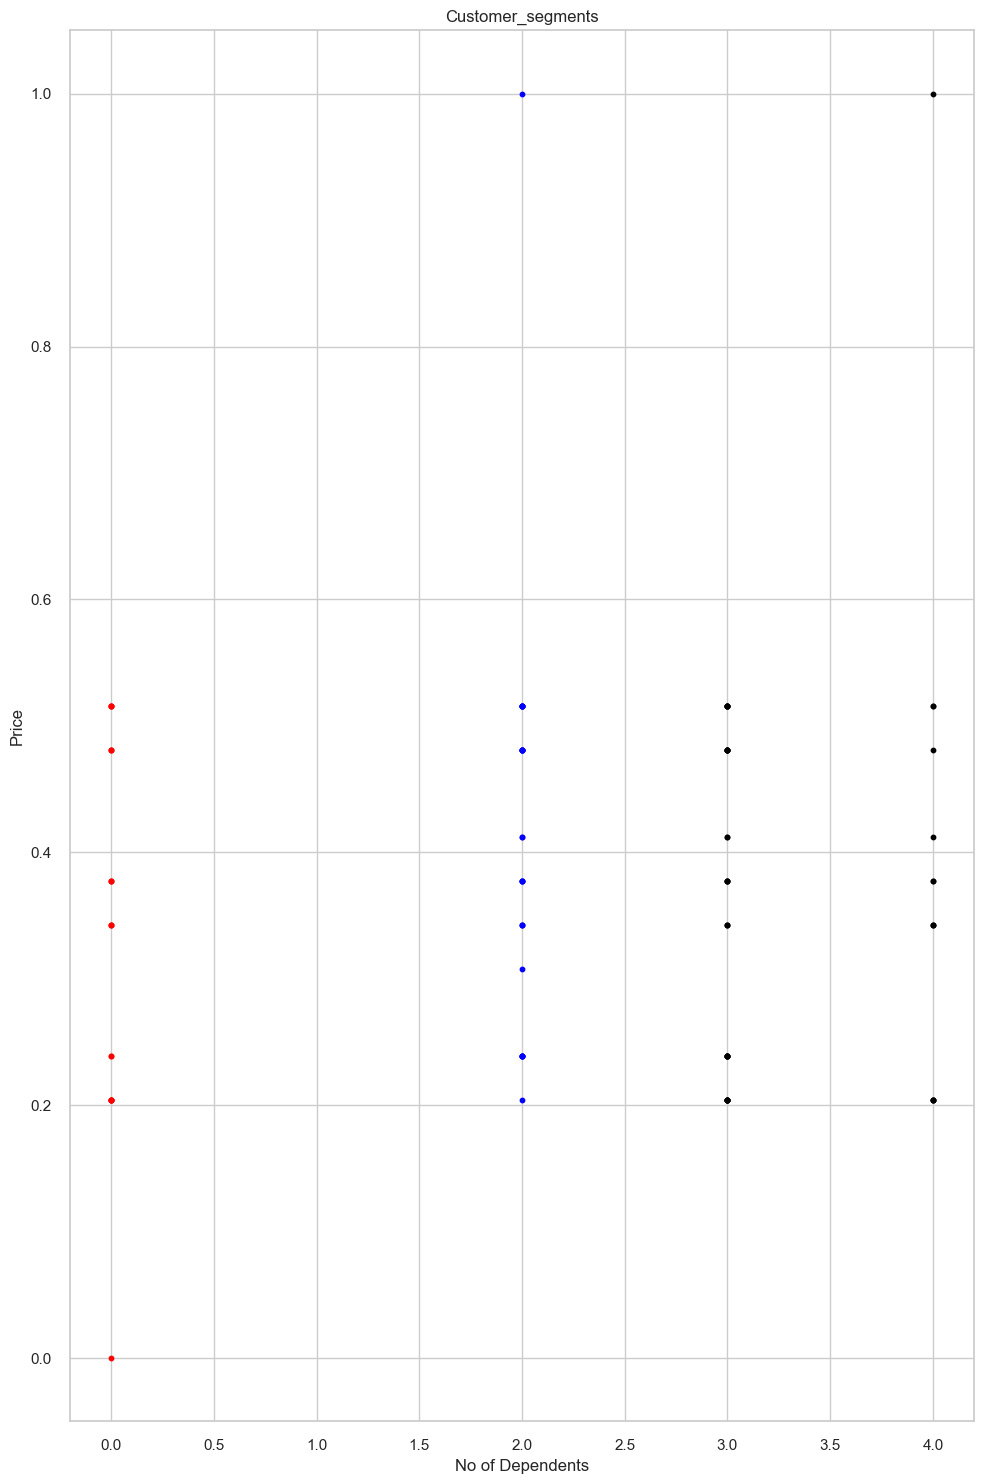

In [967]:
clus = d.loc[:,["No of Dependents","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["No of Dependents","Price"]) 

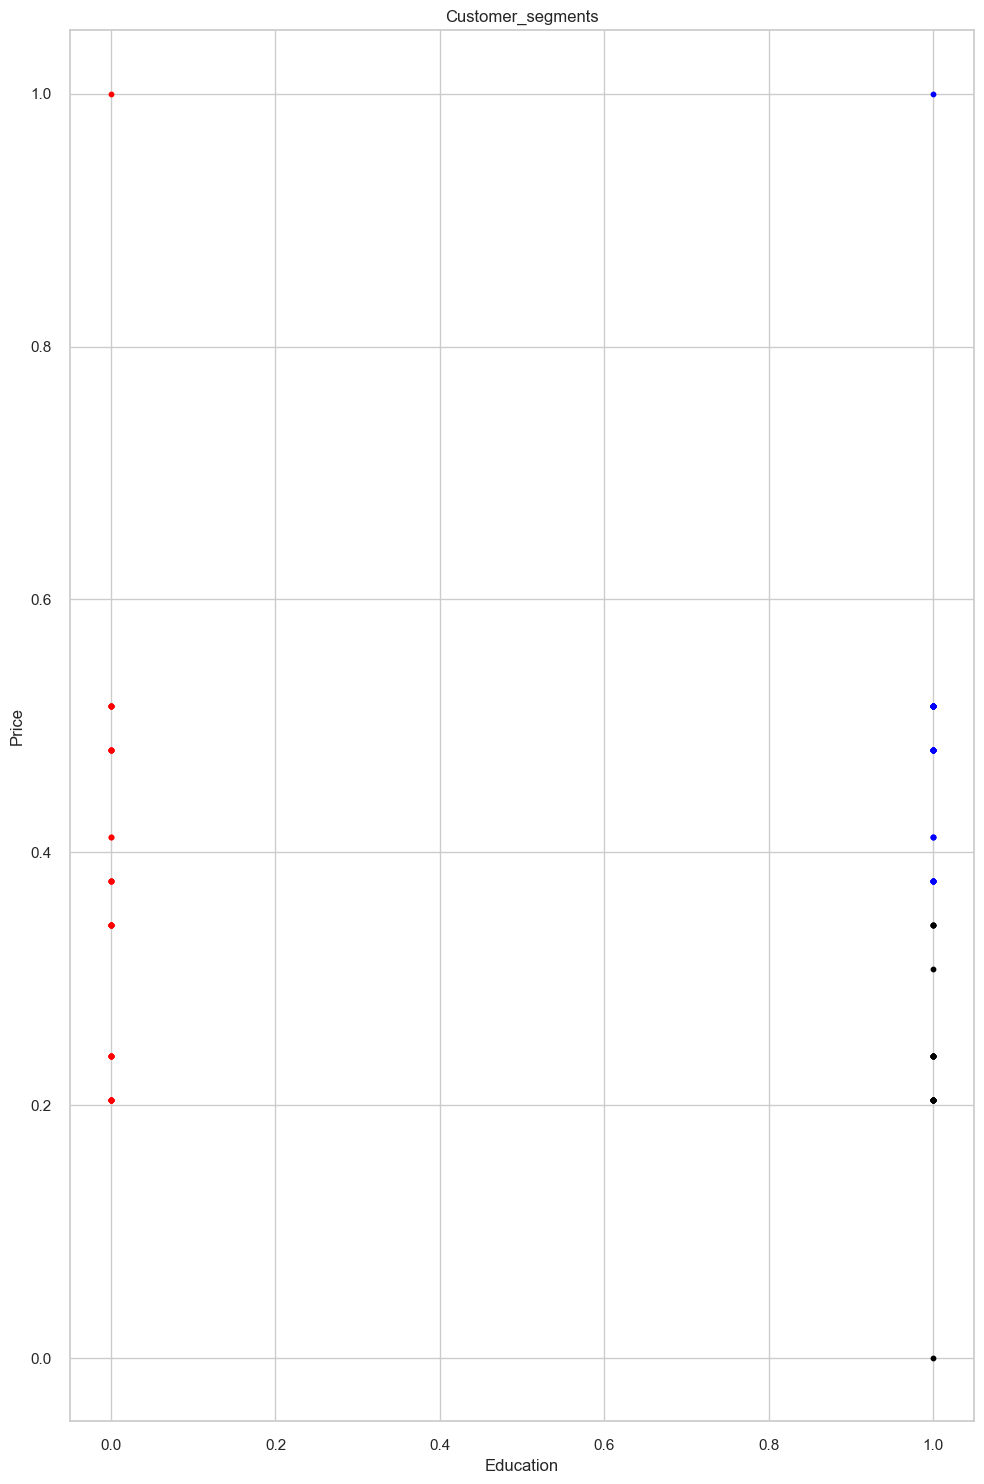

In [968]:

clus = d.loc[:,["Education","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Education","Price"]) 

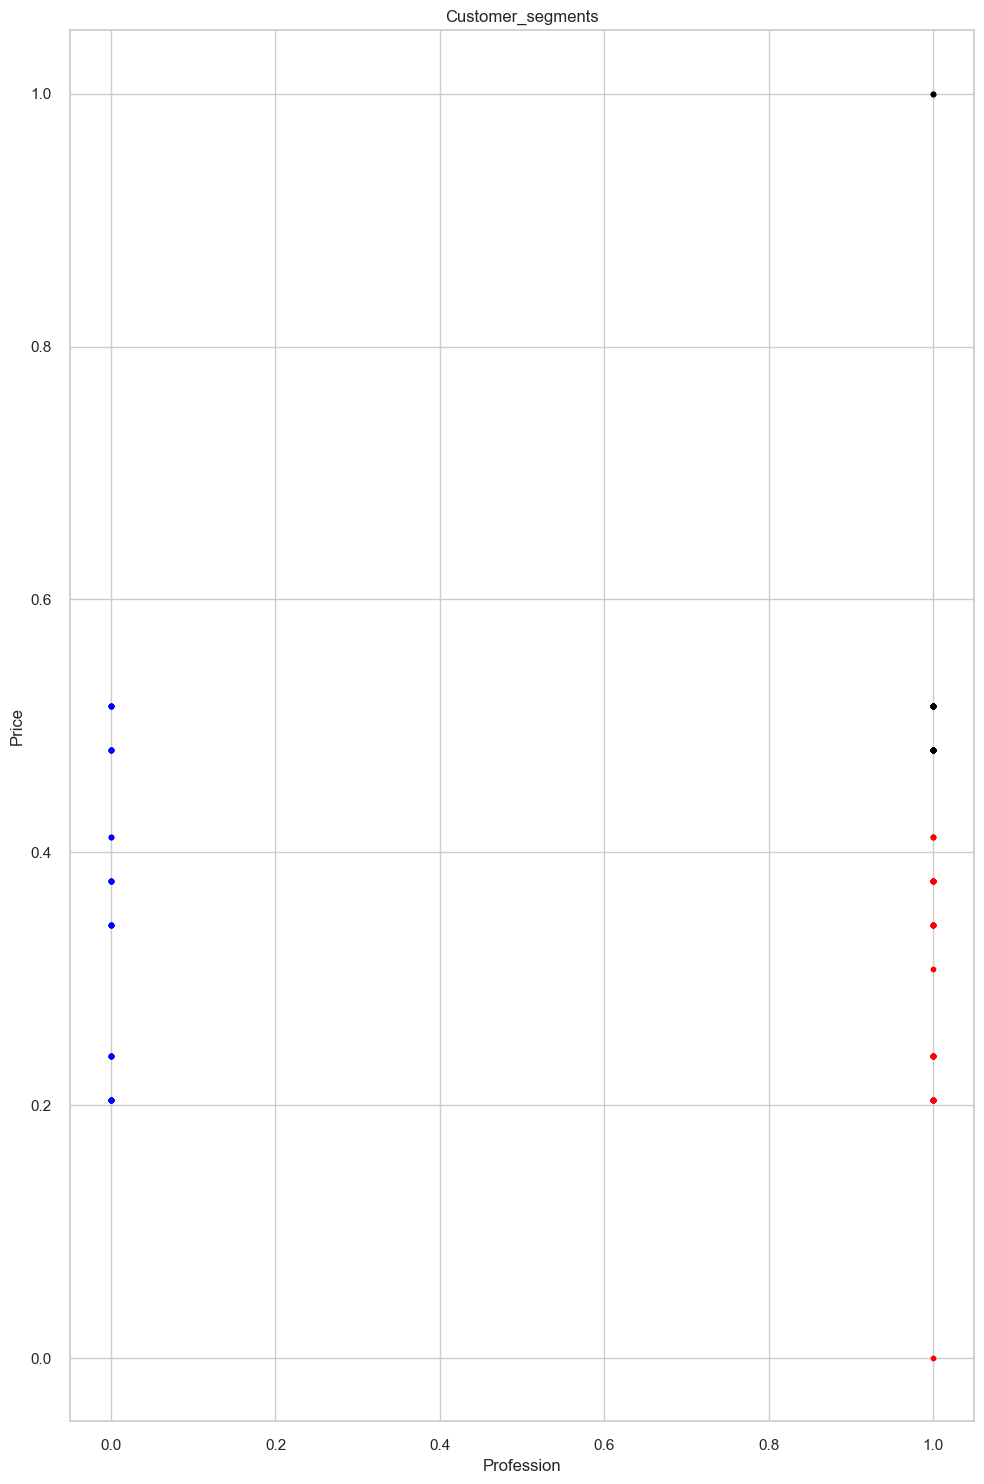

In [969]:

clus = d.loc[:,["Profession","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Profession","Price"]) 

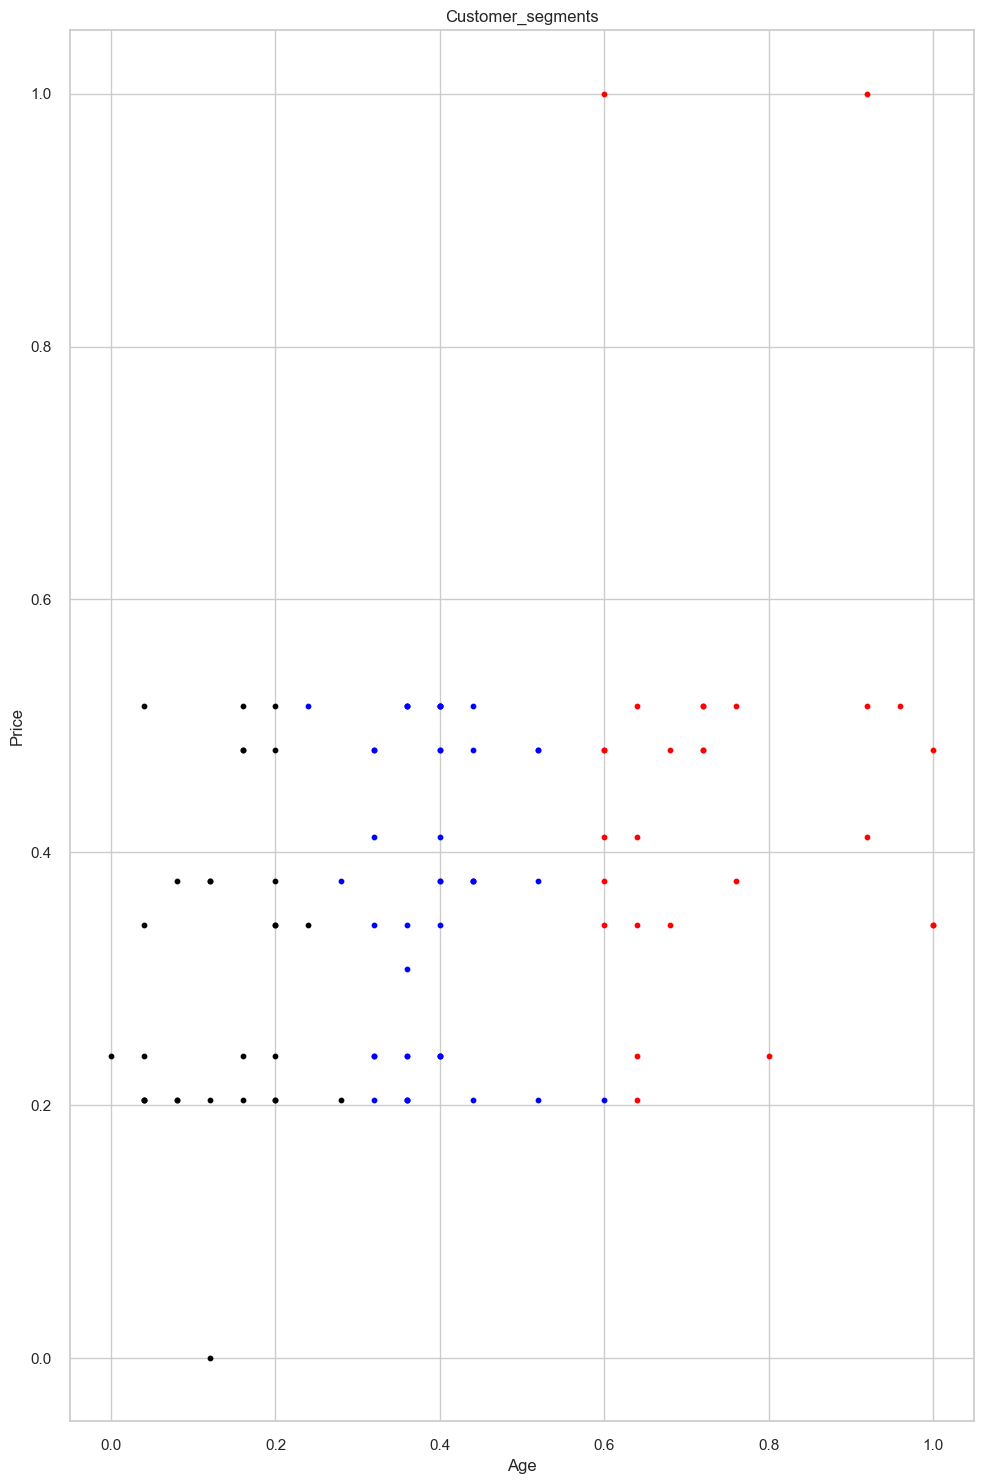

In [970]:

clus = d.loc[:,["Age","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Age","Price"]) 

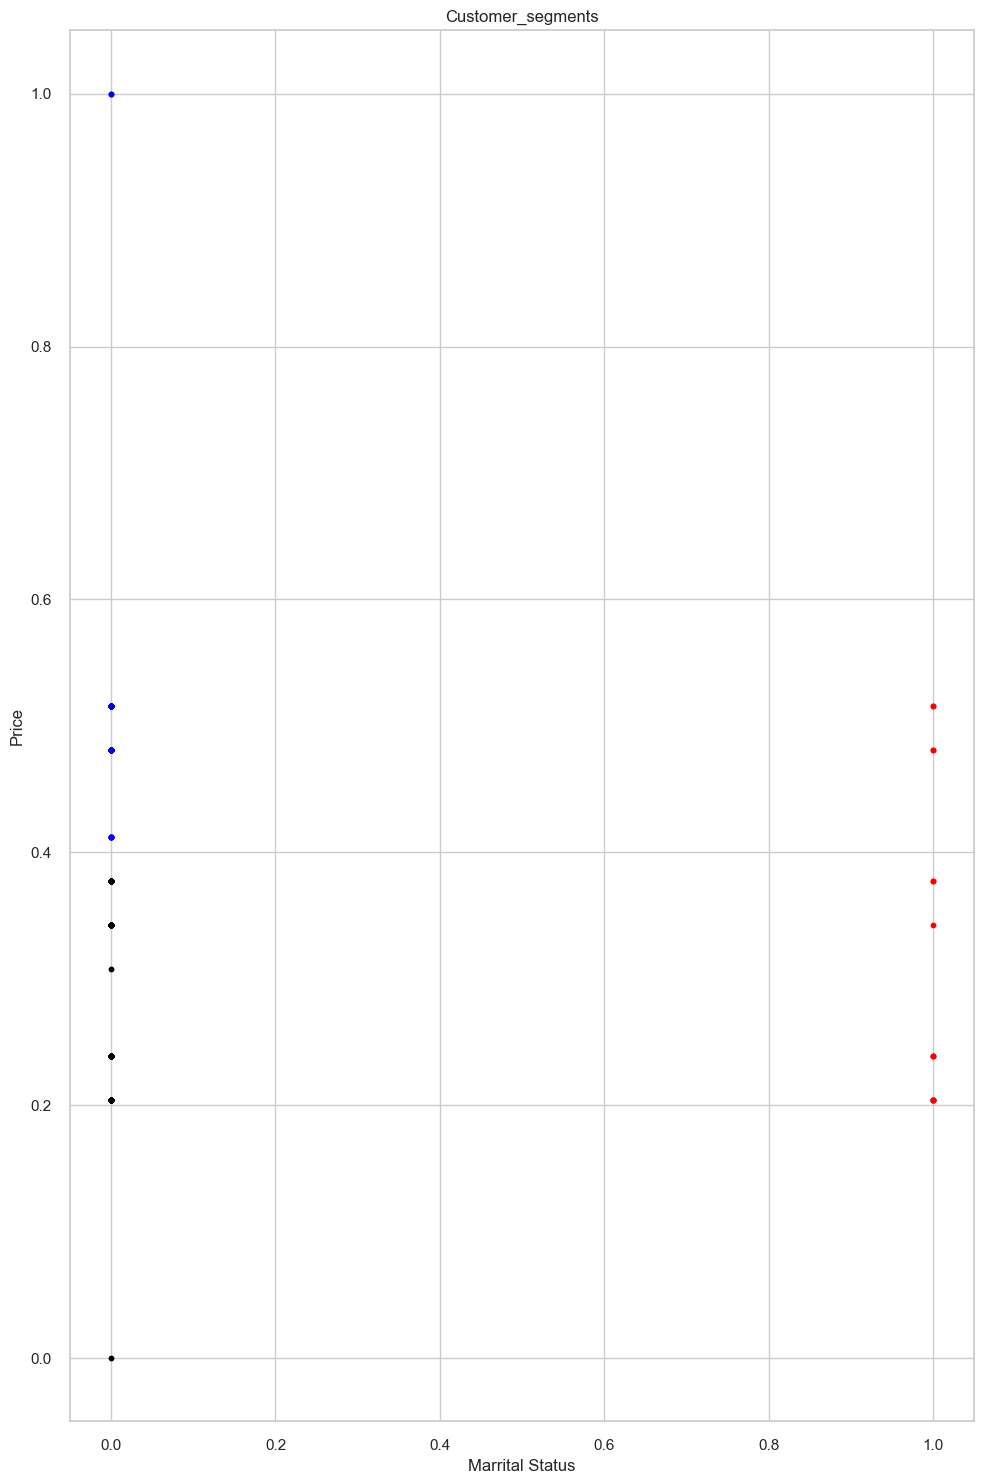

In [971]:
clus = d.loc[:,["Marrital Status", "Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Marrital Status", "Price"]) 

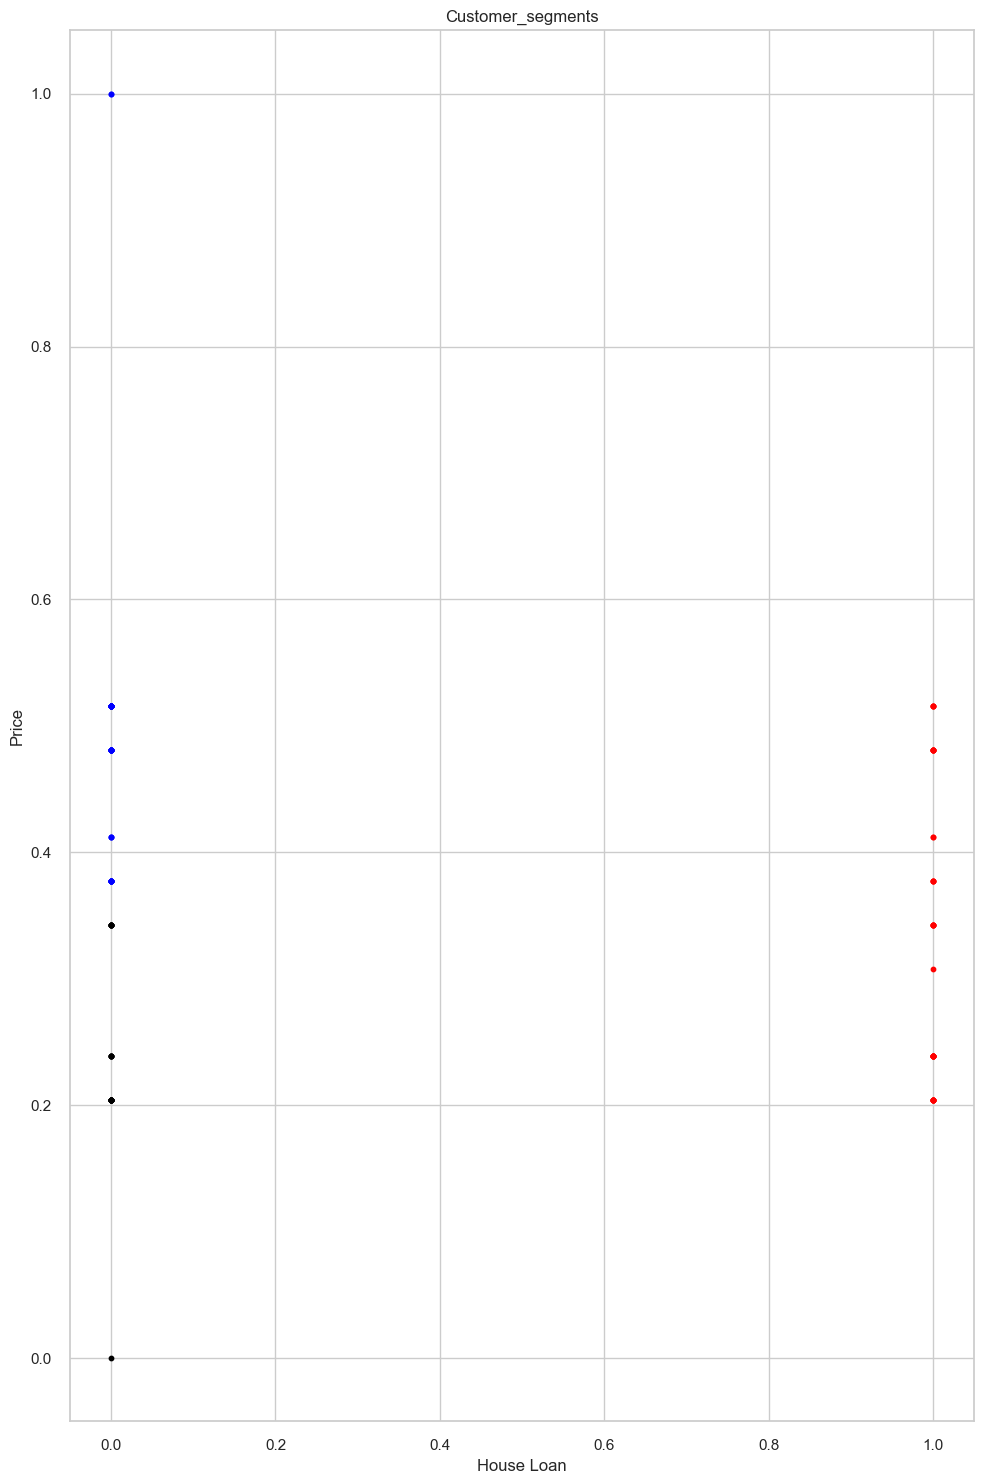

In [972]:
clus = d.loc[:,["House Loan","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["House Loan","Price"]) 

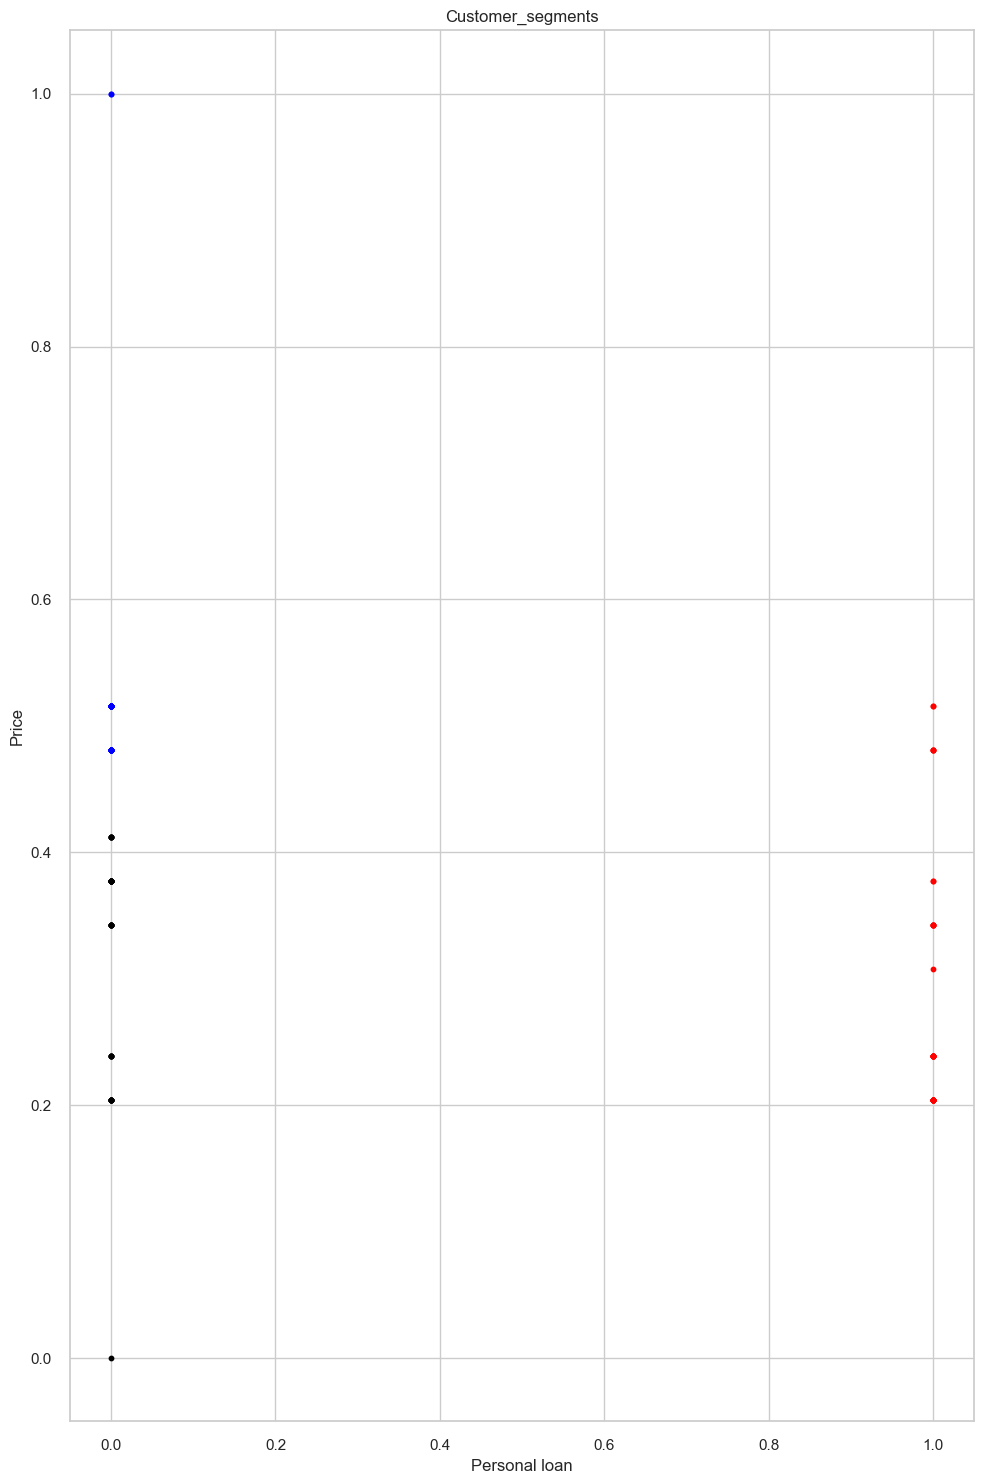

In [973]:
clus = d.loc[:,["Personal loan","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Personal loan","Price"]) 

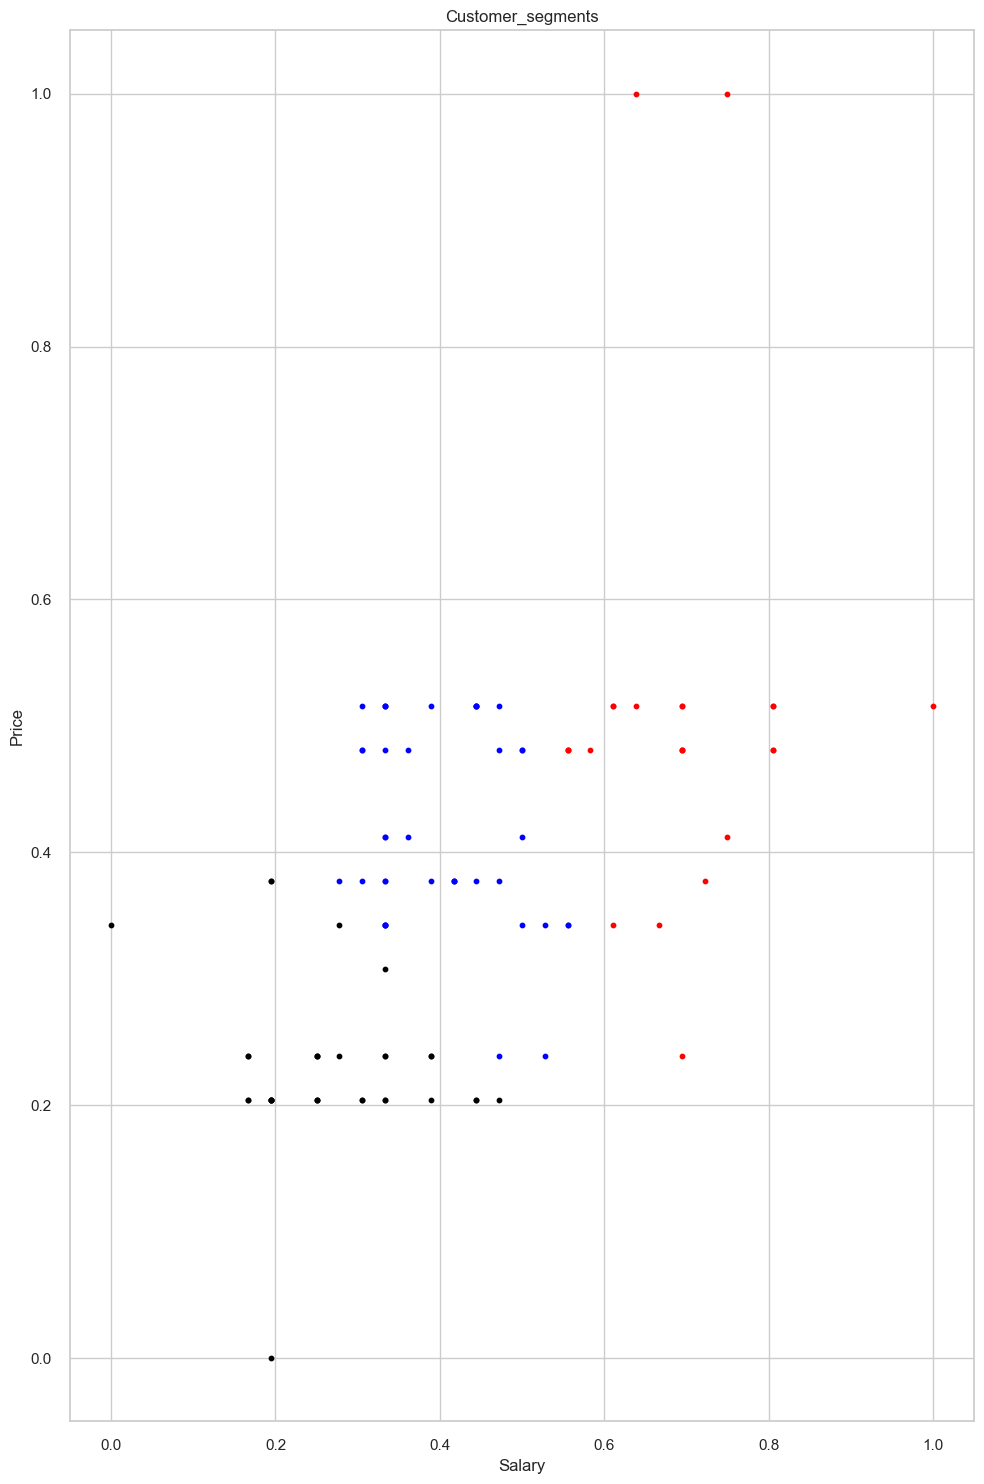

In [974]:
clus = d.loc[:,["Salary","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Salary","Price"]) 

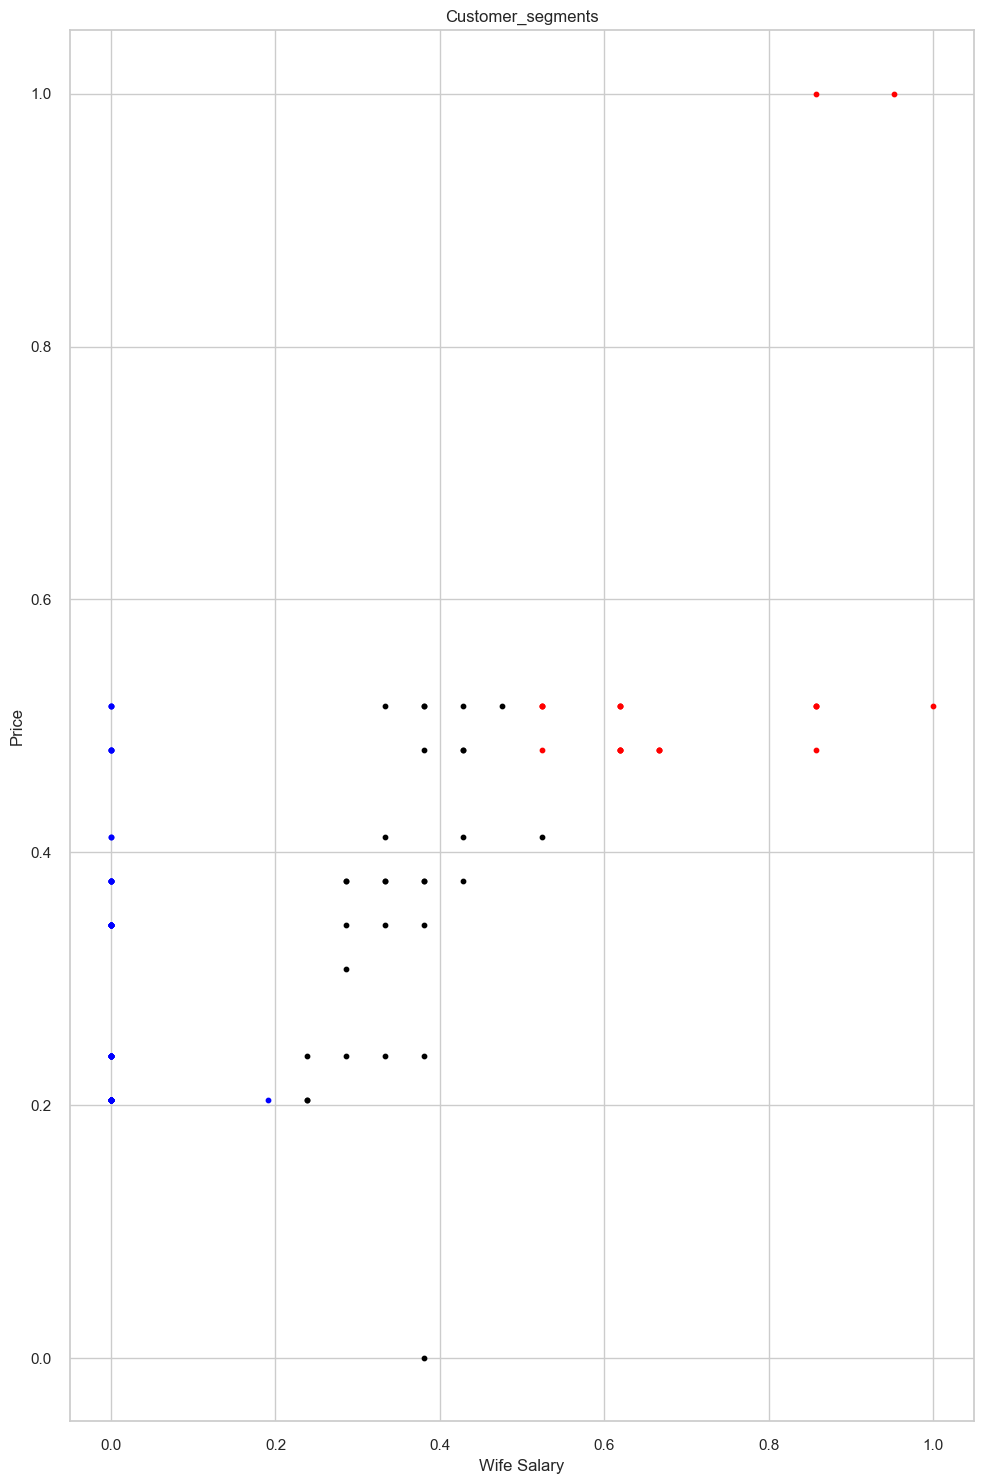

In [975]:
clus = d.loc[:,["Wife Salary","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Wife Salary","Price"]) 

In [976]:
clustering_kmeans = KMeans(n_clusters=3)
d['clusters'] = clustering_kmeans.fit_predict(d) 
d

Age  Profession  Marrital Status  Education  No of Dependents  \
0   0.04           1                1          1                 0   
1   0.36           1                0          1                 2   
2   0.76           0                0          0                 4   
3   0.60           0                0          1                 3   
4   0.20           1                0          1                 2   
..   ...         ...              ...        ...               ...   
94  0.04           0                1          0                 0   
95  0.96           1                0          1                 3   
96  1.00           0                0          0                 2   
97  1.00           1                0          1                 2   
98  1.00           1                0          1                 2   

    Personal loan  House Loan  Wife Working    Salary  Wife Salary  \
0               1           0             0  0.166667     0.000000   
1               1           1             1  0.333333     0.285714   
2               1           1             0  0.444444     0.000000   
3               0           0             1  0.388889     0.285714   
4               1           0             1  0.444444     0.380952   
..            ...         ...           ...       ...          ...   
94              0           0             0  0.611111     0.000000   
95              0           0             1  1.000000     0.619048   
96              1           1             0  0.555556     0.000000   
97              0           0             1  0.694444     0.619048   
98              1           1             0  0.555556     0.000000   

    Total Salary     Price  clusters  
0           0.12  0.238754         1  
1           0.36  0.307958         2  
2           0.32  0.377163         0  
3           0.40  0.377163         0  
4           0.48  0.515571         2  
..           ...       ...       ...  
94          0.44  0.515571         1  
95          0.98  0.515571         0  
96          0.40  0.342561         2  
97          0.76  0.480969         2  
98          0.40  0.342561         2  

[99 rows x 13 columns]

In [978]:
labels = clustering_kmeans.labels_
labels

array([1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2,
       2, 0, 2, 0, 2, 1, 1, 0, 2, 2, 2], dtype=int32)

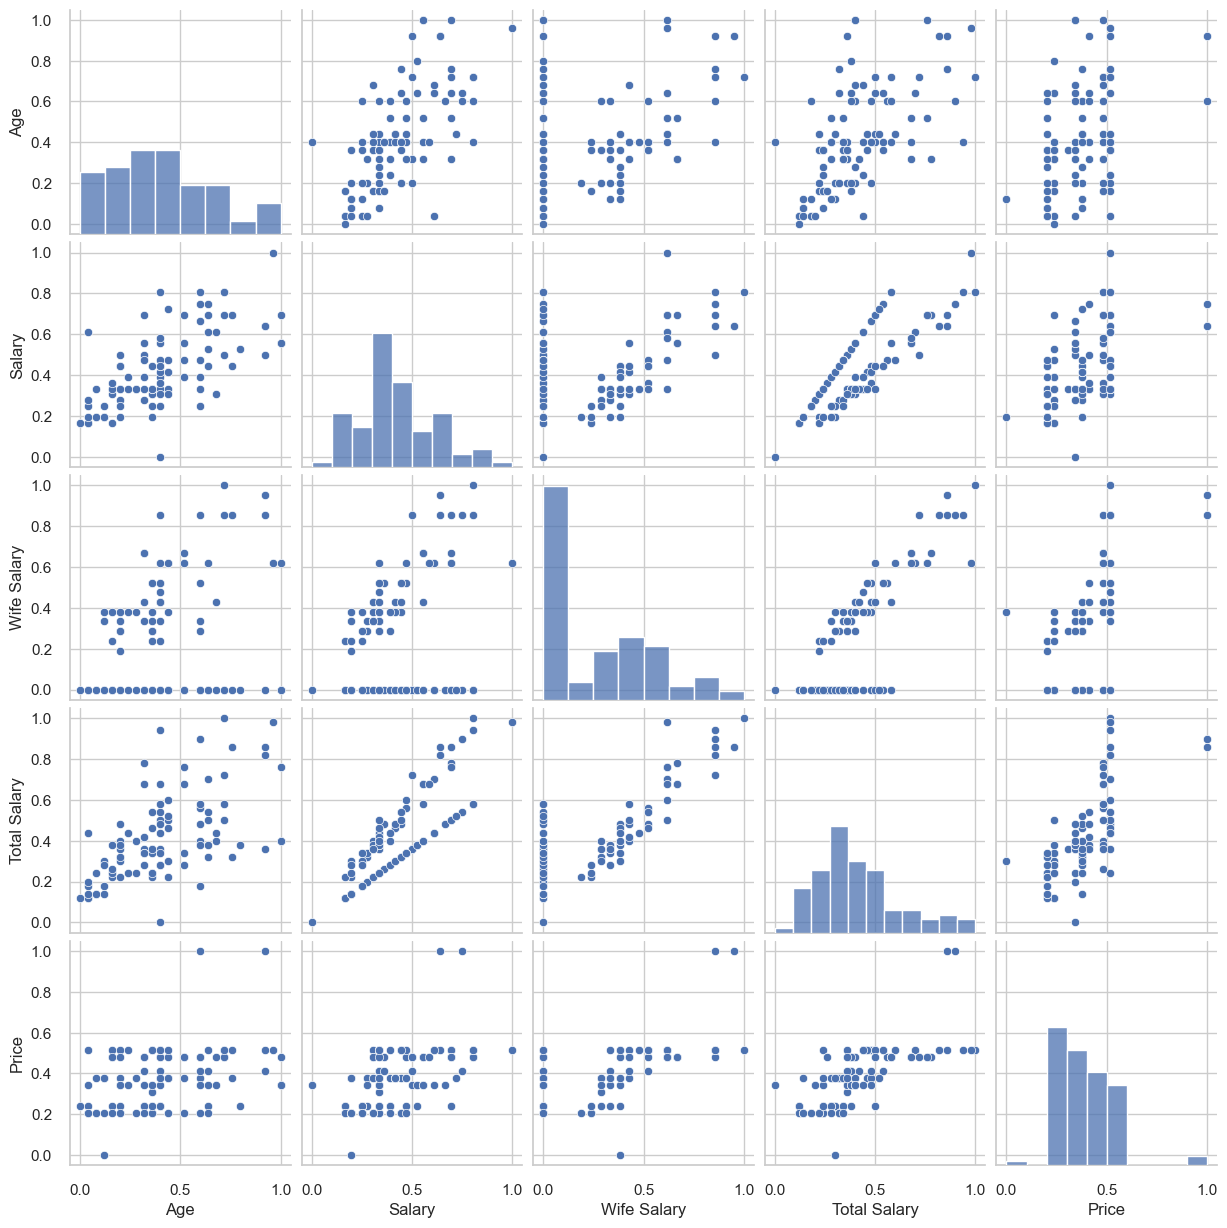

In [979]:
sns.pairplot(d,x_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], y_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'])

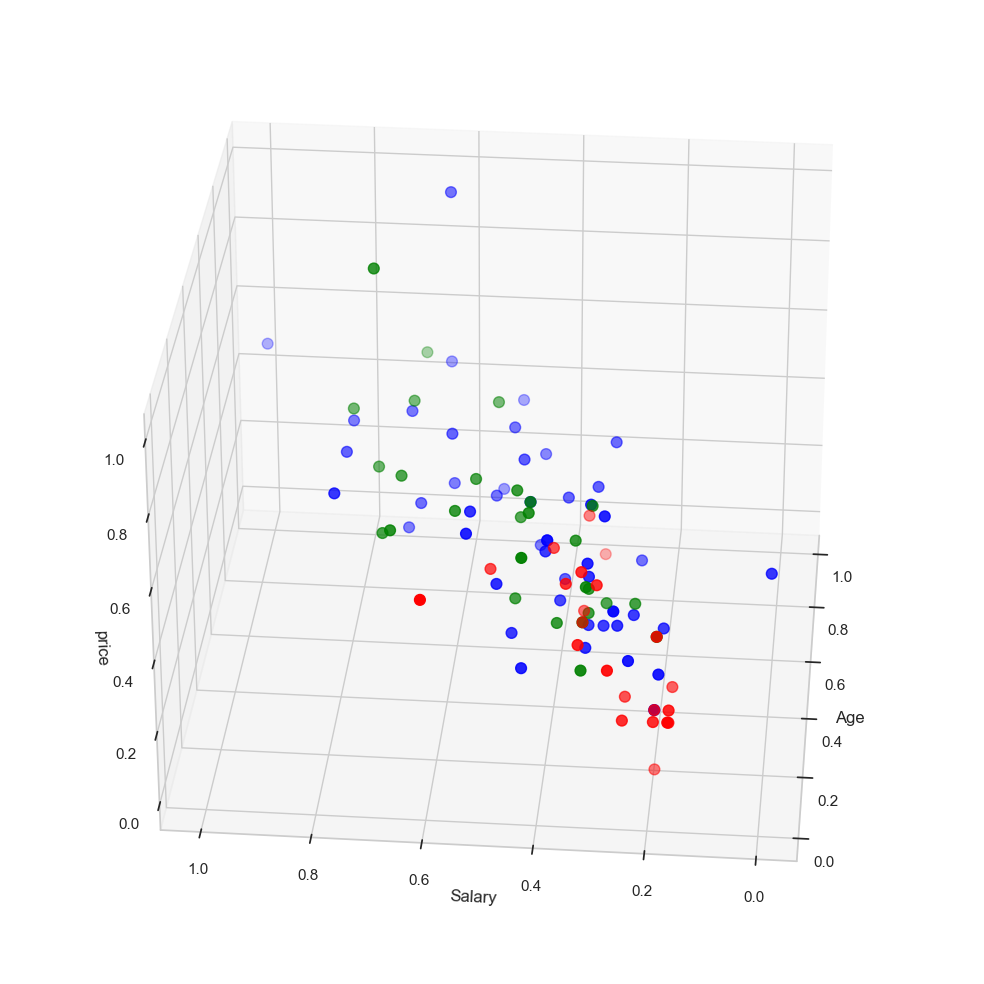

In [980]:

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(d.Age[labels == 0], d["Salary"][labels == 0], d["Price"][labels == 0],  c='blue', s=60)
ax.scatter(d.Age[labels == 1], d["Salary"][labels == 1], d["Price"][labels == 1],  c='red', s=60)
ax.scatter(d.Age[labels == 2], d["Salary"][labels == 2], d["Price"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Salary")
ax.set_zlabel('price')
plt.show()

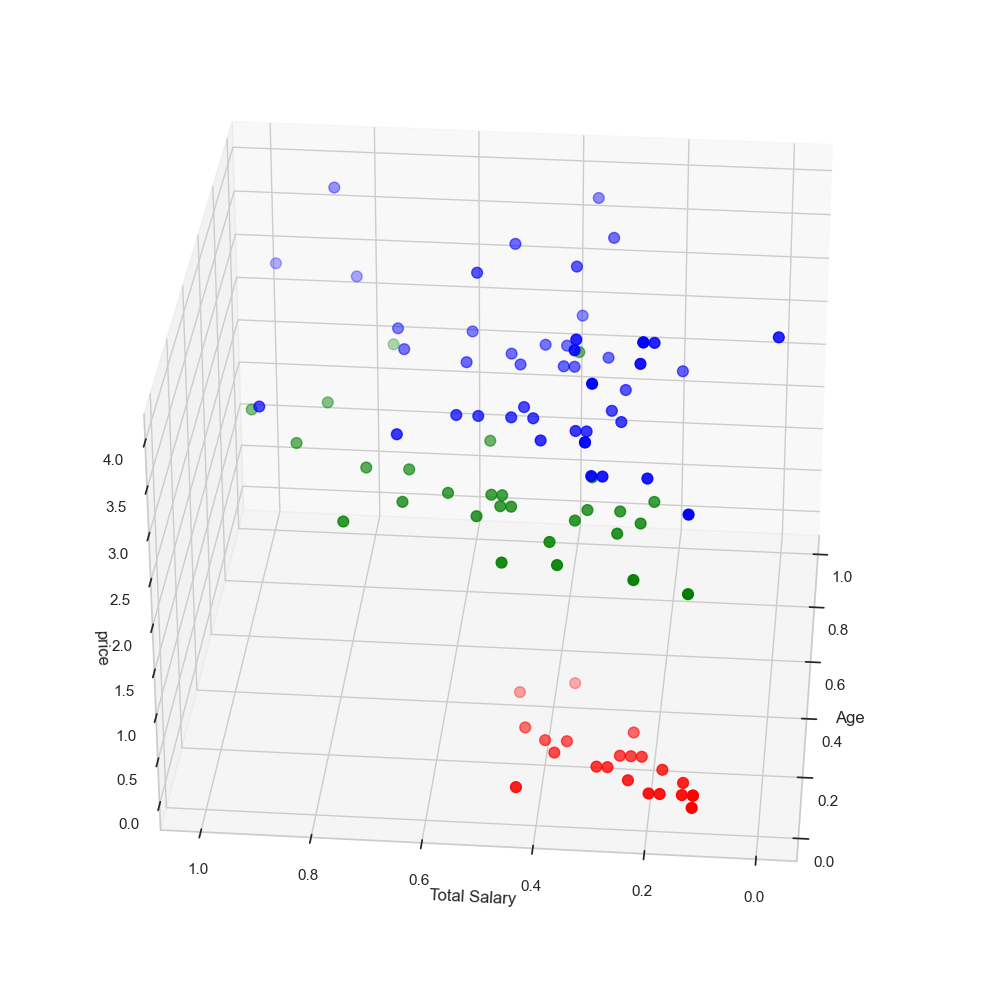

In [981]:

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(d.Age[labels == 0], d["Total Salary"][labels == 0], d["No of Dependents"][labels == 0],  c='blue', s=60)
ax.scatter(d.Age[labels == 1], d["Total Salary"][labels == 1], d["No of Dependents"][labels == 1],  c='red', s=60)
ax.scatter(d.Age[labels == 2], d["Total Salary"][labels == 2], d["No of Dependents"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Total Salary")
ax.set_zlabel('price')
plt.show()

In [983]:
feature = list(data_car.columns)
dc = data_car[feature] 
dc

Age  Profession  Marrital Status  Education  No of Dependents  \
0    27           1                1          1                 0   
1    35           1                0          1                 2   
2    45           0                0          0                 4   
3    41           0                0          1                 3   
4    31           1                0          1                 2   
..  ...         ...              ...        ...               ...   
94   27           0                1          0                 0   
95   50           1                0          1                 3   
96   51           0                0          0                 2   
97   51           1                0          1                 2   
98   51           1                0          1                 2   

    Personal loan  House Loan  Wife Working   Salary  Wife Salary  \
0               1           0             0   800000            0   
1               1           1             1  1400000       600000   
2               1           1             0  1800000            0   
3               0           0             1  1600000       600000   
4               1           0             1  1800000       800000   
..            ...         ...           ...      ...          ...   
94              0           0             0  2400000            0   
95              0           0             1  3800000      1300000   
96              1           1             0  2200000            0   
97              0           0             1  2700000      1300000   
98              1           1             0  2200000            0   

    Total Salary  Make  
0         800000     8  
1        2000000     1  
2        1800000     4  
3        2200000     2  
4        2600000     6  
..           ...   ...  
94       2400000     6  
95       5100000     6  
96       2200000     1  
97       4000000     3  
98       2200000     1  

[99 rows x 12 columns]

In [984]:

x = dc['Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
dc['Salary']= x_scaled


x = dc['Age'].values.reshape(-1, 1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
dc['Age']= x_scaled


x = dc['Wife Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
dc['Wife Salary']= x_scaled


x = dc['Total Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
dc['Total Salary']= x_scaled




In [985]:
dc

Age  Profession  Marrital Status  Education  No of Dependents  \
0   0.04           1                1          1                 0   
1   0.36           1                0          1                 2   
2   0.76           0                0          0                 4   
3   0.60           0                0          1                 3   
4   0.20           1                0          1                 2   
..   ...         ...              ...        ...               ...   
94  0.04           0                1          0                 0   
95  0.96           1                0          1                 3   
96  1.00           0                0          0                 2   
97  1.00           1                0          1                 2   
98  1.00           1                0          1                 2   

    Personal loan  House Loan  Wife Working    Salary  Wife Salary  \
0               1           0             0  0.166667     0.000000   
1               1           1             1  0.333333     0.285714   
2               1           1             0  0.444444     0.000000   
3               0           0             1  0.388889     0.285714   
4               1           0             1  0.444444     0.380952   
..            ...         ...           ...       ...          ...   
94              0           0             0  0.611111     0.000000   
95              0           0             1  1.000000     0.619048   
96              1           1             0  0.555556     0.000000   
97              0           0             1  0.694444     0.619048   
98              1           1             0  0.555556     0.000000   

    Total Salary  Make  
0           0.12     8  
1           0.36     1  
2           0.32     4  
3           0.40     2  
4           0.48     6  
..           ...   ...  
94          0.44     6  
95          0.98     6  
96          0.40     1  
97          0.76     3  
98          0.40     1  

[99 rows x 12 columns]

In [987]:
k_range1 = range(1,10)
#sum of squared error
ssec = []
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(dc)
  ssec.append(km.inertia_)
ssec

[1076.5680399367827,
 480.4043865992121,
 375.11050315331784,
 288.1278894579031,
 245.21492386279502,
 202.73577880733686,
 187.63776531014386,
 174.79704704659588,
 164.8068309364278]

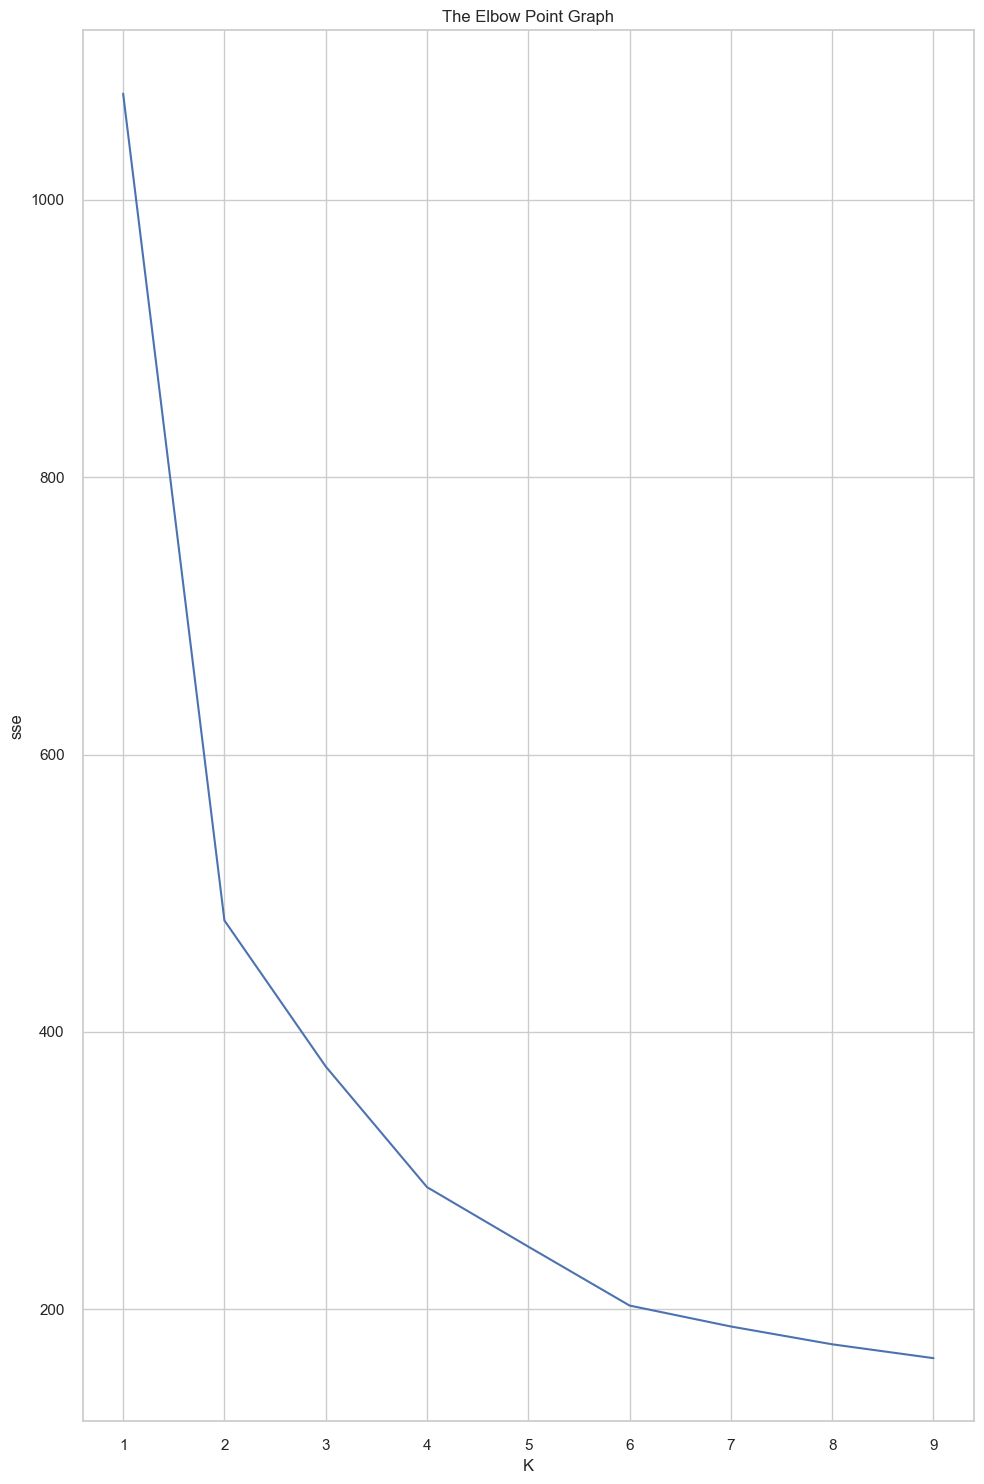

In [988]:
plt.title('The Elbow Point Graph')
plt.xlabel('K')
plt.ylabel('sse')
plt.plot(k_range1,ssec)

In [989]:
def plotsegm(clus,Y, labels):  
  plt.scatter(clus[Y==0,0], clus[Y==0,1], s=10, c='blue', label='Cluster 1')
  plt.scatter(clus[Y==1,0], clus[Y==1,1], s=10, c='red', label='Cluster 2')
  

  plt.title('Customer_segments')
  plt.xlabel(labels[0])
  plt.ylabel(labels[1])
  plt.show()

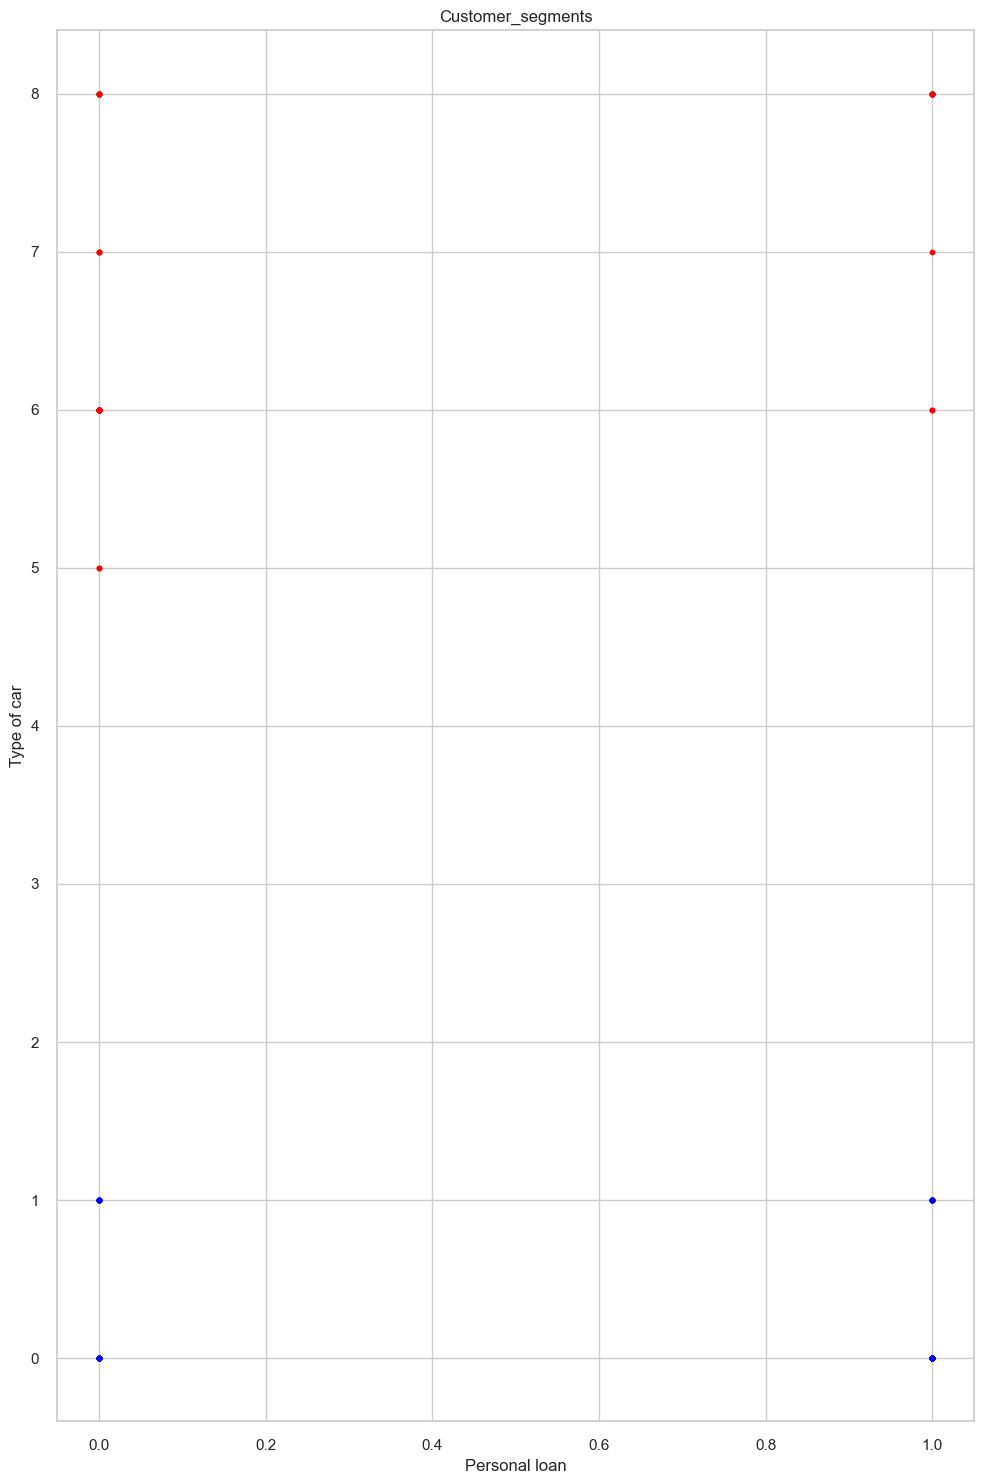

In [990]:
clus = dc.loc[:,["Personal loan","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["Personal loan","Type of car"])

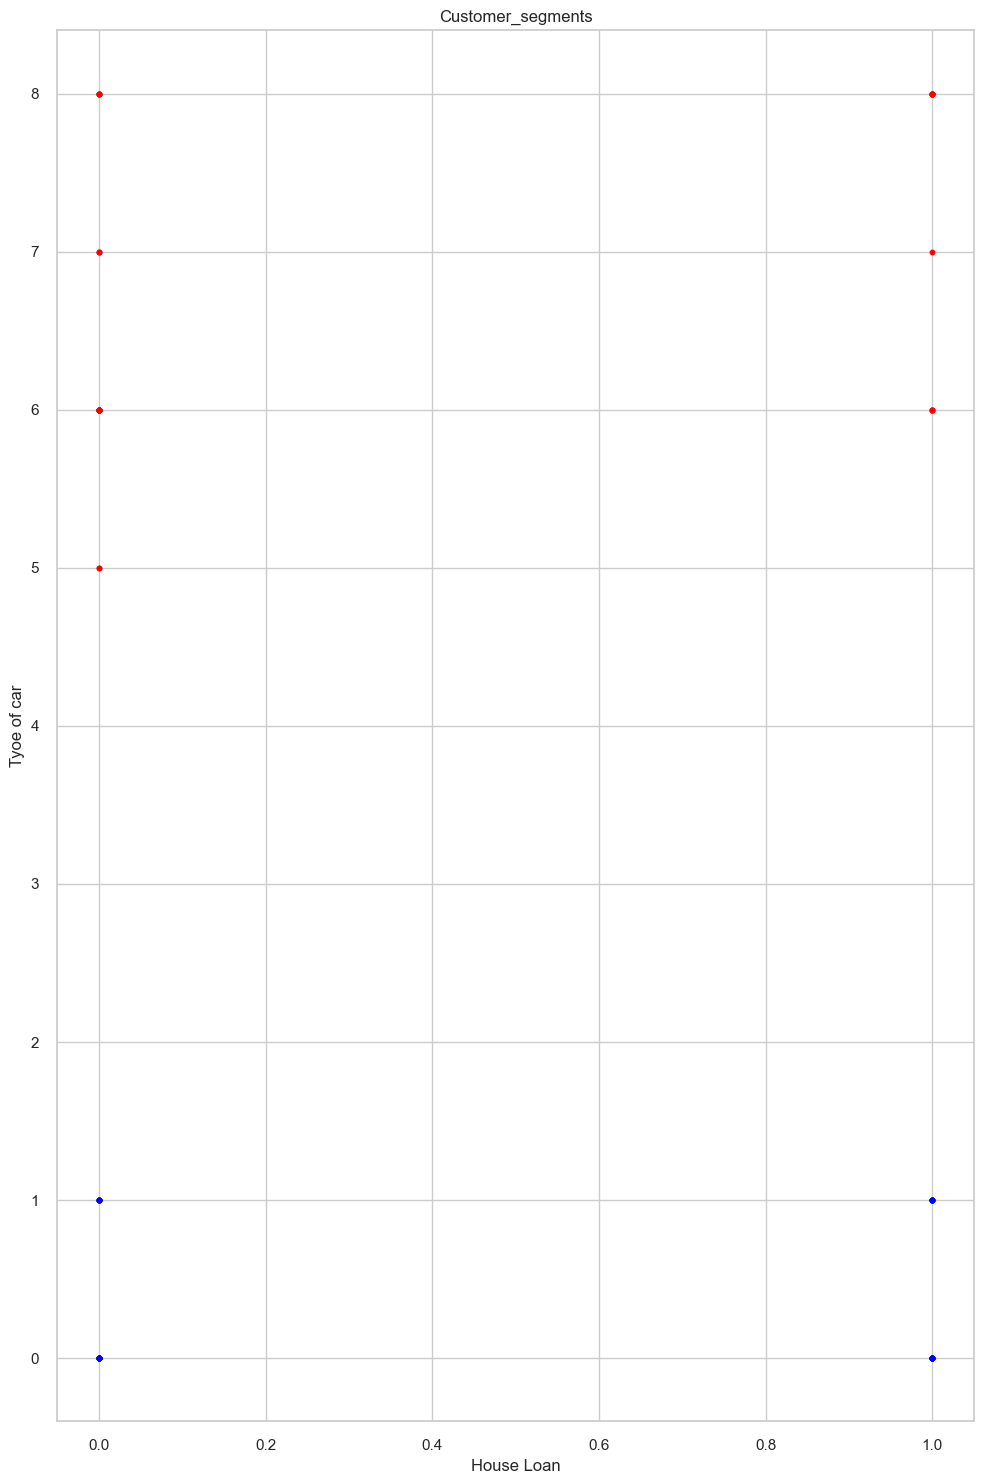

In [991]:
clus = dc.loc[:,["House Loan","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["House Loan","Tyoe of car"])

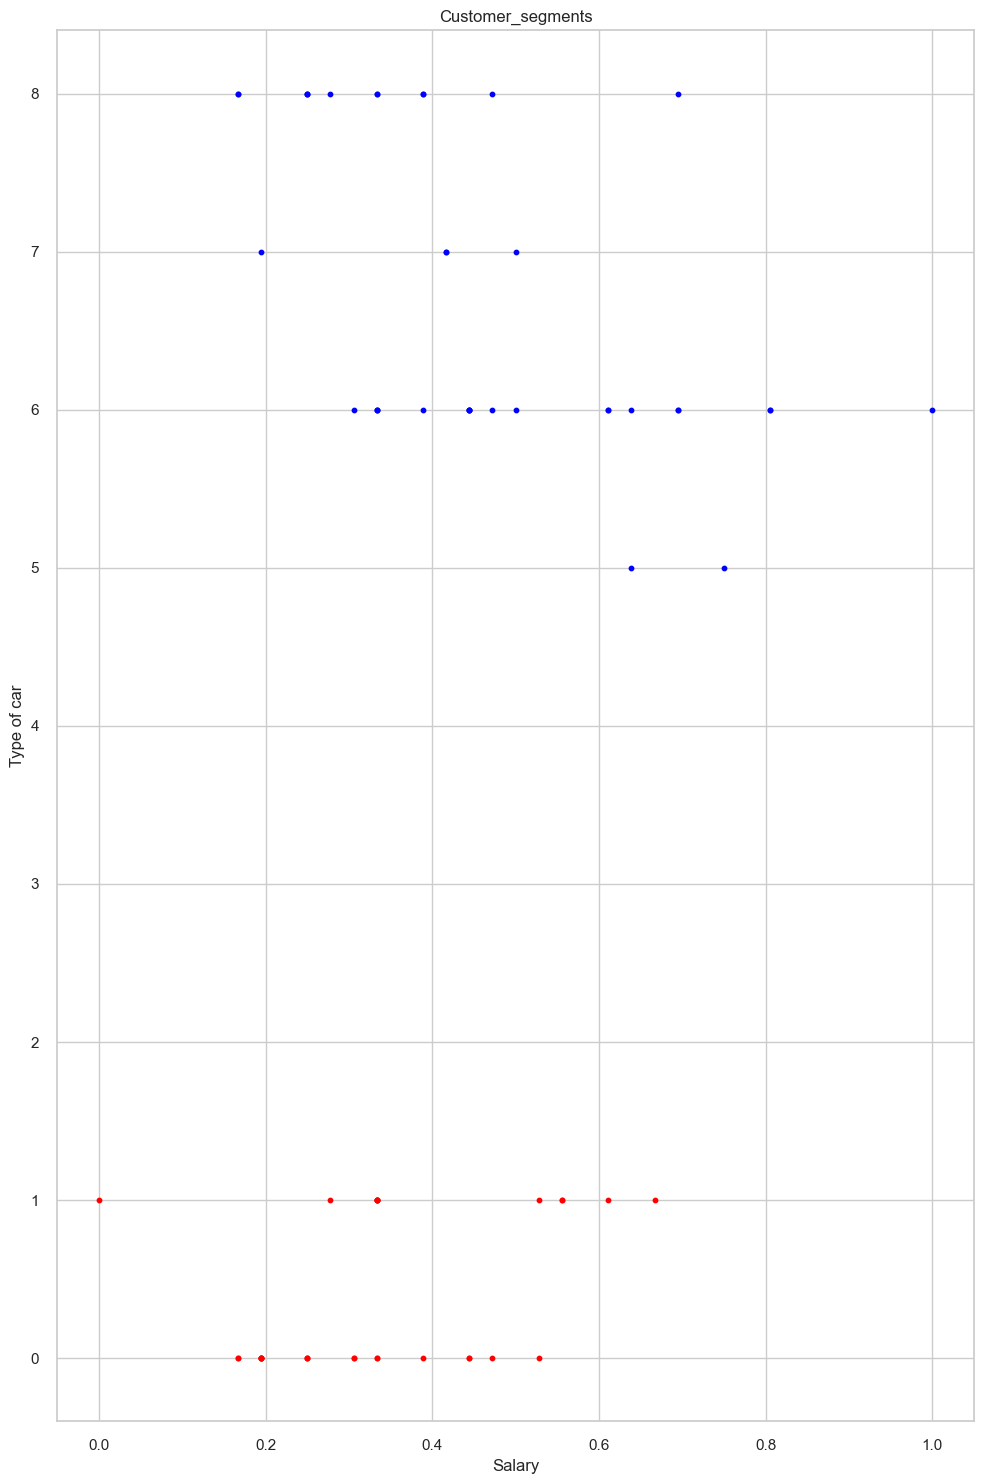

In [992]:
clus = dc.loc[:,["Salary","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["Salary","Type of car"])

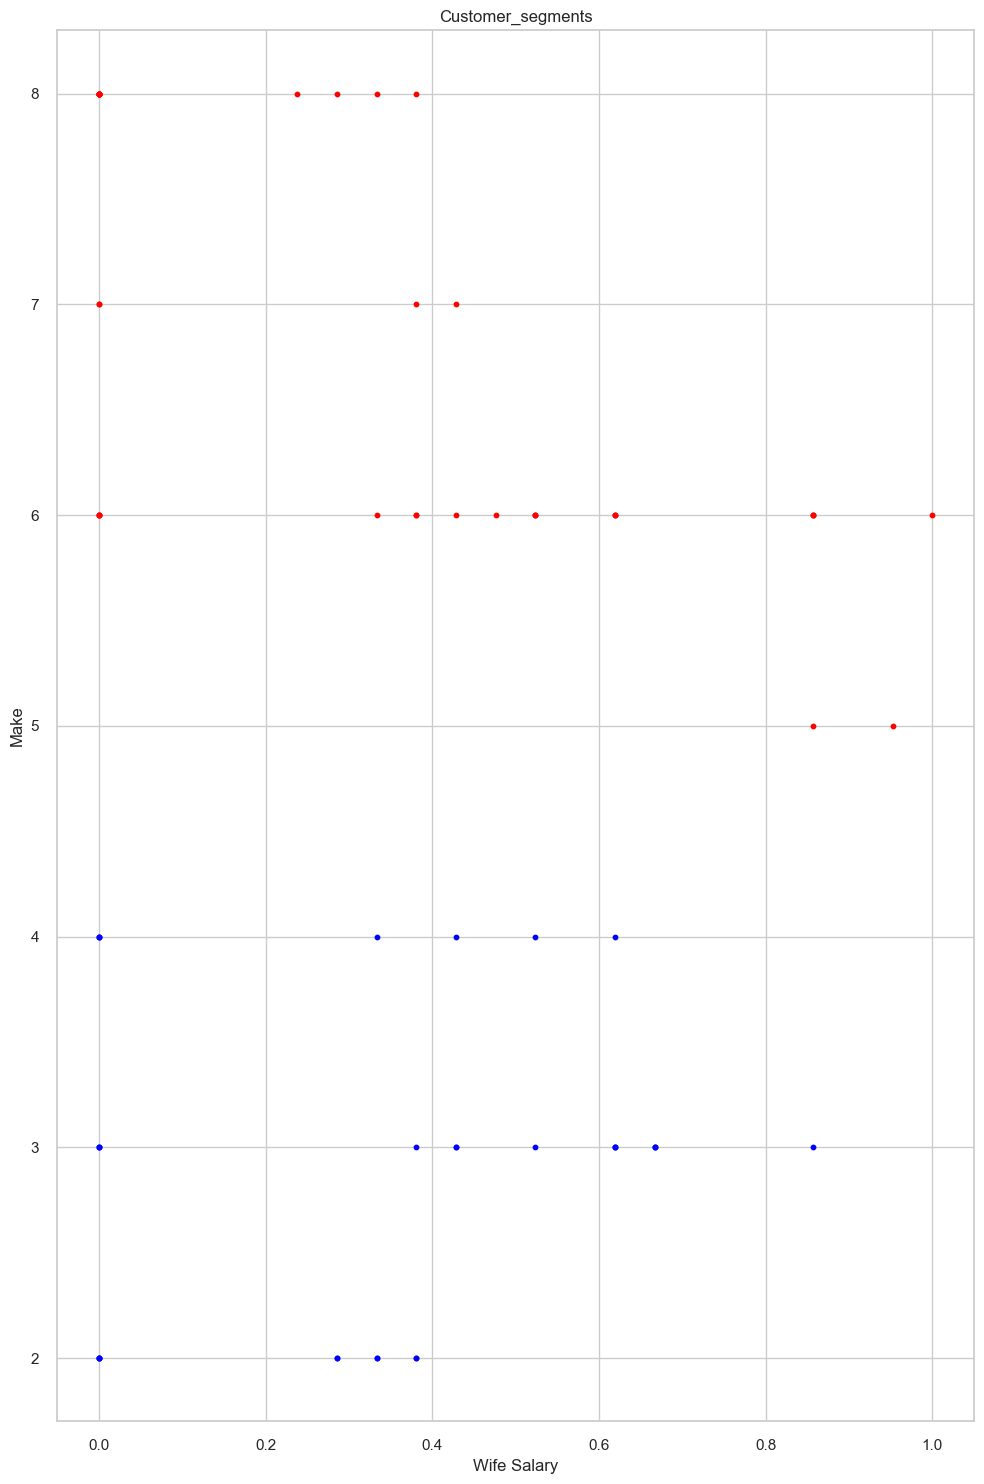

In [993]:
clus = dc.loc[:,["Wife Salary","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["Wife Salary","Make"])

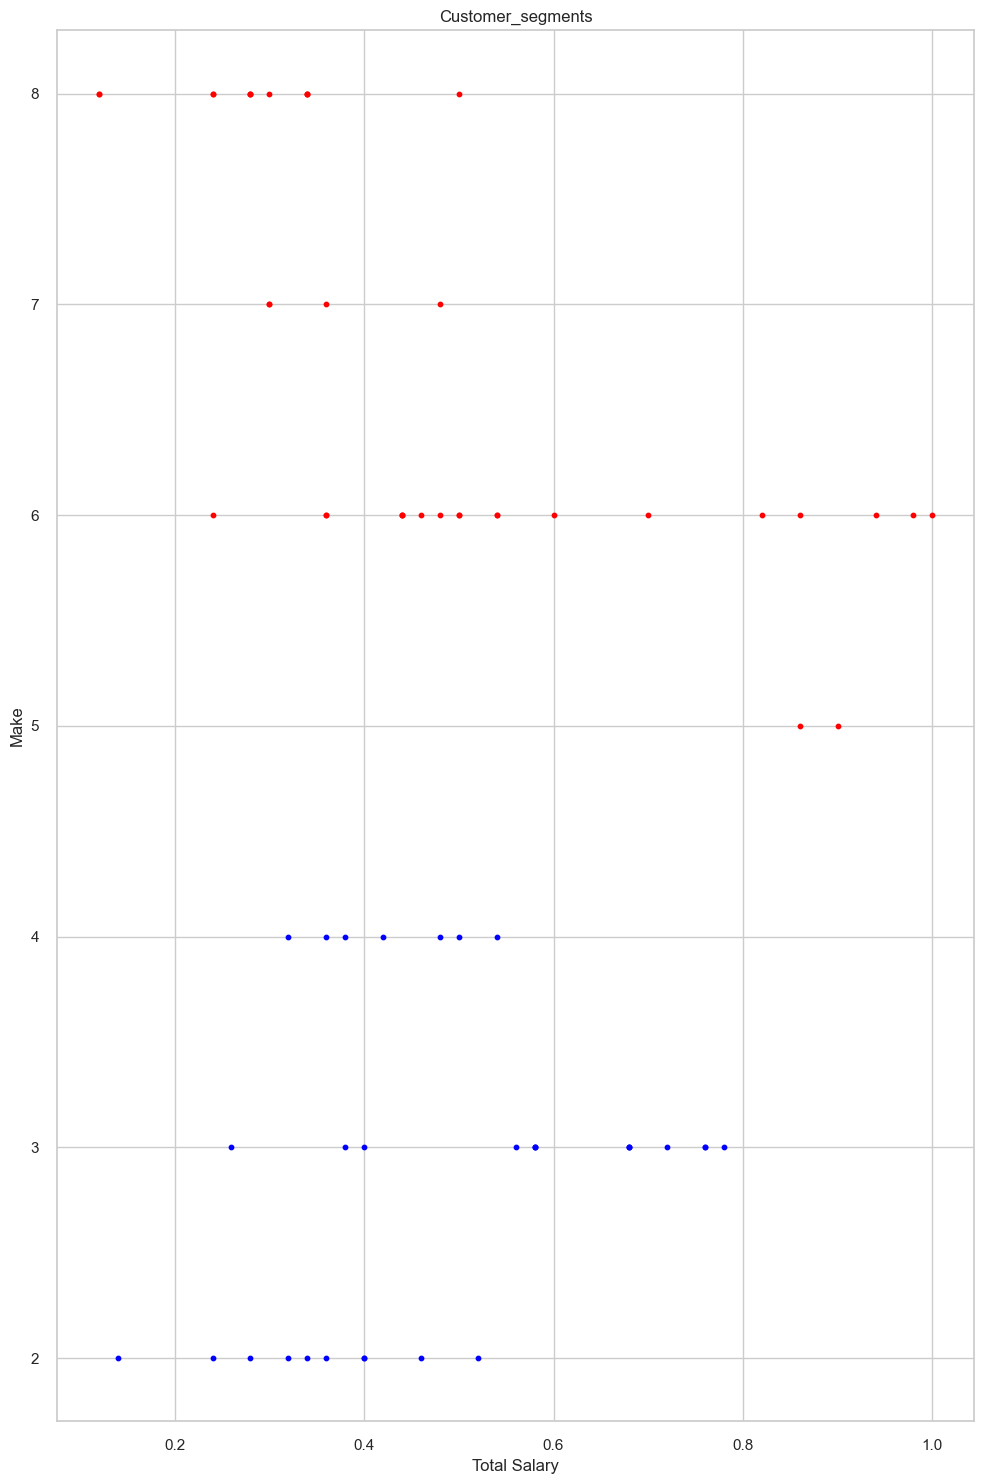

In [994]:
clus = dc.loc[:,["Total Salary","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["Total Salary","Make"])

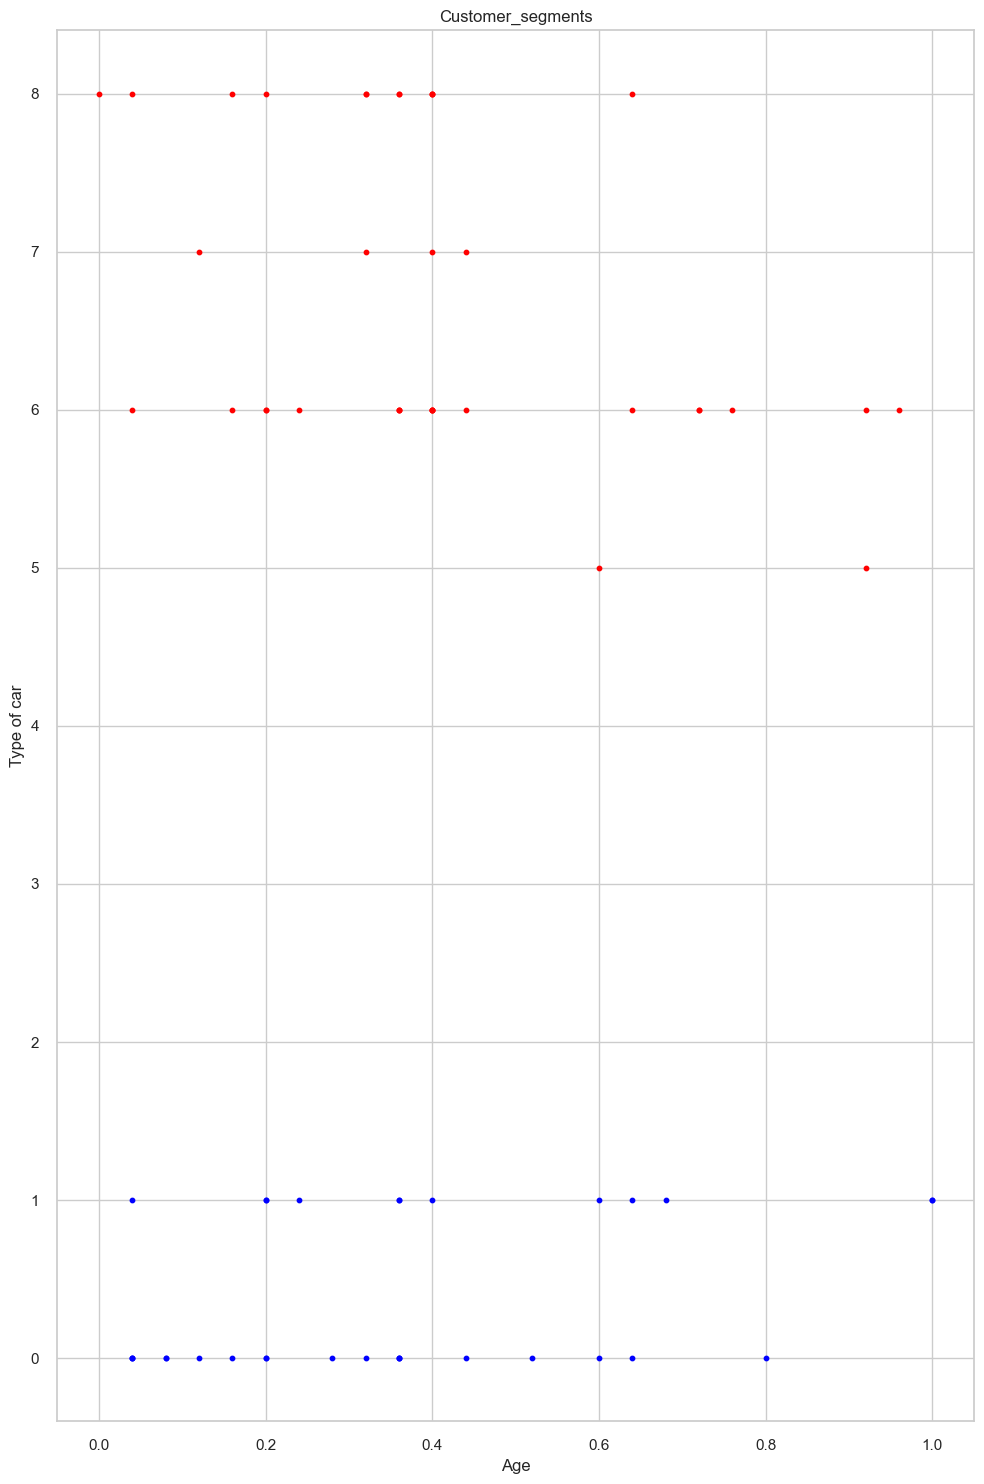

In [995]:
#Age	Profession	Marrital Status	Education	No of Dependents	
clus = dc.loc[:,["Age","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["Age","Type of car"])

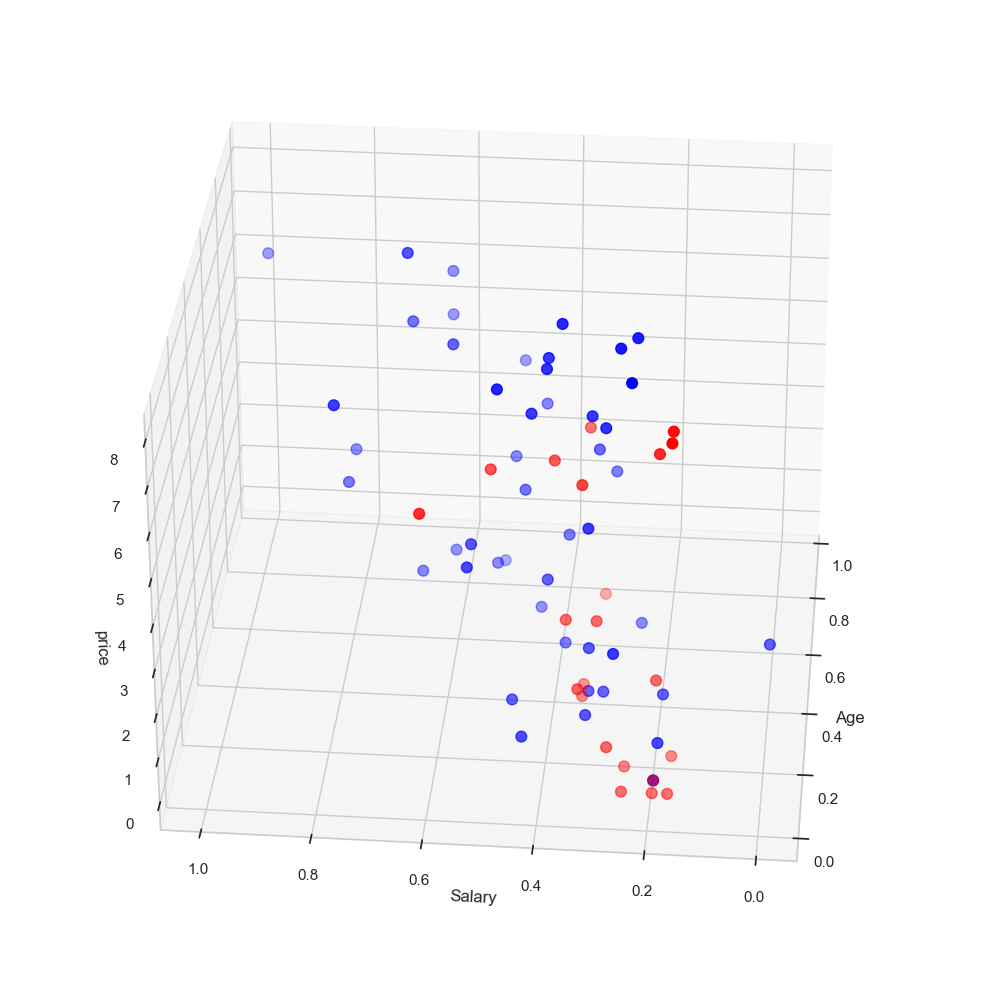

In [996]:

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(dc.Age[labels == 0], dc["Salary"][labels == 0], dc["Make"][labels == 0],  c='blue', s=60)
ax.scatter(dc.Age[labels == 1], dc["Salary"][labels == 1], dc["Make"][labels == 1],  c='red', s=60)
#ax.scatter(dc.Age[labels == 2], dc["Salary"][labels == 2], dc["Make"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Salary")
ax.set_zlabel('price')
plt.show()

In [997]:
p=d[d.clusters==1]
p


Age  Profession  Marrital Status  Education  No of Dependents  \
0   0.04           1                1          1                 0   
12  0.12           1                0          1                 0   
16  0.00           1                1          1                 0   
17  0.04           1                1          0                 0   
19  0.16           1                0          0                 0   
36  0.12           0                0          1                 0   
37  0.16           1                0          1                 0   
38  0.16           0                1          1                 0   
39  0.20           1                0          0                 0   
41  0.24           0                0          1                 0   
42  0.24           1                0          0                 0   
57  0.04           1                1          1                 0   
58  0.04           0                1          0                 0   
59  0.08           1                1          0                 0   
60  0.08           1                1          1                 0   
61  0.16           1                1          1                 0   
62  0.20           0                1          0                 0   
73  0.36           1                0          1                 0   
74  0.40           0                0          0                 0   
86  0.12           0                1          0                 0   
93  0.04           1                1          1                 0   
94  0.04           0                1          0                 0   

    Personal loan  House Loan  Wife Working    Salary  Wife Salary  \
0               1           0             0  0.166667     0.000000   
12              0           0             1  0.194444     0.380952   
16              0           0             0  0.166667     0.000000   
17              1           0             1  0.166667     0.000000   
19              0           0             1  0.166667     0.238095   
36              0           0             1  0.194444     0.333333   
37              0           0             1  0.305556     0.380952   
38              0           0             0  0.333333     0.000000   
39              0           0             1  0.333333     0.380952   
41              0           0             0  0.333333     0.000000   
42              0           0             1  0.388889     0.380952   
57              0           0             0  0.250000     0.000000   
58              0           0             0  0.277778     0.000000   
59              1           0             0  0.194444     0.000000   
60              0           0             0  0.333333     0.000000   
61              0           0             0  0.361111     0.000000   
62              0           0             0  0.500000     0.000000   
73              0           0             1  0.333333     0.523810   
74              0           0             1  0.305556     0.333333   
86              1           0             0  0.250000     0.000000   
93              0           0             0  0.194444     0.000000   
94              0           0             0  0.611111     0.000000   

    Total Salary     Price  clusters  
0           0.12  0.238754         1  
12          0.30  0.000000         1  
16          0.12  0.238754         1  
17          0.12  0.204152         1  
19          0.22  0.204152         1  
36          0.28  0.377163         1  
37          0.38  0.480969         1  
38          0.24  0.515571         1  
39          0.40  0.342561         1  
41          0.24  0.342561         1  
42          0.44  0.515571         1  
57          0.18  0.204152         1  
58          0.20  0.342561         1  
59          0.14  0.204152         1  
60          0.24  0.377163         1  
61          0.26  0.480969         1  
62          0.36  0.480969         1  
73          0.46  0.515571         1  
74          0.36  0.377163         1  
86 

In [998]:
p.shape

(22, 13)

In [999]:
q=d[d.clusters==0]
q

Age  Profession  Marrital Status  Education  No of Dependents  \
2   0.76           0                0          0                 4   
3   0.60           0                0          1                 3   
5   0.08           1                0          0                 3   
6   0.20           1                0          0                 4   
7   0.28           0                0          1                 4   
8   0.32           0                0          1                 4   
9   0.32           1                0          0                 3   
10  0.36           1                0          1                 4   
11  0.36           1                0          0                 4   
14  0.20           0                0          0                 3   
15  0.92           1                0          1                 4   
20  0.44           1                0          1                 3   
21  0.36           0                0          0                 3   
22  0.40           0                0          0                 3   
23  0.36           0                0          1                 4   
24  0.36           1                0          0                 3   
26  0.36           1                0          1                 4   
27  0.40           0                0          0                 3   
28  0.40           1                0          1                 3   
30  0.60           0                0          0                 3   
31  0.60           1                0          0                 3   
32  0.60           1                0          1                 4   
33  0.68           0                0          0                 3   
34  0.64           1                0          0                 4   
35  0.64           1                0          1                 3   
40  0.20           0                0          1                 3   
43  0.32           1                0          1                 3   
45  0.32           1                0          0                 3   
46  0.40           0                0          0                 4   
49  0.40           1                0          0                 3   
50  0.92           0                0          1                 4   
51  0.92           1                0          1                 3   
52  0.72           1                0          1                 4   
53  0.72           0                0          1                 3   
55  0.60           1                0          1                 3   
56  0.60           1                0          0                 3   
63  0.20           1                0          1                 3   
65  0.52           0                0          1                 3   
69  0.44           0                0          0                 3   
77  0.40           0                0          0                 3   
78  0.72           1                0          1                 3   
80  0.80           1                0          0                 3   
82  0.68           1                0          1                 3   
84  0.64           1                0          0                 3   
85  0.64           0                0          1                 3   
89  0.32           0                0          1                 3   
91  0.40           1                0          1                 3   
95  0.96           1                0          1                 3   

    Personal loan  House Loan  Wife Working    Salary  Wife Salary  \
2               1           1             0  0.444444     0.000000   
3               0           0             1  0.388889     0.285714   
5               1           1             0  0.194444     0.000000   
6               0           0             1  0.277778     0.285714   
7               0           0             0  0.333333     0.000000   
8               0           0             0  0.500000     0.000000   
9               1           1             1  0.277778     0.333333   
10            

In [1000]:
q.shape

(48, 13)

In [1001]:
r=d[d.clusters==2]
r

Age  Profession  Marrital Status  Education  No of Dependents  \
1   0.36           1                0          1                 2   
4   0.20           1                0          1                 2   
13  0.16           0                1          1                 2   
18  0.12           1                1          1                 2   
25  0.36           1                0          0                 2   
29  0.40           1                0          1                 2   
44  0.32           1                0          1                 2   
47  0.40           0                0          0                 2   
48  0.40           1                0          1                 2   
54  0.60           1                0          0                 2   
64  0.20           1                0          0                 2   
66  0.52           0                0          0                 2   
67  0.52           1                0          1                 2   
68  0.52           1                0          1                 2   
70  0.44           0                0          1                 2   
71  0.44           1                0          1                 2   
72  0.44           1                0          0                 2   
75  0.40           1                0          1                 2   
76  0.40           0                0          1                 2   
79  0.76           1                0          1                 2   
81  0.72           0                0          0                 2   
83  0.64           1                0          1                 2   
87  0.28           1                0          1                 2   
88  0.32           1                0          0                 2   
90  0.36           1                0          0                 2   
92  0.44           1                0          0                 2   
96  1.00           0                0          0                 2   
97  1.00           1                0          1                 2   
98  1.00           1                0          1                 2   

    Personal loan  House Loan  Wife Working    Salary  Wife Salary  \
1               1           1             1  0.333333     0.285714   
4               1           0             1  0.444444     0.380952   
13              1           0             0  0.333333     0.000000   
18              0           0             0  0.194444     0.000000   
25              0           0             1  0.444444     0.523810   
29              0           0             1  0.444444     0.428571   
44              1           1             0  0.388889     0.000000   
47              0           1             1  0.361111     0.523810   
48              0           1             1  0.250000     0.238095   
54              0           0             1  0.750000     0.857143   
64              0           1             1  0.333333     0.333333   
66              1           1             1  0.555556     0.666667   
67              0           0             0  0.472222     0.000000   
68              1           1             1  0.694444     0.619048   
70              0           0             1  0.333333     0.619048   
71              0           1             1  0.472222     0.619048   
72              0           0             0  0.305556     0.000000   
75              0           0             1  0.583333     0.619048   
76              1           1             0  0.472222     0.000000   
79              0           1             1  0.694444     0.857143   
81              0           0             1  0.805556     1.000000   
83              0           1             0  0.750000     0.000000   
87              0           0             1  0.333333     0.380952   
88              0           1             1  0.694444     0.666667   
90              0           0             0  0.333333     0.000000   
92              0           1             0  0.722222     0.000000   
96            

In [1002]:
r.shape

(29, 13)